# Barcode Reader

This is a utility script to decode barcodes for insertion or query of the database.

In [51]:
import cv2 
from pyzbar.pyzbar import decode
import base64
from IPython.display import display, Image
from PIL import Image as PImage
import io

## Test Images

The following are test images encoded in base-64 for portability. It is also easier to send strings than files so this method can be useful for processing.

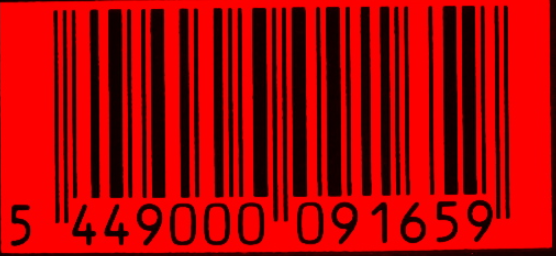

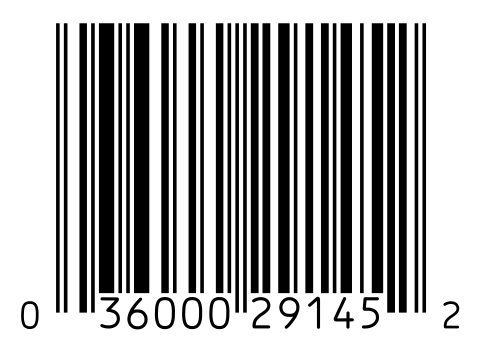

In [52]:
image1_b64 = "iVBORw0KGgoAAAANSUhEUgAAAiwAAAEACAYAAACQ8S05AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAHYcAAB2HAY/l8WUAAP+lSURBVHhe3P13nCXZcd+Jdnd1d5nuqq6uNgNDOHqtVrvSStrVmqe3b512tauVoegpUqDoCYAwAw8CIAiPGZjBzAAYYGDGe++9996bNuO99wOCzPf9RmTczHurqs3MgGzoj/jkvWlOxokT5nfimFwyvWRJs2ZpUvyG1i1d2sxxXLt0WTPXpyXLmrVLxpoZjqu5Z/Wypc302NJmlnt3W7K0eT30BuiN0Ou4vpHru3F9N8qO/97H7w0cpdfz+w0Sv99YxH35f1nz5rHlzZt430/x27Kl1/H7dXH0fz4rvQV6M/Q26Gda+lnK/jl4+Fnop5ctad7K/z5570/XvdDPU+Yv8P6/R13/C97zX3BO+i85/18tHWv+4bLlzT/i+N9wz3/DeekfQ/8E+qftsX7/d5T/zzgW/ffQ/0Q5/5zn/5dlY82/5f/7xsaaT61Y3nwC2n3ZsuZdXH83ZX8Qfj8Ov5/h95fhZR/O7wd9F/r+khXNAcvGm+8tH2++Az8HcO5Iyjqe44m88yR+n9LSqdDplHE650+L3/V/aXMG90tnQedQ1/O4fiF0MXQp1y/jvdIl7fkLWvK65y7lucuhK6DL+C9dCV0P3crzt9N2t/K+m/h/M8fboc3U627qfu/S5c1dtOsm7ruV6ze0z0m3807vuR+6m+ubKX8r5+4ZW9bch4zuswzuuwd6mPOPI8PHuPdB7ruPdzyA3B6BnuDac9AL1O056FnoGf5LT0NPtcc6V/QU5TwJPcW7ve5zz0OWI70IvTSgpc3LQctaWtr8EB7+CvoR/El/3VL9/5HXvAcefwi9zO+XeZf0Vzz/I+r317z3R/5uyf9/E7Sk+Rue8fjXLcW7WqpzUtxLmX8NDd5puV6njLiv+Btc75XFe/+GOv2IZ3zuZWT8Mvr2V7TdX6ODP6L9PC/9Nfd5b9GPoLrm8/6Pe/id16mr1ynzr+Sv+NgG/c0Ibe/86LX+//49/bpXu5UMpR/KH3pnG1iHH+LPXmrbzevK2Dp5LeqKff+I6ynDuqd793we8tl43qPvoQzJ92aZI7TYeeiv5RW5Dv4Xn4N3J78N1xp4l4Z48t5WxwbPcI/Xhu7r/e+fj2P7zj6FPBagkFWPBu1Q57yvXya/R9toWzR0r7/b/wu1yY+LSi5/m1R19Xe/jbdFJaeFrr0SGi6v08XB+R7p955fTlwYH28O5vi/8Yxx2bj+Jq7/VEtL3obi/jw//h7K8Ys89IsU/PdxRv/10hXNPzQ4o+D/pEf/GPLcP6Kgf4wg/gnP/k/8/r8p55eWrWh+Daf26xjMr/D/31Hm/wP979D/xT3/DvqdJcubP1g63vzJ2HjzxytWNn+Agf0B598FfZxnvkwZ++AU94WHvfn/Rd71GeiTXJc+DX2Od34J+ir8fh0e9uHcfhy/C7/f57kDqMPB0KH8Pxw6gnIO4/qhlHMIzx0MPx4P5bnDoMMhg/7R0DHccywkADie/9KJ0Mk8fyrlnMb5U6ECBAkEljZnQmdQpv87cLAkzklnQmdzz7k8ex7HS7nnZo6bCcSbkcHt/L6Fa7dCBvdN0FZ+38P5+4KWNA9yfAgeHqFOD0MP8vthynmc+wzABtun+P80x6T8/QzPjtJzXCt6nnue55z0Iv8Nnj9Etjrll9rz/euee5njD1vyt/carHUwP+L5l30eOQ8CeEv930E8G+fbcjKA6SANtAa2DBqWF2Vx9LyBWIP0d7+cKEviv2X0qQ8C8rmRc0H57OB/e99oWUG8528MHi1PfYc7XE94p51/aIDm+CPor3lmYLzBaxqu/5X9D8c4Qn9FgPTeCIxx3ePypsGOpL9B3wsIZPDsE2VW2XFsz3FfgCKoL896Ju/P/1XXlIN1HYMvKIIm59rryV9StE2P+tfyetYjaNF3df8H9fN31DP/171ZF8vMeg6oPRftQduUzAe8tPcIAJS593m9qXu4XiAi32/9uY+y6n3yL9BUbwWsf4VdBiDkfMl92+R7FqaSUck4aPRc+39wjuPf2KaD68lnV671QGeCql7JS+hqW7eoX1tGPtfneTGqe+dTlCNvI1T8DYhy5v3vvWPH5Zo0+mz/2s7QEE8tRR0WuLdooWekhe7dJvnMSBkLlTOQzQLXFqLtlfdqaH65nZ4Nzvfu0Q89v5zO7PhEcyT0v3OfgMXEQiUjpCWfnZpo9lsx1hzIhYNogINRrEMwYIP9oRRyKOcPh46Io/+5J+4l8EMG/qM5dzqO7Fwc6QU8dyEGfj7lnMM1g/bJ0KmQ/y/l2lXcdzXA5Gp64VfyjqtgxN71nTxzfxuMH6GCD3Htbp7ZhBHd2tIdnNvM8S7O29t+gHcbtB/lWXvVT/DcE/y2h/wM9XgWeo77nuP/szxjEI/eM/c8E7SEXjTXoQjc/H+B+17iniD+G6AjSEMGTc+9yL2S97zMe38o9f5bhvRiUJ0nEHFP9KS5J9F//k6n1+uZUo+kdD4RyKEK6B6TuAeKHll7f/bSumfzf/6O/wtQ8MM9/g4nw+9wKF7rUd2/kEMK/mibIAMuRx1fKGb7W6pgHsrqvZ7zevu77otnes+V4Zbil/LH9fZ3OaWB4e4stc+Plh9l1z1F8Q7q3l4rKvAUv+M/skEHo53j6DP53PD7So60hfcJCtr7B+0h0c5FBu8sK58d/A6Sh7a8OHoudWPQi2+vDfQpZJ7PDvhqf4dD5He1VZTf8ryzFKCD9/Tl2NWvvWc75D2Ly9Iyk8dog/b3PIfub55P+dS9/B7YUskIeSnzeldLKRPO2VbBU7ZJBwaGqeq2I3UMfluq9wUV730aOV92MPgfPFY9rU+2e9W73jOwt4H+tf7IcwtQn8d+2y1EWa9hvnYVGpXXDhF1Hj23vXJCX0bObZd8T/uuvrxH74tyOT+aOds1SP0fPlf8qnPGihfpyD24YmVzzMrx5v/gmiMg8wDL1bOzzSPc8CKI2zR3pLZR0Jcgg20XdCGU+AXoOQq3l/409CyCEQwYkA3GFZAlf2e6O4N9Bf0gXm5PNgIU96nQHuvZMCgNhmP1sAfEM9HbbsuIYNVSBYswvB5VI+czvffUM/EbPtr7yjFVWYNAHOfkL+/3OGqYARY4X/wFyGjJ651TahvOa/yPe6ifdQ7HF9S/P58POXGvwc93pYNsy+Z8kueHzwVvi5HXvY/fozR67+L36NyS/6Iosy27ZBDkcxylCpbhUDlf9xRPRXF/+77BezkXz/h7ILM2MPSe3VFasPyQc3sd6hwC53qUz3Q81PXU56pTa7AeoQBsLY2+J8prnxuSSZTLs0WWI/V/D2j4+SzDdkmqd3ivuh58xP96T/9391wS5dc9C1DKo/ff97XvzP8ttb+H3rkAVXn9Mq1z//zwtZbackfvy3vb59v3ZyAellVfl61zBY+uHfP5KifLLh3oU/Ixj7eiedey/QblF3Fte+Tz+Tv5zLKyjbv61f/u+hBpj+GDh+/t07xnfNePkxZ6Z5929F6uD9rwNaShcnlP6Ur//Oi7/Z/+a367LUT9OiTVM+1zrY54PtqOc6nLO1b+j4fU/+5/8NHKRz0SsJi1fWxsZXPS+GTzL7inD1jeBP0UtOTWNbPN0yvGqVT2JKKnEMaZDmkAAKCBoKABWAiBpFBCeD3BDITTnqvAlE4xy+7fF/dwTAPh/Vay7dlEhTk/qLDP9yh5bcvyvpaKn+5/3rswtfe35SQfUBhux39XXtcAQzS43rvH47z7fU/+Ng0dqeih6zX+2Cf4hEJ2VWY91/6eX68dp/k8LnDPyPXBPQMe2/aCSmbKMeTh9Va/ukDQtvWAqpxsh5JlV76U99Zzqa/8lgbX8pmdof67pdSJfrm9a/GO+XVo2mNds+5dZgV5BVGG/1uwosGWXfT1VSr9i+dD3r6/k/2A2rJLp4bq1ZYV/+MdSfVMv5yw496zSW2d2rpmGw4/tyD17gldlvrXKbuT57Zp4XuT1zyfMk+5l7z7z/barz3fXSuCp1YmfTlVm6Q+5O8qY8iPtc/2692n4TL7/mt+2fmMx21R1Snbp6jqVe8Z5WOhshe/d/i+xWmhZ4epX89XSiWzUSr++7S9+xbkEap4ttB1KfWuqOWNo88NKHjV/2Hbvs/7WlJe+TvjaGXr7eRn7FtYpt5vHSyvhuQjSdA+U2QZJh6ep8wuqZAjAYuVv5g8XhtSL/N3+jH+e+SdUR/j67Kx5smx8eaMqenm/+Q+ActbuBZzWPjtHNcld85MN8+tEBTwoA5zrD1SQBltv5GHmRimgUOad18KJ4SksMIBUy7XBo3uM77D+9t31bkqJ64F5XuSz2y8VEYboj822xLnK+B0ZWR59e5s6Hom+R1Q1YtrDQCqBL0QpazgLcrrGsRz6eRVpvwfihXvyDolD/zmuhPffLbOx7PBv/f3KesSxP2Cnn4dk+bfN/QfCn6DRynPlWyqlxU8e719Juoc97XXPMpj/ea68zBiLovzMWwvn4ky2/NQDA1EmR7b394DhaFzTzwT5zvZDvHovZYv8XtQR44Dvtrn8tl6Z4+8t31uvgznk/da175s4pzX27Lkp2vLvJY8tL+9p302+JYvdSz0cD7VO/rlS/4eJssr59Q+25LviWdaEFQdD59JPR8pi//z690/NypPf/tOy2uBeJRj27XP1vn2mZLHaHn5fp9rZRv/e/dGGXV/754eVfmhIxzDuQe191RZLRWfZnHN5gZYtGzIjHEM71K/v2op5q5IJe9WltnO+azXfcag4f2hy16ve6GuHsguzvHueK6GoTOw5UTv+p88Vj1HKcoIIhhixy/wfue6Pc41h88fR9ce5vwDnHeO3JP8fmkM/tRb7pN/6/UC1xxCfxr/+tyS5REM+zoT5UMGx0egBynfLHzIb8BbW7egfn371OlpEGVl+c4zWt48tWxls4XzTta/l/ufJsiZdY/613s4puzztx2m58aWx5w/5wm6OMBFApdwTbq4PbrYQHKRgde3cP8zzjsL/5ey1Mc8tXxZLBRwAcKFlHcBdB73ngMf5/D82dx3NtfOgs6BLoLugPcnl+fcL+skTy9S9qPQLe09To14eGwMHcnh/ZRB1qN0VD4c6XiI+3zmXOgKzt27YkXz7PIVtEEmHl7g+j0rlsdiilMg+bh9xcrmiZUrkFeW27VDqyc9P5Lt9eoo9bots32P7yufpG6HXKmPgEXen1wuYFnd/Evu/Wmuv43rb4ZcWPM6aMkda9Y0z1KxvtHmC6xMd+7vmrLiXaWlEkadS56zwRKxtcbqkf8hpPZ+BRiOhDJzwl0ryCCvc58Ct1yuJ4Cbb2zZKN7DM/Een80GiffxXPaefT4Dkag4x4fz/nK68S758P42wMd/z4+1wy1xHzxQVvLaPuMxeKbMkEfyX3IJXtrypTTqtnzKGYzRc0/w43XL4npNsoz3ek+cT/6sV/a4fR7jlqI8KXmwTFdXvAwpi5Rv8iGvmV1KXvtGZPmCmpRD8aMcsvysi2V5jbJspziX56MenMtg4gqX7tl6PuWU9Yl2Ru7xHssMPpL8bdlSXz4DmYRcfE8GOuWS71A2Ur0neUh9g+QP2cb91FNHVXzWsx6jfdo2Lz685+XlyBVK/eYdQV6nDHVGPYs6Zh0M2AYRA13NszIYvch9trG6aR1cCaNjfAkyEIWsooyUi+/Xbpyf9Qx8PUu7G8hDjrz7b5asgJbHf+9zxZZzy57g/7Ntu0YbtbxZl+cp5zGOW5GB89nu5LoT0G/h+k2cv5Vybuc5V58ZsFxB5jy3Z5fhqAkIIW/LbcsuPZCU7wvon8H0dnjbBD3O/QKIaotoP+57RmePLAxKV0PX8PtaypCuRD8u457L4PFK6nwVR++Rn0e476XlqWfWSX5ehLdHodu59xrkcTV6eAf0HO9QZ7LtJe4PvlPf5Ocl2u8RAtq1lO0KPYPgOcjI4GggMggZXG9TBgRDy/Od2blRrkmW+wJ8PUQwuAZejqeMg7h+CPcfSPn7Uad9uG9/zp0ZKzWWNy+iU9HOXH+KQHcbQdr3nUQdzl2ystlKzHiOdzqBXF/2IvV5mPuuBBgcxLlvca+B+27KMr6ETHhf2ot1zLav9qn/aWvIA8oVWvAPf85veHTlRHPxylXN5+Fhd+7dj3uuGp9sHplYiQ1kXbPNU/a2q52FZ3j/zVOrmoOo/7t55l/zrKtQ/hfu/5+55//L7/8f9L/TRv8r1/8//P5/oS8tXdFcvWKqeZL32ha2kZ37a1ZNxCIRhy3+OfQ/UM5/y7V/jH79E3j9p7zzH3POhSn/HWS24DOUcx3PPb8idfQF5Hv/5ERz7sRk8ymu/yr0Z/ByCe96asU4dqdc23rAU/ru1OPHqc85k5PNv+eZ/wX6fei4mTXN1tXTtMmKuOeJ8RXNyVOTUa71c8HLN1bPNLetXkXb2gYp6223xashy822Hi439UBKP5bX/C0IfgxAdcqqVbFI5xe452d53kyLK4o3QAPA0n9ZvCAK7c793VIqemZPOgF3QpEMlARWKv4iyvv8yqQXV+AcUSLTZpZhMIm6ce9fh0NtA1krWA0kVmlQjvcYgDXaVBqf7b9ToCe1DmJAuWxQw/HdL0IeIxhSfgYuggIK/lJ7fuDo4528n3LCYOEvgQDP+SzkvRHoeD6CEs4inB7nDe4BCryPZ4pfy0gqWWbweom6/RAnU45ORxt1iPqnzLxXQBHBinKDbwzOAGBAE1wFb1EHjsj/Ra5FMOW57Il67JNtYW8TJy8fkA4mHU7yXbwOt3m+wzr+iPf8tTKN91p/HK3BABk+zXOSv51Q/QLPxTNQAC2e8xjtDa9OxH6ccp7hv4E6eIn3pfzUrZcIii7tDb64V5kHkOP+5Nl30EvFIdyD49i6bLy5B+f+4NKJ5n6esQf7sNdpLwOIq4Y01L+x/TmvU36c99/N/3ugJzmnfO1BKvOXue7xOZ69n4B7z5LJ5j6O9jqDr5KdZB2l9r868zLvfRQ+boNPe3NXtMfrqeNtnL+D4+389/oN/L+BOt+CztyDTJ8e0xHCL+dfVqb06B4iGF0HT2dw7hwCoaveHqPuOkTlEDrO8UEC2yXI4xjKPQ66gusPrkSeAbSUGe21fJKguKo5lCBhMPgNnv1Njr8O/XvK/3fw9mvQb/KOX+Lav+H8H0H7wMsVEzPNozh+5Rfy5Hy2G/qOXsiLSyYfIBCcjpzewXXpWH7ftXyCYI/8fBZeDEjXEgz2JBAaEAxe/wS5/VPa458h+/+e8v8Hyv1nyP2fYPv/lPf8c+jtnD+NwPnQRBeU1KFHCECnrFzZfBCef5myfgPaE37uXj0Z8imbUTcNUurZjyj35aUrm8dWTDRnUa/f4hm3SnB7hV/g3T9NnX6G3265YOD9PPxvnlrDMxPoNcTz2ljaMe2OvB+emGrOXznZfIxzrup0ZejPw59bORgU/gvof+D8H1P2iePjzePjK8PmX6LtNq2abA5aNRXt4fYM/zd05MSq5pEVq6jDOLq3snkcIHH15HSzB+XI0/8I/S504ty65u5Vs7TNJPwYZ4btOe3Gc+3/IPUCWUSbYIvQ0+jaLVMTzde5bjCzDsrlsJmZZtP0KmyitUPtkefNhDetrT6EDE9aM9X8CW3rFhPOiXDrjrXIfB3tuoGjwXBdS/7/RY6/xH3fBujcNrsWeUw2zyDnBwAZpwAMBCE/DzlUYc9/I+RWHbtBbrfhufWQ580OeP8Z09PNE5EFwTcB7m6E929xzi0u3B7j/4EOh/970L9nsa8AsfCZ2Za0FW3r3pXLm8Oxn/+Z+/9rSAD2PeL47ZSnXWrzjwJYjqTdXG2jnrgFh6txrwSwaAvZDgu0BVT/Xx1ZbpY/XG69lzpRtzpvrBKwPAJgOQmgJRhUL9+CDFzO7PYnr4OW3L4AYOkKHj33d0XzK5kVLaFIOid66iigxwjWg/uyB68x6MRj2V97Le7jXJHny8kHeR0qkBH3RVkCGIIOzjx6ppy37HxfJzufzTIJSPD4AqTDf4nj8zzvHiEGof6QSWZRMLgwcHuqDkMlX/ZMn6dhnyUQPkfAem7JeKRoLet57nPF0xO88ynKe4Z3uurJyc4GZYGRwbHqYE+7lj67Qip6vcgme2hJgfCrXjwrfy9Q52eXTDRP8v6neL91EvyUnHS6L+LEHoOn+wlA91COq73uoxz3SXGJtnupbOKdt1L+Ndx/HXQ39z89No5zExgQGFvScFOuHclH1IWj9XiKZ7bgrC8gcB6Ko9uXe/aDDiYYHgsP58GDwdi9VtynInvA1IV77yGQnYkj+R7XXdp+NUHmEZy2Qcz6RNvDdwIAdTB58Bi/KSvBH4EBR2+Aeg//DVD2bH4J+/q/qd+/pb7v5f/RBLU7p6YIlIIMy6XN+H3DxOrmO9yjo5eOGlvZ3E+dfghvZtiUr475qsmVzSfgxd7TH3vfmulm68yqAEEFWuW3bED+n+e5u3H4R/Gut3Nex/33IZ3Z3+ed/wD5/JfU7Rd57u8h17/PMzpRZ+t/Eqd9/jSgYHwietQ/XAHwmhpvLuLcR7iuw/xX0Iehs3DA99FDsg0NHk/iOE/HccqrvU0DmfsPXbFqNTytpA2WNs/gfG+fnWoOoA6/xnV7po5Xxz5LyO2N6Pob0bPX0Y678ewbKdclj9bh7bTl0TNrm/sJqMqx7w/ymIDv4cnx5mLkJL/y8d9C/wk6kWB0F078BUCG+vQU7X4ydbA+v8Cz7gMlvZX/rlKoYLQbZe+Gbb4OYPFmdM4y/wyZXbputnloakUANW3nfmS3NwHTXq4g4x9Q37fD/61rZpJfnrGNlEMCDWyJ58xYPEBgOoZ6GZx349x63rcOu1uPPDZyr3teKauP4uTvml49sL8gfjetHphh2Do92xyxaiZAx89Ba+Fh/fLxLA/Q8TrKexvlmYo/AH4fnVxFOcua5+HjOtrvY4BLZWaAdq+p7xJU758QrHAP1x5ctbI5Z/VE6L3X/yvINj92/brmrhnb2s5S8tWnsCFkGcfgPdtw4OeRkZ2fR6ZWNlfOzTZ/zjPKw0AtoDiAtt+0Zi2dUwM8Nkgbmh3Uh5YePIiuHTID4IIH5fU2zr8eH7YbuvM6+H8j9Xw95zZCG9C39TzrvlzKYh/keuvcHDKcxM+saB5BZmeuWhNAIOdV5N5jr6OM3Xh2N8rz9xt47xshyxW4CC7OXDNLOePUET/N8SYAxr4z0/Ee7VBw/E1oC4DomZXj4Ucz86yM8OH8jr1KkPv3eIfgURsWDO2HDG6hPGO5uvQoenwodqi9yadZil+BLppegw8Zp7y281pyVvZcf+2o5D9avueS6t2e11eZ7XwInT8OUPi/8l97eSug8y2c1/acePsTAlg6ioCOQmbQzYasgBqAg/827EsY9QsY43McDfBDgAJFCKdAoz3J78dR3GcwCgO2iD721qD+CvAp7nkY5X6Q/47PBpipcno8haG0AVSKwLEcXggUTxN47lo22VxKD+goyvkGz9hTMG16KkZgivppjjkhKusnwBAIRYDkGYHY0xMrmqtxHvviRN7Js9H75N5f5dqvcFQhdfi/SUPrmKQPQKfSU3uY3tAPca5mNJ4DTNy/cro5jWBoOX8GnUUQNUg7rmr2I5Zz8lvlr7qK8h8Zn2pOxhA+Ag8GvvdDxxOUHiWA/QieX6K+901ONWeu2615F7wb8P4px3/Es/+Icv8b5Cn9I+gf8v8fUrZORKP9DHQZZT9CcHH4KOXrcb7SO4wkSFDOz2DA1xNk9qEOysDexE9z/q3I5GdoA38b3OyRH7VqutkSRruS9s009uk4NJ2f9+iIrNNF9JafpUdWASDbJCn0CKr2D9lQx5cJXHcj6/0ALKaKNTId2Fr4neG6we4fQP8BOhajfAKyLi+PAeoIbKfiGE3vyoe93T+FTiSY3kWbP4NcDQ6Ptj0Qe5k6bR3hJzh3OYHtGdrBNpC/SIeHnNSppc3jyObqtWubj9JuOnx7LGslfntcg96v4b41PDvL/1l+2zs0UP9Lfh8M2LFdrPdLyPSeVcubk9bONP+R6wIbyd/HEpy2Eriehw/b60kc0MnwL78GAYOlIO48AoG9QWWrnG/kuW+0ztsNH19PcHndOL1U3qfDt/caPWD+mx62Tf8h5/4VMvnm6qnmnunJts6pJwEAJO43oN49Pd6cPrcmdMBgajsIKA9fO9ds4t3PrUTnufdJbOAYAoZytb1+ChvwKIBSZuup+1rIXrgbWr4Zu30TR4P0n/C+ize8rnkQMOowqsH3QQK7eml5vwDJ8+/Ds4sd1PHQ69DxcuTZk35BGSOXQwlsBp3dsBc34vS9sRFnnANcQu/Df985LWDrbGTQQeNob/4OgNn3AZjW2SDn85EZQJ9nVyxp5nif5aob31g13ty3ehx/IUBe3ly1eqZ5J7aiXVkHg8lBgOZ7x+l08fwzHO9es6o5EUD4e1zTnpWxvujotWsIwGa/skOpf4s6Q2k7Fbz654ZJP/gwIOrSubXNh/ivrhngBZX7A8Ruq0BN/fW5g4wv15XD/bTH/lNjza9w3na3vQQStmkBY4+efyO+fh1ydqKnvmvv6VXNzXMzAFnAJDb4FDZ2NucEF26uanuoj+rpLDTD+6chf1fGxc1YBaynoKNlo08isxtmVzX7IjcBh3LV7r8M3WomBrsJfbYdKV99dvPGJ7GZW/C1e3GfOmeWx4zWvujT9djP0z4H/4/ig47ApzjUZUbJDVJtj0vwfc8HYMm4YrkRT7ch/1dGpdPzfXfX5nnN89qA/u0h2vFY/LlDXWZYfpb7nMviPJY3Qktu+0kBLFasTz2B1HV7FDbYtTjv79Own+XaXtC5OL/HCUAatOnhx8Ynm8smVzdfxZnb4zVNeir3P0pPVmTuMMmDE1PNRfRIPs+1d3DOntmFODPHc90EzLLK+Hy/xwIuMQTFb+95kWC0aWyy+SYg4V9Rzj/ivMasUeu8/jfO/Rl0PA5n6/RE9PRi4mxbnj2MCMyUtXlmsvkkTsyg+g945ueiMZfFxCRJRPrTOJafQhHezHmDg0b3bfjeihKYTnRs+iGczSUEmw9zv4FVh/hOntGg7iW4RO+Ya4MeUcvPSzidW+nRvBsnZkDVWWoQX6f8+wEp3q/SbaGMHwAMfokyraOBW57cxdi03kZIY97IO9wh2XM6UQHWETi9O6nnMwSQlLF8dErvOYdidEjBH2341MrJ5mLa6i9wavKjHLIHvBRnYsAZi3S6YOYADHYTxv0semLAeAQHchwOTTlo2NZJwz5l9UoABYCNtkwe7JFI/XRqysd2Uieep23uxLF9nTJ1PjpCg767Mnu0h6CDMaV+AEHMYQz5V953AdSOXz8T71ZmksDmSJzXZhzy0zigF9HjB8dXBr+2q4DF+n6K+l+Bzj/N+0M+wa/8mcFZ3jyPDj3AMxe/brfmnbSdvL0peEpSTpXKtjcm2WvMXmfqx/6T0wSNGcpDR5evApTMNscQ7AXNyswAIu9H4E+22KOGFwGAY+knAihM8ZoVURecH3AWTv+ZACwA6OUTzS3T65r9pteGbOwNmrI3GKzj9xxHQZWAZSPnN9qmPCcAst0+iew34ay1bXWk2qXI+QdmYM4geAoItT/5NXgfiT5vWb2aOmVAfQw/cSRgSv1WR+VhI++SzKisB6Cst3fOfwFM6a9t8fvwdtGGjdgCvXF8iHr7AO2sfQgEDBq+1wzLzbMAFu6pDsnAeUMGEO1UQHAQcrS9IvhxzeAYFG3mbtxLm/cTgDZPrUUP8U2WGfbR+kXIyZibaJcDqadZD9vLAC3gegs6/SZ4iJ1EOWcg/hZA+iHqID/P00aXAuDM+Gmj3mNdfgBv968cw4aWA6YnkOHa5lh6+b/T3uc77AQctRFAiA6/MEaHhvfMD47DtpQ23e0jogydn/TQ5KrmIvTNDI62YfkG+m/OrmluwWdEDLPctvx63rLvB2wfBAD7Nfyfz5kBWQ+F7nMUBK/nfv3E62jjOdr3zVzTxr6OzG4G7AkUHN5+Bj9+weRM2F3tvK6dSOpCDi0tRW8pl/LWQwIb5XoagNEMi+39DPZ8KzqwH+2S8zUSsBhvbppZNQAsJSv1w7Z9gvjj0FgBFn288WBv9P96bYrnvPcx7jsKmcmn9mT52uql8GBms+JmlN3KrNrgtSHLt127OuT5au9tAxZB8c/SNtpMTbw1m/UTl2Gxgl0Ake9h3h8EVX4fB/EfqbyNJQr/CspxLwHBzItO4oGp1c2JOKo/4reKZIN/nXu2jk+EcbyIgd/FPcetWRdZBJ2XPb/DCTD3ERxewEgNdiLZMEKoQ6w2BLzodAyI9ErPgh8BwS9Shj3XtTjccHrcX47zgDUz9LpEyI5BmlmxMS2PsvgtkNIp/xmgQbDzFp415fi6IFOQ2WPQCZkyfwO8GYA0gn2sGyQQk3dT9mesy968zlsHIFg4GsPcjEKbffDdUY+W/G1P59bpueb34EEHbe/btORXULAHCAje57DIJgLU/gRZe+Yaig49nC11KMDipxoijQq/GylP2SiHo3BKW3BwkUJWBlwv4ypAKFWmy3c+Qd3Ophe3O8HG1Pxb4z0rAUgOJQhYHKtPXfg2cr4NsPYMgUA9egpAecrEqjYjkkHQDMDJ1OdJwIFB0KEhg0C1cYKmMkIBZeqVQfoOAvTXaEPnHAgCIs3MddPMG/htff97fn8DvXjIrBTlO2HSOp+4bn04Fdvkv4T8fQRB3HT+MwANhw6d+3EEDsugoSPSaX0IPi8H7D5LEMn2Ul4lu2Wh9w/TRhfvtgHAMhap/TdyXj2chW8/u6HzVl/eAHm0vQQLZje8/1tTk9iW8y5cgbCi2Uyv+/B16yIo2WutHvURBK0tq81g5VDpI/B2LE5/MCbNUVs6Ez17dkVmmHTe1wMiv4rO6KgENX4GJMAAtAH+dfrRo6U9N2DzylUAqC28i+t38t6cE5QBPwNjOs2X4Pe+VaubM+ihmwFQttqdwOkAQMwd2NXzdla4/zH4PWJ19qBtP+uf7yYIyQe0No4JoOxZq9PK4D9y/tzdNjYP8HzoDP/vBSh+Fb+RIDEB639ALjcTaANgwV8fkMuzMhZkPUjn5UgAsDotH2ZEAgS375YH9fVdyM9euZOendcWMoBCF7juvJxN+JYD4Mt5OT/H+fX6B3iPIQ3r0JYtOP0mYEXA4rMOM16BPb8Dm7ONbRvrsj96fg/B0SFV228r7z+B9lO+ZmK81w7C0etmM4NFOfKUNtOnCmB5LeasxH20HZSBbHnzMP74QvTNbLAZFoGHerQv4PIm3i34rc6NvrLmypkpf5DO1NF0CH8H3ddvqePruBaggrZYS93MKka7cm4NJKA3LnwV3b0BvXkS4PkydXAOyrl0etTTbAtBT+roBtpNEgxZ9myUtbSZ4T5jyCnE2qdWuoUIMgNQ3IQv2gfZCLysj/eYZb5xzermiYmcwyKASwKwYK+RLcMOv4Wuqxf6V/ncB9nfgCyM5cruMd5zODpve5beCVYvoGyHCEM/+J/+opV9e5zfRq+EdhKw8Nus5CPwdgK+SrCovzDG6DMSsESGJdNpwy+rgkfP/V1ROmBJpQzBWuEAKzjp9j7P301v4Mso1b/kXh2TxvUJGs8Z1AIBh3nuJ2AfTb3/A8ZmsNYhfxZHdQs9C8dsHSfcgnEfsXY2jM5ydGDfBdBsAbA8hwN0+CaCevDRNcJAbvDyDL2krRjKIRi/zlzhm3ZPpwuhgCJkHef3Z2ab22bWhCKr0DGPhfIj+Niw/L8dJ/+HBnfKDiPh3Hru9SjZG7YnplM11WvQMaB9hbrdAT0P38+D8LcSbI7eMBc86bjtEenIDgUsOAlbBxSrmDinQun8Y4gLfm6HTwGLz2mwOo8vEXzvcxIh9znH4jYcyN7U5X+FD+unQ09nn4Zsb0aQpbMUTHhNx+tEysPWrm/u5FknnSUY7BReiqE9zoXBSTzzBHU7Z2ayed+kEyHTCa/DyW0AnGXvOB27Du4bGLbBQjk77PUU4OykydUBAAyOOmR7+Scg6yecs+G7dBwcox2gyPxAaWy2jaBAMAjwADTZo/bzFTq/Oc7HN7koI4IeJI97ryIoQNbjefRwK0HhuLnZaBOdagGAQ2iPTbMALAKXAPgBjkcgb4cY7H1Y1vt4/tLVABbAjDLJDF1rJ5D8PyJg0eHDo45OGemgA0C3fAlQbItZ+F1D+0+jozpd3/GtVRMxb8XyzQiZlTgS0CtgUX+0EYHewXNrmjvX4hThxYD8KPwei4PVAan/Ok9/n4pdPEXAk0d7hTfOrm72AjjYydAxTfOsQUSw4DGGq1qagTdpPed19H8Iv3esmYs2sG1q+Df1xHZZCWCZbs5cm4BF3RUgO8nx++iC80mcM6DOP0HbHYOjl483QPaS55aOE9RWhFwqqPlNNf/P8swGgof1d+Lt+Rt3a+6nLZ0ALGC7B1/zFQCLwN76+247U7fNTodupV9LPZa0cyePy/P9Bh18h+B3jvet5z0G2DmJZwUx1uO9AOTbCVZmACpoG6ydq6UMnuX6ZnToQHyaQctnDLRmiMyYRIeCo/asHXxrFLAA3v+Ee/SVBg/95d7Y5x3olLHjaX7fhT6cACiygyd4UyecTHr4+rkAS5HB4n/UkbJKNzvfmde0q1plF/PpIHvego7zAQ4OYQtSDdTq0T603Q3YtDzoN83YSdnp0zeP8Sz+Hvm8nbpoW6+n7up5dCJ4l6QsQ/8h7dS2cqhlT2R2PTr9JHrsJPFHVy5rTp/ODk4Mq/Fs+rfMAmpLkmWouw65OiQkGDmJ556mTfXrAqyb4X1fAIRg3vrYzp+ArsYWHp10In3ng/U9sewX33wztvh15KIczFrqC/ZCj69vY7k64Hyzw4h5vld70q/pX8+jLXy3OtLF1XxHdcLifZx7dWS5tqs+s19mtbfxM695PgAL+voovJ0EONRXO4LgvCo7oAVcFgQs8YIotDv3d0sdMIhKItgMVnlOB1VO6m4U8wsopgjYYKmRfZhG3oziabwKxQzD4Sj5r6IQGpYN/xkc1W0I6nmuP49D3sw9h+GQbeRCv9+inE3jOYM7VhVQ3gBQ9KlVgmcw0k0E3+9PrQpnrsBnuaahaDAzlKEDF2F/mwB5q9kNAmmWSRuglBqufDvv5jZ6278Hbz/DtXDkI1TzDzQSQYHnrN9nCQg3YQC2sysiBG/HbVg3SA9L8ncIDv1OFLqUXopeir89ImuHEP+ToIn7dXAa2R44rvtwauqNDu4W6vF56vw/8ZxBVWcYPdMIgGMRdDRqHcVGeLYutpXBL+YUKAfKSVm2bS3xO0BcANUyhmXN4xjneTiDD7YZFg00P9zJO5CfzkQ+7Il8DcB1/eza5ikdHPc8QV1d/mdPRMDns7bHcQSdJyhPBxq9vpZKLtFGvD/JwDAWveK7AE17I2v1Th4i+HOvwxo6QwGlDn9fet4PISPLegGQtxnAcdTcdABHg5okWD6Y9tiEAxMAWP5D6OAR1LcAiw74D6Hz4NdhowoA0XbBezp/M30XbVjf/AltZw9YEKd+lIMtHVJm6mjMaaEcHa9t/G3AysPUS500G3EnoPeINsOi/hiw5f0QHOedOGGH3AQAjyHnYwg2juFHb56jgeZ07NTeoqDRNLlBZy+ArnarTczwntXwOCOfkEAhSfDi+QRYAlEzG7fNzgZAUAcHQC1Ifseae7D/0wCEBlR11wBhxu0HPCfAdtjEutnmZoTUFXXBrJjZ0LX4BXkq3XVeknKSJ0Gx9f9tfp+72+vDvzgXTL25b2qi+TL2YZsLDuzp/jZ83gqAKF2SwucG+d8s1vLmXoLbIbS1nS75yB58vrPmGPne9yLjm6mfIMkg3fkj9AAeBCxbke+hADFBsCuDalhLkC7wC1vkmu/aF7DiPBz5eR77uAzdcoVJZVjUh70p846JFZG90V/chf0dR51qSEgZOxn70PVr8YH9pbTZLs4XFNAmqMh2S/tOGRRZF32tAOpC2s8Mi/5aOSZgWROrbcxAdvbIs5JlcHQe0VFthkW7NAtt/e1AZeYz7VI5qP9mRdRBQeuX0IXr8IsCBe1PAH4SHVuBXXQQqYe2VJk4fW/aUupI6klmrk7G7z4TWUV0fvl4czOxwXlbDglp78re7+UFYEFnjFUpB2RCeWZK3UflRnzFlzlnR0I5ON9jL+ewEMvN0HufgOUI3qfd2WbWx47x+XYGeXduFJvlh9yhsptqp1dHlls+ul9u+iep6uZ5fwdgoR1Pob3sTAhYHLJ8M/QWyknAgoPpA5Z+CqrO/d1TKl4pYRcsks/s/afABSyfpdI6dFPmov0P0YibMOhYKodQTA8fTuD6FX7rbHX6n0Eh7THYS3b1xh0o6kFzcyE4nZuB8Bs42M0AFicLDm1WBFWjRCNEgzh2DPDhPQcQmHTmCly0rQOWVqPsOrGYNIXiOms8JiK29ZTS6foOepEAlt/HkRncNY4Z7kvyN71S7rN8r9ljXs3Rez+GoV41vpIe7Qraeqy5m7qdRLBxyEHHotLbGzoMw3TYyQxTvluEb32SdKz2Rv8jMlImOnTl8mWA3gM4aevssNOtlP8ZZPk/cr/I2MCSPXmDNz13+DQQrUWG68Y8n3zGkNDcumYrgEWH3bV/RzrhBC2l9IAOHPt5vPND8KHRK9PIbnCM4QTeJR8Gw6/SHtc5Jq1hI//HkMcJBGMdigDMOtnjOW71ZKxwsU2Vv6BR56pMUveGyfPOMdlMUP8qQU+d8v0FBGwPnaNOzuC1D0Hcnp8yDcCCQz2cnpztUCBSeRyCvDfPmOoFmOMwHya4HzWRAEB9sv1cKnsm+v1UD7BUe0kxJISTvXDj+uaPaTt50zmrM+lYe4CF3+F4bR+PUGRYCLwPAXqUhfpxJ85QQC/QlQcdruDlEGS7ST3mHt/9ODZzzNTqyFC+gbKVsWDgDNo4xvNxmu60ff30mmYvytQWArDwbAAWfhcIL5JPjwYJQdt/4N5b8WMGwCFd4X3qsb37u5HvqcjXgCqv6q+ZtO+tXROAJQAy95utE7DIh+AqA5kgIYGSVLKSLwOcw2kCh9/i99mv2625j7Zwvpf1vxe570lnSBlad3vEv4EfqiGhaqPwuRz1bQJM0/a3Ie9vUI7PyodZVd+lPVl354T55fgPwPttAAx75AGqlQO6nZ0eJzXrh2aag/F7dlJ+zjII2DF84W/uieEtrgUYieG/BCzutXIp9XFFlUBE2/Keb1GnLeibIOl5wKmr1I5ZOxNLjUu+AVjWoQ/Ivg9YLDd9dtVdfe3aLQFX3mcdHCp4mCB2GeDSCfECbn2WdrovAfimNiObz9rultPaJmU5lHkY9vxb1EXdfxM6t2HZCjoRY+hR6nuRnYwZ+BFcF2C5nk7Uk/iYl+HjMQDLybSp+mybqBc+Z5to49pP6mgCH4/qivefgs6bYdGXu0pIwPJN2kU9VLZm4fy47/WAMJeVx1ykkI91Arjx3OP4rRuoyx6c049oe/q1vfRrlGemSbm6SsghITNB2pO+QsByQbvgIMAsZLmDdolj9//VUsQwykv+i9I/JeW1uJffjlo4j/RU2lqZOCTkRGhpAFhuwXA0Dh+qmeX9l+56pECzsqPXVHCD8TzAItCg8WwkAcv9/D5ydq75VRTQwCDq/gzByR6DwUPlvx0n9gMCuKkpe3FhyPYsQa5ORIusB+f67w4DGzRGjh3rKA4EsBh8FLgOWKdnL0lwUYH06wSmG9tsVzayypTlVPkOlfwhgVxnoIEEWLEcrllWkQajIy3A8j5+X4hzeRwQYU/dZZwnrFvf9rbyHgNPAhYnZWUGI3no6mmP/RZ4ELD4nA5do9kzAMtU3KPTvJ02+CJK9//hvdZZfsLRB6+m9NPZV6/ZazpyA97RAKmtvGNxwFJy7vTA3s8FANUP804BlE61HJEOWadSKd69KPtGMyy0d0y6xdm6YqcAi3Wy53YcdbDcoXdTVl8efdLxKjezdHvglOyNRjsEJVhJymG0veDV1Qs+p9N3CPJwALKAxeCnA1NnDnZIKLJeTnBcGhmWo9GnckS2nWD4DDMs5bSDOh0yiLnK4oINc5FhsYeqsw1dhAYBGErAYg8++fecAcJe9wPoj7IXmCW/a4NfeVAfzEYeZJaOnnZm6ZaEgz0OexNg2S6m0dV396SIYTl4k+8bcOZf55xt5H2rOa/+lr1IxW/wzH9toAMsswHMqv6hJ60MnPh+L/yeBjhxJZM+QUdvwPs255w7pk2nLo0DWKaj1yqvAQ7Q6dDhUeIds/Bp4Le95OOc3TbSIZqM3rg+4m6A6R74DP2HYFhf8uuUdxPtWquE+m0mmSlyaMrFA5+nDP2TfESGheuSWcu3cO2/hT6KX9qCTqR/QxehgZ1A+vc78S0/QKfVKdtKXRTMq4+C16gnJJ/70NYPE+TlSZ2+lOccSusDlm8QcDcjK7NXDkVuBVQfgyydKO59ghb14XBA7eZpl9yP9eo5SsN+rk8BWJDHI+jv5bSxq4TUR3UuMiwE6pugACxxv21uWa2tIpMHkM1BtMlv0Ca2/U9RnvPmHF5Tv8tO4zf3rwHQ/BTPClj2oO7XtxkWfdtj1PU0ZCMAsfNRdqMfK9sJ4AOFnra/E7BMR6fRepn1ugUd+FYLWNRHAcvnoJtm1kYmRbtNuXh0JGEMIAO4R5e/wPnKsGhbe2A/1+LbYkoBvDh37FD0x5EBfZpZlgQsLThXvpQ73591bfFqaKgN++ei/KL+u7NDaEZWwJJxNxdqvAFy1ZZ1GAIsXWPvypSNN1zZju5BwT5Pg6hsOrMBYNGgec7NiAwUTu4cAiwELidMuuOns6hNeR+4dl0ok8HUIPNlnr0lgn5fmZK6xqnGELAsJ9jMNN/nfQZjg/c0pCKngWQGYhiwtBkWysjG7coXsPxBH7DQXtOQ2Yq+Mw9DofELsLhJlhN/H6GX7PK8rSj88S1gsSxJ/roMy1jLQ6fQ6kUBlt9pAYsBXqP5EjJxFYb3OelWwLInJGBRyTTYAX/yCnms1LbXbCtB05HbzbCUnKUEVE6OvQjZfQweNHqd6sARUb7vUfbRE6HsG3F8Og6zZE7yOradxGqAGgCWVavmA5ahdw9TAZZbeeaLBBD1zvqmM8yebAQHqACLy7/7gOWINmOhw18IsDjp9gH4dl6D/BoAS26nU/eny46DbLek7QGW0JeWEmCpP8m75xYGLKvhNwGLQVg9s0d9oIAl9HgsAIsToo9flcuEFwIs+hzH1G+kXfaGRgGLALcAS5/PBQHLqE1S9w6wrG5OJ6C62qUASwzFcu4WdN4dQpVVH7AICnYGsESGZbcNHWDh2j3YvoB+5wBL6vQN6McXOe+zkekp4j3qk6uFXHX4IeS3JTpkyHwAVrIsfwseC7AIbjvAkuWZXQlABPmuvWnrmsOiTl/Oc+73U4BFm/8KenTLxMroAD2zYlkMCR1PLHHIzSyGMlYvjwCEJ2DpfNl8GvZzwzJJwBLLmtdmhkX9Vd/M1H199Sy602VYutVBbXmULWA5YHK8+TXaxM7AG2gv5wOFb+D/QOchfcUMcjTDos5GhsVJt+hFH7DUkJB6GLbCc5WttKzQF6+1v+1gnIrOa6PWL+awAFa+ie4ZY4xDggvb+0YAmJk+AXjEY/iVlIPL7m/A1guwqE+Coc/B51WtTSVgWdEcMgJYHAL92wIsUupg/3+2Rxcj+9cTsLiL72nonoDF1Z6xYRz2UPOthgEL9JMEWBZSbgHLF2kQHY5Aw56uBj0ALFT+fhxKH7DkkJDZk5yb4uTUzatmmkPWro8hIcvRSL7IszdgpDFOyO/+ezuqxgCwAIJ0FN/FaenYVRoBi0ockxupg4FUXguwDIaEKCMbN8u1nosBFoeWajjIIBSEcuvwVWj38ziDYPOggAWe3MjpuHXrArBYf523zuVQHILBMQFLq2CtfD0KWJwo9h+Qm+UafAxmX6DsezEO7xGw3Eaw/xLy/ufwZp0dkrHefdDiUTl4lE+BmwHPLIMrlXYUsCgrnfvF8PXnvFcDNfNQDkhAZFCRD+X8NQHLmtm2DZc0j6L7J8C7DmUow7ITgMVJrqbhde638MwXCH46RusbPMCjztE2kxKwTMTy1yHAsn5dtIO9U6kDLJmxMAjepyMiAJYjUm72ZOcDlo58h0uoL6L8P6XtbDMnXY62g8eB8+ba9gDLkeszI6QuGAQDsAAc1Hmzi33AsliGZQBYcN77jAAWdbsPWFKW+VuSzwIst6C7820yfUUBljPmumXN6r1zB/afmx0GLAQEAYsdnlHAUnIakDzxbjMVBnN34T1zBwHLjdsALD7nfKRbabO9uddhTnmpCaLqkjYl2LAe70N+dwJYnEfV6Wj6IYPGfMACz1xbDLCYYXmol2G5jOd+n2fUSdtG/d0TPboZu3MbCQGLQ24nzM7E0JHyVf/tBB2JPW+ZzmXjXT1HqfNzC5FAwSGhi2krt6Gwg6m+qUdfXbUmhhNHAUvFMQOygOUH6K5zFq2DQ2vOX6lsSNQfSv3qAIs6uzBgyc38lFcMnVJeH7CoK33A4jsEP6ehV861sX1K52vjuAIsApEbACyPT3TTDmIIPABL+rob1SnuK8BidvjTnLsCXp0Xthhg+dvMsJTt5THP5TtTL0evhd63gOV02jqHhOCbZ1xyL//SklwxsbCj2zWpE0Q25vD1Aiwq8wCwYPxbCEA2jo2uQzkMh/HLGJ3B33scErpzMidWFWA5dN36QKWi+TRSekY4NFPY2wMs8uXEwzuR7/6826CiwA3cKnA4QRSrAml/SCjqZhlR1yzX8nQ6f4jhy7NlmKlwnL+oAEEcKXsVRxvdiWrnoOgPAbaewuDuwUhOXLdhAFgsrwMsuStlvbPk69EA71K830JuylYnGoBlfKK5NwBhzui/Hef52RXjgIAOsESQ4X9Q/O4CwCr+C9yU9aHbASyCpuLLTdGUlfNRLqJOBVh85yDA+C5IEJOAZc0AsBgY/HbFyYAFAYuGrUOOOSw7AVgk50e9gF7chiy+hNNQpwI4QtYxtgHnaIAowOI235bXz7AIAASQksHlQHh1Dw0dnJtv3QtPB/IOg5j8DgOWdNrzeEMXHtXhb1jXvGMAWFI+5VzTWadeSfMACwHsweK3BSxHAFh8t/ZRGZYDACwuEy7Asr0hIdvPuV430eb7QvaabSv1OR2+Wbjkp3j0vLovnzsCWGpZ85lr18QEZXv/BVi+SxB04UEfsNTGcX3AMpALFGBFggfJbIWB8Dfg48yN7ZAQPXgd8GKA5QbeuShgoRwD8J2TU7Ey0WHOAixuHmdnx83NDLLK/d3cq83ltv5VVhcUDFCC3gNoMydyG+wLsEiWY93UzQAstHV/SOhinnPbA/2EOqc+fI22u5UgbibN+VV3rZ4MwGKGRVmov4MhXtr6Rcrp6jlK8tn9H+0065OdhyJgeTf/BSzyoh59ZfWa5jqoAEtR2CoyUh5m1A+cHG9+hXLkS4BZk6etdx+wxByWbQCWR6nv6fiGyrCUXgz8TRHlOfQdYIb/AmABy9PIQd7M0uvv98FW1EP10ezwZ6Eb6Jg+Rjxy89Coh3oBX/qrmHSLLPaibNvKtjTD8lnqeKWAaGcAC/ftaoDFRRB9wPI2eHR7fuODdVhyy+xaGnvYMe/a1AkihT583Z6UgMWemsZs9sRVQgYEg51p9btxKN9H6f4dCmiDG1w+SwM7h8XvyOQqodXNYRibjaxxxMoOlOVOHNpzCFXl6b+3o2wM+RKw3IFS7o8y6dhrSCiNBGPh/TaCyrwXaNvdPnUAljNaN3/fgUMQsFgvjcDMhMHeoxTDQxw1GB39FEcb/X3QhRj049TR3pCg7pT1GwZOyHsMNgfh0F3hsS3AopEVYDH4GHyHAAvXbl8903xupRPT2iEhnjXLEXNY+N/xmEeBlbJRSQ92WGoHAUukSnmHgOVCDP9jyFmjN+BVYJOmecZzOriaw1KAxYDaByzeF6uEdgKw6GALsNxOr3gP6l5DQoMhwLF0igYFe0ZfJ/ib8bK8PmBRT2wTSYc/CljugacD0MF5gGX1VNwzypukA3uM4HfphvXNu1rAYu9Q2UQPkd/Ka4h65/uAxWWmMbkYfg8ngPQBi7YiYLmdtnBvmT5gWXRIiPYz2DgBcRSwqCd9wKIcpQCC/BdMCFgcitlZwGLg2hnA0skoe9JS6ZeAZZBhCcAytSBgsb20mx0FLJt4bn+O+h7lpu4INDfwfKx+479y/zPuuQ2bzlUlWVaXoW0BC21Sy5rVrRqijCwL9hE+CZJPJ9265N5yfPai6QQ6+omy+a+h47dOTMVcjOf0KasmmhN4h4DF4Ctf6saR+FD3GFJnunqOknx2/3cEsOi37YDsCVi5lk7IkO5Tp9rxWXm4aeJh2LNb8wumMrvYAZYi29Jl6jPLlsfcicUyLGciD/2F+lHPqh+ln6GjlFWARb2xrMqwyJ9yc5HFPshGPVQftekELGZYcoPSmJejXgRgcYEBz6FfAhaBrG2pru6BHK4JOSwMWPSv+vgLhwBLUl/Wo23xyiltL495Lt4X54q6a5J8PwlvZ9BetdjlF7nPSeLORzXbsuRmHKKNrZKMKsquSZ0gFhK4gGUPKq3j02gKsOhgHRN0Z8Z7cF6mR38JBSjAUpNu3evCBr2T64fOJWDRAFWO/XBmWyDTmwq3/96OqjFqDsua5nsEczMYBpd0wqnkNVSxLcAySHHyuwCLPA8AC3KY5n3THAu8lHMtwPJB6nkZfDsuam/oHoz3lLXrY0a/SrEwYBF9d1ke3y9guQEefpOgZ6Cwh2EwG57DMobznMGAZmJZcwAW6umS637A8SiPHldxzftMjcakTYzKnp3ljVLJJXU19UDA4rLeD8GHRm9PNt7FfUWWL4j9egtY+pNuT8A5vxrAIqkPLum+c3yy+TLOXJ2yftY1elnUMYIfVEFBJ+yzOuQCLLaDbSKpMwtlWA4CIOqIrOdOAZaNG3YYsMhvtZcBwmGCUcByGPqyEGC5o51zs0NzWGg/lxQ7N+qbkNktnWvpSKXtKygMeKVs5akjEyi8EsCivn2HIOik223NYcnh25LNQoAl53e4rPnsHQAsDk0IWOwcKaNhfnPljPxsop3347+AxfZKyvkrUgGWdy0EWDjWb7Ndm6njwbRZzVuL5doeuUcwrR4oY8HI19VNbMLntUMn3bq6Sj+ozqk/n6EO12BvrqSzrZ3UfDLtV5Nzla/ZwpzD0n5LqMfTMKW/XIxiDgv6dwltZedLHq2DfnNPgnRONu10X98gWKk9TBzeOhb/+nbu0S7dtLKGcGzT0q/QOc5PL5RhwX8qX3egPYeyCrD0M38DveD3tgCLPMmvgOUb2IF6aH2MMbFx3Mza5vFJAZI+2DqlXhi/YkgI3/QlzqsXxgJ5+SJyuAbA72iJOvWTDFjOxFeZbVcm1k+beQvPOjS0xCVh1dj/OQCW+3DcXyWA/Qsq3wcsBgTvtVftEtwjZueaX8F5a4Q65M/yzCZQrXNYCrActHZuIDgdzjdRls0orka8w6uEcEw/ALCY3i/Ako44nZ2BtBsSSkffL69Wbvl7YcDSZlcgy67y+0NCH1i+rLkIA3jUSXKONyMLv6Lqclgdi+UlYJlt7sSI3GdjVKl8fx+wqER9wFKrhAqwfIHel4DFICVY0YCDL0gDruDjf4FWAZYDkPkdGN42AcuAN2RFUDBzdNbURGygZfbCuSj2lJSv7yo5R4bFISGCah+wHI9D0+h1xgKWnR0SijksyMkl8ZsmJpuvAlrUuwquOq1IO/NbUpdMuy8EWAQAtok6p8P/AYDlTgCLPW5l62Zih/GOmnQ7ClhKV4rPcN68X8By2YYNsXHcjgCWfkZD+xBgucW5afZRwKL+qGcLAZZtDwml38kMixMQZ0L2tlW13ShgiSP1CZny2/rvLGBxfoU8C0z3Q59vDn4XBiwlG+VQAa2jvKYsBUEClnN2222HAIt7ZghYYk8pznX89gALz32bew1k1jW+JcT11KOUi+W9gyB1C/q6LcDiUO9BtFkCFstZljoJCU4ty3JjuLLVTZ/XDp0b4cZxBnvtQ33wcyaX4k8exSfajvfRniehq85hUb7qsID7KABL7HTb6kPxNEzpL6U+30U16fYy2thJt8rS8guwXIN9mDGt50LnqVOVJWA5Ed5+D4As7646cQ5LZXwrg1ftu5prbmipT+hnWOTjKWR9LjFTAF5DQgObgcpmCrDYKfV/rBKirKeQp/w5V/FWytkPX2dmuWKMG8ddv2ZtbBxn5zlkBi+Sy377k261YwG7WeVPYt9OjrYtFgIs2pT2OTwklNSXdb8tXh2l7eUxz8X74lzRsL06D9D9sc4iXsqrMjGGq+N2kLX1JTeOoNPRWda7HnWCWEjgAhad67/EMS8GWO7n+rFz65tf5x5ThE6o/RwKH5NuUUqNdBMO7kB64qamdMYqx17ccztOROc2OiTU8VKN0QIWnHAta+4DllBu7i/AsvfsmuamWZQJg+iXt13AwvnVGhm/q2zBi8NDAhYb24+yOen2oZh0OxZfdj1h/YbBPizVO44VHiOApZ9h8avINSSkTCo9PApYbqVH/Unk6GQwg1QYL1T1lir4eM70v45wAFjgQTmkPIcp5AJffj4+eKRupk/PokdYgMUt3ad5f71nGLDMALqGActxyEXnJK+vFLC4r4QZkC0Atb3Gp8IxVrAzuJp2NyBUhiUmNkI+X4DFZcICxz6I/D7OuACL2/8/uGK8OUIwyDUBiw5L0HDGtN8RSac9yqeA5VEBy/r1A8Di0MLOAJavI6P7AL2uQukPCQmqfryApZs/EkFVWVKHOWSmPCvDstAqofIV3db8Oem2AIvv+ia83hSZTcHe4oDFSe3qadhW+z90GirA8jvwcc7GbQMWHe+voJt+qK4PWKLNgt8OsGwen2i+R5D1Weuu7nTZlZwbYXl/qvxoDztb9Q2hvg5oS2ZYFgIslluAxfIDsExONA/Q3g5HmDW8kkDoxH19qW2ov/SryZdh93aCXHF3D+15AqDAZeN2Agtw56Tb3Om2a5dRSn8pFd8D/iGBmMuar6B8v+lmZqEAyx7bACzKwnNmZwRTv4+c1H2/a+b2+dpl+CTuUQYOHccihh5g+SIyux6gZKZQwCBgOY+yfHfoB8+WnfRJ3bC8GXyM/2PjOPyuz8uf+nY75XyX+NvvFFu/a9fMwfN4fEjWoebcC8shIXe6HW9uJJ7syTnbQ39lm72fci9E75ys3QcsvncIsAgetwlYXitK28tjnov3xbnh83ENUu8LsJRMtO+38pxkHZY4ibIPWOLhH2tFXgtKw+4oz9tQApbv45x+mUYRjNioH8Do7+CcXx/WiRhcj8eQfgPHp/PSAF3WfDuNHMuacXBbVs00BwNYFJxB397FJzGAK1B+9zMx2A3zVHxlg8iLTtsJZ4cSLHQUNYdFJyeSd5WPDkC0/jUU116XKb1C1AUWJNujP4dFJ6oDTcDSlgu5N0sYndchHZpzVQ4DpG0lqDksdLfOZd36OF/OxeA4DFjS2EsPPBZgMcMyDFhq4zg/HLksUpYf5Lw9Q+sXwS8o6zwAbfzOHk0qo7I+ZG5duxdMBpCF9bBtd9pSwGKdzscZuA9LDQnF6iCOOnWdh3wYhFwllIDFfRXaDAtgp/Zh8dkALDgqezP99/blMcQHv21vActmHOvXoD5gMUvgt1uyZ5wyy6WjCfKcw+JS86PRSXulOmPbRCAynGFZ1tyPQzqCIChgsU4atM+cuQBgKVLnHwXkVIYlQV3yJj8xjwFKQJWBULKN1CuD8dcIYvfiRAU/sTU/9nQEcvTd8qo+CO7d6v52dMQdm/8afm2b/hwW36uzzw/BCQhz0q27I7snheP5/SEh5xnIZ1EAF2QpGWDVb+ew3Lq2/TaPdeaZTnfQSfiNDAuA0CEL6yNgcTXYN5HtzYCH6igYEGoOiz3okkOAbo/1vz3Kk8uMHQb5dY5n7rYxvlv20jKzsMviW0JfRh/6gOWXkcu1yMjv8ERg5VzqUTryBCyAX2T3Xdrd9oqNBykvPm3hb84pC+X+Tu65BVBhBiDr3LZ9W5a6kxvHJWDxmU4nzVZlWcOApcuwuEpIuekrbUP95Sfh5TLsXsDy9PhyAMsUoKBbNq581YeD1utT5q8SCv5aXq1z/TdwadNSTAqFtI+H4OlKfOTHuS5gUedsoz2mZ5trZmbnTTiPsvUP/H6EupwAD79PG1u/N1GmsrTtbMNoR87pi9wOws9CuGTcrMjnqfu1dKLsvGQGAMCCvpR+lC4IYAcglv+WHZ0ByvS6WZDjKcs5KNUmfuakAIs2L2+ugroCH+hGjwJQVwj5eQE3eVO/I6YQf77Hf/VCwCIIew/lnR+ARb9pR2FlcyTtrZ9Q72w3Mznnq+u0acm9ZN+X3WtFtt3wf9s342NS7xoUgAW/X4BFmQRggce3UN8388ySm2KV0E8aYJEQNBVIAeQ5FcrezQEEg19rwYiA5f04xtumVgdCdSa9k7COw3ktBFhM6xdgOXR2LlCpBq4Rin4vQZEeFf2GMo3y1DWGPdEELKubw+DHbIaOWBBRwVtgoSLZ+/wKDvt6nEoHWIbr5ru2BVg6R7osljl7znfZ4A5H/QC5uO2+YMvvLZ1IcKxdKVUMg2PMHynAAm99PfAoYKlVQvMBy2ruMzgsa24ieH4IoxCwaFDl9PNDYGnAwS/vKMCibHRwh5hCRhaLTbrtU6wS4nm/CHzeDO+kbXxnH7BI9nSUs4DlqwVYMGgBy6M9wGJ9BC0GsmMDsGwvw1LtnalbnbJp/K/SM1bvIrjCRwQHjgICz+lgvg5Y8fsollOA5VhApBNt+4DlAACLc1gCsHDf/fB0OA64D1h85gye11l1vHXkFtyPjneAxeBpXW0XgYpDDW4vbyB0TxF5rJ6jgEUb8QOX9xCcErDkvh9HIsfitwDL9/An+QX4/GaKGZZjcZwFWHTy6vupLWAxO2U24Rb0bj/ILFsAe86XTgfxP4KA5G/IAGv9c9LtzDBg4Vy1l7vO5pDQ7BBgiQwLdTC7U048AUsCLDMnvq/0tfgpvarftqt29Cu884weYDHIOBl9FLD8e4DFVQQO9SWGLjiXwaN0CcCC79gEEPgOvKsvtkl+AXgxwDIdGbhR/fRzGs4Rcm+jQ+FLP2QHzHrFaiOOJdcCLILTAizKJZc1d4BFMP5xeLgkAMs4eucclsnmZOSofL2uTgRg2bi2uWOnAUvalf5PWbhLrntIXYte/QXXC7CoR19YPdtc7cdBR2JYkmUsaR7m2RNmpprfQ6YJWMwudYBluG31y+kHBCyfQ67X4pPs4OQmh8sj6PvuGFZtKQGLHbJOnnXUhuxI2QnSHgqw3AZg2Z86KSfrYzu7ovOSFrBkxjBl4TMOyT+PLB6AlyN43jK1lQA66O35tG/5AAHWUei8WSL1Tp+obS0GWLq2eG1o0J69cuN/W5+kYUAzCliUifbi94TcJNEvaC/xM+fZ0xkpuPeiXYWKr6w4gqbSQ0GdBnWPlR/QM3Ymvo5J4zHD4rI/U4v2Qu4DsBwLYHFIyJ6R9wRgiZ1u/fihy5qnm8NA1mYeBAhmWET3l2OgfoJ+YcDSV7BMxZrNKMCic+1nWAqw6BwTsJhKV5kWqBvPzAMskIClnHtSAhbP1+obg8r3BSyz09Ej2ooDOnHd3CDDonOxpxzfEtoGYNFg+vuwaNSi/KEMC9duoc5/TtD+Z6Fk6dDLOfQpz2U2qAMs214l1OdJORuYHBI6szckZDCeaR2SNApYnMNi6jQAC/LuAxaNOwAL9dn+kFBneA4JqTt3oHtf5jkBi/W2Bxu94zj2AYuTWBcHLAbU+YCFwGuqFx2U3xoSEpCeuXp0WXPnDAaApZ10q4Or7IE8ucyztmkXWMljZcXUV20kAUtmWPxas8uanZ+wEGDJL8C7jX8HWMyq9AGLu34WvwlY1gBY8lP76oI6MQgkLS+2pTxHMOC/vI8Clq7uXf1j7k8AlhwSGsqwvArAIvlfeWlHApbTNy4MWAyyfcBypRNRaXdtaiHAYmfnTgDLt7lHfcm6m/1KPZLkLeewOCSUgEW/U/UO++B+67YV33IYPkA/JA+WV4DFOpQudIAlV7A5WfZK6uNHB/WTdkDUbTOo53OfgdW9ne5B/07GNxRgUR76zkM34FPowOSy5mqX0SCZvjTI/8iteNe+zWY7CdXvTbkTrJ0S2y+X804jy5kh3beMJMsAsPDsSbOrmz/A1pWlE2rtRFT7DbdtB1gM9l9ATwOwYNN2iP3K+wXIsjIsoYtQt4lnO8wEeZQWAyy3YtvfxlYEEtbHjrNyvhjA4vB96nPqhXIQ3OorHoSXY/G5zk+xLW2z3fG3F0SnJX2Wenw0evx3BVgWomzf8pmp6/3ryvdJ5HIm+qYvUSZOo3Bb/jfpw3kewDJ/WfPfVgV2hoqnjhYO6s5uP5jegcMWggyN54M0opNoXRam8t/H9eMI2GZYdMYqipNu7yDwiebdpttlzbVVukjPcv4S8ps8fufBuS59/jrKxpAXPxzm2K47kwoOVK4wDK6lYdAQ/F8IsPixw9G6ueX5H+FAbEgNJQAL1AcsrhaqDIurhHT+BrQDcFZuCpeAZVVzEvV3G22DjWTgORTA4scaFxsS0mDcTvq3kZugqQMsuUpI52BQvZm6fBwn/d+19dMR9g3Y3/JfDliDVjFzSGhnAEs6d+t0+tR482fIRuP1g27upVBBzl7PQoBFh+A+LG4cZ8bC+mjYOwtYdKzZ+xlrbgew7MlzBViyNzwfsLjTrR9lszznhGwPsNiD1FndS2/2QECLKWYdkXKzfc2wdL3MdETFZwGWWCXEu3y/wVjZyI98FbDyv21TIKEDLBMBWAT86scWAuRR6JD8ah8CFlPO3x1kWHJ5ZcxhgTdlX4BFfe8DFp33LfQ2vwU5EVad9b1pK2bhRvUmf8v3DgMWgENNutUvKF/b+Vv4P7M7di68tz8ktBhgKV6K5GMIsFDfPmDxa80CFnVLH/BL8HklQVzAopPueFafugzLFjpQ34UvbSzrbJCljZBHtdP2AIsdD4d1BCyHo+dOtB8FLP62LH8vBFj8RMCHsWvrYNsoP5cXn6UO40tdKXQ39TkR/yJgUfeVh77zcD9+iDwcRix7sY6dLWW9u/8t394TZEfJuUUu552ODdPUff2PNvuXk6uby6i782iq3gFWLM9y+S2oOm1uTfPH3KPuv0EZQtV+/bZVvv7WtgqwXAeACMBCmc8SHy6kngLwIcAC6c8j09L+D/Icx4UBCyAdEqRbH2NMARa3PLBDNZAPx5gnxzk/z3ECnR07Lba/bfb+lRPNhfisn2TA4rxQh8zOoB61D4vxQ6DyBvzr66ElN/3nlGGB3D/gKBrld1AIFUAF/TCNp4PVgagE7jB6/Lp1MbRhb8sG/wIgxFVCZk4yw+Ln89eF0RlAvOdzKNq1lGUg03H3eesoG0MedRT38N4jcViCg50HLF2DWjc3f/oTHIgBQkMpwCI4KSMRsBig/e81A5q9qkNxLO44aTbCVUInE2x+m/M6Fsszw5Jb8w8DFie91URsAYu9gvqWUB+wOBTnMkLncdxInT+M/L2mochr1Lsl/+twdRpOqvSasokemTzgJJzs18m0o2r/+M3zOhEzXmdg4O9pnbsT5tYs8cvQ6UyUdx+wOCT0DG2ogQhYToL3MmzJJfE7Mum208EELM47uJ1n9qTuNSTkqo6N8CJgyTonQO4DlhcITgKWY1rAYnvowEYzLAVYDiKQ9QGLOnoGzikBgG017AwWBSy0a6y44XfSsBMvwJJDQgIWe30dYHHOjWCpAIuOd39AgY7YYYgALASz46lb7WA7Clisv0ArPwTXARbfL0WQ5h55Sr1JkCs5hKHebBewoJMCagHLH/HfthkCLNjVALAAOBcCLAGaJH/3SL4M/AVYTkPGbq3wcgtY7msBSw1Vym8MCRHg3a7eYYaO52w35Wa2ziE4l7ALFAQTUW/KrF2T5U25OyTkRPfRVUJRHvfqh+5C3kcgA4eBfab4Vi/9rV4uBFjk4wba79PwYYCUf+XnJNzTKE+5OnQqYDlhdjrmsAhoHCJTL/18wybkkR2Q9I3W0bIHPELd/5JF135m9Zw7cuvkqmZvzsuHOidg+QvOXULdnyKG6SPrmSgvyl7SPIrvOwvg9Kfwaf1GAYvtGm0c/xOw2FYx5LSDgEU70R8HteUVLQZY4ltCLWCxPn3A8hAdsKEMC8e/4pqA5WHqeiL1rgyL9vw+4tIFAVgSuNWQkFko/bS+YltzWIZl38nxtaSuTTo96F/THyuf05GTMrFuxsc3ck3QksuacYgLj//t6pQNmdSdjzX3szPN22kwA4MK+hF+m8JWWArFVPwJgBEzBRqXQe6LKPNmAm+sEsK4HKM/mgBiINf4HIP+Iteux3BV3lHA0jV6x5O9k3sp51gclrPn7Q2WEjsUMh+w9Ha6xTEtBlgEUDqYPmDxd5Y9HHRE4L7bT/z7YUgV2ZT1qQSbAiwGR52LQ0ILZVi2B1i+2AMsOrjreM97eUb5O8nSXof8edQ5ZODJ4OOYvIFT5QzAYoalN+bdyXU+BWDgmhM7z1k91byfY6belYGAxWP20A2WOpkvK+c1bhzXAhbkPQpYDK47lmGRdLZdhqWGhHQ+1jE+VNd+GbeCjHKpOSyWZ+DaEcDipNsHxpc3h02OD+3DotxOR+bprMouSncMgNsGLOG0/a+s2t+lpzpbQX1MugWwmKU0+GwlqB+DDQlY1AX1TCfzndkWsLQZFucXnUAwc2WQ/Ork+0NC1r8DLCP7sARvyWPqSwZVj57bWcByFoDlT/jfByz9ISFtzI8OHr0IYCm7GiUDvzb5yxxPWQCwfBX7N2Cpg8rJVULXEPTUcYNgBtqu3ZSbwP8+9Ojw8Xw256wgB/WorbuyUE/+DHu9fWqawN4Blpgbow/h3udoL4emj0an9QXWvWywdLJ+LwRYbqQ+n0NXDX6CHeXnt4VOxubuhcw4R4YFwOKyZvXFrJx66UqyTXSUXgifUr6xa5s657uK96H245ybwKnbdwBM9uNegYryFrh8sgUsbknv/QVaojzudY7Uo9TnLIDTO+BTf6V/6IPzxQDLzmRYBoCFe/oZb8lrAlbnxY1mWBwSEkhYH+3SOSwClocnMwPc1wvr5ManD8PL8bSHnRbtX3/yZ9T/PHS8AyyZYbHNyq/tGGDxXfX7taVqk2rzamPPKxNjqv5YIGzHRdt2SoFkPY2fSyI9/p8JYFE5H8SZH4WSuUlQARa/JXQHjsNZ+6OAReMLMNICFoPCKGAxqKvokWHBaduj2DZgyXNOkBKwHI/Dsueh0IeyIZRXgOWrOGvHaFXkqFtkWLqyFgIsQ0bC0TLX8IwG5HUNUAfjuL0pxPtwxBpeAZbaDMp7nFyck24FLBr/qCKnE/TbU378UEdZk24HgIV7zRZci6HYU1C2Ov0AVj0e7THLXzhJZFCARR5iSGgHAEuCKOWzNNrDVUJOus3AkJmb7EUBDOFbB6ScBSzXAQJc1qxDMMPiTrcadk26NbgewzmBUP+dC/OSPETdkYuTbvcC1Op8DADW/3UEr430fivLol4OZVh2ELAIph+G76ORtU67AItyOxWZ27YJcpMn+VNOQ3NYkKttprONIAwVQInhF4/t/9BRSFDvyhFXCcWyZup5F3p93Pr1sVy/n2ERsDgk5Cohl2PqoE/sARblYTv0v1zbByz9DEsBltLn0Jc4GrhdmtsBlltHJt1W/aVRwNIfEhqdw7IjgMVzEajac6OA5R7sqw9YXDVmcBGwKCcBy7V0qhwK3B5gOawFLALfAvjqUWypz/kCLLeNAJb8COK2AYsUgIV7lO1g0i2dvpp0qx3eQFv/BTqtzsm/YNxMlXbj6iABi8NgpxIMa2M+O3nqpZ/7cOM4J2pn/bKO0U4tr54b/IeXvv5K+mztVcDyLerYBywfn5hqLjbDQoDOZ7OMKC/KWdI8gn8yu/YO9E27dOO4/qR82zbbN/XN9l4MsDwzAljKx9QcFskMd9mPpA0FYEH+j6HrBVhuw7b3h2pFjLy9CwrAMrUQYHGOYAKWY/Ed6pS2op99J/p7DjpeQ2MJWKaHOmI7NiSUMvtxUNcmRdlenu8DllNWTUbHRYBi/SR/C/Z/ogGLle8H9QQsE7EN83+gUWxIjWt3hHALDazDVwnu47fLmmtISEX5PEZ3p4CFcwVYjmoBS6XrnKF+JU47ljXvJGBxy2qFHpkGyMmxOmTRo8rvsuYb2sAUmYORuo0CFh2N5RQI8GjZ/tYIdUD+tpEdV+4DlvuQz+kYRR+wOMnpAACLe6CMZliqfglYZgZzWAqwDPZh4R6dsBkWDc/ArFHb44jVTPw2GJajTMoMiIFnMIcFwGK2ot5bPMynVPpYJURQ/CBtX6l336MjUcYFWOzZfwnAcu0IYDkFh9pPnTp0VICl/+6FeUkedGYGmS0Alr0h5WL9DAKClcqw9AHLA5DPPe98BfgXsJS+GVT6gMWJqe4D4delHa7SEc0DLK7MafWmsnMDwIJjv3y39c27kavgewBYPELlXPuAxaN6pR35KYHBPizU8y7ed/yCgGVmAFh0sLbNSbSnWSvBue8NwIKeDQEWnukva/bdBlIDdB+sGKxjxRVkWer3DgOWuQQs2nwBlsEclu0Algpu/pcXjwKWyPTgCwaAZbeFAUtlWAqwXIecKsOS7aQelS4tDZ24a2Jl831kY9bQeqcsPMIbz7mPivWPOSz4GX1S6WfKgfIsS8BCex01NRU2r+1WPSwr5Gw9+D0KWBxOupqydx/LZbT6MAGfwEQgeu/0JMFxOfdPNWcT3J3bor4oD/XyYACLQ0I5h6Vrk+Cv5dV6D/7DR30jrO4NwIKu3AYfe/NfoGL7GbA/ApC6gPLttAzKo4zIMLXlCljOQN5/Qhn68dyDqAMtYQe8owCL/kpfoE/4Ar7hOmJFAZan8Onno8+lH/X80KRby+N82ZQ2ND/Dsjwmp38P+1ZO+mH9QjeHJRcFpBxSHtbFOZgPI+/jWhBcgMVvhJ1DG/TnsDi0qc/TT+jXtK2/LcBSZUa5bdnxP8ovyjbO+wQsYwHoTqEedlzUtbfRju7BYj1d3hxzWIbHvl8bhn9cVEKw0XUIpZR1/SGcxWEosIBFw5Jco34zjkPH9UMMR8Disub+KqFP41hvw0HojF8YW9lsocdy1Nz6GCrROHRysbsjjvsxApIT3Ergfb768jPbEENC9JLs2RiUS4GdY+FvnbgBMraMf40AiwYj1SohndQx8O1M/icnVsDTVHP6urngybJ0oqLvH+BcYtO2FrDUu+P9lBeAhcCwKGDhtzK+Ccf1Pp7XwXlPgIYw5Bz+GQUs7ghp4DVlKWDp7wXT52GUdGzKyi+bnk1Pb3faz2yZzkY5ON4/D7BgxNcgayfxLQRYJNvjaJyx8326du23cZ/S8AqwbMWR7I2sK8MSQQEeMuB0gMUg9gBkeeqJn+A/Gke1LcAS+6nA7wnouCDXAKhRm3o/lXM5jt/aRCu7BCzUE8DaByw629CVlvw9+t+jejUPsFCGS+OP37BhCLDoZL6Njt4aOjQMWOobQQVYTuUe09fWfyHAEuBAuRGE3XTP5dcG6ZgThBz8lo5l+V4/fjgALAO76XSnD1gcynBOzisBLPLj/6LIsHCun2E5dbeNA8Dy1wDF+6dWDwCLOlhDQu65JF+lT0OAhXr4HbLbJ5Y3+3A9wW8CFo+1FF3Aok/5Y+R3A+90DylttOpd5RVgOboHWNTDonmAhbauISHl4g6qlZmyDvpMO0HHI1O/IeRmlA+jXxeunonVQ+q+AdhAHPaMfeWctIX8ZfJZ/7tsU3sv5/wIoKDoZur4Zc4ZqK2DMnVBxXmcL8DiSlFt0SFae+yeewzwdcZsTrq1DsqthqdD3zkWYAmd578BPjMsCwMWfckAsEDhi5GhgKX0I8purwlYjsb/PoKsbKPnACx3BGBZE/ar/hiHArDQEXhwFYCFeqccOh+TgAUfQDxTDvrNBCzLA7D0Myx9wKJf0z5/UgCLfkDb/nnq+7NcF6y8mWeWXE9D1rhXUc1Z2JXIxpIqmFdlizynIrhK6Ejo7ThVG1Kg8V4c+a0odSxrxjEEYCE41yoh7/s4CnQ9gVfAIPp1zouTUDU6BaeT0xgvxjAdE3VybvdugjnlSoNG4pxKuXXNdEx4dXa+wWUQGFRs7q8hoa/NzjXXAx5jxVY4r65u8Q7K3ETw+hOUrQ9YcsyUoMzvLDfPSa4S8p3OVTmKOjvO/OT4cgDLZHMajsSsTwEWMyw/QBf8cF0pdL8ukvK9lZ7K25GbQUpD0BDdydNlo7aB8xtuQ9Z7EIQdBojeMmVEfWmzdLxS6ywpU8AinwKWA+HLfRsqw5JURpttHDyFjJR5rhI6lR7JO5YvzZQv98ekWxxW9ZjkVQf0JYLTtci5drp1H5YTcSQatk5KgCXfHWCpd3f6FnKJc91/QYEB6C50aF+oAEt9WG6uPerIuiEhQV5ujHUXzv84HKNzQvpt8j14vYN2USfVf79meiLOSp2xTjosgc1p6GsClpZf+Kn2k7fHedeVGzc270WuBiWDXulJ6lC2UwTmHvlfRzoMWPLzDietn4sJ3cWvadxvoR+3oPMBennv0wSSkwGw8zMsOedG/gQsNZ6vo1IXdPTqszKLYEp7B0iRkNdGZL2Rug4yLMhpkGGB+nrjih33CTprXU66NWgJWASmX8Om/K6PtuozZtWORZbqgE7e98tLBabiK84pL9uV9xpA/x18nBSrhMx2mD1xRWKXYbG9BBgBWNauIYhnEOrz6lGddlnzHdjqN6mr+pL7+WSbFHgrwPIH2OsV2JzbvRuozTTnkBBHrrvq8S7s2lVCNenWsgy4AcrgR9DiOfW2/yVx+bgC+3g3v9UDQbLDPZZzJO26dcZM5FjzELpxITrxIc4XYNGec+M4JxiPtfXMumo/BaqlaLdWBrmLdV7Tt+prH0eGzqX5Iv8LsNg50befS9s+RadwyG9SnyzLjeNyldAfYvPWwXl11abRrtwT1J5fCLA4n81VOk+vWNZcgH7rLyxHmUkCV32cVJmasic7kmbJBBCPUI6ZE3VewHIAVAs7bOeaw+IqoZfUZ/6Xbigz9Srm3eE/lIMZemPcH6LjZxLoXbHlM/J7LHJRj71H3ZufYUmZZ8c/bWcgv1dNyXO1o5Rt7LkkfWu906OZtMeRy+nUww50dNxawPIzlPM2nknAwk2DAtsCdjUq3gYOuSeIogAsNPQxqyeb38NAVACd0/tovNtWOcbrV5bt9RAcACO1cZxK/Oc04rUrJ5qncbQBWAhYfj5fwKJz855PQlfSA9Op9eewLApYKGsLjvkQeKrlhAVYJJVaJ65hfGXN2phbkSu25tfNMucBFs5FsOF3lanBVRASsBjQXKF0JAHLLflVaHcDPh1g4LwaHYvG73DMjgCW2whIv4vc5EHnlYBlMgKCyug26HfiPL9Jz8vvOVnndAo576APVtLhZ4bFIKWSJmAZ/fhhtXkn3zAwz/P7CYDFubTX+wEKOgb3Wci5PF2Kdz5goQ0xhvr4Yb8nYnB1SMhe27YNr/tfgOVuAQvOvgCLwda6CswKBIwCFh2ygMWVa2YsCgDYJn3AYu/xyQAsU0OARYd3OsEj08Etv7y3ZBUZlokCLLmSyt70QG+4p5yrJI/liNUnAX1MuiUoqQMJWKYGgKWGFe3B7Ufwv6XVId+tDE/EUdccFgGLsj6Fc06U1Gn1AYs6oC6Ew+dYfCRoyUBt1mUdZLZF/Yqt+emALA5YVjQPTAFYAAlmWKyPznAwCVt+W8Aiv6bu1QGDlrKQj5KNv/u2FnKDrP+/hY8TNlSGJTf7Gp3DIsCKjx/Ci0B1lFePAhaHhO5Grw9odTp0qYjrghX5sf3/E3p3CfrkppMCFssrYK+N6Ifccdt9WNxeQV4D+EAOj/jV+AJEAVjwV/EtIX7bcbge2/oMbe9QjM8aIMOn4E/umqZXL2CZGm/ORyf81o/6rQ4LuA9aN9dmWMbaemZdE7AM21CeG7Y3z2sfj41PNDe0gEXwJx8C73ejZ2djR2YU6plBme1/N447XcACQC7AUu0Xbco7FgIsZl1jp1t8UgEW57C4vf18wGIZCViqnHqHdmYbHo1ePQIPAhY3oDOb/QPIDkcBlprDEoAF/5R1SZkoHzvdj/OsWQjn8ghG7HT/AYDFrxwHYIEX5XEcMc/Mpp1GdW9XBiyS9lIfP6yJyL/IdW1Vu7EeP3GApS+IOldkbyV2NcTAapMgFXR3HKOz6H8IYHkZ474fh+IcFvdq0fi852MI6hoBC/f6afzNZmo25MfodMg6+T2558YFVgkFYEEJ3VUyeUxSMXKn24nhfViKaCAVyUC650x+dTRnu3eNXGSP6Y4RwGKgWQiw+F+qISHB0mEocwdYJgOwOKPf3pIKscOABUf7e8jN5wRbOo8vT9AjA7DYLqbCzU4diIP4f6ifYEiQEkGQ/xXAy1EIVvqAJefRDBtVkjLpKX/72x6UdboYIPUJHIKrZzTimgy3OGDpviXUByw6Ko3cXvYrASz30NbfwNnrfMqZWefYppvfUgIWVwnVZnsAAILJiQAWP+PfB5HfXyDDcgJtaV3k1fY1pXza9gALPdCrCKbvH8sdiPtOO3Ux20SS5+LXa4L+r1Kvu2PlQk4SvovgdCKA5Ve5pi4UYPk27ZBDQglYBPcnAE4EB/Jrj15ZnyxgaSd3uwR6XoYFnn23/ITucF/I0t8hz5wT5L1uiV8fP6w6Z9ukLBKwrGrOQY7v4LyAxU6IPO2B3l6LXShfn7HNXX4qYBnNsITOSpQf8oJKhtbfDMsoYHH/F8Gpeqm9eN+vCVjgpT8kNGg3jrazYOYBOkdHoSc+K7goXYr689t3q+tmPC/CBvXjL49ledpqghYBy8r4ns+h6JgAU+fv88rPTQNj2I2j/wUBZtPcCt9yHOa8HVtwMrXta1srP4eTjy7AsjIBy7nohF9TVr/V4ZzD4sdMu681V10TnAzbUJ4bsTf4UpZP4Jv95If7sKi/1kFeHe4/m3rZbpmNSOom5RMTqMsZglXAgrwtBlj6/sK2FxAMdrrFtmyXmnRrh8FyBI5hL1CC7MUBy1HIx/knL9MuttXt+PsfAPArxhiv1M+L1q4P+ecclpRXyiwnpj7Bs6chCwGV7e+zv7tkrDkdPXOo22echLyrA5b+NUl7qZ1uBbvW6+eRlRkWY6c73v7EAJaOUhAaokFcJerz/QgNfSpKoHIKMlRQt+YPwAI6dRMpd7o9gYDtjq0an4ryMQR19biTlsbpbY01WwhiR2/IOQUaqenHr9DQNwFYBBUJWDqBBx/RCB2vGqmp8yNxJg7LaGR9Q3G8U0VS8b6IYVyNo49e50hDSjqfPmDRgRVg6SbydoYi1cZxBsGDqbPZHud7uI22gMVxaDNM5VwELHfg2Cq7MaoPP+T39gHLWLOV34cTzP41Biev9qo16ujFQeX4BSrOL9FBdIBlDkPOFP32dTHl5Pj25QTKT+MYdTLW2fdUj0cZLQhY4M+dbk/E4emAbAvvM1i9VoAle8PUmXsq6BVgeQDAYlsvBlhskwQsDhUmYDFl2gcsOizvc0hoRwDLB3qAxTYoXRwFLMWvelSA5S4AiwHRyeQClhMA9MWvum1Ay2XN2wYs8j4PsOC8RwFLX2YGgwQuBgevJYCxrX+N3wt/rVky4K2gx7qqORfeTLnbQVG+AqcvoKtXI7sBYEGG2wQsvGvAG6R8PF+A5cQALFO8swUsBBZ3NTY7YVv53t/gmsNQ+iJlVHyGX+NoOzsc8PAKgs7U6gAsyq30qexIvqy/Gc+LeIft/1ILWCwjfVIClq3o/SHwIsDU+StLQYpZqgQsrj5KXxhzWCB5EzhtQR6Hr8tdv/UX+kw7O8rpbnzJkyuXBWBx4nsfsHi/32O7nfsKsFR9I0CO2JD/89ywvcVXivHLt1DOXvw3W6W8BQEfnDCzM38Lgj5gMSacOYfv5B7rF/PqWso2Lcq23RZgcVnzRfgahxMtpwBLlAPPZnYtV72wHMsdABb0wvknmWHJISEBixlS5aXc3N8mAAsd706fPSZgMYtvp8XN1bQj298O529x7ZQALCmHUcCiX/tJASxnY6v6NGPMz/HMT0NvBZC9Zcnyn2zAYhAPoyyeOT5C8DwD5+Wae5VEFB6AhQYWZEjOgD9x3drBsmYV5aNjCVieAck/h0JsRbncyVPAYtBV0T+DAl1F+Y/T81lw0m00QvFJT5TyXZFzHM84/KKRlYNzzHgNvBgkNYzP4zivspe8CGCxnncuAlhqBY5ll7FIAhadpPMiDqQ+m9esbh4DsNwjYKH+9Sl4jUWUH1/anXbC6ysFLNkbuos6H0n5psi9T8PWqCUdZfBIWQFWIHntA5bbDHi0wbZ0MXpTlO/RrcGvxIl8lsAj+JOvdCBJfcCyB477uhaw6BBiWTP8jgKWnR8ScjisHRJCHn3A4rF4kS8D5tdwLvcDWmzrAiwnrVs/yFiYAaghIb/q6twqs3jyezwGbV3k1fb1PlcJpR3LJySPLfUBixkW7UIQWfqiU7U9ir9wwPz3t/cslmE5vgUs6qOARYe4P7YX7bcAYJHfAWDBmT69PNP4AhZXFhVgcZgjAFTLQ192QdoOpC5Z/1/l9+KAZQk6uZwAsKo5H1/3Hv4rf22xUv5XAXQdTvFeA5OrsPqAZfBeaEHAwlEg8kucHwYsfipkagBYDBy2awAW9FAfooySz9SzDCDyvLR5BF9wPHY1ClhqHpj1jyEhZH0J9esDFu0i2p/73KbgLuz6cOplttW2siyzKw4JBXAJwLI0ZPPlyfHmHgCI/rV2YT4SX2hgrTl/fwCdiOycyF8ZFoHDBzhvGepEZljwKZwfHhKSt4UBy2gwsx7xlWQCsMBnX/7bbpavTD9BvS9Gv2y3KiuoLd/nnXN4Dny8k3uMBznHjTbkd/gj3t0HLPqLPmC5Bp/UByxmc9WPPmBRP90Dqw9YLCdsi992EnLSbQ+wmGFBD6pTrM9wcvNFc+tjSE4dyvqkTUfMQxYOCztfRcCtTql7ftTyxO0AlvmTblM/diXA4pSMc3qARXv5We57K2DlzUtW/ORnWPo8i6oFLGfNrW3eCagowPIB6idgcdMrnb7jgyetm439RHTGGthHcORXOSREQ9vb2sr9R4HKVSaF5n1Our0ARfJz5S7Ts5GLr3AQ0QgdrxqpqeiTxydiGaCKNQgK8OKk0B0FLNaxP4dle4BFQ3FISIduHdyaf/Mat+Z3G+3J5jQAhSBKB1SA5UCdCwa0M4Al57DkpFvbpgDLEdxnj9Py3XlWo9Y5pNNP3mM4iKM8C1gMVj/YQcDiZMJq/6cBH1fhRD6HAzUYKlN7NfEuSNl4TgNfELDgCAuwvAGKVUKcM9hu2/C6/wVY7kLv9obUqQowHqttJB2+u5/eB2BxrxIBi47/FACLKXtBZA3TuYqgD1hcJXQ88t0uYOFc8Bm8DQMWs4XqT2TmuC6pR8Wj/I4CFnvd8fFDg5j1RD7Hr58bzLnZUcDiew04J6IvT/UyLO5J8R3apQCL7+3zULyl/uRqDH93gGVtdEaqTfokMPDL2Bciy935b2AwyxABCZvzuz4FWCLDgnx19APA0vIR7ce7KsB5vo7adgwJrXdZcwabUcAirwVYnDezrQxLTghfgezmA5YCF/7XbgKwwPM8wBJl5ref3HH7WIKcNq9u2Q7OB1oIsOwBML0LACI4FbBsoezDaFd9hG3tMLqTl0+iDd3TyQ6Dk24vonw/EKt8S38Pjo3jpkJnqj2CP945akMJMDzX2Zv1cE6PdbuDd32T/9qqNuLxs6tmmsuniWFtoA6yrCqPo4DlPPTjPdxTqwhtT2lBwNLeo57qU/qA5TkAyyUtYKk5LFEGlB92FbSkvm4LsMSkW3zRAZB7L+kn7RQ7x+rCdRuIUQl6s04FVvDBPOs8j7O4bv0FI4JvO6XHE5vSZ3WAxZVw2pO+Wtv6ScmwqDvGJe3l5zj/Nnh8y5KxZsl1AhaEOCjwNWX6x0EpiAAsLb99nkcBi0rw/gUAy8ktYDF4aKQf4vcVNLIOyw9cRYYFIzXYqxAGaNN1puJM8+oE5gOLUrDkScCiozyDcn12CLDA/1oclor0WgOWGB6i/FWUo5PUIA6AZwFLZVgELI5Da/iWZ/o2MizbACwGKyfdOslPZTLA9wGLfCdgmWoO4z4duHKzR9MHK30Kp8/5Aizfn9sxwKLxRoYNEnxczTOm9wUlAVja8i1b2RgsvbbndgCLjsrgetR0rhLatuF1/4cBy0QHWJBHObSiAiz3ohs64wIspxLsnOtkQLBNNNrvBmDJbwntDGCJgCWfwdswYHGo1PkKBVjUoZ0GLMj6+PVrB8uaC7CMDgmZpepPulVvDd4n8PyTABZ1pg9YzLINAEtL/i7eUoeGAYtb4idgGRtqkyIBi8tuL6bt7XQYUNU3gcBncOBXzGwfsAzaj3cN6S7khOoCLMfThnf3AIvL/UeHhJzDch3vdRmy/CXPrZ5RhjpdgOVEdNNnC7DEaqmgBCzKyjksFxKsnEjeByylt67cc3sFV5bYg9cmc4k4QRediqXikP8TsIw3WwEsL8PHSy1gOYR2rS0e9BkG1lOmWsAyvrx5hGcuQ8YuTFC/1F/nIRyIn52/Ssh2WRywxHmuOz/Na+qv+n875e/Hf+1YHrTTzwNYrgSw+KkN749nLLvK4/go/ukCQIeLL4wJAVg4X/O0nPifbZqARf+5LcByKbJQPwQsHVjR7w4Dlv6QkH7yKPSihoTsgLh9w4GQNmR9tgdYBJA+K2A5uwUs6pTgWzB57AhgOR7AUhuwed9PBGBBLmejq+qOfiXmr0Bvoe5vgn5iAEvHWyeIhfgVsJzZAhbRtM5pd5Ud1JZDQktjSMgVDjUkFICFa5ehlDqsZ1csA7BMNke3GRadsQZolsT9Lpz5vz3AotPRSHWUZ6M8rq/XWelkVXKdjcNCAhYNY3tzWKznQoBFsBLb8/sf0lgMPi51nqIcFVXAkkNCCVjcTnsUsJiC29FVQrWs+Q2QDmAPZO7n++VbIxPsHbp2pvk38GDZOsJ09kkViHQYERCgAizfg6/b4HNbgMXzBVY8Cj6umZ5p9sCB6sQEHmZvcm+FdBye2xZgKaAzBFgw/myLYeMKufTa2v8FWO5GFvsARgqw2MYxGY97QgZQABaCR2RYuB6ABX07dcOGWC4qQFBuBVgcLhGMqL8FWNSZAiwa90KAxSxU8paAxVVC76NtR1cJeVRGpT/hxPmv7PwvPw4J3UPPW3k71JkZlrUxJFSAJZY103a1SkjZ6OhPpm3skSpfdcEA7FDHEwIWeNN5W8eFAIvvD764r3TH37XfhfVPwDI8JBRt1FIAFtrkYvhy2W1lWJwL8SnqcTlt7aqN4vd4ZGld1O/Qz54sgh/+By/tcTHA4rudO7N3D7DY+XGV0LXw8gJHg2Dy3OoZZbgaLHVzeXMStmqHRrkJMvvZkAIsv005Z6OrT0648WWVV2Vmezlv71TaUD8UgEXi3ZVlcXjDYUJlsyfg4+7KsPCs2ebD286beqk+CHxOFbAgv6cmxppHeeYq9PmznNcn2KGJDgiA5TbnxeEvh21IHR22oQAYLcW9rWwKsNxJ+d/mnLovH4L2T0+upv3wm20MG6ZsA/fNuhDQsTt+2JiwG+eq/QJwtP/7gMW2XwywXAIgL8CiXpQNrYbnBC2pIw53W+4AsJidh0/b1n123FfrIPyRNmQnRcBi5urC9Rt7gCX1Qnlpe4LIp+hQn4te6afMsKgD+opjtgNYdrUhodAB39mS7ezXms/CN7hKSJv6aZ53D5afot5+AHHJtf85AhaM6x0jgOU2GvjlCCpLYxt5JzjWpFuDywdRjktpZHuEApYYo29T3grOwO6EvbMxXp3Q6JBQknzlb5VbwPLIxFRzHuW+h3t17P3VIiq7TlzDcAfWnQUsOk/BSgGWAi3Zc+4AS8xhwQA2o6yPUb8CLO7DYipSvlT479ub7yn0qHw1mNvRFyf5LQZYDL5bBCxza5r/Fx7skelo5dW5B5J119kWeU2jM1j1AUu9dyFSvn44Tv5MB19HL2tPHKg9eWWq46n9JXRMAkN7JHvgPNX5bQEW7zuKczsDWNwG3RVofiDwGwQo9c56+35XtAigwilyrgMsudOtOnnPqvHm1PXrhwCLILIAS36scVnw2wcs1ku5nbJQhkWi/AIsVwFYdodH7cKAVYAlHK68Qepk6Ca/Y54Vv+XnK/a6B5Nuc17D8QSjPmAx/fwN2u7m6dXNs9sBLMfB7+MrxoM3771tZnHAUoFkCDjwXz6HActomyTp+B8BsFwGXx/lmvYuYHH+1ScAF5dSlw6wjMfcDIOt8rUNK7BJJSsDUvDiNUgfEcuaA7BksPHdbmRZgMW2Uk6/zLWrZ1YTxBcALB455+Zxfrn2FHyNbS2Y0OYFKnWUHwOWG+edAf9PoXt+HC+zK52+vsB77hcQA1jM9ApYrNdGdDIAC88YfG0bg+ZXuO/eKb8b1QIW5HMUdllDF+q2gOVkbD42oxwfAxSsbK5Fxi47LsBisNyf525dELBA8/5T/wieUp5XFrkvzYpmKz7se9RFeehXBJwfQ68vor1cHeMzmWWpclMfzLAIWN7bApb+/C3bsGwgzvFsH7A4L25ehgWgoa4L8koffUawMgAs/m9tvg9YHBIKwEJ9NuHvBSzGmJKrneILhjIs1iWDuxnWAiznoFcCFvVfHTDAH90CFuVQy5oLsKh7/j5vlwQs3NPWT50/E5nrBwT3DgM5f0XQol9YciVOwmWhKkY1tIXYO+te/ndPUVkrF//ls+UV0rDq+mP0MlwN8F4UTCXROb0b5bixBRn2gt2HxQmOv81/g0eAGgR44fJxgtREoPl7MEZT9E5S0/g05M8in2sxEL/oOuQcoT4Pdc4A9gT8XEojfIjzKqUBWkejkqvUOkVT01+kHa6OnnQOQ/h8lV8kYPlTlE1+CrBoDAVWhlL7HGvSrT2j7+NERfROGLa3debaXCVkWTpbFeS7awmO2wAs6scdM7Mxh8WAqlHbW/8SDqE/6dYemRmWf839lm2dzTK4NLX/0THJoGgwl095+MHc2gBNw/uwFJWyd+fkT2dyLYb/Zd4rYNE4lYHlxyRFSKPWwPcUsChn2uRHOD8N5GTkIWARrOiE/H0UZT1BualnvjP1rd7ZByxxjusC4ntwGN9EHuqLQcG6Fw/V9urcl3Hu90HamYDl3lUTzWkAFve3sLclCBCwfI82u302P4qpw3QPBlc12btU/tbVntPJGLnArdqs324JWMabayn/w7SddjHqtHNJZu8czxe/AhZ73ZvpdbsHi0DceUqjgMVe5zcFLARjh3mUm58LOKkdEirAor77XZXHcap+NsBVLLXrp8BZx+TGfwEG0I3SleJVnkKmHNWbX0buNxFUciJ86oh11iYl5Sv4vJZ3fpr7bRvfEXZPcL7ADEvb1k+unIghLHVR2/Rdgv9YmdP+D2AXlDJz4qUy+Pf8P3H96/AduaxZ2T8EWHEStsFPXpXTL3HtcgELcvwhAHAYtCQ5ufJxfIGgQLBjXWP/mZaP4sV6vJ3zFyDLZyCzIqGPlJl6uhQQs6J5cHJ1czr6JmCR1wAsyGk3SP5r8qgy8WON99PRMqC8QOdt88xkc8yG3NRQ3fQev092HADQrRLcXVW6GR37CucFLNp96AO++Bbka11LH4uG/Gbbbp7vAEfy71CfOnIfvvkIrqlL+i3Bx3s4dw66/xTvNuh5fz0bz1P2IwTyc+l8vot79Ff5NfcOWBTZluWP3sBzZrY+i/yvnl0bQNZtK6zHZYDjysCV7RSo9f9omR7l9TDs5wHk5NylZ4k1fmjWIaF+5kq5nkfc8VMHpUPqQwGWHxpTsK0ziGc1X08dMMs6ACzwor4fB+/6BgGLumx7nINvrRVxVbZyz/LbtoC666+UbIsEQnVuuJ0lh/3yuvcNVkBRd+1PW9Fvv5nn3ibxe8nlOMTabOa1YfTHQ8P8Wcmq6HzAcj4KtTvKaQ9KwPJnBL/rcBxuUa1Tc0t0P37ot4RUEgPIe6ELUQQD+kKAxXI+AV3Os6YYzST05TXMH0aHsr1IYzyC4lxMb+UDNIRGXI5XEmSoSPYUvoCzFrDYk85eRldWkYDlHdsALEOGAi8FWBx7/h5B7s4WsDgH56x1czsNWCRXKv0+cvO5+YAl92FxWfMBBNl/Rf1VujLi+Dw+FA4//heYSWW0lxD7sNgj20HAorMvwLInPcECLNEj56iD1wkphwAs3OeQUACWFtELWPpzWF4LwOJk7+0CFnTSsjLDAmBRJ7lmNs+g4ryi7QEW9Ufn6W6yOwJYPtIDLOpPtEPIKDfaC93xHDZV/Goje9CD3hSAhSA2Aljs7Zqx6ACLOtQCFhz9KdPZI7VdfK+BwJVOTxCQDQIGozvRfZdwF2DJb23BHyR/8lm8Ch4KsFjmL9OON80NZ1iiTXhWmQmy3IvjCmT0cc4LWNRL5fAR5HLRqkn4dAjSb9ZMNCfQMzXDonytv4DFo++Th7Lf4Iny1/N+2ytWCW0UsOR3feRBwPIN9MH2UgdjgiTXtgdY7PU6x8d5IgVY+nrkUZ6U++/j1y6dXIXfylVc4TvgKXVgKQFyBfVf1ZxNcDdLbHDsAItlWl4HWGJCOIBFvXEJ+5bpDrDY6VJ/XWEo6PSbUtqSdAuy/CrnC7CYVfsG+nvzTgKWYTKQAVjGVjT3w/+R6K+2qs7Zjn/M/9x/JDMLTmLv26ZluzfXufi7d2GbBVhmuad0Sj0b6D117gOWz1DHhQCLul4ZlsUAy0BHIGVyOHw8QKwtwHLnNDqPP6rJzMp1IcCib7EtzMwYd/qARf3Xd9q5qSEh69wHLNqTuvy3DVgW95tFCwGWFc2ZyNxYoE1pL5J6LnhZchkViE13eNAG76PbXZfksSo6H7BcODfXvB8nIRAQaPhhqKtQOL9P8zLGbaBw06vfQvkMDjpkv33TARa/vbGqOaUHWLzHFQbnoRQuOXNp57Ya1+EKU74u9zsLZ++GQDrJmisgCTIMkPL5ORT3Kox7dKfb/jt2FLCEQ+UZz+kkNYjvrp6iFzvdPEpb30fdzppbH06nhoQELPvTG9pZwGJg/iKOxA2yHBYxi3Unv787g9KhSypaOYQCLBWEwvHG+VRIg1V8MXobgEWF7/Oks1d/r0F+exDIBSUCD4OM73U1lu9SDjEkRK/mOt7hlvH2WNzX5BQMxGsG/8GQEOd2FrAYMO9F/75FcBwFLFVf66ouCVjuRQ+dh1OA5RQAi5NuC7CMZljU80dXjuGI8lP/8irPOiW/frwYYLGeApZrNqxvPkrbCeRrwqA8xQRw2s5eZz9DF84ckp8v4mjvnFzZAyw56bYPWAxQ34TXm9EzU97KzW0CTgWwCKpsA528jtZVQk/itPU7bimfgKXLsAhY5GMYsHhMHSrdGQYsXRtFm/Csjl6dfIgAcAk6UqtY5NmA9Be016UAFoeEvN9UuvNr+hmWGn7ynRWQBsGIZ9bxXgO0c7aOB7DoO0YBizplvbzPOSxXAliUYwAMykie5V8/TICi/q6YOB1bks8cBkoqgCFP+pQ/4r4rp7TbhQAL+kWAdEjsAnTAnWi1XetiW4wCFv1lARb5cB+Wravdk2puMCSk/jqcfEybYXEo0k7erejI3shA/RoAFvzJTfieVw5YuIcyn0Nv3UjvGHTcDoVBrIDTiZPjzWPoph2QKAddrmctO5Y1z61t3sWzApbXcU991T50nHv6bVqARRsbBSzPCVjQ0wIs6WvT18RvyLKqvNAfSHB8BHr2MH7HzPszK8YHy5r7+7B0Q0LDG8cloMgM9pO095kAWeWgTS0IWNDr41ZPh28w0G8PsOQ7Ul7dtVdDXbl1bridh69J2mrMYUHna9Ltz9CW2o12/kaeX3I5zmWQYeHkfxaAZd365gMtYFGp/wQFcQVQABaoD1hMcWqkH8KoL8e56rD8foZbj58MYHGZqWO+Gqnp1NPpUTjRTAOsd87nD57gzw9+PUQgOhX5qogaWQELgYYTZguwfIZyr0SZtgdYHBISjQ8DFpfitb1j2k8n6oTTAiz21L9DL+e2tTPNw4AnU9Znzq0b7MNieSLa/Qk2rwawqIQv0xPajMOfD1gy2Ej+HwAWf3PU8SZgmd1pwGKW5Gr4LsBioFEu9R7lIYjRAX2B4HkNDsjgHr1YDOR0+K0hiwIsR9MeDg8sZFwhlzjX8ZGAZWyHAcue6OA9OBh112/K3L3alWvrQt8MCgZU5bE/gdw5LAIAHZaTbguw6DBtg8ywdENCyqTfdv0Mi0NC6pvPVhAWsNgu6k8BlnK4kvx8QcAysWIAWO5GZrU1f/WEIsOyAGA5DZnrOAuwyHsuax4FLDMLApYKLKOARdoWYIl24Xl7pc5tM8PiKhYDg/yaufgk5y9Fnk+3GRbb3AyLgEV98B3aVL2vApBUwc5slOWZUTwKn+GE5D5gMePWByx+S8gVgcqxy65ICVYKsLgnxRnISXkVWKmJspL6pd38IYDsCgCG/m0wJARVufJiVvhi7PQj6Lzt6bO7wW9sHEdZlm399Jeu+rsX0KLeKLu7CLTH0NYClurg5U63M81WSLBiJ+92guU3eJf6pf4KWPbFLm8Of6k9L9w+qadlZ8PXpQHohK/j0WNtXHnru+XjBGzOjuZwMMxnLVvAci6dlD8bAJYcErLttgVYBNajQ0Kj+7AM9LLKgsp+qkx9kUNCApYHsaNBhqU3JFSAJSbdLgZY6NgkYFnenIUPVw7alD62v0pInRKwHN8ObS40JNTJ3Xcor10DsNQqIf2AfsXvB70Jej3XnCy9xP0r/CBen9HXlvEfB1nRrOwoYHkcpb5g7brm/RinSF/jMm14OQrtuLpzWNzF8eQN65rfxmEIVkwt/vkYvfTeTrf3YGQn4eBrIy8N1SGUE3E095ji5J5tyUin8xJG9jCKcybO0Nn5GnEpsUcBhUovn3/J+3SoOwpYdDhlDAVYMkin8RggLV90nRmWVc0dAJZH4ceNrc5ERrXTbQGW7+5EhkWZLAhY2iGh79ODdGt+HWoacgYbKRwFVEHA3xpdDgkN77Y7TItkWHBEZlj2BGS6h4rGGXLmmnLwaPCxp+pGUFfjKJ6OCZ8JWM4AnMwHLAL5yXjnqHGFXOJcx8drAVhOQd8KIBvYlMd3FgAsx1PPAizy63DLSQFY/HQ9MunZg7zpCLSLawBELt9X3/qAJbJeUOgkz5Ts1C9JHfmSQ0K9DIvDHqesz4yQztYAIh8Clvj4IfwqN+V86uoELMrXzE4MCSHzmnS7LcBSPPT5UZ+Kd9v63wVgWYvuLWyTAhnnnd0Az3tST4OHeunxwzj4i1a7Syw+kP/eJ5iyh2cwKPl4rPbLIJUkP3O80/oL0A+nI7AFWzPQ++5FAQv1d/XOooAF3TTDsiOA5Q8GgGVlBLWuvKQfwosB7DLq9ue82/b02Y1jlOPvtizrJ2DZA3u+G75N0SdgmWqO6U26FSjEt4SwOXfQFbA4cXoTsvw2R+co6VO6ISGHv9SH+bx1elp2Nnw972l9Kb75xBUTYavKUTt6O2WehHyfgOeujPQRRQKW8wEs7x4CLO2QI/9DtyR++7+fYVkIsLhKqACLMgsQzf2SvixWCLVHy9UP+95D6bz2h4Q2z8w2B6H3NdQWQ1zQhYDeB7l3GLAsiwySWdynABx+8FFfp39XBwqwOBTUByz6EH2rtqd9nu38sh5gUbYps10PsGTm1vmHy4g1S0PeS64hQDh+O/TgiMPb9ciKZmXnARaVc3aueR/GWYDFlTVXotQ2lLPeH8QYneD4H3G8oloVxZ1ur1qp42oBC6DkeO4x5a3xqVCi+eMJ6F7Tafd5mi+vDN6PwscFKNHuKJqIsZyuwMJhCwNOABYQ8xUY9s4CFo3B/VYStLTBBuoDlm4OyzSKvDJ23z0Lx+pulcpHvgKw7MQclgIsGuIoYLmLHurBlGWPU0eevdJhwFLOIq7xW2cuDz9YO9vcvg3AktSdkz/nsFyH4X+FQFHAo9K09n51QJ6zR/0ZjOFKAEs4IIMCOjEKWHIOy2ubYelP2jQo1JCQuisIELC4SqgyLPMACw7fAJKAJVeOaMCSPaeTOOfEx8UAyxPovxkWAUtlWCroJunE09FG21CG5z1ngNuDOm2CHCJQ993X4zQAi4FLXSjAMvS1ZmRUgMUskPJ1DosB7Rhk/ihtYJ28dz5g6ebTeOyT50p31MF/i23duG4uAoHtMPANbf1r47Fb0dG9uaa96cRtow9gDxdhz173OfcycQKzWUltxzZcRz1suwxO+f7iQfL89gCLvWF7ugVYrmwBS/guznlv8t0BFsF0fTMmwArkEmTBiv/lLQALtnL5pIEoAUuUBy9ZpoBtGQF9PDptH+e3gMNnY5UQRzMspav6gy+iw1vh2+cSsKxqjkW+BlbbWv1UTw8HrGxpAYs+Ywuy2x970s46wJKrxgqwVJsUdXpadtb+791XgMWdf09Gn9R3g5mdzf+EnE7Glqxfyi/LqXKlx9BbpwkM9mGhvFixyO9oT+4pfyRtC7D092EpwDIKaC1LsFKApTIsApb7x5f3AMua5mDAT38fltjp1mXN8wBLzmPRXp5G1ucDRgqwqMvqawEW66w83LBR4O11M5Ha51l2bNrOdlLJrNOX14bmlxvva9unznuurlu/2OkWmVufGBKC/IaQnQc7J0uuJbDYu6iH8sGqTHduV6COHyvbVhjqAxaV8zwUTMDiuKEG6LyPaybtgQhYnFcy1ZwJiv1d/hs8vOe9KMKFGIOpRYGN49DH0SPVSBWcBvg70HE7CVgew/AvxAHsTmNYTjlcA+oMiqvD/XEAFpG+hqLztw4/QJk3ga6fAOG7mdU5GHB9av/VAJb5GRaH06abw+mRuaxZB60h9x18gYk657EAy85MunUJo/y5sup6At5XkZ+OROUeZJrQjWHAMg1gme0BlrHmDJ4rwGIGQEd1BPV5fGcBy9Kx5j6C0360uUAug13WX9Dibx3aYJ4A9w3msAhYNuScKQOCDll5fJuA4Hd2nrX3DL85JDQMWAwMbjBm72R7gMVJtwIW66ncu3YRsACieTacN8dwvlBmWEYBy6qYJDwKWLohIdoPfmMOSw+wGCB9v5/a7wBLTrr1uyqOxSdg6XS5fkvqtEd5HgIs6LPZ0z5gyXbpMiw34wi/zH/9gk7c4PVR7OIS7CImu/Nf8OueNoJ8AUZkIGjrCEjKBar3V4DyaP3NKB6OTLYFWLzPSbfaek267WyseE/A4gTEUymrAywuP26HcSDfa5n/iWB+yaRLs1dGNsWVZw3PlxwEHg51X0lbfBId1eYtL8CP5XH0v+UJZr4gYEEuPudOt+kLE7CYTZPMPB+Kr9gCCVi01634lu/x2wzaALDMrm4BSztPknd19e3radrZ4H9R3CNgGWseo+zT8TX/BzxrH/rut3PtRPh1KMT62v4B+NDfv2ntwE7sJfD/QXRAX/sGnqkVXkHcEzrPb2nbgCXnsKjrdm5SB3KOU9GgPN5h1sV3qHOHA0IenHDjODM1KxcFLBdipw8IWAbZstQJ6yL4fgZZnz89Ez5LW1EHBPqDOSz8Vt8d2izAok9MwKKejPV8hGUP+7fXhuaXG7jCNo7z9f7umQIsZo/MGBmXrJ/0Fu6zDkuuwcG4tXk9tFBBuwIN85QNGOchG7GMwSEPt2HuA5Z30cDXTUzRoxHdLm0eAbCcLWDhv4qicTnH5HSclasJBHCOQx+DkpsGNegqPD9geCwGevcOApaXzLDgsM5FiZydbzk63HC68DvD9TdSDx34pxcBLBptlbsZw6lJtzsCWPxtY9sbOgRl3jzj93GWYwyTzTlr58I4lI/1D8DyCoeEvjAALDnGquyO2jDX/BtkPQpY0kEIWLKHEwYOyac8HETgcQfIHc6wQDrqGwh4X0N+GqWKHT0oeC/AIjrXkX6W4HnVGhwQ+qGBLARYvO8w6vMYDn60RxDvVC7z+GgBC7L4Nm1uj6p6wda/wIv1DcDCPf19WO4FsJwOYHGIZRSwuEdJ9J4JQgFY0N8CLDrNzLDk8tIALPLXkrwFYKG+16Hzf94CFjMdpSvZNrYHOskzBVjk2zaSny/y/J3YVgKWZQCWqeZUgrP8qgv2hORj37UzzU0EqWdW2oszs9EBFnt5lWE5FsDyWB+wUEcBiz0rdaGASTl/f0uD85C8qYP/Fj1zSMgA22+TaBeeNdhph1fzzr/knDorvwLYv0RusdNt22kz0yJgcV6Bjl59WE9bR2CSF/VJ+UCROeO87SoQMaN4+Lr1iw4JVfreIazL8CH21vurhDqQkT3px2lP99exrQVOCViWxbG/D8vvUG+XNRtUX8YvRRCKsiB+x7yHACyTA8AizwVYYnt+/lsXAcvnJ8ebLa5SQW76ubvxTcdhl/rCAixmng9BNzdDDlfGZoL4uQOQn3M/vEfAsm8AFjsgOw5YasPDAWCBRztCj1P2WQCzf0E5+mProU8+Hr00s2BdA6zwXHRiJX4/Tn0uR1ddEWab/1TIbvuAJfwFwTP3YZkIwOJUgMvbZc3anm0QttN7PvwOvJhVdaM/z6nzRwFCHibWdoBlJgBLZa7M9jskdMH6dQFY9Aspp9SJkA3lFWAxw1IBvQ9YfCYBSw5tqnOjgEX5pJ9QZqV3Ke/XhixvuNzMJi4CWFpezB6di77ZYSjA8hbKeBvX4mvN1yCwZzCMKADaVSfdVuWygtmAdc1GDEFw7REayglW7+VYgOWdCOEax3gDsCxrHnH3WRyLPZMKDs7nOAWDeIhGd4gsAMv6/PihQXeQYcH4BCw16XaUv+7/0jDiAFDIdx5gkTBCg6QBxKEK57DUxnFRFpTbU1u/BCzWReXWwViGICXACu9z/oFla3w6V6+LvuX7aBzQXThmv2zsKqdzKctJxAI26+8yzm8DXm9tAYvv69en6M6ZDrAIAhKwjDf34kjkMwALCueqAgOJZWvUFWSSMjh6XsfhNR2vE8QOmFs39HmAYUqn1j83ClgGGRbfAf9zGIkBpgMs081Vs+50K2DJTZjcqEjnakDVCelwj6A9zLB0xtzpW2fkfT4yyNxPud+emIzee/bOkwwGBQDUyT3bISF5MLjdC4g8YwSwKI9vY585h0XAsjR6mbVxXAEWHdFCgCX1J1PJOvsb6Ll9krbTecrbcPDPDItAeiC7OJ868kUc4aaJlQAW57DA72o/JdDNYTG4Z4CaaW7sARb3YTmlB1i6OSzTzRPOYUGOBVgOaAGLOlt6PESe65G8WX+B8U1zayKTUm2VgStJwOIXey9HRi5rNjAUYHEVyBXYcwAW3hGAhbY3OHuPAGsOHrWnyLCgT4KWACy8w72FtEXbS8ByJH7Fjdb6gMVVQv0VHfJ7CfJ7Fh8ylGHh+eLftk7AMj3IsAhS3EK/wIX2o0P/Le49C1/mPA7rOihH0MJvbdLM8eVc/3PODYaEuObS5gQuWaa6aYZlCz7CbI1LwsOeCdI1OVTb92N7h2KnDgklYFnW3A2/B6En2o/3pD5MNzdFhqUbEioKuxn8bttt5HrZloDFVXt+GO//hG/9sRmW3+X8ifAan9Fo6+2zfroj7IB7nM9RgEXdT8CSHylUrwpgpD9Kf/EGjukvCrA4qddl3mPNFchCf6n9eX8NL9XzkmBWsGJ7+V9dOxqQH1vzc/4Z5LEJuz4InS8gaH0cpj/fDAt1ernVoWzLrNcAsKAXBVgqw3I0PmQAWOC3VrvVkJC+sYaE+hmWzsd1Mn/1ZHnD5cY7+V/vG2rn9refxbkAmZdM7Aj8DPf/DED7bfEtIRxF7v2RBWSjt4XsQlROeFDBHsV5KuXxYdD0uXOzzXtQzgIszmG5ApDi5+w1aJ1IrJLht8arYES2ZwhYvA8D1Okcs2H9AOlpgH44zHHBexGoK4AG7x7hyf82julUFegyyvsg5wQsAgyVW0dncDCQClj8iNcV02tw8NkTKYXK9jDNu7TZBMgwW2RA08EYbHJnxWVxjG8KQWU8XldZ5ft46nUvvDts4Bye8wU/nLcsHbNBL9L5AVgW+uxAUgEWn5N3hz4ELPdQfjgWHRfO2DFv96WwzjHU0B6rJ1/jvjoN503ozDWo/QGbt+0EYFEvBnNYepmS+taMvZxhwLK6uZJ73ek2nuU9ZyMXA6qgSUdVk25zIt98OYSujfBh3QUsLr38DvIVsBhYDAxRV95V9Q0AgBO9iyBqYBJEu/uygMV9WIYBi9/myUm38uswgfNVDIA6TPmV94XmsHSABadNQL4Rp/0XtJ1Oe5Bh4VoBAP8Lfut7KOqQMtRG3Idls5NuASzPU4Yr5U4FlApYDB7qkAFqH3i9CR1ypV0BlpNbwGIby7MB2I/6PRngPAGLm2j5IThTwTpgM3Bmx3x/ApZsz9JtZSlZ/wQsMwPAYpm2hTsD6+A9rx1eB2j/HPebetcutLu/oK0uoy65Sgh94D6XudvrtU7RZr4bXqoNR2kD15WBGyUe3VslZHl2gPoZFgOM911ID/ppAQu8VecgiN/qk234BDI8DZ3uAxa35c9l6CkHZSVgOZV73dHVDFhfL5WHwd7VkxfThn6aQF8m3xs53wGWHLI0+/cl7t06NQFgcXVOuzU/gLAAi/prux9OB2tLTOIcA7Asae4ZH2sOmVgRulmAZZ8ALMPLmq1n6ajU53f0nHbl8JjydFOxs/Hv/yfXlbedpXfQqXBicgXqhcgVUpesX9t8gHscEno9dV5DmQlWWj/RIwGMeiXIsINzzVzudGtZyuPKNbORufCemFDPMf1Zkv+dyFw7CVtmABbA1sOU49wU7TkBS8q1AJgd5/PxAwt+/JDynHgvYLkAvpSv7a8uC1j8VlECN31ibs1f+7DoE/WvZ2ObrugqGZd8PY62xauhKG+kzK5t048HWPI/R/2Uuu/k7YvQKzN4+h316Be592cBLG+FllxLADJA942m/+Jdk9Ix+Vu+oyHDQS2Jj3Cdt3ZN8z6UU4ekAf4JvY/LJ0yFTUSK01VCZ7YZFoVigHCflLNwoA/R8w3AgpEes2FdABaDhwoVQ0KRYdk2YJEMEi/TO3maAHYVSvpRlM9yDJ6l2BqMiqQyu9zW1SsxJGR5rUFneRkgC7DoMHRgCwGWmDTJeY1OcKSTdLz5EByzIMwl7A8SHM+l1+AcFssSVHSAxQ/XaZyLAJY1a5s/aAGLvBdgMcOigpqWdxWSY959wCIvwRe/C7Bo2J4bBSxmeXY4w8Kz9oqdw/IVgqCAxd5EDjvhSDg6L6MAi6uErpoVsORsevffOJs6G1A1bO9LwEJAfYWAxSEhAUuClayzAcY2sb7Kzl7sXThSHZC9cb/qe8bGjTEnZCHAYo9M0GqQdwmzQcHsgvzKey5rHgYspT8BWGj369H5T7SApeawFAjwdwKWPErZVi1gwa4GO91iN4L2hQHLTHNTO4dFh6TNnbp6TThO20WgZDschy4+ip39FXIcABbqWYAl3t/Ka8cAS3/jOIGKID8dcTh52vs2bNpJtw7X2XNLwDIVW/YrO+WlXvi9sAIstmG8m2v990o1mVrAYqdGIHLMho07CFjsQAlY5LFrrwFgkReAgNso2NZ2UJy/IsAQuNR2AJb5W9Tv1PFckShgsYx+ptwA6ZCJO267D436Jf/xEUXLpCzLNWNk0MwMy3gAFv2lGRa35jeI6C/UB4H1EfjCrS1gEcjeCw+HAmqdr+M7tGczbqMbx1nPHQcs3AtfyjNWxwCk/i+uC5wEnn+K7rhXTQGW0RECn48l3etmm/dzj53YACwS5QRo4Vy/TdciL/f8iAwc8r8aX+leT5anPAqwaHs+k/ZTPi31VL+znjo6odl2Eigdia49jM4XYIlh0Baka0N2rgUsi+90m4DlWezvAuKFPlt9ErDITwAW7FQA0Acs6siuCFi6JInnso7ydiF6ZcxSHrbzL3A9PoLI7yU6b/exKEPZ1SkFkQLO/wlY4hyVsidx3uxszAhXSTQwJ2adSR1d3mYa9n6UvgCLBqoBvpN7/Eihw0U6rwAs9EhFvzo3HZITIo+iwd0sqQJq1wgjfHLO3pMA5Dp6AZ/kXQo/HDAkYFGxC7B8EeWNnW5R5PmAJQFZARb5XSjD0g82GuIUZPmCrh/gIDcTSETg7krrHJY+YFGZndF/E8qyEGAp/di0AGD5vBkWnIZtYoYlAMv6dQPAUuApsyzDQcffBVg0wO9SR+fRvBLA8lWci0FTA53F2OtdBVjKAV1JUK0MyyhgMQAaII4OcJdOapR2FLBYP3nI4J/kb3sNymwruroQYLFN1DfnsOQqodkhwOIS5m0CFqivl2YZdOhOunXjOAN1pLO5bhZD51q8LQRY5EfAEjvdwmt9/be/rLkASwQoetV+3C0cELp/2vSaSKGrL+pt9DZxrg9zjzKLISHqeQC+qIaEfL86XLzEf0h++sBBGfxr2tpJtwESBm3T6a8ydphzKwD0+8tWRNBSL5XDJ8ywILtn0AflVYDFiZDa/U4DFtpwRwDL+QIWdC95TscdxPVsM3VzLLIHPmt7uRxX0BKZO8oowPKb1O+UlX7gcZyAankZuKsshyBc+n8l+uGQmO3pswF8OApYdqMdBCwGic+bTaOt/W5UApbVzXFzayOI6Hv0mQKWXNac2TTnW9yPDA+HBwGLOt4Blm5IqNqk6lv/Fz+f/v6H8Of8Bj+j8H9RHwO8nVH3oDmN4L69DMtCgKV0LP1x16buYTUALNT9ajpRublqfkfrCuKLtqntld1YRgGWAkLalqDFe3zv4ejaQ7SBk2n187cjv9rpVv1R9u6NVYDFbfizDsotdURbFrBcCGApnzUfsHQZFu/Rt8rrrgpYUk/9nYDFIaECx38P3n6Oe2MOC7TEGc9O0LHw/gt3NarKpiBSwMP3ZAARsJy71iGhlYHAdTqOhx2Oot23OuenPGRwmFsX38RR6RVMDgmNNw+jKCJ5P7R1TDvRrACL47ZH0uBbdwCwSKb7NdSbV042n14xHkFexS7SQOx12uMdbM1fgCXq2i9rWUx4fTfvVbErpZ+TbZfFsRy7ZJD2o4gGCQ3iezjRO3Ae7nTrhEn3YXG8VAek845gMwJYOmXqyMDSByymZT9HILgbwFLDGwKW4wF7v8x/MwUBWPhdht0POv7WuHW8Apbv7eSQkCQovAHAtxeKXr0Od7gNJ4LcaugtHdCq5krKHwwJ9QCLPIwCloHeQfW+Lij2zw0DFoGcdYy2gKxjOTed+efQ0804F0Ht9gFLDQktDFisc+3DshC/Ptffmr8Ai0McscMpVLwVYEl+c2hIfr5IEHOn2xfsdbeAxTksBq4+YIl9NyrDwvOZYZkZABYDpPp+OIE8nDftZPvFrp/tHBbbQT7kQV6KRnVHCsBC/W4E6LqsfLTu2pEdGreYvxdeDkO3HWLRpu3QfAS7vBi9MeXvZE8Bi0uJDc7eI8AqOfhu3+n7peCFdxdgiY3jdgCwuHrOHbMF2i/THqFPnAveuR76xG8By5k9wGI2RIq6c79HwZ2g8WR0KIeExvJ5qGRgsFfG1+PfPsN1/Yf82xaVYSnAYlt/FtvYNOWeVQlY3CTwhHVrY/K+/sLnY0gIX1hDQgVYDkOv5VedCMASPmXHActg7sngus9kxkzfeAnvdA6L8o4hFM6f0i5r7te5X77fh3NI6IO0rbr/Bspza371q+yy2tajk25fz3n1NAALuuWkW+cECVguB7CYuVD34n4ofA28qisDXaUM7ct7RgFLZVgcBrVDWRmWAWDBH9Q8qJRB6sdCgEUd0Fcc2Q4Jed9CgEU/sUsDFs7ZMTsfvs1wqovKxRiiLf4M9y65AIXLxvaBLHgwS7v9vytQVTb53D5geS/KadBQsXU+x2CoD5phobEEJWetWw9gWR6AxeBr8D4ZB/IASmUQ8xsZxxA8BSyWoeA0UjMs2wIs/f8G8BfGVjS3jU81n0fhbYBydGUgKpOG8XnAyFUEpvpqbIAWjy0VYHkP79VQdaQGwlW8Y5q69/etKOcqiNFJCli+iwH4LSED173UvwCLPKkQlWFxSOh5nLjGOVo3ScDyh8jS5wxAgsIELKuDxwAsgJdRwCKvCwUdf+s0Xi1guRHZ7AXY0kDtccSH4rh3/dKxyLbIq4HqswSjqyg/gjv/lfe5/DegavxvgOwhuu14APlWBn057CxgiXrzvHX1944Alv6QUO3D4jsELG7Db1DQCcnvjgKWqwEY/Z1utwVY7GVG20DaR+102wcsp6zLIaECLA7HJWDJICa/BVisSwEWgcKh1P0hnLaB3SFYe5u1rFldqE8rSAMZtiRfEbShBCzLACxzsUqr3yaSclDGBpr7ceJHwY+TQnWADg3tzrkL0ImBPuADBCx2TjrAAlFO6azHgR1zvrbmj0m3i8xhUaesl8HF+86h/X2Xc+oMGGFvoVfp13xWwHLW6unBkJDvVqf7AEqddQ7LadiLX+ROwGI53fCIeunmfLfAx5d4pz7PdrC8msPi0ayvuvfZ8eXNpkk/FNsDLOvnQiYCFu8RvLiseXNvSOh+OoOHomfyq04IYL82s6q5YXVuKbEjgGV+hpBnaFdlZIblYvTcDEsBlv/EdfdhcWJtPdMny+wDlprDsqOAxe0mrhwFLNijfqYASy5f7oaEqm0SsOR/AcsR+N2HAqQmYKk5LP1Jt/UtofvRm4UBi/M8xpoL8AGVTZb0Xz/pgMUhXJc1n4fOKxP9jjvdunGcK4ViSOjcacf/2gDlgxSyKwKWjmw8Kzyi/HEuAcuFBD3X3Nuj1jj/iJ7XRTgqnadbPD+Mgp+zfmPsEFmAxWXNApb7UBRX0gRgmev2HjDI2Js8egSwjFLXKBkoBCy3A1i+gMJXz0YFDgfMfTpxlfkvUUA/k6DjrAxLv1ydzqYZgFjLsxkWh1IWAixVtud0aH3AomG7cdyZ1E3AYr0MjipzBBsCR2RYSplG+HDJ8R/hFHVc8u6Ki88g661mWHDSOmoBywn05v3sv44lnEB71ClE71Dit4Yur9sGLNXmRXk+V1B1gOXrtEsfsNQkRd9h+Qaqz+F8B4CF5zXe8+jp9AGLYCB3un3lc1gMhuUAc0ghnZrtEwCAdtjqpNvtARZ4zX1YErC4Isqt7g2ABVgEm6OApa8/iwGWCsDRDlDpjiSvxb/8VIalhoTuQYdc1iy/2ocyF7A4BHDTLE7RISH+B78AFlPWOk4DbwAWynsQp21WxBVQtUpIXbWsmoOUepwkf5K8GgjMCFj/f4Pcb1xbX2vu6p117wEWZHAk79Qv+A7t6J049nNo65pUKXjya7EGZNtgFLDEMBBHf0fbxrnMUrpx3GHwUcuabYd+hsX6q4fedxYA0GEaAUYCljbT0uqbz0aGpQUstTKoD1gkdfa30XUXDDyKvlpelME7qhx17AX0Z9PEVPM1QI2dDAGLddA+nM/k93UELOrmZ8ywTI5kWEYAS8yLawGLKzsELPfR5ocACrQzO3jq6JenJ5vrACy5VUJnSwM9bf+Pnu+uGfi6IaHzCcoFWGy/3+N6t3Hc/HL8vbMZltrQ03s/Rd0FLK66cbfZyrAUYBnoIqT8/F9tsz3AkvuwrInhxwIsxqHzN2xcELBEvSC/q3QheiFgUackMz5u/b8QYFHn9NW7GmAZzioOAxazTsYmVwi9dcmK5o3Y9uvR8yVnT081T+A8cw+AduxzUPCuSl0DSjGBKwSAcuIcLsWRfoSjPWqHLN7lLrYT7nsw0bjL4EM05vkbdmv+CANQ6TVAFeUUlN7A4eZqApYIupzXiCWd86sBLBq7BqHzFWxM40gMHPbG3cDqIsrVcc6XfQZDAcvuBAtBQgdYMpNSTr0rO3vLKqtp9u/gNPz4ocsb7zPDMrc26lzBUWXel4CRQ0IGPhV5uD4CBJcc+20m62LAVH5/SZmbJ6cIDAAWjCwAS5th6QMWjdmlfpLBJnp5lGlvXscrD7lKaHQOi23dKnnbzsWPxwAsOJGv85wGai82A1q+z/c69JYZlm4Oi+W4OuQcHIfv1vB1QjrcI7nvCXtVPT0rysBSzqTOdYDFVUK1D4vvnuV8ATSdVwKWieYu7tsWYBFE7YdDi1VCtIm8jAIW+dVxzQcsZSO2YwKWa3pDQv1Jt/JYQTicuOc5ek4SaLtKKD9+WHNYVsVu0aOAZR90LJc1p1PsAxZ1Ub31/YdRd513AZb41D711FFZlvoiD6U7Up/fbN8c6nNI6Fr0JoJ11H1+u6hP9yKDw1rAoo7oEN+Ozp6KPQgevL8Ai/PV1F35HchImfCuaFNIfpxE71wgszEG0kPpCGxuAYvlPUw9v9UDLNK/5P4zkI/vjN1u4e9HbRahnHzKrgMsAqfQZ/Su5r/5fmX6m7z3ZIKQHzgswFLZFcux/V/CD20dX9XsszKzfzkPRsCSPsisQ2VYPjdBMJ1y6CJXxfgZhpMAuwVYlJtB9mDsbVObTeuGhDKDpezk+0urBSz63hxmHvCkz27r6bmi0XMGM/m3I2TmuybdFmD5fWR2CkDMbGjdX88WCVguBbB8CB3uAxZl2Cfrr0wXBSw8I2C5Al0rwKJ9dICl04vQVfgU+HsuhoTw8Q9io9sDLBdsA7BIrtLrAxZ9m/wcDmB5bAHA4j27YoalAEvd3wcsdlzUs1/g/M9Bb+XeN0FLzp5ZFUHMAvpK3n/RrkLF1yh/+Vuht4AFR/phjqb0dLZ/QMOfD7p2Hb89Bj+idcH6BCwGf43UVNxJNLIraAxm9ipORnHsafUBSw4JLTYpdJi/H2FkoxkWlVcn5/LjVTgEHaI9nvfD2/kEAfcHycbulUfdCrB8gGDh/T5nGU6sre+/FK0SrEDOYVFZXfK2H4Dldnq+Bi6X0BZgkSd7hwFYACM3oizRm0cXRp1KAZY/xWB8rgDLp+B9E45Zp6KRucTZVUKVYYlACGnUsTIBqgl/BVh0vGYKvgPwmL9KSL0cASxQABZoMcBSzkTHYQ/D1Smx3w2AxdVSzm1wmfdZAACNX8M3kBvQDuO+x3B0yqHjIyl4CH7659LwH+SZ/Qkc3T4sOrOxIYemvvUBiyDvftreZc3qmIZqmwwBFvgUhFjX01vAYp0WAyzJd8pMh6+NO4flY7RdAZYCARGMJe7r7ykR5yAd6ZeQV3z8EF5fRD8cEjqD8lw5lz2hDrDcQBDLfViybU5vAYvtUvJ1J+GHsYk+YNF5mwq2rHL4YS8txTlI3tQdyQzL/4sMr0KfDSZ/hU2VfqQdJRh4Hju8Bz09BDmqB+qbMrZDcvyk36Ixq5iA5UwAi9nUPmBJXTIA5f/gi98OdcqnPC8IWCjLnY9trz5gOXXFsljs4P4lZg9+hBzUn8pu21kwQJ/ZDv/Jh7TbkrGwnQqu6qwB72ja9WGCnDIwExAZUs5nWUubH1L/u1dMNfuumBgAFieEuuxWHRKwqKsCks/TzlsBp9qHQ1b3TOUEa0Gcdq8vVG6HYEdO5BewGIQfQIZHUNc+YPkCQfRadPPVABaH1rWRJ5HHOT3Aou/+A+R2Kv4msqFtnYfKg3YWsOhPBXFmAv9CwOIqoRHAUnNY1EVBSRC/LccyQl8pZy0+0f92YA5FNg8EYHGIrt3pFn86L8OyyJBQ1UkeLsJP6y/VY3VA/709wOL9uyRg4Wj95MMOzrktYLGN38r1N3H+p7jfjyAuObftdbsCQYPNl3Uv2VWoKttVuhrRilrxrPxjONZL160NwKJyqgi/yvmjaKT7cJI6fvdhMe1WgEWHG8v0UOx7Vjt3YTmAZQojza3SvV73HI2CLQRYOr6St0hFY8Quf76dXs3nV4xHoApl5prZDzMhOlyV+YNcvxBH91QoXNalHI7/bR93RvRbMGaNErAsBbDUhnFmWZIs13cIWFRm5wV8h7LvICDY1g8QHM/GwTvRWAel4845LGt6+7C09QkqxXIOy3RkWIYAC45qkwaGcUaPDDn7WYNf5TmVTiPWgHNYpLINGcAljb0Ay7fpzdxKQE75dm1c1Cl5S5wLwLJ2TbPXTDfp1o2hyok4rqwcDJR+ZLL/hXIRvYDFgOIqDB25enMIMnqUgDp4H+c8pm2kwfXbP3jjnEH4e+iXPSoBS0yUpM4BWCDbX136LA5lEzqqU6qdY09vMxZet010it8iKNwy6/dadDJLA2CdSgAwiKk7Ok2BwoktYJnPU9rHkxPjzfW0yfxlzV1bGLD8XY7X4Gy7qbfOfdhMO8uvEyi1k/qWkDZWgGVvnPCN6Gkua0a+PHc6DkjQbObEQCBgOAYdeQydF4jHh/N4ZjHAIigYzIFqz8mjPCsDMyzXrJ2NbEUFwvJlykBH6JDEXQFYli8AWGrDrcxgnUtb/BG2a72Vk3rk5nFJpVMtb7zHjeSsWwKWdfG18iHAQjvXd18k7zuJtnIIJ3iGv9Cz4DWDeYLp5c1ZyEXdlA/1ybkmpU++X9CqbL9P/e7GL8UGeNhhp6sJWAQed/G+fSEBi2X59VvLjSP3CAC16/yWUDe/ykn0J9EBsfOmTAQsDgkdBm9uzT+Yw4LvMosgUNHu1dEv0M7Xoiv5MUxtOPkqm8pzaWPduY6UiToSGRbqeD7l/0t4dcjJAP+7XDsZwBJ7JrVlVL2L9HmXAVj80GUCFmWX8pNCpyR/Q+qadqUNfwKZXg4IfSIAi/58LDIudib0fwNb4VpSlhFEmeqOPlmffQB83Eu7C/orw3IopA5q89an5rDYqQwdooySUdVHnbkEn1WdM/1dDQmNAhbPD2dYOtu0rNS51x6wJL/aQMf3AKTG+faa74z3Jh/68vOpW01E1q7ezDV3hH8D15ech6N7jIb8K050lcjjrkRR0Za/vjBKoSuwCFgumVvTfAjlUDlVBBXisOgVupNsAZYNgyEhBSPKPQDFd+fGJyaW45An4+u5Ahav65SdYOgn1e/aLmCxx7QEJJ1jwHcQxD5PQ8iLTteUYx+wmDH54MSqmEhVQxWD8oKs55JmC9ddlirA0dFYjoClGxYSzSei11hqlZBDQt/FiTppNwGL3xKaja35hwDLLICFAKlCd3VTrq0DhO6cnW7+GEPqDwkJWDbjSNxfIAHLVHM8jlvAouw0aHmR39hJFcogsCOAZVjph+QS51rAQlDfa2ZVGKUTtGbpiRZgcdxfoxWwfGp6qrmMOihnnzdYnsP7shebPNmzErC4dbz6Ne/dwZNUPLTXufcR2vr76JFlGBQEQAaYGEqAbH916S8p+zYCmatXnqO3bVA4Y9362JXYoGCb6JBq1Y2AxWDm/KpTplcFv9kzXhLB8ESCwnzAIk85h+FJHNkNON5P0T7KQeCgnuhkO8CSoKWcsJulqaPqrYBlCzwbOCL48z573WZYrI9DIgKWvVavaW6AMkuH40TOp3GvoLkPWPwe0uO0m8HU77MIWGoTrVHAoq3UZGD1OgIBv/uA5Vp0+0V6210bdeQ77JXejZ4ehvx8v45e3TQIn2gPnbqlLtFxgLf30C7qtvy64mxuKfpEmxvofHfKSH2GH+Rk3Qykh86tT8DC+3y3Q0J9wBLBhfuOQ54PjU9Fh0bfVbzKewEWJ4Sfg1x8tgCLuiTlUOfSsG/nOu1LOdq3+pEdOMpr5eB/J0tvQQf2nUzAYofHukW53CfZ/gZNAcsW+HaI9yXkYOfNVUIOCakLkr8Pn14zACx+cfzeiRXNIZQvYFG2Hj83uaq5Bnn6QdnOZvuUtrRQu0nl3+XlGXT3Ysrym02Wrw8SMJ+AfGPhCM/7RePRspzXcTmA5SO0v2BdnQn9lrivdGoANCB9m1nSPyc+XgZYq4UpLyFnAYsyXwyw9MvW5u1M6uO/R5vfTWdYm3d3eWPNYQAWwZ8yVfa1Ssgh4oUAi/YsYLmUZwuwSPKz0KTbPmDx/rPxdX8bGZbkd9h3LwhYevd7/pnlK2OPGTMs+hWHxrWtN3H9jchyybn0OAUs9uB3RaDSkQKthusqGw6Z87FJFMJwzf1Fa3PSrYBFpX47DXIGztEejc7xYRzUBQCWP0b5KsMiqOkDlnsBLH49twCLlKuEdhCw8PuHNJDKdSdB7AsokD2TDrCgyFzXSdgwfzox1ZyJccSeOFXWoLykrQQqe8g5052yuF6722YPNAFLOfYCLAaL76K8bvpWgOVseqSVYVEpBAv7AlhuNDji9KouocitbKWFAItzWLZgLPbI7D3cDXg5nuDokJBy03gDoLWUgTIDTgEWHflOAZb2v9cCsBDYvw5g0Sjfyrm1AJYIwpQtYFHhC7Bc3gMsBl8BS2VYbA/15lADKu228LvL4Pp8cI17+xkWwUoCAQABfOjQrLv69mn04Q501eyKgOVe5HfWug3xRfBqkw6wpJMpwHIqemAQ0/FKkWExO7cAYJEELM7Lcq+ST6M/BuwCLOVs8wi/wWfrbAHcBVi+CL+bIbNoto3zGuKL51zzugBLnr66eqa5Hnnag1RWZrJGAYvtcMzqKQDhiggwz1G3xQCLR3ko/ekDFkk7KMASX2vm2rB+dIDFOSxH4Oucy6STNwtgsDgBgB1zILjPXb8vxj4+QLsY2JWvG4mtod7aVZ9SfrZtAraYdEsbbqa+AVg4PwpYJNv1KNrhAb9vhpzkr8+v/HvOzpUp/H6GRaBSk8kFmmYOE7DQY0cGT60co/PZyqAttwDLZoLZ3vBib9+ybAtXCMXwEKSummH5PIBlM8DDoYv4+OGUc9I6wKIfGwUsMemWtj6U8pWvdu/xM4Cyq5FnABb+z6e0pYXaLSl9u6BFW70U2brKyvIF9vrk43infi3KWAywbJhrPkK9ErC0GRbu6QMWz6Xe5dwobfhj2NUlxJMCLMrjytnZAWBRZglQOrBiGaW/+jZ1V8Dyfcq4Gxm9gCzsXGzGTgqwGAP6gGWhZc3+TsCyvLmE5/SX+s3KsCwEWOzA9TMsDjEKhEs+f5uApWuX8p/dNX/HHBZ03iEh/YVtrF35DSF9upmWJecbJMNYZboeTsF0he0KlI0WwTOoq2ykUeWf42MTk835KNj7qZOBRyVwCOMylNp0rxkAN4e7aMPGACwabxnggS1gcUjoPhq/AIuOTfK3gGX7Q0LJS40BbxqfDIevgenoMnAva1ZjXCq8jfLby5Y3J+E43ZGy0sJVpm3hfI2tOPlPosTVS9AoBCXV+1wsw+L8ge8QYO4AsAjoTDeeBWAZ3ThubwLjDTHrfz5g+ZvWEWwC0PwpPChXy+4Ai5NuE7DcA2Bx0m1lWDTkBFSdo/dcAoo06gIs38Lp3rINwDKfCDKgcgHL3gAWDfenOTfXAywubR4AFmSYgMUhgAQs5w4ASwJI9WZHMiz1v8jA8BCy+C5BqlYJ9espL/5X3z7Lfc77UV7P2ztdNRGA5e1cM2gMAAv6djOBvACA+widBmARpOiEJOVWc1g6uXSkHrrTrYDFfTgMJAVYus8ldO0SDph3ufHVALDIL6Q+u+LEbOXpOFb5tT7qkDL8Kvxe1wIs+XUvGycJO2whSDDwqr9+V8U9gQRTAVh4ZhSwFMnDAOzyO4NL8joALIDtl2ln3zla/wjYBJpYJQTVkJB25/v8mGStMnkWGV4Obx9H3uqBOq4sKitq5yA6CJC6LNgz6NteZlgOQSabaAvb1fIELN/G5mwv32nwsL0Ohvz4pUMlymDU3xZgOasHWAQVCcBz4rrAxTJjjhp6vGV6NucO8X+0LOfK+C2ovQjaBk/LKhAUmTXqoDz1B6mbOVz5IuX68cMCLF6X/H1YD7AMNo7jOfVLf+nx0+OrACyrmudp4z5PHQ3bUp13PmXOqUz/I2BR765Qlzhv+eqlGbJjkaNzF6ODN1KO5MrIK1rAog9weEFQUroUPil+Z/bXbRD8orMZlo+gCxejW6kfzkkca67AR9WQkLadgKWj8nEJiHoZFvT9rsiwtIAFWzkc4FFAUJ9aQ0KLARaPzse6GNmXThUIrlVC3idgOY7AX3PzjBf+PsMsPm1hfAlZUd6PD7B0vlPq2jjbfPh68uGQt59KUadtY/deEbDY2bGeSy4hAD0V438lnLbw3u9diSqA9gNJUvIvYDmPYOzW/GYi7K26DPdSzj9DI76IMgZg2bjbEGAR5XaAZWwAWETwrwiwcHQTJB38ZgDLl5Cxhl4KHbvTosw6Dsv+HeR/MoHesXTLidQm56Ncjpa7BUf4ccqzXiqgDkYnvhhgcUKuRhVf/Z0HWNYMARaV2Umr1/UAS9Yn5S1gkQcn2b0DQ9K4NAQzVC5rvgunHxvHcc35GCevW9/8Ov/tOdgDLcASDgESpFQgr0m38rAvBnwzCrtTgAUgejNOZR9415H0AYsZg8ywZKD8JLy5+ZQ9f58PwEKbFmDxGeV7MPc9KmDh+WrXTibytHOAJT/hn3VW5p+nHTZzn/ISsNwHYDl7/cb47lMBFntEsXKrBSw6GAOqX5dWVgZTyfu2DViGMywBWCgrAYFgJXXG9ql2Uk8znZ3O9PPo5e04fAG/k27vA7CcAcByCGsIsMBrARbf7RyWU2lPe6QGawOk8j0S4PgIZTrPyyHIACz0XBcCLKnbrf5AFRi2BViG28ae8fLmAWR+NCRgUR8EUDrGY/qABTlfjSw/hy16nzyHnVFO2BrHPmhRlw381v//4PcB69c1d24HsNh2B0AOnSqnH/Jc8R28S5xTr51flcOVqT8BLtrfkkA/drKmflsIYs8BaGv1XPmNAmwBWJC5NmsZzq+KMrnuNgC2t7opYLlT3eScQ1YJWHIOi/60/OWhQ4AlV8jVpFv1V/l9amJVc9UrACwdpf8xmDl3SsDikJA+086QQ/lH8c4ALO0zVe8iJ91esX6u+Sj8DQALVLo00C3KLdK/asMfQg8uRKdzjkwCFrfmH82w9PWygFCRflnA8h1ksAVA+Rw6n0NCa14xYLkIOZi1U5/0AYJgJ932Acvxq3MxgfdYH+8vwGIm6scLWHrUltu1cbZ5VyfJ948NAIud7AAsLf00z70FWnIZjWHl6uFaKbSrUmZTVOJRAWfjug/LBXOzze4YpgjZgPnb3H86vXDBjEvC3IelAIuKpLIMhoRQhCcALPe+WsDC78qwFGDR0FXsDAoAFq7rwHUC76YnYkMVYBmuW5Jgyn00BFk6aicBWs5igGWSo4qqce23enVz++za5nGM2xUpBVh892D+AeVfh7N9NYDFNLLLpk/G6H4dQ7DOOse+U7AHsxBgkQdXKu0sYHl2xfgQYBGRC1jKgTjRV6OOFO/URHMh95WcY0ioBSwGHnnyvgNxGA9Tr9C1kEO/jdPg6n+R88AeJEDvTy9TZ1dgRfKbIpV2V+ZfmPR7LS6zz3T9/YsAln3gzeyRDs53eOwDlh3LsHSA5S/RHwOK+hN6As/qTDndPmCR/K8NfYqyb8S2zIY4jJEbx62PiegFei13TxzwtVDs2Mx/s5p+cdgeoLpYgMXeoF+uNSuXgGUawDKz4ByWge54rkcFWP4NbRSApR0S8r39drENXxpbDpicaI5rA6q6a7DXNo7qARbrdy368SXkacD1npwv4jszyMmLcinAIhiV5/+N398lsN8xvQqAlP6oAEsNCRk81PMfQAKBDrCg4/LLeUmea0J4H7AUaCmwIej6JY4H4d+2Ts8GeIj6Qx4ly7JXfwfB7KvovVnRxQCL9qo93wnPdu4KsJzcWyVkextkD4W3zfhC3+ncpoewwyPHp0K+ysMM1Sf4fwXPO1es+BmmYVuqYayO0v9oW35t/wp0yQyL9qFPdq7DYfhzh/v7ndhBefwWsFy5bm3zMepumxZgKT1KvyR1gEW9Mn58uAdY3PrDISG/LVRb82vPltHXzQ6o1LEDLFsFLIM5LDsPWKyj88Pc6VadUo/1A+rUYfMAS64k+kkDLO6LJGCxjX+G83ZAXS30ZuJlABb3AwiGuUHA4tK6ClC7GmWl5XUB/rhmg100tya+zKnCqdRu/nYEyn7/VBpOARa/4mzA1SF7j5MlBQWPA1juJoAUYBHJS/7e0Um3/h4FLBp6ZyBLmxkClY5IRd19cro5h3IfG890Xb+sxp4jvx3n353yvD+zAQlQLC+p+y8YGqcM7zOIf6sHWFwldM7a2eZPOW9ZKoYB8Gu83yWICwGW4qcAi05PY9EQ7ZFtpVydSgGWUzZsbH4DJ6YDNFhXnaV+hiWyL/Bajnwf5OvSaoFEKvSoYo9S9kSddLs3gcYhoWHAku/UYCPFC5g4n4Di5GzlrLM9m+cMCgVYBBsHIKOHabNXBFhw9pVhkSIgcOwDlpwn4JyQhQGLAEBnMw+w0DavBWDxOdsh2gO+y+lWO9k+njMwqx8foS2v5N06FFeR5beENoRN2MYGKDM3X6BX58Z8A8ACT6fAWwEWA6WApduaX8BC738BwFLDaAO+oGzTJEGEZbrVvYClJt363uzYZLvYhoKZh1dMNCdOTAWfyk4AIWA5En11DoTPWbersZVPr56KgCtgeR2+w2FF54yUnIonSR0WOAhYvoeM71zdLWt+hLLdSLB6w8rd3wdQlvOAbE/bp4ZcC2jIu6tiakhIO1Z/ckgoQZRDQ9bB8f79uXfzTDskxLOWUTQALOjAV5C5tqseRnmSZUHK07b8LL7zToeE1E2Cq6v+Tl6/Ntpaf6H+mmE5GH+xCdtJwILuA5qOAKAoX+URGQrkehnBd4cBy7zrxqMcEhKwXI5vsL3VSW3EwOaHXR/Fp1vO6NYcyjMBy9yCgKX0PNqV32EP6LpDQvL/YdrvQnRrFLD43j5gsbyaeFuApfR1e3NY+oBlR7fmd2LqqE4dCmDprxI6blUCFv20dqLPGAwJcU/IiXJ3mSEhzgnSaw6Lbfw2/PiblyyPPVjexLNLLscZ1mS9AixdwbsqdcKQ51wllDzbYJfOzTYfJiDocAqMHIrB6GQLsFy4W7dxnKBGR/k9AMtmANxCgMVyYlkziuLywfpac9GwzJKfAixbcJJ78M4OsGAUS5dHoBaw+P7fxSGeguH1MyxZXjUuYIFA8L4WsPicxjFYxsz/cuoe+4Al5kLghG+bnY0hIWegC1j8QnUBtgIsMSSEPkSPz/cGWJJaHkYAy2IZllN7gMXNqdKADT4ZgMLIOVfzJCxLo9seYOnk0v7nmr14AUs36TYdSDoSSAfEsQMsq2njlLPbXJ/L/36GxfsOFLCs3AnAwvs0fHvx30WPLMNgUIAlg28G2Ui741A2oaOO/b+4vADL+nBYPy7AcjOO1jksrt74KXgqB1urhOQtdCj4zfP+l5fdeffFONrHAWTPEpgcEjp9Qw4J6WwNUNGjJrhdQvs9TW/bdpMnJwnbLvKrjB2aG+z6Sdtok3cSmA+mDbVVAYu8LAZYPHpdnu0J2+PeEcDyKIDllKnVAdjkRZ2rDEsBFnkxwH4UP2LA8p7dOFeAxfdKxYer3lxN5Rj7v+D3wbVKiHpZXk26Vb8sSxKYH0hZ+iP3J/kryq7Mgv4seU7AcjY2qV1YT7NTlWHxKD/Www5JrBIys0U7+3w/Ux6Ahba7bWJ5s8fK/LRHAJUi7u/rZnw2YspJty1gIRCeAmBxRY527/MG2drptp9hOWpyVQy7CKTMBL+P4HoJ8h1eedinYVuafz0DmXvVGKgvQ2YOCamTkpmOgyn/UWyugm7JULLz7X5KV62fa/6cNi7AknqPDlFW+YnUL31VZlgCsKALF+E3aw6LQ6IOCVWGRfmlPnT2VGWVvvYByz0jgGU0w6L9u+XGjgAWdap8wEKAZaF9WM5Cn6pDatk/XsAy7LuNh74jY4ltPvxOf8ubHz90ewNloi93/qH1lJZcRgAKwOLDnAhFb9F+FbQrUFa0hFCU5wUsBVoewwm6bv5jOAmVs9KXRxKY7qfXpEBi47iNuQ+LBiiSM7VooNmE43scwxawnDwCWDTYY14lYAknRz0ELE66Vdl1Yi49PoIe92MTOBye81kplSnrupW2eh/1ULF1/BqDPeAYT+cYQMX/Es8WYDHr8M0ALDmHpQCLGRYBh/XrAMt0zJPILBbvHQEsWwie76ROBVgiw4KDM23sRnkDwEIv4TfgfRiwDBtypPzhU8CiUWmAexug4WNHAEs65dxs6PrZ6fhuicMoOksdSDmkOYKVTsqhno8SQC4guPeHhM7rBQUdkGDjIAKvS5S3BViKp6DQv7F5gEVyd9L41LztzfMJWOjF4sB0Si4JjTksAID5GZbpACzO7I8gRsA5nSBRgEUgtn3AQi+TawKWz9F2yvnNlFUrl9TBeYCllZ8A8+eh9/L7AspQf5S32QG/eO6kWx2LMtfBvx9HeR7X7JEquwIs6qD6oowNaEcAHB5CvgKJBCyrI8NS+7DISwVS9UT9CZ1pKdoV2hnA8lgLWAKwtTScYTHdvrK5BPvYfeWyCLjKN9+1bCCrTl4Z3FzWLGBzldARcxuardTfAC4fBVjM4Pm+AiwHQfdNumO2k+zz3n6g1Qe4Ws/hStvaemrzLr0XrCRgyTIFLN9Ehu6z9HR1eDgXIIjfDru5Suc2fMv2AIu652cjtkxNDgGWk9d1gMV7IsOCbpphcWt+62sG6yjkK3DVnvUN74LPiyhLv1v6OExpS1Xv0ev6fH27y5oN1JdSvu2tfagn1v1Ayn8EOfeDbpU3CljM/iRgcZVV1rnvl4IovwDLR/BrAVjQ65rDcgUgQ8Ci7JVf6oTtkfZUOhp+jrL0x/rZ765Y0dyN/F3WrD2bze8DFuUaGRb8wI4AFnVKIKKOatN9wOIy/ePRQ+1O25RXfaPLmvvgcVcCLJJDshfjj52bZCbPNpZ/7cY6AFjMsDjuxcOc2NUzLCnYbMA8J98duZPrZXNr6SGlcqoEv8X548dWNg+C/p1U9xAO6rz16+IjfhpvAZbvcF2jFzTcA7ipDItgRYXSYLc/JJQN5W97to6dbwaw7InRyIuKbFBwoqNZEJXdxjAFdgS9fxUuxvwsj3PWKesNYEHBncMyWG4JGexjEqC/udeyA8BQtpNuvU+l3Zde760OCSEXP11+7to1AVjkyTksKvyXqds1kWGpIaGsS8naIRQB3bvgQQOUb48OCZk2VhF1LDEktG4utgxXduswiJzc2RmyAWgG+fihsQIsGmBsPNYDLJZZMuhTBSPJ1RQ3E+y+Ae86MBXcd9g7j2EYeNKwBREfInic55AQbZxDQn5LaCaMWYPwfoHNwQPAUu/v8zDsZDtaFs+YqRvKsHDvBupacyGiF4vMYndgnJIZlgcALOcuAFj2BqRGhoU6Rl1pm8qwlBEnYBlZ1tzyFEfqb4/rNmT7ZX7Hs5yPXYb5HdT+DifbI4cY3R77fdCFABXniMmLW/OfiX3UKiFlri68k+B1Fu3/JHKw7WybU1YnYJFXg66AJXf9dF8XAUuumKiN4wz+Am956VL2LeiFBH2RteKcgcUet186N5hk8E8f0W8bA+qjK8abU3HilWGR5MtsTy2LFWBdSt0+BE+2ofeoPzl81gI6KIY1eY+8KUd7gv+c//vMrm9uoXMgL7bDIwTT/bBrdVsZSdraN3h+E3rupOTYloEyOp32vxMzE7AIcBKwuCKpdonOd8vfv+W3X6G+d/WacPhRBudLFyzLSbd34lu+BqARSKib3ZAQvyF1NYYrY35Vq5u05734wpPWzcakW3WzhoQOgbfNdnC4x+Ejh0OPwm70u2acQh9494XId3HAkrZV7TSg9rq2Z5tGhgVdEbAIDA1kkdWCXCzxKD42fcVw+crW+S1Xoat/ju52GZbaBDB9ZrWrZNbMjp7t/zF4vzgy0+P4C4fWlsVO2QKWALNQPadOhJ7Wf4/URX+szL7C9VuR0TP4Nm3IOSxuHKcs9ZPKVns6Z8NGOpX5Ac2ST8iCctQR96MRsGjH+k11IwHLKvx7bsVgTD8JXXdSuXLSVwRgoc0cQh+yj175Ul9+r5w6votKvzv/mTzUddvOuGqG1vlSxmY707m0OW0MwFKTbi2kffA1Zfy1Jfky0ETlEUiitfYav0XT7nQrYFE5daa/zn3HjK1o7kfZn6UhH0LBzyWgunqoMizxvR0Ai5svCRruwckKWBwGEqxI/t7+pNtqjB5gGZ9s9oAvlTaDgMq9AGCZErCI5Lty++UXYBH5q6SWVcstM8PSzl/xN/e7rNlAHYAFnm9dm4DlQYywAEuhWHude6Io18z45drsqSZg6ZROmW/CeN8NDzq9+YDFnmybYaENCrDYOxWwWNeqfwQf5CNYeSWApeQt6QzdDfZbABZ7zAVYMoOAjHmPclBuHyJ4nMd9znWyPgKW85GrMpIH0+72EGOnW9os31+Oo97ftXGfvKc2jhsFLGZXDDTWX13KpaO5SsgMSwEWe1i2SQdY/Jhgu6yZ//bMTu8NCek0DWiZYcERBZ9J3i/p8J+h9+uXtvehfSzXZ5VNOde+w5bHbsJrzhfYnTpcjKMzNa7MdKhnAvp1sAIwZa4tCVjOpv3j67Y8m4BlajAk5FCmQ0KH0g5+Pdm9UxwWqe+qODSrY1Kn5Sl4CSKwwJPkfwN2ARYDmN+HCsAyaJueQ4bMFghY+kNCknz1AYsgwWXNH6OuzrVRx9WjAkv94Fa8CVgsS5v4OHK+nrYQIKgrD1PP/bA5M3jWS1LP96JMP/IpyFwQsFA3A5tL7ivDYnZlA3WLunOPAVK9dpXQ4fi3+1bReyagjn68VsDiqiU3jvs6vCwEWJw4rK4GmOaeTU4Ij+HKZbGJpnNYapWQNAAsAOoALNz7IGDoaPRC+RZg+TP830UEzprTtBhVOw1ocE1ZtPuw0L41JKTPMogZhA/C3h6bWMW9XSwo0gc/SttetW5983GOxoQ3UGYN4YRecc627fRsEcDCPWacrsIe5wEWrgXVf8jyPKcfVq57Uoeb8SnaxACwoPMu+CjA4hDr2Rt2w74qS1f2nPWRh2fQLQFLZZPlIwGLfs25PAlYTqYtjGvKSt+m3btzshlSdaJkXWWP/n91NMy31JU/bKP9+/X7BVjCD3I9viNErPypMQDLpZFh+ckBLDZYDJVAUeE+3/wWsJhh+RgKZk9ORdAJHoQg7saRuDHUgzTqeQCWP24Db802/y6Axe/1GMzuBbDUx90EPZazY6uEsjGSTx3F8tiHpT/pNpQZ3g3YKnwBFvcweBS+FwMsphBra34NSmPoDwflpNv8X4ayLcBSO93qXHSiX1k901wLYKmJe6OAxXObRwCLQco5LHdTpkZQQ0KnrZ9rfpP6DQAL16ruZczKIPimXMvS6PbBgHcGsPh7IcBioI13cY9zWN7IUbntTg/EzRKd06Gc7ZGej+MwM6NRDwIq9+Q+LNmew8aX54qHjhecYwtYzNIYDAIwcT6BS9ZdmXwamcVKjBawOIelD1jsVehg9ukDFt7hkFB/4zj1wLY7Ad12z5Oyib7MdPjPLCcI0Xb70naVTbINKgCrM6VH0T68S/K/gOX9tOElLWBRZvcjnzOwITeO0z6UnQHq3QTgc3CUZliUhwDr1OmpQYZlIF968C6DTcDSZVi01aEMCxS6QlkFWOq8MjVj4/4nV9DT3z5gWTkPsCiLAWDht2DsCgDLJ7BXgav3mNFRj0pWAxl59Bq+SEChHN4Dn05c7wOW72BztmX1Em2vr8Hfbej5YoDF9tMG3KZcHm1rZSdgiSEh7inAou84AD9zN/b79AqDO2XA06D9uU9gfBd+bR90TttVdpVVUS/7gOWz3HcHgCV10yEhJ9HPDYKI9xhkE7B0Hz8UsBzVAhaDZAGWi1d7z44DlqHz1LUAiz63ljXrsxYCLP25O5KxIgHLuh5gKZ3KdgwQLMU5wWkCYQHLRwOwOE0gAa1D/NfwXz+j7JWZz/b1o3Sjyp+ClNtXeXZbgMV7hgGLOmR9erbMe0YBi3zkHJbtA5bcOC43K+zLOzo3vf+vnlKH++e68odttLvuBHwALvriMJl69nOcextt/xZiSawSugSlq22p5xe865F8DTIsVjgq317jt4DlcgELyilgMaWkQe+PILYS0OyFPkSjXggYcZWQQUxlMRVtoLGnZzBzHxa/7eLW433AcuSOAhZ4dOzYXQnvBLC4cZzlhIF4hHeX8+osCrA4JFSAZdTwrK8p5A+i9PKso7ac2jgug01mWKJ3yv0FWOxF7gNqvWUAWNyrZk3zTs5rJCq0vfS9ptc01yOjPmDpK53nthD03gMPBVhM230KWZtCdnlmZVhO37AuAIvyN/0a2/Lz2/r3DTqIcjUojW5fys8vRu8cYLk1AEvu95EZlgRvMaQATzopwdW74PUMDNlJt47xu3HXBbS5zxlMBADqzeEafwTdbM++fdS54qEyGd5jVuYH1L8PWLI3l85NGSiTv+T9ua+J6fphwKKhCljsWUeGBadWgCW25segDXrZ687VOccCYh6PCZfy1ZeZTmEMJwVAWjPb7IUsLFe9KF1Ud2pY0f/RTvyXvCZg+SDPXYYOR4YFh3kfgOV0AEtNurX91IndCXbnw192gnIOixvdKV/1RX4FAglYnHTbAZZDqKd2aDAqXVkIsHitdMfyXilgkZ9+hkV5Wbcr0Y+/nFo1ACyloyWb4q1648pOPpTDu/h/jUNCrX8QsHyPdhYQWy91TGD+de67fQSwFK+pawlY1E15tL0SsJhlEbDk5x7kz97+d7jXfVieHkcG+J5RwKJd3gMf35ic7AAL98QRcp6Zv/VRn0KPbp0cD7Ai8HL471QAi8PjBVicHO0clpp0G4AF3+oE5gIskXHjvQ4J7ShgmXceMttkllCZXok8CrAoS2WzLcCiLPSpV/cAi52XABn8DqDBPR1g8VxvDgu8XyRgafUjAMvakX1YLMty+N3XjSpPwGL25Cvo+jBgmRkMCekTlK3x5qyNuzUP4K9HAUvIgvco7wt5TgCi3W0LsNgRty3Ude1ewOJKvx83YNH/BPXK68ofttH+dedDOelWEKcu/jz3/cySMdo72xzA4iZaPzmARSr+UihWvj3P70UBC8oegIXGcuO4S3fbrXkH55wPomBqH5YOsEwMPu7mdcsxJXokAWRHAYvZBo3sTniqrfkrSPQBi0onj0fixBcbErKn4LLmD7RgoQCLxtCBFoCB/3l+eiyPKrNIfG8BC2DA7NGD9J4uALC8j/MakgHJe/aZmW1uRB80iE6+w3pRgEXQVIDlkwSeO+HdcWzrfD9GfsbG9c1v4awEemYY4lME/O4MOqkMXpCh0e2Dc5CHVwpYdN72vHQYzp1xOMaeqA5IR/uHBIiTzZ7gkDVahyMMCvWcwEandgTG/8ROAJY8Px+wRP04b+CVlMEwYJmfYRkFLM5hGQUsDuHlJMwELG51n4BlVGbp7J8CsNxGOc5hqexM6WLNg6r2Sf1M6gDLWAIWHKFB3QxkAXoDte1XQ24Xwt/TLWDJfWNWxVi6AUaeHWpxSCi+XAs/o4DFdpAH9UKZVQAQHIwCFofw/Jjgjg0JdYBF3V0QsKBLbhz3WXqw+g/vibajPPkY0mH5QecLsBhw3oOcrsHW/Eq75T1CPX9AO7sM1sChDAKY8+ydLWCJfVg41+lS2l0MVyITebS9BoCF9pQcFpI/g6eTbs0OO8ep6pztb5kJWO6dmGi+hY/TdgOowHsc2zKd02FbfpwybsRPOFFXPydgOc0OCNeso35MwHIQ9rapzbAo38iwIEt10+AiYHkHPF7AuR0dEpp3Hp7UZ3VYXq5qAUtlqzrAMsX9tv3I89TRieIClk/QxtqKK+T0v+qSOh565pFrYRNcs+NibPjQqlrW3AMs+ED9xShgKdCS+pp641HfrNz2pC43YxdmHR16TMAy8woAy/IALPoH21/dWGgOi36iAIvA1k5pLmvO3ZULJFfZi7XBK6Fst6TBuUH5wzbav16AxUm36uLP0e4CFvdjsR5LLv6JAiwdj93/TkkVTqy5n5uLCVYqp8blGK9fM73LIaERwKLxKhgF9IMhwDK5IGA5AgXb4QxLD7DU1vwqsEodThelKcBi6u4ogr4ZkH65kr0Gy9OpV4ZFg7IMAcsk7w3gQuNqHKu4d3p5AhaVeQiw4FQeArBohB/ivE7Fumn436AHfpNgQcDC//y+1LBebMGBFmDRCAQ8nzD44phdymnqWcBy5m4bArAoWx1hTQjuG7RUBq8MdHRu7X498n01gEVn6Tt1wjpjAZPysp6/Q7A9lrY1kAhYXBXSByw6IQPakTsBWLrzHWAxKPcBS9W3AyzjzR3w4ByBhYaE5k26RR6+q74lVBkWAYD8Hgtg8TtUnU1A1E++rKeA5da1M81XaJ9RwDLIXHDfoI34L6lP8rI71y4m4Oey5jbDsqEDLAYPQdqf04N3CKAPWM6EX/XbdrEdYo4Qdb+Pa+qMgMUdUw+hngZC2yEAPe9P+aUMHUKNIDM4l0HcDMuV6LPZgO0DlpwUuhhgcbjrGvzE51vAIhCThwIsJZ+UUfKknKyXQyAfAKhcu9oJwNkWfcBSkwcNNPtxbcsqJ922G8dxrvQoHD26q16fi0y83/IzE5JgJQAL92k3Zm/2QYbuZG1GK+rMuX55Toa/n2D2bXycwNI6uVlcHLnuUJO/7WB8FPu/dsKgOhbycPn1aXZAuKZu2t4CywPRzVHA4hwWddN6Ko/IsKCbsSyf/8XTKFU7zb+WPsB2dR+WK9shIcuXHGo8eNJJ9AKW+X7CFa/GhGtawBLZNdsNUpcKrFh321cyG6y87Ri+H8ByPp27LsOyrLkaXROA6/98zjL05aEP/C/9LMCizSu3r9BmZlgEK8+Mj4XO9wGL8cF4c5aTbncAsAhACrAo80PhteKHIwkClhoSGgYs+UmMPmCJ8kf+vxoKHdYOe23SlT9so/3r6rwdHuOxcfcXkMHPAlh+jnK0nyXu+mljLBQUdi2SPyva57PO5X8rLBJ2CdsnMU4DoEoQe6zg8AUazpB26enFBAcBi0rpHBZBTc1heYLehQ655rBooDsNWPid39YRsEw2XxoBLKHc3FOARSRcgGUhw7ZsEXmtEtKgLEeg4mogwckQYIkMS26YFoGvD1hwoqY5P8x5nYpOqgDLzehDAZbUiWH5uk/N6JDQJ3BGt8ckPfcpyCGhczZubH4bZ6XSCR5Ww0tNsI36Q2XUykGDMrPxBZTVgKFR2r47Ali89zYAy344AANDAZZw8BzNsigvA++vIZsjkPEjE5M8Pxb64Cohnb4OUHkZ0MywOCTk++frXZ7r85A0P8OSTqsAS2aZErBMNHfAw0KAZTjrNd3cRNDqz2E5jTayRyWvghb1vABL12bJbzq5nPx6++x0sxftYwBU3vJUDjYBSjrcOB//BSzpKN4NnY+c/VCqDjcAC3ZWW/MrO+em/AU2dKmBmPf5fu89a3oq7MtybAcBy8HY5/0BWHJISOd9GO1gptOy5CWCCb9LdgYY9cf/BgrJ8gQsToS0c1DDYdU2RW5s9ghtfTL8bR+wTDefW52ARduMoASlnLqglLJKPm0HbemDAODrp9dgByujDR6mnu6/oV6qf9ZNe/w+5bj8WQdt8Oh0yDYjmNCGytBVHQJMgan6HJO3sSuzK/JlHdSTr1B37duMTdpuO6wMb/oi3/EAOrc/gGUwIZzruZIuyfLUzQ+ij1cSUAVTdhwyw0IHhGv6sBpC7wOWGhI6GkBo8DRIBmChPS4ikL7SIaHUY9sUO0FXCrBo48OAxSGhYTkGUe8CLH9BO2grApaYQ8j7nJBvvZVHtamARSCsb3s3APxs7M8sjXxor1cBYPqApWwlfXpnQ6MZlq+jf7di89qECxv81Ep9/FC5a0fK+EwAy33oxmJzWEYzLOqeMj9kBLCcjC+tVUJ2xAKwEAeeQkd/3IBFnncWsEjq2yXYn3NY9IN/j3t+Hh36We6LDEvuSTEfsIyOBf7dk/yMBo46191ntuhalPMvW8Ai2HC45VsYjN8reZog9DAA4oJ2DksBFpHo8CohJ44mYNFAvSeGhHBGOwJY/K1S9FcJ2QClxG4Xr5IPARaMYzHA4sz/rYCFD/PeAiwahsNB/SEhwYD/XYG0CvkUYPl6AJa1AVgeBLA4JPR+zutUNBad3je4noCFOkRd/ABZJ1/r5EoTAYvPabAa9cdxkrdR5mKARcBg791g3U+pp2ELZJJPA9mnAW1XEgx3FrDcSts66bYyLMq39pdw06/XU4Yg4Dfg7yh4fRT9sGwBi98SqlVCBoaYFIrDeKwFLNKw3nVtXDwkzc+wLApYKHshwOKy5sqwGEz9lpBfay6Hb0/1dIJ7ZUkWAix9mUXwQr5mFg0u+9ImtnUfsMSRehSPgr3seeYKNB3Fu6BzKeMR9FPQdHc7JOSkW4OYMhdwfga5XREdg47fswh4Zk6sU7XzQdTfVUIvYx8BWHjmMOrZByzqScdjC3jbc8q2v0roKvRym0NC2OIjOOodASxXUbdPcZ96UHIKnaWckpftqpwi84KtqTfK4X3o2rXUxQ/1qQ+P9ACL+qecfOehBKP7prJzYODw3QUw5N16KMPah0V7D8DC9VjSDRVg8foXufemufarwvPKw3/Q7g8KWCY6wGI9XLJd82Kskzy+H/BxOQHVdn6O9tkRwKJ83bn4GACLYNpyzMK+Czu8CL8W+tvyUvz1abHzaXdpg84HdEioljUXYOmGhDobHXxPieM2AQvH1KVsW+cBrqZtnNSsHf4pseA0YuRj+HD5cKdbAYvtOQAsEmUtBFjKhvT9ew8BlmWAdAHL9BBgcdhNwGJWa3urhEYBSz/DksuacyhWOdU8l9P/FgFL+smO9678YRvtP2dcvRT7UQ5m//8etvUzkBNu3wgtuRCBPRFBsit416SFBJDOuX+fG/xc5xbkOArTfyqCSv01DOZ2euFOMH4Y5R4FLAFqcFJ3jACWSnkPAAsGsxVl2RHAYs/2pWXLmy0o+5cxGoO7Ci4ZREeHhI4kkLqPzEKARbqLd38UozWlW4ClAECCgJxouhBg2RsliFVCA8Ay27yH8yqFdSvActOMYIE6RF0WBiyuEirAEkNCyhYd0sACsOCg+oDFjdPWUE7xmaRh+w2bsQAsGp1B/pOUczmyfy0Ai5vSKQ9/W7668DvcexwB6TF4tOwCLMrI+tizigwAjtedUfP9w3rXb+PgAf7zvIBlsjmAZ7cFWJT3p9DDO9DRhQCLQaEAyzcELLPtxw/5H3NCsFmdlU6oAMsxOiuuObzgJwLUveJPfXoafb0L+exPm2gPfcASDpb7IoAFtU4X/awMixO0z0ZWboT2xMSK5i7aSMDismYdu/dob7U1v9kB32sG4Ux4K8Aiv8r3QOp/3/+fvP+Mliu77jxBAA8e7wHPAEhSjqSqVKWprlmrez72rJ6emWpVd1VXtVGpZCmpJFGiJHonejLpk0zvDdM7pPdkMh0yE2mB9N4bZCK9pxGdamJ+v73vjnsjXjzgAYlUgdUfzoqIG/eeu8+2/7OPoz4zLG4cJ2A5k7bqvJXfAGCBNn93AUsFWXngRmK38M75zGHpAhbtTl4IWF5FFgZ4dclVQnsjR2Wo/dR7+7yiJGDxe9LlXBr9hJNubyvAwnf3YTmZuvUvyt22eUjiWfz/zAqCvcNYPF+6Ja0GE1fFqJu1D0sfsFDUq/IjtsH/vwq/70Ee2fkctFmL+vAc+nz8shaw2JZBwJKHCn4cXt28jKC6rI5hmAdg4ZkXebcnBBsYrUfA8hHacGN0QDJDWKXoG6Zz+HraXdrgKMCi3zoFf/4S7era6HwAS+gX/8sLi78n8Mur0EkBob7rrwAXl6yqrf9d5g1gmc45LF3A4rPDgMX/BCzqjjZyMPTfTz05h8UhoUHAov64sOPytesCsORuybapaZc8wqcVYNFnKX9tKuew7BiwfI96RwGW7Ni0v998Sbl1ZdLWP2ij3eeMqzdjPyYK1B/jk3LQv7jZ5YLrYdjrCLIq3vMyK1nmw0yFqTO9fWa69yWchD0+naSCPdCgGinTZTFr/Mb1a3sfhDkyRWUJwIJzeYjgIGhwd8fLcQCmvDVS79FIXXr5KEbjyaGzhBGCaOlxophpvccxmP2pszIsoeAo4/hYGorGrTO4CLoEFP128ukSxdh5mLofH1/T+xRKL80FWCKzwj0JAtoSG8fxqTIb3A5BCe4DsDip110hN9OGz3BdEKXxi9D3w9nYO/TE1wQs0tA6fn+7FM/zjARNGksOCS2NIaEALBTnsFy1VzfDojEnvWXM0cOJ7xp5zhWQhoPpzdxNsafr+xKUztbJXAkhbenY7yfYHcVzBViiXj4j5Q29b+dTGXpcgMDwJei1TQYo92FxSMggVoDFXpv7dsj3lGuXhjK4li8JMgczLMo6HBkldkttfivvL1H3QwRFTxG2l+3mXFeuWxuARRCt8xKwHAqAvhu9tbctH3RElzVBTIepHkSGBbkJ1ssJmJGL5a3x3e3vl0Vm8Nu0XydvINaZSpPyiCMeKKU/gjxLASzB7bXw2czU6zjbrePLe1esnYrD2iojJB37oENxllBke3LfmMuxJW1HPTMTYYbwWNrxxFIPIyUoUu+TOOBz8EX2rLyv6Cg5utLM7wUWKsugfjvp9mYCp5nBnA8yG7CY/XuBd57fBK0CLE5YHdjpFrm4lfwnCNjKIYOSNGRnIHU2P4tGh6rUGwP531BuBfTXsmYzLKdQtx2SNsOysHfGwsW9pwEsP4SX/4AfkMa+fkkzuu25KrU1v3Jez/UCF7WBnPQZrL4mYJmeiTlG2f6mTvhgu+TLNug4Dh+nbkpvDgMhc2xJcG/wVu8+jzzuBARoVz8ETG9buSz23LHzVr7Q9pyIbtqB0VYFRK9Br3OE1C/bqr/7mwiubpWQgHvnS8pTHfbgWnWrAEuBtZPwZ+ql9/fbzf1ZnCawtHc79O/dyP4dPK/uqEd9G+V3+qWUr3oqL/6U4H4eINfMorQ4xH8rHTv9hTLx2cxu+1zyU5sqIKNvswMpz75A2WI2CB+hHTsnsbtxnL7SoZDvrX9bLCUXsER7uJb+Jfnh/KibeE4+ywPBSAEW/bv3difdqnPaiR2KSwGPryOn6tC0fN7dRb0b9Jv9nW6H3wst7qgefgo9NsNi5lY/oQ79Jvf/Os/+KmXBDTDNYRSd4cjK9pAyH9r83/kntwFYnMMiYNFwDNj7I8AHCdi2tQDLhwgWBl6VRQM8JgCL45UAFgLIMGCJpXwYqBNz3VK7K4ygrzGQKi1gWTYLsKxBGQuwWPd7xpb2Ll2Zw3MFFlQ8A4+AReGb2fksRqsgNSiNJYaDuF+D6TtQSgEWA1NmWOip0/6X6DUJWLZMrAkDEsE6YdLx+q/iqLfgXPorDbjWb1tDk4DF84y6gGVveOsEUgHLTxct7j1LOwQsf8rvOQFLFFPqZkLyEDcBiydG303PY0eApd3m2eGO0YAlnQjOAzrkl7rgkMMZ6MgLOGGfj6Wj8EYHZHvswdoDPQldeB4AoAznA1iyDGZYymlJSwVYfyvvLzeA5Sc4Hw+mE7BctX4m5rCYvdJZ6pAGAYsZC1fdZDp4LsAS+tPQZrENP6B3/SS8PQZeCIR0cgGiKPKoqzvSWGDG34IRAcsm+OxYvhMGtwFYrgSw1JwbA4hDKF+Dji30vNUheSK9V+JIu4BFIHAkOvQoPBD4O/HZ3aPPQe7bBSwNrTFJEvl3ActNjc7MBVjMAAhYLoLnMfGSoryV+yzAQs/0EwAJ7cz7HHoyE1i7NWvDfoZOo7sCFtslsHsvZQuyNLja/pewtVPgmf5FPtrbVXYnUtcTBEJ72upy6Y9FOUt/ZVi8XztOkJGgRcAiXcpR+ZthuXtmJnRgWDe1EXeKfQa/dnwDpq3LegKMcV9kI/lUNz+DTG5bmstvf2T2D3DfBSy20/acNARYXuV+dzWWXmWo7f8F168e397W/DsqKc+5AItgbmcBy6/xvLqjfoc/5nsXsMiHAqB/ij6ct2oCOWYGziH+W2m3Q0LqnjoqYHHIO/xZ8DRtv+oqwPJ5yuY5AIv/F2C5bK+3xyq8PmCxcL348WN8xmZoKMCibtQclgAs3G/9Lms2w6J/7wOWyLAkYGl5/FYU6x/0m3MCFu4pGZttvYm2C1j0E/+Sa7+xYEnvnQD8X6G0gIUGRK91ZIV7ekmmSLcZllunpwKwGIRNJYnC9wPhPzA1SVvtJS7r3URv9sMNYDE4iEQFLA8LWODHNoRfW493AYtLL+cDWPxtoHAZ3GPUtx/Fnmg/OPC/oMJgriP78yUret/FMAKw8HtUEbB8gfqc0KkCWpdBeXgPDa8VYNGh1ZCQgOVFAIt7Q9xMXZ/juoBDpdeJfX7Fst4NOBfHrrM9tm+wja4S+ig0lDO3TQIWd211JYKg5VmMYmMDWOTdXIBFZznTDI1Jg87kYHjrXjDzBSyxIyiO3SEhAUtNui3AEoEXOrqAZQOA5cUhwGJPWxoMCOrEieiCG5vFGVVDhlfOMHhEaa+PHhLSiekgnSw5G7AsxgGN9TzfqQtYvCcByxoAy5q+w+8CFmUrYNERCVhiO3wdkTQ1tGVJwOKk7aOhQcBihsH5EJYC0aE7/PYz5ZPf1c8P04Zr4LOB4QcEWZf9X7kuAYsy1ikK9L6Is7lhtRvHpQ5J71Xog7ZjkDEQ2L4juP4w9LotfwCW8Yne2cjdlLg2W7o8DFgiuFbhunL10MHrJswIjEVg9uyrYb0twHIJAUM9qwxLAJZVKyKzWfy9CVl8Cvptjzqu/IqO0l2/S4t27NJm6VBmf8Nv52AlYHEOy8reKQQoM7i2Sz7ZGz6K8gh8eQ3w97NGlz2rxmcSsOR8GrN/yks6CrCYGQnAQrsLsHwFugOwhP+YDVjUY+eweGzEMGDxAFKL7bENrkTcAvB5DXn/EDD9DLbgwZx23rR37xkGLA4xOCTpERGCCNtpwI9VLwC4mgxcMpl/yWBmcchPwOIQ4EjA0rQ52502ah1dwKKtKPsCFeq+ejaQYaEtZrNs55/Ch/PQTVd7BWBZtLh3G+1WnvI+7IbroZd8t76qtwtY5IX+9mYBC7TOBVicdlCARV9a7SlZyo8CLOqFHT3pGMiwcK/115DQngJYBtvRFvWzZPwjdGkzfly/4kjCf8N/nmX2T6DXHW8XXKejQ5A6urkR0J5RWrpkQjGiZYzZiAIsLmGrDIuCPQSDjjksBOwdARZ7WwKWKzHSmgSpwu0yYOF9BVhU8AAUFIGGDshe1+8vGutdEOg7HadFA+kO0ZnS/xI025NVSSOgUIdgJQFLpvRbwJIOzeDmpNvIsER2YXmkFD/JdWnS8AVBX+T6jRMrem8sIzgGr7t8zjIqw/IljQ/af46BBWAhYHcBSwW+cAwUDTsdhoE8Myw6ZOW1H8HYnUJzDot8HA1YSk/97wcBWNb0jm4Ai/wsPvuuGejQYHUK9mDOggcvAc5sYwKW3DhuELCs7D1HQPUk3ZRrlwZ/DwaFLHMDFtsbgIX2SMeXpJkAYopZRyxguXrdTO89/FdLzQWah+LU7gaM7QxgSb40tMXvscgcuMmXGRbnbXQBi7TJp9Ad9MbPcL48Kw8NtDGHBTnruKXFZf9XrJ0Ox6Kj1SnKt8+g65sIUAVY7KVfiZMUKFqPcz10REfT9keWrQyw8n3KE0OAJXSY56P3y/cuYIngYOF6AZZNOPg3BCzY0VyA5SWCz6V0CuyN2n6dfR+woBPea0pawLE3v2vSbciQdxRosYQu92nJTI98+CC6fNt4nSXUAhYDfAEWAYbnyrg1v/7K1YQlqz7d/HY8/zrukcYWsOSQUOybwv32rpX/l6H7ri5g4Vq//dw/F2AxSyNYmR5LnurnPgHtN1GP2ZoELCt7G5vO2/YAi77rEmRo8CzAYsbsSmWzGwHL/0a7ZwEWyuDwddqodQhYbgOw9Jc1U9R57dPP9EktYHGIzJ1/jR3vxk7PQX9d7SUtBViMF+pQ2I3PUEovY0+XpnjNjqO8cFWmw40OE76GLdmBGF4llENC8wMs2rE6bHt+sQGLJeUcmwNiP3/FtYrNbs+vLOw4LbgGxsRELRS6HfOeXel/6TLY2DLsYkoW6X9lRQtYFJANFg0fi1GJaEX6BVi6Q0LzBSxupbwrgMUhoS5gEWC4HFmDUfENtGc2PYUI0LYVpSrAolDdR+Yr0GxgV0kjc0Gp+rpnCRl4nHRrUIvAhxIEYCFQu6zZM6T+juvSpEKbjfo6unBLbM2fwbF4nAqV7dLIdGgCHI0lhoRwCI9giGZYah+W7hwW29idZ6ORey3HezOI63h1pF/DyG6ll7YrgOUYnOUAYOF/HYaAxfqVoXvDnAePNWzryaDQAhYDqm07ecWq3gtLVmALbx6w6AzDQdIW6dI5fRGa74UO36+R2ou9GqcqYHGIRQNtAYurbsbiHQKWKwAs/qcO6IgMgOcT8AcAi3ShA/421erW/E7yc9KtAbAAi45ZOpWJtIXz5bOWvPrdjNVfU76HDrtLsvNSnkFXBCzahzamDsm3zxIUr8N2XjNAUVdlWNxXoTIsZueOIRg+BmBx4765AIuAvgCLh4XOBVicxHot73wdugqwdHVGOhKwLI1VEjr3Aiw6/S5gsYfnPkD7oYeViSkZFmApPQ66eHcBB21BMH87vDG4SoOB7lT45rJuHa580n6/xjP3uL8H9vgzaFNOoVMN3dq9unE98lc3lbVtzSEhJ8rm6dHK30nEXxKwoD9zARZ9kds5jAIsnoU0g67IU3Xzo+jIdchHP+j8qgIspunnAiweDOj8me/go8xoqzPqhRmWq+Dlm53DMgxYrF97VZYnziPDEoAFmx8ALNynDyrZdrMi8ll5/SHB3UnZ+kzrMiNagMX3+0yAFfg3oJtNUX9XcI88099eT11muM30J2Bp92HRV/r90nVv63mW3XwBizoqcNtZwNLW+VYVdXnQDgfe6ffmWvn5kDGxyrlgZjjlyz9Bd6MgzwUb6Q3FKiEuxGx10X5VuAeVWY3tM6MUMwHLywKWZg6LPSkNzPHzkxGSQyr2+FTumnSr8zSQaYA7Aiw6XQGLWYb5zWFx59ex3hM4pQPgsQ4tEDlFZ+zeKX63l6yRn4Iy21OIIGN9lBAq/yVgmYix6v+B/1VSjc7nhwGL3yvDoiNtActkZFg0vs2047Nctzev8euc9ze7sdqdbguwpKPItiUdrub4NKDEiakagm2KjePgXXfjOFcJtRkWeuq21cLvQcDif+l4Y0gBXrlKqDIKpchJT1tafXB7/aW9BycFLLkPi4Al+ML/OpAuYPkTHM750BeGze8ELLnVdgEWHbp7O+QqIYGCcu3SkPrW0lDFXuZcgCWDg0HOOQCfM8BAg87eFSXyrACLPNVZRmYMXetnWHiXjl/AUsM6tkunfT6O6NWgt7Ff6RKw8N1g9UP+ewIgeDy8GAVYks6UkTwziLn9u/TKTzMpTgo3s+KQYRewVIbFNu+9cjwmzcUQAHUIJq8CJNSQkEE3AAv28/hS53q4Ed3sIaEA3UGLPDOg7A7AsgTAksca2P4CLGfxbGwnwH3qw33QfwQBQZv0nuKNcix76+sx73bZvnJwqOuTyPUOeONqEnlvcDqdum2/zldemrn5PM/dAWBxx+WfYzN9nerQPQxY9BPqZx6CmAHWawKgUYAl9CA+C7AsGwAsZmvUycq0WZ9A2ZVOV8MrO3b6guiA4Au7Q0IG7OE5LGYNLgWw6G+UtXrhMxt5XuBa7dq5oj6nH8pVQjkkNBKw8L21yeLpIGAR3A0AFuoqwOK1kDXX5bO8+EPeaUfSzTatV8By++RUxAt1o8B+gpOOblKsS901w6LNf5yyCV3T/zqq4d5DZ6JrZlXkqQDPTOR31+7VewqwsbOAZXgOS3eV0DBgGbWs+a0ug+1of2dpAAt2cxv24zYK6qk++9cXjlGW0I7FvQUetR9KjkJHZTzYfcmeVLqNbYv0ZlEArywHAQNYvtwAFgOmvZsTENLjOHoNxyVqXcCispiFqUm3fcDSrNoowLIzGRaL8yucdPskCnogjklwkEpsYHB2fjpAjUNlcqKntAV4jN7xYJu3zhOwxETcBrCoqDpeVwndC2Bxyba9vs0Ta3pf4roTmwwQ8uoA+HMnQSMBiwqk022NRhoclvoshmRGpgDL53FuD2DQLmnuApb/xH3yTqcoKCnAYvvDYVDkh7ww8DhU8JllS3o3EhTnC1j8LwHL5BBgkb84DnicQ0I5FPNuAOS58hmZWI+TPq8HsDhZV+PXkQvGTgd01LLmdHxdGvJaly9Ztg9YzCbZfsHIpzDMW3GkAhBpcKLyNWvXxaqbQcAy2bsH5xQOn3clYJnoOyszaDqr852wvcRg1dDZ0Ga21CGhv1+6ovckDkzAUgFQ+iJY8UxfFsGzlI/ny+iMDQ72rs9Dh5+ayPkIntZ8ZQOwtDF1wQzLlwAeN61x5WFlWBKwCPbVs8qwfJse/OPNKqECLDXp1vvkk6WCyfaGhP4Xrs9vSGgJDjs3NhsALOirNu+9goQH4O+3J6djDpHtisMP+ZQOdXgAsATvFoUctKVP064ELAkwneB+Jvb2+3w3gMtLAcunofnW6dW9F7FHh1JDn6K0dCdgyfOxpFdw4tyKLmCpDMusISHuK90MPeB9AVjQfeWkz1HubjkQdVKszyD9Pr5fCSgVbDlEpqyHMyyzAAt2ZpC8FEAoYLGdfcCCL91dgOU23jdnhoXvbbvLbmcDFmWVYNM2l34lYAnQQlvkhyBjALDwuwtYfH/ZTell6WbtnmvdBVg+SrmWzphHo0iTgOUsdE2QXoBFO/nO2vW9p7BnY0e1J9uU/OgCFmnQluXD6dQtyPTe16m/m2GpoWMBi6u5ZgOW2T52d5dsR+c9zfvregAW/LMZSif5G2P0LbnLrecJjeU+LCLjACo0ohrQnTvxi1Kk/dVli3t3NPuw6JhUAoPYkRjMwyh7Dgm1gMUgqTK1y5pbwHLFuun+uO0AYKHMB7AogAIsB1G6gCUcMTz2dwEWJ3omYGmVqeRhMcPyZWiuISENQscZGZX43mRYeKYLWAxoB/OsGRZT346h3gJg+QrXC7CYYfkWzua25rTm0Idm/kaXDgHL5xrAosOXN5+Fp/etzMPS3PHyWdpxNYDlz7jP4Q0do4ClhoVsv+1ugyROk0/580kCnRN/dwaw2Is3w/JtdFkD9aAse+Q6j5x0OxZOXhDwH/m9gfbrjH2+AEsBHQNgLGsmiL3oEIvtD7l2aWgCTENDez0ByykAFutQrrZPWRvUdIrKSX5/FFu7kaDg0InzaJ7DQV3bABZ55j0ClsM6gMV3yZcrMGizJDoi9UBAekEnw1L8iSFefgdgWby89zR0nYZD+PdcK/3JIYaUkb/L4Sobg6Kyki8uuz8TwPKkE2qxj2eo6yqCgPR2Acvn4KsTYF9bDr3ooADLISFT3fK/AMvR+JxHly2n7YOAxffsCmDxnQFY7HgNyUteCFhehN/fwa67gCXmsNAW9+owILliS8ByLIClJjXGnAQ+02bz/aXHXpuGv7/Ed/X375DTHXQCBSy+1zk/ZxJEnEwpn2ybtvMpaN6ydk0fsIScOnQXLZvQ6cqI7UV9BVjWc69gyfdqu9uddMtnF7CYyQywyvMOLVnnXvyvrkqf6fjL0TNtRH1T1hvXrdvhkJBB+LsT46G36oO+V3leJZhED0oe3dKlM353/suSfLG8KcCybib2eNLPyrOUXVuyQwFfeNasi/ywnX9UgEV/we8YEgKwCNgGAIuFZ0s3C7C4CrJWCblb9NVdwIKenYPey6MuYLlkpgEs2Gq1p+XR3IDlNAELNuq9BVj0a+qwdmLbXeo8G7Coc13/9taUaEcjkyjN+7Oknxew3IGNes6dcU5faHx2SOhdAhZXCXmgWSCfeGjwJXtyaRubRQa8ilNy47ivNoBFoKHjcR+WB5tVQm7LXnNYCrAY6I4KwJJHiQdgWTsIWFSmM+jJu1Jm9j4s5XA69PG/Pb6t0HIwddaQkKWWSJp9UJl0Oifzzpg8xrVum0ouj+MIv4hADYbZS0gg0AIWHXr+DsDCdwGLDuSQGBLK05o17tsmVve+zPUuYNkHBb9Fx98AFjM9GfAaWrjH7aTNsJhB0Fh0wp9Ff+6Hble7mGERsFwLYPmLBrDYRrfmF0jV0FA6CY2dNmA8Bk3v/Qjy27RqeX9ZbDrybP8Abxua/M9eYAEWgacHZRngwnlAg07DQGk7f5v/ToUHzwGwNFid7XWAN58rwBJzWAAsOvh5rRKibXl9NmCxjRHUuN9PZaOz/RDPXMe7PbfK3USf45lNM2tjWWwBlsiM4ZhiWTMO33clYBmfBVguXEXHo4aEGrrSIeGYePffL3Ky9arehQTm/xOe+JxONXYD5hlLgEeKshGsGMz8rZxNVZ+Go30iAMvS7HXPTPcBi07RQPhxguxGePvqcgJ2H7CsiucFLPJXmzucdjyIHgo2C7CcC2BxzoP3VTYuQELQ1gKWACsW/rc+J93egF66CVsua1YeXdsEsKBjL6FTl2JjOncBgO3KDIuAZUUEdTdBu4+6jgEoVhargk/Iku8VmDJIQRM2Lh1mFD7E9duwoTwmYEHvBXRtA/wy7d8FLJ/huVvWTQFoluEjGh3n/rT3pFvdFLBIh/KqTIhgxaLM9APabn9Z83YAy3P8d3wHsMSZRNwr7Rb5WYDlMuozSDtfaRvPCFiGJ93WPixmZGPSLbK+BN7ZQZK33idQE2DXGUclkypdOuN3578s8mY0YFGG+vgTOoClnhkGLLfj7wuwVIaldCj1K/VfvghYzEjo8/8YP++y9+rgOEm+O+lWwN8FLAVWvKa+uKjAuYTGGIc5NuLDnQcm6H+C2HsuoEWdl1cVY74DYNmKTsayZn5Xqba5D0sXsJQOnIadvRx05vDcxej6SMCCzRVgaXnV2stbVULWjUz6v/slbSABy6oALGbDwmb4/53Y2K8tXNrsdNsoeXeCZ1W6p5Vu4/rXuebnP9CLcsfK2ppfx6QiaECelnzv9NreqyuW9l5CgTdPr+t9FOVz0q3K5JDA4ShJ7AaL0GOZaTOHRaZZTwAWFMXJUqZrW3p8f2sg/evQ6CqTpwkSB0OPgUjF1hGPc6/By98qk7SesmpFjGlnHWmortyq8hjK/rkOYFlD3SsR5HL+cz6MdVXQ8fdKrv8Sn6a2PUvoPnqN9iQdFrptYnkfsGj8KvO3uMdtyWOCZ7RJHhvwqo0AljWrY1mzz+lEbdPeS5f3Hlm+mqDgzqWLe8+uyJ2E34OxyjudQK5gck5ETrINA6cEaIFOHYQO342mrgKwOE+izwfu394KNh3mQ2smescR8AQeticDXVM/dMhj5fxu+HUusnAuj88KPDeNrw4HXGO9gjGH51zWbI/d8f9Bg05Zz6annXSrjAZ6XxTpUTYGZDffuw2t8fQAAP/0SURBVAkHqu25EuM5nOK1a2didrxBoWRyAEDszqk1/R6q4MzNxHRWOkzpVXfcYfS17pBQfJZOLgrg7AaRVwPWfw9HqKOrwF8rYIo+e5tr4bermvztvc4DkyePwWdBljvzbpyZ6gMseadOfBhHuTHmuSSgfwOarli1Op43GCoHMywHw/d7CDT2BJ1X9iSO9HyCnUMI8kcAXgFF8KLO+F1+Bk+bawJR57DcjF3Kx/4SYa5XCdCGDD1A8ppVOSlU3lnszAwMCaFL90PHUeiSdmO7AtBRh+DOd0tHlKAB+nin4NSA87eULYA6gY+bv72ELZyOzZmd9X9BprrxSeq7FXm7H5BgqnxYBCe+WwJMY299wBIlwUo3w2LQ7u50O6ybfv6c96nPx8Jz+R+AhWLAFQQ5l8m2qHfK9HsCFuSt3m1Dn/WFAhZlrR0ZCI8DSNtR0F8Y/F6FXjMsBViUo5m1y+n5z5VhGS6zY89owOIcGXmijRwPkBb41f3d9hvTBNh3Qr+biRrYC7CUbWanL+drJTDNjp4Zjz9FTz3j7bmVS2OY3k6ZQ0KeTycQkH8+l0ub0VGK9hT2zvv9bobFoTb56rEagn0nyG+l03gev93fRt3wffLru2vXxcZxzmEZ5oOdD7OS6rsxSz7rOx1m1O/UlAKP6bgYO6yOmHoir5wUHTtiC5Khr60/+TV8bddL+Z/yR039ca3zmxLxxfugWxnfgS8zGyVgKX1Tl36DZxd4MqLb1cccFi5a0Z48HJSNVHgdGhsmG9R0PLfHkNCyMOSRgIX/toBiP9YAFpXJHuthKNL9ABYnLu0+wLKo9xQ0jQIsTozVcHTi0ngKhidtWUcKvF8/CvY49H0Vg1HxVFRT0asELfwfKyq4phEWYPEUZw0vJ916ltA0xpvpyLvGl/f247rt1/jt9e2Nc70ZZ+uW3El/qwulG92dbnX4CViW9h5Z4SSxZk8RAsCm9Xv13oPBaYQarlu8r17g5luZ+SiDTkCRPRrv/SvaeSV8yICXfNhZwKKBRv2ULmBR6X+f72chC+fxWNcPcczuddGdTW9AMdtlj3R3AZZyYjUk9HFovhFg7P4fP4BnzzaARafWBSz7E7CcnDkMWGrSrfTqhM/nnfacwjaCrtSfKgIW67iGdhdgkZ7iUwGWAAp8zxUU+dt7DbhmnQqwPIszdJJwARZ5J2D5EEBwo1k62mXmScBy+aqJcPC2STk4OVWwfCu02H6Hu57CD11EcU6MDirk1nwWfTnBtbkGfWU7Zlhcph8ZlkZPWpkkL/qABTsQsNimUYDFzMiDOPVj4Lv/qUvO89gRYBFM6CPeB51baL/DObb/FQLI+diV87nMsMoDAfEn+G/z2ml67rl/UelSl/ZRgCWzIs49SRpK/s5h2fGQUK4Sauew+JnzNfy0Pn2BE6wvwabVSY90iGxaZ0ioOnjHDgMWOhkCFvlrMFfPzaztDGCZXTJQDwMW+Sjw2BFg8Zr+bhiwhG7xv23ODtRYfFfO/lcZlnfzzrOwU4Glk9j1b3esmYpYoM6XHNJ+mhL1NbbFdwGLvicyV+i4KwLtPGwFrFRW0XfZYTMTd+m69bFx6SjAYkxxYupm9ELQWD5LwOIO2y8iY+9xDtl38WHO31Smezpgcb6ndLt/kdsCvJ9r+lD5Iv3OY/nnTrq9EZTndvXdii17KmjJRmbj+tcbJvufjifmsPDZBSz70MbYunq5O70u621et1fsw2JvQ8CiUzh0CLC4SshehYrUAhZXCe0MYFk4J2DR2WkcKpygwpT7LMAS37O41O0gFPG3UDYdqcMMqyzUY2CxbusbBiy2/xActRmWV1Fo04XOOTmE6zpP2+/np/nPbbTdG0KAIF/Vg64uCFg+hVLp9HT6tsnDD9vTmlvA4pBQARbpcVgoJhtzLdrOOzIgJWCRx3/O/1fsJsBi3c4dcVhIB62Ts6d/OvIQsOhkXcK9iTZV6lR+aSinBGBxH5Z0loP2kbKeTY8nw67onUov3jp0ZhXgdIR+KicN8MPw6jqCu0N0gpAYEgIA6NTkqc5e57ofunY7QWEQsLSrhOSbPZFz4fmri7uAJWkq2RkUzWRc2wAWA2ANJabeZFpc2SiPCs7+li/qfgKW1QFYIsOCrbjc2UCs45Tuv0UWl/OfwUt+DGdYlIP3uevnzdSnvtu2bejnJTgqM0zqgfwq0FIBwe+jAItzWLYPWDJgC1iuBezNAizYfQb6BCwPEUhOmJqMTow6M40O+M6gh3rU3Xg/pQCL7ZJu5ec+EtZjffqjS2jnewGTAjVlr619lHpuxr88H0DfgJ86nsN4Sbc+RsAiHQZZAUtNkLbYfvVV+c9aJdTUU0U/9DyyN6jZOcm6KOjC2/jvbTxjJkkZmeU6j3qexhc4kfZZ2nOFZ4Nx3c6bgMWJwN9GLx8AtKiTXcBSGRbrEui+lYDFtg8DFu/t+gsByx3wps4S8rnQef7r6lf4C+pWxuqV8vwj/NlZ1F87YztMcyc2WavZvK86JllPFuu3+F0bM/B+iLIRXjpkbtZnK7w6j1Ln1RlnrPeytetzHxZ8RJcP6XdawNLtZDnfQ/tsAcvS3mXoda1AKl79lwQsIRNlOfK9yi2HhFzWrF8xxhRgeSc2+E4BS+10a+Xd3vQvOmCpOSwKqwDLvTNr+4BlCwFVwOJ4ugFbx3UwAr8/VtK0GZbdCVhqDotBIANDOkEVzvTzKMDidw/yEoWqxIeiiP8GZdNgDTCOjxZgCSBAiUm3FDMv1q2DFrDc65AQDsgMygPjy3tHUo+B1far8F+gN3gDzuV1N45DuYqvSUPy20m3n8fBen8FKVcJPQjtghWdiqc1V4ZF3gVg4dPUa6X2KwBYvKbDtxdib+N7DhVAZ/FgPoDlYQz4BACLY8sDgMX3UXTOBl6Bycnw2PF5naxzZa4h2OmA/V8HZEA5GWN/DvCxcxvHLUK/Vg4AlmqjDk1HqIw0QFdibIRuh6YKsFyHU3VIoVYJqb8BWNC5LmC5kmvqq6BDepXFOfD8ZYKiga9LVxew/BCeenLu73cASw1LBn2U1Et5ltf93QKWVTHh3AAQy7CxswIsBiiD2Xtxpt9zDksAFuld2rt61UTMZdCGlLO9dDfRck8KJ6V6FL4Zlgsp2puBoHTZUpO1pUkaY3VHlAS6AVgAcfMCLICRygBIs3YXgAX79F6DwcPo+EmAMbMI6riAxXcrxwIpfdDCNWmqACc/buX5mMPCdzdTu5h2/hVyc1KubVM3PgI9NxOYBCw/W5TLgodXBnYBi/KSd+pzgBY+fb/tV/57DwGWbtur/S8QzE5Fhva0fS7qQr9j0i112j79irJyKfYT8MrOzTPo8+Xr1oVtas/qpjQdgy64/9EwYHGIUt6q52bWLtttgKXdh0Ub/yXKKMDiaIHTA6rtXcBi231OverKrzvpVr4oT4HZ7/POM9BR9VR5Cljuos0CC/kQgIVnusujM2PT1q/uyjeXNV8DLxxqE1C46vM8igBRwKL9FGDZtgPAsgW9qOHv4sOp6LFzeWyzQ+qXwxfBkO9Wf2z7JdT7MvLaEwGL9ztZ/RZ4YqZVwGJ8UQ7voB7Pg1twDYFZY80Jlk0l8fBgpXtKqcZtD7DcOT3TByw2VgP6hhkWAMvLAJYXOhmWLmA5BIH3MywItoaE3hxgWdR7GloOoXQBSzdwbw+wCFYsrvgww3IYylZnaWgQgpXIXvB7gvudK9IHLFxTmXXQBwlYpsyw2KNd3M+wqBS2Xx7ti2O6DYOqTcqiHdSnXlQ7nXT5ZQzJ+zUWg89nCUr3E6idve6kNOewXAd//xLj1ggNMNmTz168bdbAI0jy6blK9lJsk87yu/ZAOoDFz5bPs8swYJGu6jFZ5LX1V4/6BGRhKj6CWANYdMAGMR25gOUkHPuzOw1YMsNyCnrUBSw6wHCKtNMMUwAWylXbASwGNvV33x0AFnvKBqxzeefL8Gz7gGUxgGV57w/4Li/UwwIG5bgDGNCOrrOVLzmHpQEs0OJwwTUzMxGgdSrWp9N9D7pzqRkWQHHQu3hJ79qV42FH/i9/1Rk30bqOOpzMqKydw1K9TfkjwC36ckm8PV94ye8MKqlD1udZQmaK3wxg6Q8JEaAewVZOwQ9Uyl2dlR/yx88+z/heNiwd+pq/5D1beIcrv/RTToI8F7v+Y2xGW7BtlWHZPLOe9udQ6oA/a8r2AIuZEZfsu3JI+Xti+p0zad+z/BDF9tv7HgQsqZPOX7Fu2yIQ0M+dhB96bI1nmy2N1WUFWGxDZVgCsAxlWL6DHAuwaIfa4/d2F2Cho2Qwcx+W7QEW760OjkPpBVjcmt/7fU75BejkM2yUZ+THWu4vwCIg+V304XT80QvoagGWO2m3fqoAS9g5zwwAFn839fuuAiyuEkrAsiwAy/norUNt/l+A5Xsznta8cgiwtMWOoYDFeXfqU4ERO0p9wIJv2YjumbHUn2ifXcDipNvgD9eqlK50r+16aX13XZtPhkWdr635nRwuyDfL8i7++2Vi6YKNME9j7Va0p2ZXLN3G9a83dPvfXIDl682QUBew1CohA7ZDQgOAhe/uPTB7DsuuAZZDCZDDgEWD0QnqPFzJc2oHsGT7mvq4T2E/Nb6i923q+m2MRmPRgTuxNkALv2NeDKUAi9dMBZphOhBHcs+khz/mhNb7ViztHcT1msOjEz9szWQcPPiDJfleaUhnkRNv7QE+ObGytw+GVJtDGXw+s2RZ777l4xjSsg5gWdf7K+j0f4OMbdaYw/nzPcCKRccLL98KwNKmfBO86KjkhTx8HhoLsFyNPLuARRB3Iv8/u3R572c7CViGVwnZrkzjpyPUeQlGPsBz1/Budc15NM8SuAQsDikMABacmmlwHb7vGgYs0mvAOg99fXVgDkvS1AUsrjASsJhhMaCUM43gS5FXJacI0Dzrb/kiX0+gXY/2AcuKfoZFGUuLNvKfAA2XBGBJ+bkC6DoAy1/z3fuUgQDHk8JvhMcusTebthX9vABHpfO27TVUlTRmIJCXAjSLQdY9ZKxPAH9zgIRdBCwEo0HAMt47DXBfKXf5MBdg8VoFOO3oz6Hz5jUNYOG7q/42IOP/yL3yx/rUr4/xzGYCUwGW0q+SncU6CrAYcNSnXIq8sLee4C3YeDv3GYQjwzLXHBZKF7B4v3pjoHWPovUEL+u0TdLnxM9TAdJuNFiA5cq1OYdF2dkOs09dwKJ/cpXQxQRE9VZ6tUODapwQvBOAZTD+pA+Kww9ps9mr+cxh6Q+tUUYBlliFRlGGaaMJWAQe+gp1TH+krz1Zf1GABf24kzYbC9TTAizlZ9TVBCupM+XvDbpOJN0IL1wlVBmWCyhmFY0x2kcXsAiOWj60RR29BR+gTUqDvHaoqwCLvtpO6aZVK3ofhGdOe1DXvceVQwFYBnj8VpSUQ+m1JWUy+71tnEHG6PwW/ICrD6VbvvxT/jfD8qsClk38qZJHgLSyt7whb66kIdrADp1cq/8KsHwNwRVg8fNrHcDiWvUta/fqfQTmdAHL8BwWAYtIT0UqwJI73c4TsECngGUbtBRg0SmowFEwchVa4xBUdSfdZhsVYrbPJaLPAFjOAJH/Ee/WADS0ACd+RnHlUQNY+F2AJTIsGMY9tM3zQVTmh1Yu6x0F8LC3Z/sN5AcDWO6iV+Xhdq3CtYBFp/TkxIre/jjYf8M1QZO8+QyB8r7IsCyNfQqeIxDd0AAWHZx02t4y6PxuIEgHIWiRB9b3J1y7DOfQHRLys+Xz7NIFLE4y6wMWPrPkigqdiw7rKB0QNMrjyLAQYOwxatQ6cpH98ctX9J4BsBhMdjjptkOXq7BMzToJzjbpzCLIUIegRfnbzg+PLextQhedwzIXYNHBfAu53UrbdPi+qwtYlK302qbzCCqjAEvSncvrncOyibYLWAzYyqBblEWBg3C2FIdj5IuB5zje4TLWV5ZBL6Dk6umpyAgpYwGLevRHBL8L0a08TNBlwst6N6ya6LfLYOH9X6LeOLkWeqSrJt3aQbCeAivKL793AAvP1soWeWCPe/N8AQvvqH1CbJd8HNw4LjMspwNYaj5U8Ic6Mii1tAXPoMsdgdUtZWaG6EZsyC3tA7BgF64SMkOlD5HvApaPSzPyfhEeCCYHaeWTZyvDom4WYBFYWPYCSLtkVn4q/5jDMgdgsdh+h4Qc1nMOi/TKPw9RdM8R+Wp7tJ2Yw4L9GTQFyrERZOMLq8crmDsWXXgQn5GAhbZy70UE5JonIo/loUtpW3tuaZpfST+YS/PHYjuGWiW0PcDSbf8wYPll7qkOo20uG9UfxfXmmvTH5GKeMwMqHTnpdk3/bCz5ltkV60r7Cf1o6rfoh9VpJ5JeiT0/C1/tkDmH5QL0tgCLJSbdNquEZgEW20MpwOJwm75E3TDG6XdyDgt+Ar92I3V8Ap+svtmWPmBZ/I8BWOR/+p7296BORolryniM38gYnReU6i/sTIfN8P+vcN8v87ngJhoeq4S4OQELFXBTBMo9sGSjbWCH4Q0T/C8AC4ZbgEVF6QIW57AICraszVVCNenWXsyhGOb9oOcuYHEsrQBLbRw3f8BikF84C7DYe4zC/yq6jkhlOhnkPQxYor6mLpH5RVMzvT+jLdKk0+nWl2BlDsACzffQI3bPHXvajxNUTuZT52XbfP83UHhXOAhoQtmoqxROfRCwbOX/gzGC/5Xr8i16yziq++i5a8z2QAQDN65f33tvA1h09NKTQ1a5VFa6A7DwaXFYzCGD98LXq+B9ppB9d9LQ8nl2GQ1Y8r1RFi7mM52y7T1SwGKPiTYmYFkdjknDL8ByHIDl6T5g0Zg6+hY0jQYsnvR9KvQPTGzk2Sq2WyfzEfTiOtpYgMWN47pDQjpkZfJNnL3j9qOGhAqw6LT7gIV3zOZTZ5UQ9BVgqQBsCTnAj+gdUkf1DmcBlsk1AfqddHvN9GQciii98k4Hbu/8fIKHdugw8/cBLNcDAGroSJrV3b2pV8CivkvXXIDFkvqSAaW2ka9hIQP2v4PmzZHV2DnAIs3dDIv3/Qig8QgOU8Bim9WloIX/Sp+KLosT3wuweK8B5wb08EfISfsVsJy5bAXXF4Z+y/fYr0aa51glFLbH/fqY2ppfGQTI4LobxwlYfG8XsNQqoejoNHUVDwqwOKwnmLaut1GPk221PfVIHVA3/5Z7L8fHSNv34alL7q/BFzq84Eow2yEQOW4YsAAMLgSwqI8FWBxWS8CiX+va0HxL+kFLTLoFsPzv0Kd91FDIqDks3fZ3AUvS1uq4bZanZlgEF7nBZWZZ1A915Qieewb7tOPibt4CFuUsr4YBSxb1pQUsDs17rzZwOQAllzUv623FLjy0VIDokJAltuafWZuAZWhIKNpDvQVYBMHainTqK8yw9AELPvFm6vj04mWR7RV4F2B5Cb16qwFL8b9k0L3W/Z2b1VasS8BSq4QEWoLjX+f/d3Dvr1IW3Dzh7q8aq0v/2koHAMEeVJI+G9ihj2v1nwZrT+PrBCWzFpVh+SptdA5LAZZbBCwwp7useQCw8P1qjNTUVAEWEe1pGKiHKO4MYOkOCXUBhkXlLsASW/MT+OP5KNnOkA2/neX/XRzpXwI6rEunozOPunjXKu7LlTh5XZCgQ7P9B2AoCVjyfJDHeM/xOCOVWWMy0/Jp6vXgutpWXeMoGnQEOj3TmPuPLRnIsPwd9d0RgddlzYsCWN2wfq9+hkXjT8DSbHRH3QHWKAYA/5dOexh/S9DdiEHvDGDxvY9Mru6dSBsLsFSQkb9TOHd7whXcj6Lt0ihf5cUmHJA9xgoK6sSx8PopePUTAv3sDEvS1dKU/PG/l9A/AYvDNNYlYDGzYhtNvzvHyMDuJlLX8m51zWW9z9Hm63Gqzm0xKHiPtAZgaTIs6nkAFmRQ8xqGAUuXzup42M7KsFyDjAUsBhNpqiAchfsilU0dbs+vHhVgMf18HDYhMNSGzLBsml4TaW51UVqkWYd7Prpupsmlim9Ak1snuPxZ+ZacP0HZBM3OYbFtT9N+Vwlpb+pVgdqyl0rfxzBf813Z2v5/C81bsMkf4sh/PtZkKCz817cfioDlGt4hgLdNBVjO7AIW7hGwnDY11Z/UGHTwX/e9VdQrMx3asGDELOwN6GEAFq47p+kSgNl7oU25Wp+O2J1ub8W/ODxdEyD7+sR/yjGGhKhLMC29ttX3xE631K1eyU8Bi3NY9Hu5Y2/qZvhFC//LA4OZGRYBiyDFwP127nVYybkw6qp+7kPUfQ1g3eEs57PFRpDopjJ0pVM/wwJ4HQVYpEe65IeAxXktrwNcu7q5M6V80I/pPNyxek3v/6AtAhblN1/A4vyeWiX0K9xjB0Z51pwg57AUYHHnbW3BNnj/IQIWwIA6VIDFIySMLdq4deRQd3ZICqiEjvBpx1GdtvP7XfT0afhhnHLn8nORrzvdCgItfcAyPhuwlDztGFaGRZsr4HYaNL5MR0seKJMbkdsn0aHKsHjPhVx7kWuDk25T3wbetRtKW3/7Wz0c+B0djJSveuuyZlcJ2XET2MsT2yjgUp8W3DC+JtJTGrk96Jqp3g2+e1KpRmcQba4HvfmfK57unp7p7UPA0TFpgAbsLxN87sJB6GwNEreuX9/7OILrLms+BGN2TNb/n8VYy0gNutZjj+tkDPQRjCZ3ui16fL/8anlW1/uAhVKApUBGOEE+RekBWGLjuC5g0fnmPiACFns8l9KTfC+BztSsziuAAPVEVoWiwaUzTWCgY7LuAzCOACzwxyD9KO85nOsOiekMdaYfQcmvxeHEHhr8Tr6mIrm9u5+uEnIvmJp0q0J9AAPfhA7p9HX4MYF0r7fFpFvbrCO0zQGiqLPm3ciLAiw6Y3n8F4uW9K7g+R0NCXV/m6F4FOdZgEXljvf5DopB2OEEDVud+DbOrQ4z81m35le2GoQOSJ1wnksBFmU4690dWRed6qRgWMCi07ZNvtf2RbClHmlKwLKwdw3vdnjSjNYzyP6GmanIWBSIVm7fhN+3AsYEkcpDR3TVeJsRkl6zOefCM88SKruQxhxayO8/RWavAQyuovw+/JBHOtp0to1zpRiAdb7yzSFL+Shf5OvxBPZHACwue5d/109Nxpkf6qK02C6zkOeip9qQtLhK6DrAiEBEXZFeP3VIV9DDdPKuEwS1t8u5T8BmIPC9Znvysy0hV69R1HF57KTbW+l5O2QgYDHL4iR1A0w5Qm3IPUWuXp3LbtUFSwAW5BX0cr+7iApYTp2ejKBsYOwGodApfpfe2rueRq7quDwQsHj+jyBam9UfeSL+J/kUKChXOwmf47nbp9f1XoSX+l1lGzpGcQ6H3918zp1uC0xry5WxqyFGg6rg+PPohVkE9wFy+CTq4rqf+d2daJf3Tl2xKu43A5KAZSznA0GDGStt8P1cv3JxHuHh0IKA5Zp1eQyD9uw96p/Lmj3DqwCLc1jMkhVgkeYELNjzmwAsVcx23o3//W34o1ys3yB8XANYqp1hi0275WUClqneV/k0FvwK1wQkXf1XlqVbboOgXOW3vDqI59x3SBoELE66dehPPoSN856amxcgH16qK9Zr0ddrG2ZSLlozFZ2+l7Fn5wh1AYsZlv7GcfCsBSy2qeVdARY7EfJBWUqn85McYhXweoaXk9o/umRh+Hht2HvOpx0vINOfYifBI66lL+v6s7em5Pva95SM8ne20ezRFnRIXZPuACzc8y6KWZYFV63SAaXz7mZY/jEasCsl6UtH1L8e9OZ/AVjoaXQBi44/AIs9kCHAUsGhD1iaOSzdjbzKSLuAxd0GW3p8/6DQ67qpt22g3sNwyPZOQqmbUkotYNHwTjJd1wEs+WkgTAMUsHyP4PVeHEQBluh9NiWzGPkO6xXZa3SRYQnA4qRbd1Zd3HsCfpyAgxfFir5Vjo8BEgKwCBZsU78NOHychXQ8jjLtjUGr/BqBfDHVeSV1yjcBi8MtBVjMwHQBi/TFqiZK8IAirQYyjfrdvOtSg9jOABbeaSA9YWJwWXOBQvlRgMXJwsd2AQvPXj+xJmQrH5SFgMUdQd2h2D0y5gtYdBQBWOgdDQMWi87RT3n2MXhzvSCP+wWQz/G+G9dOR+aldFK5xflOtM0t7n2Xq25GAZazCfavCFi0jQ6t0qRdp1yW9y6gHh2+spO2oIkijywCFksFaHnovZVh6QKW6wjqZlgEu9Ii/7zPjbbScY4RuJf3Nq2amAVYHF64FJCxDbpfR5+1tyv4LmCTP767dGa4JFix5LwkAcst0PWjsdwiPsCKOtPoTvJg4c4BFsBYF7DEext+lI0pS3W3C4gFbNfzvHrlu1/H9t174+PI2iym9SlfN467hZ60gCWOE6DukBvfa9KpQ1xmWMz0FGDR5j2UUsCinCqoevr3fAGL+uJz6mfuv9ICFrMnDgldBr36G4GXYHIkYOkMCclfM3xmyfRl1t8CljczJNSWAiz/gXfpK+YDWHxOwHIXtvU1fJ8dLeWk3Lo2acl5LVn8X/7IqwNHABZBhjaqv7Azoo6EnvDdDmT5Ha85JKTcXWV10WQCFieuO0fo4gbMD8xhiY3jdgBY0PcCLAVaXZ2Yq4QSsFxP/R9ZnL69AMt54yt6zy8TsDQ6R70ZY96cbOZT8n2t3+zKqNrYBSzGpv+Wa/+C8hu0SdCy4IIYR3YG9FtP8O4o2UiZ3KG3abT/bR+wZIbFTICA5RM4FZlijy4By3jv/qnpBCwIu7tVuvfoODzw6+F5AJYqGvKz8PdIHLKKoyGUcqvUGkofsHBPnYnRBSw6fr+77fLlONK/QdkFLD7XdeTOYcnt77P+Aiz9VUI8+xrI3omF2+DBOdBlb89MiUHnY8uX9q6ZcIVODgmZrjPjFkGAwC0dlWGRpwaoACy08UqclrQ72dBle13AokMsGnX2mRVqes/NdUGN9Tku674VO1ol1P09DFgqjV+Axe/SYFB17sfxBNTncUA+byC/EcBSmRkDoAHlOJz0tp0ELOrlKMDSdYrKX555vMH1yCDnsCzuvQDPrsep1pCQKWR5vA9yc0ioD1jg80YnHvJdJyS99tzP1Fmh45FV6NBqAPwpxaGZJyZW9o5DJjWcVE67C1jyWgtYlI1ykT9dwOIBbptmBgGL9BjINvBf6HEAlmW96wiSAn91QeeqYzY9/h10ybkrOm/Pq7kcm3Ps2qBZ7+6WoskSw1bQbQDPs4RW9b6PrNzmXoCW869SdwJ4c30UYBHAzgIs46MBi6UAi9cqUHldPlqfaXrnnRRgcQj2MnjxQWxOICwv9QMf5l03Tzvpts4SUqdSjwqwmB4X/BSY1pZzsvHC3lqKsvKaQfVz8PB2QMX2AcuKACzqi7qp7rjF/zpsvJthcfXk1cj6eWzgjWYOi8Pjymx7gMWdlr8L79Rbe/0FWFxK+1YDFofWqp1pi9XuFrB8dQRg6ZbK6JV85wIsDgm5mkca1D/1IPSTUs/7WWU5Rfn5zAUBWMbxw5m5upxOshvKmcXXPkYDlsGSgGWiD1hsj/7GvaNeDD3GT6APnnr/MQCL/kzfFhmWIcAiv/YMwOJ/LWCpfVjs5P8L7nkn+vkrlAWnokjPEwizR2IKbXZFe1JJ2qS1w+CGVv+rIaFvzAVYDBIY9fYAi2l6J9269XhNuhVNGyRORuEewWjmA1gytbsoVs0chWLqqAxgGkuMd/K/hrIzgOUKerUFWHRcMSeE71lylZBG4m+RvUankRZgcWhBhX8WcOKBeSq6hqczNcNyDUovWIg2dfiaSr2g9zTG5piu8wbkicHHIaFrcVpukiUY6gIW/7fNGnMZtNv0T8AXvxt8bIN8MOjJ4wukgXeU8wmjkoaGnj5Nze8+YBmYdJvOx70qfG+l7O1RH9cBLD4rYBEoafw6cXVidwAW62qdYdNWvsvv9/P9KmSho3X/EOfUCAAcKlG20qKD+Rr8ds+FzHrZc2oBSwEsA9AZ6Ovz6LjBr78BGdctOeF2ee9Rgt+RyKQm7PZBCvW2DjwnIMYQFtflne/pA5bJNXG8hXNYrpnKOSwCFp2mTtkJohu4rz+WDn9vQv89zkH9VwbqhFm570KP4/kCZAHLZbTB9muzqRtpI6Un3dIFLL/Fp/tJvQ4ff8Z7/jNtrKBfxYAqLS5rLsAiD/QR8i4Biysw0CWC7mnYijweDVjkS4I8P70m/6xTPhVg0Uc5Cfu76Nv7CT4F7Pz08MvYh4VgOxuwpM4Lpt3YswCLthx7pvDsMGD5LHpxG0F5GLC0pdmFGR+nvqg38i7mb3BvARZ94d/Av++h+7E1Px2QmHS7Lk8SHwYs7cZxC3uvA1jMmpkZlLfSLOj7Dva8O4eECrDIS+1Me/aQyfSZZYtpAz6XgGUmAEvRFvre8LC10VbfirfaYA0JWf+PFi+KnacFH3Yq5gNY3HG8D1jWTPWeBIwIWJ5H75yvV8OqOwtY1DVpUO+MH6fgd/Q/tlvAcjO/P7U0dyXXJ3rPBbRDwPIT/QS/5VcXsBj/h9+3u0rIhHcN/PZ9zTsLsGzGJ7gizYykPiN1Tpkv6i04CSV+YcV4Q3Q+aENK2HtayUbK5I7yV4P57AIWHdPuACw6WBVD4ztpcrL3MEb6ZgFL9mIHAcuJHcBSpU1tJ2C5cnoKwLK0D1icZBv7sFAKsMR8Fv53p9s+YCE43Muzzk/5CY79WRT6guU5OVSnbH0fgB9XGUBwVipyKm86gHAC3PMsRnAaTvR3udcxV5UpTh6mTrebHgVYbK9GrHNPg/YzHX0E8YYPOhJ7ZLsKWE4cAiwVdA0sOhYdXAwJYdRmCHx+GLDopAKwIIen0ZmdmsPCu0YBlghsPOPYtjIRAMSQCDJwaMX07bPoxzVrJyOQ26tQ35TN1wmwAhaHTXyvk5GvaoYJrEd6I8OC7ryAXhRgydn30pm0/nCRy1THe6ciE3msk9PB9kELJR23skjeFdjT2dqbO5Z3PIL+O4Rs73ATjtshLHXglyjyXf6f45AQ8ksHv7h3J6Dr67RPnpiFUSd8LuawGMwawPI9bM72a7PqhnMJMogk/4Imr0dpAcu/4vNK9NZdnF0Kmo54sIwCLNLs9w0DgKX2YdkxYAndkj6uybsuYLHdZnmcBHsp/PgAdlEZFgGLGRYBizuohn5xLX1a+rXi3Y34GnnfBywWnp1vhqUtowFLzoWpz+yEuN/KOdjy0+ixu2Lrv66bWdfXTTNgApbhnW6V4/doe2Ux1AfB1vfg5xvYUrVtV0sBlt+h7bsCWDyupbI/AdIp6lLqvTqWPtkyH8BSQ0Leqw6UnhRgyWt5lpB65LyXi1ZP9bYCRl5dNhbbVLhHTa0M1C5+j+Iclq3o5M5kWIwf+p0+YEEmN1P35+iYGviVhW0/H3/zIjKNTCS/5VfG/jcnm/mUkAnvGvitjKJIRwtYXC2oH/5/8J9DyL+Ofv4q8l9wqsJe4RrzluBfdMBy1/R0H7BoXKLqUYDFOSwFWOx5H9wHLHla8yjAciIG+tBODwmt6B2J0euoNIxS8Joga+9fwxgNWKp+AAt0XTkz1fvbBrCs5/kALHyvDItDQgFeUMjamr8Ai/uwOCTk1s7PESQvgA8avIFPg/kbDMS0/Cvwyrk3MQmbz1QyCnV6cNc58OBP4J3PmMr8ANc34axexTgKsFwPYHGV0GzA0maE5EE4fOjUaeqAdHACFicHl/MJo+Ke4oOl+3tHgMWic9aw7VEf0wAW29MFLDpBg4Ip1F2adMt75sqwRLClGOx0MurVxfDMwP995JknXANGuW5g0xlaxzdwTLfgIGOVEL8zwzIIWAxYLs11SEjAMjh5ngJdP1q4mOC4Mo49+B3kYjpduVRRFn4WYAmAQF06XoOlchGwPNwAFucpbZpKwKIOuPJC/rmL7gW8QzvTLv+eHvq9OM4DVyVQsC57kqbBr0TOMekWul2F4cFwtj+GhCjKMD+bIk393ylXeSxguZhOxvPL1W0n2A46X+XipNtY1gzvuoBF2xCwODTnvQFYAFjdISHfKz8CtPjdd1O6838qg6ceXY8exj4s3CsfLoMfDrNUat7PPmDhvd05LBl0swwDFtvqe2IvlgZg2AZ9x1yTbtuCbjaARX3p10U9sR8Lz1iffs7AehZB2k0izQSYYbl+7foALPowA0gBlvuxuzr88LWli3uXAgi1MYGpvEvAUqv+hmnauTInYMGW5x4SWoQvWR4LLgqwKPsuYEm9V8aDgEXeev8hDWCRhh/j39w4zlVCXcDSn3TblL49UZe+T1446fbiACyuElrcewr+XoiuuQ+LPFXvnQN1yfS63pP4BYefsu22qdXpLmDR15UOeP7ZMGD5LLQXYBHUnKud7GlDQg0dlhoSMsOiH6wFL7/Oc+/wLKGzMaYXm/Rtt/IcA+783kNKNlImd+iNBud/BVi+zucgYFkaG8rpQExXD0+6FbAcRC9wFGCpIaEELDs/h+UZ3ncERWNXiVVmSwXtAiwn8E57XN3n2/oXhHMrwGJPR2MRrARg4Z4ylsiwELAELiqzDuRgMyw4YbdMF7A4fHDBssyw6EQjw4LjMYgUYKlJ2EWLQfDplct6Z6BQf4JiVRrTdPe1GEZ3SOj6t729D1h0BtXr8LMASzkLg4E8kA4N9iL4YK9IOSdPW4c+ii+jAUu+16XE7ghq/X3AgtE+t2r7gEVQsxVd0TnsDGB5mbpPw1HoHKxLIFagxZS7wU767EFciBN3dZDDPXH44bqcw2ImrjIsX4bXN9O2GBLiWR1RAZbqdfcByxLkRlsFLE48DZqbYo/KicybuO8PaJMBpegqnUyedRwv9SgnwY26fwzPPgx4eoU2OiR07fSamCSrUzF4yL8/RBcuQP4JWABK6NRdyPNby1eGHVaGxXYKULbRbgHLswCWyyle13lLQ9mJ3y0RAKpQt7QaeLXzsxY7uX0J71uMno41MkkeBPjGnzmH5dqJ1XG/vWxtY07A0lklFEAJXqinAeSo23erUwZ5gYuAWD7FsuaJVWEHtv81wJ1Zy4/BD1Pz6rjyNSvpWUIGWmUTOmXhv9Kr+QAW22HQ3hFg0V8WYFGvBgBL/NZGEgiYPXCn28dW51yy0E16/QIWbV6fWlvzzwIs8K4Ai3qunl4KgC/A/WbK9gDL3JNuW8BSQ0K1SqhfuKZOCVQCbDTX1Q/vP6wAC/XpD+4CsDiB1o6ufPR5AUusruN76AjFOrX5AiyRYWlWCdm5exI9qeMoDMrW5xyoi2YALPgQAUvGufSBxYcELDlUKI8ry3oSvjvnsOSk2xv5/QnswcCvPJT7Gbz3WWKA2ZvcrsF3ZP1v5XCQJfW79ZutjCy2b3AOi3air5Av/4Tnfn3BWG/BhTgh07dVSfuwRt+9tmeUbOSOActwhuVLGF4BFrMYBViqN1uA5b7JqYEhIcdt3zRgwWAObwBLOeIAFs2njsOgc7yAxZ5/0x5L1e/wUgAWdxelLQVYIvjzv0ZSKF8DcfjB2eoatcMgh2Ak9/GsW0Kr8JVh8b0qvXz4BP9twlAMbNEmC9eLBss2AMtpBKQ/QuErw/I+aNsIP9yDpCbdVoZF3kUvg2cLrFRGqIKQ/LAtOiFTopfw/K4AlpPo3Wnwtsc6dRhr5wIs8Nnnu4BFp6ID0lCO4v1PwoedByzL+4BFRyJgMaC52dk6ejU6Q4OWTuo83vH0+IreawQbh0auBbCYYVC2tsGe0WegdRMO3w3/1PkCLA7r6ISkV2dVgMVN7hyGDN6hA8Wnfxiz1zXWu4l2KztpCNoofcDCM5XVCHnxvLIaBVjcOO7qBrBIr/fIP4PJeU2Gxfe6LPZ22vYVQInBRX3UOeuQvgN4eGrVBDa7PAEL9md9Apbq/QoMMiCkPKsYrP1PvdG+Nyxe0HtqxdI4L0nAEv7BttMGAZxZjDfGBgGL8olnO4BFkPAwQeSUqTzBexRgkTbfb6CvjeykQ1DhHISbAM4BWPjupNuraL/zwwTC3qMf+CB1xOGHyOPH6EV1DoYBS81hkb8FMnLjOHXaQywXBl+/sJOApcB0AZbuac3a4Enw8tE1Ds0mYLnWnau5rs0bQAYAC231fTEkRLApwGJb1ZvvTABYCJLDNO1s6c5hUS47C1i6Q0LqVvgf6irdKsAyCU/ULe9TVw6HB+2kWwAL7dZ+hzMsbiIYest7rbvsyzrtgLiy6ALoL8CSpzVP9AGL9QVgARx6ttYgYEk/aAnA0uiFfFCPXTxx4gBgWRbLmj+M79KfKQ/vORX7eHrpWGQiY/Un9Ya+WPeblM+OSsgk2tFc0z9R8ne2rQCLuibdTjuQLwKWd9KuBa7IqPHmMBoeykBhqcr2nBL0FYPresNoGVJzWGqVkIDFXlRkWGbcmj/3F9gCYKmt+VUm790fw7xncjoAzTN8r43jDMoaqQ7seBSuOyRUjK5ShpJ0Ji+fo74jcOLdDMswYDHoHIfjdBJeGlrbpvhNeYF6Lo9Jty1gicwF/5UBWqxf4/M/g7RG57Lmu2NZs0F4ce85HOnZi5fGe3Us1vdRlN1lzbGkuHmnehHF7yj/0xiuB6O5+Zh8scR8DHjpCcgGKAHLjev36v11c49tnuDZAi1BM7yJtD5FenWaBlF7qOrkMGApfsziC99HAZZyGNEThQ7rt8ekwzoK52ag8NnoxQJY6jmDgrw4iJ7JQ/DBukfvCjkbsPhp4NuA41DnfJ80RDaAoDSDAyrAYkr5TO61l+XqiufRt+vWTsUQi+8vmXyQIHCFAVV+UL+7FLtMdngOyxnw3DkscVgjbQ6aGh5p1z/j/U7uvRk9fDf8sH6ddDpb+AVdEZD5rk5aSocMlgaoI2jXg1NTtDE33ts0Ndn7GNfVa4OH/JOPzmGRD77bPWZugv5PACIcfjUI6IBiTwqcrrt9vrZUwLIyhiNtvyB3HfxUPzKb0dBKfVUqw6JcBR1nA8Zc+aY87TmqO6Ujtl8ZRoaF92nrtkneVYalOm3utPkw95xE2xz2kE8JUiwZjPL9abfOJ7FoiwYF9ffGPmBxDxBs1sABHwQsBhg7Bx/gmRvXrQ1b+Sny6AKVKu71pG6aYSlwGnuwwJv1yNmdbuWnAMQMy+34q2gHdc+qj2svQUudJWTbpT/3dMGXaCd8lz7bcBIyfGwNgRWg4bDdNdAqyDTDYnB1pdlRBO77Js2wyHPB2eKYk+HusPJXmr3vOwTm6ATxfYCmnSxOgL+bd9akW32bbT9W3Yfe9AfqfWub6oG7yt6D7/8GvFFXtEv1vO8zeS7kyvcoPK9uCerk1cE8p35aXy1rFmSMzLDwPjOT6ow6K399lzFGmz+fDvHj+GLjkIDlInStsvjGKu3nAgDLEwVYlCUlfUyWAixmk+WD7RGMnIycHBKyk+wk52v47eR+/YiysAN08rLFva3LxtCthQHivTczkDlsOiu2vomS8rAU7fW9+fT//j3czzX97a10Xj7Id9tk50WdfAfxw+35F1xEo4YBS1WwJ5YAAcNMbRotgwQsbsH/TZyqhtMCFuew5FlCovHN69f1T2tW6N7zLYz5rqlpAM2K2IpZwFK9Co1UwHIcPcwHUdgELNKgcXQNpClBYyqcO9QeOQdg8buOQ+EEYOkb3lB9FOsRsPw1QUzHobM2oFSgie9N0dH7W2W2t/8tjONOAIs9X1dCCFjOXLg43qtzEcm6Lf7lABKXmfbfy/WgRYVGadxW+lTuMfVfGRbHGy/GaeV8DIHLijhc8m87gMUhqgIsEQyhbxiwaFTRw+AdzmFJQ22CL9e7pejzewEWh4R8XgVPZ5GBzyyL33XSOrgju4AFR39DA1gEADopDXx/rj8ADe57Yk+k++4sHZlDX+mk/D0DmzIoyvsALBYBC3QYaNU3e1tnBGBxF1D3vFjZu3FmuvdRrqsnysR06HsIfGacCgC4Z8vVODODmADBgGWWbAP3PE9Q+Bm0Zqq35ZlDeZ78+kPkfjPveTeO30CsXFqnnXLogxWKAdpPaXFSep21ZRvdo+PGycnep7guvQYP+Wevz2FmQY3yUx9uCCCyKPgqT3T0ApYLAf5bx/NoEIeYrqC4YuK/g/a3o5vqh7RIpzw0qKjrBRq8HoCF95wPTc8SkAUKOuG+/lqoJ+ewuDHiRGQcbb+0COYHAAs8SsAyFSBNnTQAZQ8afaW+en9mWTwHK7fml0856XYcnRwLGby6LJdrfwhAJWAzcAlczEpev246gF/3LKG22Ntc2rsJ3bROeSsockdWMysCcSfelvw/h+xvB1Q4LFsdjW598sHe9ynoZmVYErAIVhJ4yWN1ymzjCcjwMWxKwOKw5dXrZsLOlaE+VX04ogtY4JHzMr4LAC/AYnFFWu7D4pDmIE3zLbXiS2B3D+80iyfoLbAWgKXf0Sufkc96zXl7905P976JjJW3ck8fmZ92+CylZ55tpu7Lb4P8fjyn37M+QURlWIwJ8tHnCrBYj5nJqk8d8R3K3aG28+gQP4bNG4ec1Hwp9ToMqj/X3pX1+QOApdFhSrWpAIs+qwCLOuCGlbU8/w0AiztJf5g6BMjqjx2b0/j/KYdOuV7Dxu0mi2YmU2/rXW+mJM0lj2EdH/RRFul2I8/bV01ER0jZqmvv4vqvUdcvU2JIyFR+PkCZVfGeVeYFWAAmApbKsNir/lIHsIhCt6xb1/sogU5hGuBE3vugPHfgqHTG20B5XcBiPaY3T0BZ2wzLbGEED4Oeup6A5SgCheBIJQ4jocwHsPQL1yrDMgqwaCAODbWgJSe3GqRbwOIclqW9HxOwnkehz20yLDplkeyf8fx3eb/pShU4VijxKVjJXhttgS/n4KT+GN5Jg4DEVQXno2jboN8etfzbAmB5H4bv/zqGdiVTtr2CokFJ+quHqsG+GcBSc1EMLgFYcOwCBYGDQcX2Ho78+0NC0H0d8vS9OmsdkAH4YBzsQwRA5bw7AEsMCdEef+tsnWh3Lnx2C24nJLoPixvHFWAxY6HO/Qkg8XzotUemDKT3Gnpo0qveVi9ze4DFdjoZ90djS3qbV6zqvRuHNwuwUEovSzYjAQsgxWyPc602r5mMU5e1IelQfmYlzkD+taz5hwSzm3nuIwvH+oDFdqkzF602Pe6xAymPjSuXxZb9AVgWCViSFj/LbgKcUwqwKOP/ETpd1fIMNlYZMQN26EeUBrDIO/S3zhKSlsqwtHNYGsBCT3hHgCXkyrUuYBFIClgETqEPSwViK3sfxS6cw6JuCljcnM19d+YDWApMt4BF3c5hqQIsnx0CLMP12Rl1JY29cG3AuuSd+hg73UKPfJYv6pYbJz6KTblv1TYAy1WAK+ddVYYlAcvq3r0dwJJzWFYFICzA4n1uJvdmAEuV+QCWjAsd2+SaE4cdDv8WttkFLLkIIAFGDKvzPWyiA1gEmfvyXAEWz0pzWKoAS5thSR0JX0x9oaNcs4Nivcrdk+gFLI/ji3My8/LeldCuzWsbw4DFeSbRJgvXq03dDIs+wPaoAzHpFlrVHQ8d3YyuC2SVt4BJXp2BXZqJdOjFDmj4derPugd5t/vKqHoHfZRFOpyDdgdt/zi/C7C8k3t/jXv1MQvOxfG0gCUdb7eSPa10g0P/esPwUE6c3/DGcQbsBCwYNAYoCu1Ouh0ALCj2MGDRSA3o9h4HVwmVIFqelYK11xcG0Dj6TQIWexmxcVwMCbUbxwlQovBMAoI0Qssqvg8Dltd41m3alfnFy3Obbp2UKcm/BMh4UvKr8OcfMNpKEVZbNJrnCbDnTE703o1DFoyYmdEQN1CvwxuvzwOwtFmWpnBd8KWDk8e1SujNApZ0xjmHxeAiv+TzYbSvAIsZCwGLgUY90AEpp10BLNI5CrAo85rr4Hedh2ngi5re6/eXjoXDNcNiz0IAIC801j+GB+etKMCSs/8FLNW7Kqe9Y8Cio1vSu2XleAAWA7G0KJsqpZeWDMqjAYuy8ZyZLTjuz3NdGyrA4n3uw/KKgAU6BCybee5jixb3gZi2JGC5UMAynmeZqffXwgMzNuq2wx2VYenriQW6uhkWbce0/ak43628U3m6yWH4Mu4JsI1sKsNyNbQom+0BFvdhOQXAUvOEhgHLlL/r/dSvjqk3tk39LcCiDF4FsJgR+yT121tXZso3MixrZxrAkveWvLLsCLCkbil/A9Jn5gAsZSd9wEL7BwAL1wUszrNSB2yvbXCVnDalv9y2ankAFjMslW02c3K4gIVSQ0La/mX4GecDyl/riiEh2p+Txrvt2/lSgOU/QquApcC6gMXh6JB38LFjm1wLwEJHdF/0rOwy9Ip6/IxFChT1K2xB3VOufFe3BTruyGzdP8GG7l49FRlC7VM+qgeWyM5Q1NHQU75b9Hf6Fuc3nQtgMav6BjZvx/l6+PxZrutz9KWCkPN2AbAo0xPlA/K3s+mRGLcRw77ONTvs8ktenYYcnqYIDH4e9Xf1zu/DevjmS9Kf9mjJ64M+Ku6juCDESfoeXWFMNi79OvepS9rXgtNhmnM6WkGnsLsM2pPK9gCLRec3CrDs3QCWV1Ys7QOW2odFJxJDQiilE3ZfxBmLqAUstTW/yum8gV3JsOwKYBnmfwGW2jhORK6T1BhqEmscfsg7rdsiYDFj0AcsU54b1QKWSwleOnudoW38AKjck5KzN1T0j/FuHWq20QB7Gg7sD1B2A4/BV8M5DkN5bLUTKN0MbUXvlnXre+/HwVivRhuAhU/prExQ0WkPRx6okPL4fHhv4N8VwFKBfC7AomEfXkNC1O+zbs0vYKmgYMDcj+v3AVicbS8IGH5/8cPS1ck5AQttzFVC6WTUK/dhETj9QMACTe58as9CJykt8vdPkdVF8DyGhPgtYHFpbk0SbgFLs3EcspoTsKCzt66a6P0RdQpCyqFWKb20FGDxex+wjDsk1AKWzdjC57huALatys9gdRq0mGGRHwIIMywfX7w09N+6tMkCLE+Ou8fMUnR7ee8GdF/nXSBXegwqfsZvaCpau4DF9p/A78ep4w3eJwAowJJ+IgHLGwKWlauil60DFMzrFAcBi/uwDAGWeNcgYAn+8F8BFvXGAKr+XtcAFm3WDpQTZ/fmHdKpvcgv57AIWBw+nS9gMYCaVbEIftWnClYeXHrbunWhf916ypcIKGJICFl4v74jMiu0ZT1gr5th0RY8/LMLWDYCWGoOi75QOR+Kvd+zZmIAsFxO2wUz0mtdZqneasDy7XkBluk+YNFmSrfU7y5gCV3DhgTL6paycijJDQ618Z8CWO5ZMxXZpgIspQsFWPxtKb11A095UYDlidUu83a4cElvCz7my1z3PQIWeX8OcecJbG0AsFCqTXPNYXHy8TN0bFx1pt+6HZq/id6p496n3E/i2SfxO3YkjAOVjXSFUA29/eOUBEv99nHN4jDY/fi7ffFzZmv1GblKKHVqwQkosenoVtCjnPOeU7rBoX+9I8zXCLpdwGJjC7DkpNs2wyJgMU2rE/He/TFmz9sR+TrRzFVCLuUT5WkgMnC+c1ja6y1gUSlVahU5DKX5PgqwVH3d4tyayrCMBiztTreWAiyCkm9GhoXeLEbifIYXUejvEbzkjcqsI/og1zai9B5Gl+/sti/LNtpxIkbxuxiFgUdF0siOwyE9RiDVOQiAb8F5fggHI522uUCKZXuAxbrMsOwOwOJ77Y1OExB08vLL1OkR3TksPFuTbisoGDC/Prawdxc06GhHp+zba12dHAVYYpUQdVRQkL44/A85xk63S5AHQPpmeoECFo3UQKlD/E84lYuwz+0BFtt0uk57B4DF7MEt9Lr6gIXr0Rv0O6X00lLX/K5cBCyHja8EsKyhjTlxXcBihkV6bWsXsAiu47RmgthNOF8nuNdcF20p5rDErp8T3LMk2reFOr/MM9qb71ZHYvO45vdcgEX9Pg2dfop3upX8T2l/6A73RIaF35VhcUhIwGL7BSz2Pk/vAhZ1Cf4KWBwCNtD4ft9ldsMUfwWkLmBRb5RFF7D4bjtQW+DT1wke1dPVD7hK6AYn3e4kYAkgzrsFGk78tQ36jk/NAVgsEQy4V7/mpFuDvM/l3JX6XER7ckK47zseWTxCUHwFe44l7OvyXDVlLZBWzofgU+6ire6G22ZYVsV/76IueVcZlt01JHQvvPw9eKdfV5fU/WPwmc9jR+kP5GPHNrmmT7qfjqhzURyucvJm6v32AYu2a3v3gW/uPGtdbkx4Dx1WF2PIhy5gCbDS/I7S/BawyNd+hkWeLVsUQ++3oLNfgffahvWpP2cTp3YWsJi9O1bAAh/0VwVY9hlfEYBFXxGABf3eik7qM+Vnzl1p635LS6cNysh3515fTfsotvkh/If7lqmHtku+aDf/hP8XxMm1IJo2OLRMGnjZHlJ2BFh0EM5h6QIWHdreKOudAJAuYPk7hCZDvEdFPoBAeS9Bw/8FLJ4l5DJTHaj32FvwSPXa3bE1jkEDSd7V9R0DFg0jFE7AYiAFDAzz399mLmYBFuS2I8DSDgkJWOiBohQvU8fl9G5LmQUsf40hOPHxdXgkT2vTulJo+W5q9GQcxO+i7PYI5MvvUU6D706g1GltD7AUbZZyEDoPDd8gImC5kHfsriEhJyjmrP/klw6uJt3argIsPuccFoOC8v4ydd8OuNPRzhewSKcBw11nnSehIynAkvMckiZ5JmC5nLoNWC4LNZjcMjXZ+yTX1RODv4b6Z+jCRfBbkOC7huew+A4d0am051lk4EqKOQEL77kF2v5wJwGL9xp4CrA4DypW2sHzL3JdeqXD++xdn847PPzQ95r6vmHlst6H+K4uGNRtv3MAconn6jgnyf0+bqd8nevyv2jp0lfFwKA8zQAJWP5ffJ7Ds8/Ay5p0W23PUpNuc1mzfkH+Fpg/bQiweITBqfTIDR4GGvkkUBGw+M4KSAFipAH9kA55IMgpwKJ+uWT9Ft5p9lagVBkWActN/0iAxaIsCrDY5l+iHtsvWCnAIqjXBtwL6UTk9xhB0Ym07lm0CVrtvM0JWKBHYCBgUQcEK4Juge7uBiyeNq4OKcPIsOwkYPlVrnUnmRdgEaREGQIs34RvXcByN/I0LjjnRJ9SulCApWs/6ov+Wb52MyyvL12EPJAvfBb0dwHLWdNre4/vBGBRByJ+wINn8d3OTfnBYoeEVvX24Vo3w+Kk26d5p/PZft5MsK3MylsDXAbl0ZbsVNguAYv643czLA8B4o5esSraZ7b5n3Of9AuCF3ybBlRvM0HAfz2ARQehYs8HsGiAB+K43FytC1gMLAOABYPZbYAFxfLTa2Z6MrWZhlf8r++WAiw16dYg7/MWwUDOEWkByzhO6G28vwtYYkgIB+muqJcBMPxP56Kx2Ov9TtObV+mDhkaZQ6m59gzOx9nov4/RaLA+F0t04cdTGIjp4S5g0RA1/LkAi47BoKQzfrOA5WTaqLMtwGJ2ZR3OR8CiM2kBizu11lbbbYZFACAdZli+St23wyu3xN8ZwCLdHkQ4CrDUbqL2FkwpX8C923BMgkg3K7yTXv2XuK5OGqAM8B/A0V/OPU4mVwZzAZZT0Jtn6FXFzry0t2sf8ml7gCVk0XwOyia/jwIssZcRTrPS2QIRA4jB6jT0tObFuVrmZmjzdGp1QXrNzKkz562ewnkLcgEstOtO6N+H6w4jdmkqoBIFHgR44D8/lZerhOTlcxTb6PL7lEsW5VIZlk0EG2UjrTp6fcOpq8ZpTw5hzQlY+EzwOw/Agi66+sz6HO66g3faGTJY6kd0wi1gWYVs8qDEkleWQcCijfoO6bDYfrNMg4BlfQewqI+t7agDXcDydq7Lu8qwaCu2x/b6Po+m6GdYiA+bmmyzAdyOinIWsNy9ZjxWglWG5QoAjCBFeivDcgn36Zdnt3HnynCGRb20LcOApYes6xmv5ZDQVG8/aIgMC6X0qXyxJXnrsF/On5Lfg3NYmgwLPtD9gtRT+a8crKdK6C4l5ZQ+Xlu1Y3cONv4EPJKm56D7muUrY6K5/ly7UH/OnNl5wJLxAx9AfHOCvYDlVmj+8oqlwSPfr584gf8f573t3Lx2w7i0lZZ3b64o69TBiNcd+rO0PqoLWH6yGMBCfDkM/ywv9IH/lPa8i/8FwAuOE7DQgERZvIBGmKYZZtKeUio4dB3yTgMWvo8CLAfgzD0gcBRgUZkc0w7AspNzWBzKOQZHUYBFQ1GJzY74qaNwLs0xOIbneXeX9/Xd4mqjywgY78XBayw6nAIBfpplqdOaNbgJvtuTKsByF2DHjeMELA4JOYfF/3RSDj/8Cfd+Fwfq3hFd/qrQ4fz59MyXU+hx/R7GJFjxuQAs0PTU+AoAC3U3gOXDTZAaBixl2LY7NltC3wRfKqSZjl1aJYQBF2DROOVzTE4UsPDp++SXRnuEDo52+Gw3w2LvVzp0Ht+kfXcTBN7YCcDiZ2VY7MXrSErezqOZorg1v+38XcqpyPpxeluvLBewoJ+04ZtcF1QJatTNT1OXQTYOpOS3QPnqIcDifaegO8+g+zsDWOSJ8hhVUofy+yjAog3dDr1f43rtr+J9BqvTAOcCgABYvPNWnvsieqVT9R7tTZ05d81UDCMKWDye4P6ly3v7E7wFjKUjRYcl9aUtlWERsFxKu16k/X+P3HSA4RMa/VB/ArDAOydYC1gMWvJO/R8ALPCm5rDoMLuARbAZtPB7FGBR3g4bbxKwoFeCfYcU3bfDw0cLsGgTzmHZGcAiHeqv7xOsBGDhdxew3ApgEZSYGW3nnWUPWh1w0u0p+CGzEoJ37dJMTa0SktfqZky6xUYenmznsNSQUGUCYk5TM4fFeUrWrxyvQFft2AlWlLXA5iJk7F47XZ3clVKA5XehVfuQ1gAs+Jv0m2WHHduErgIszmEp2ZdOWUrfW71qAUutEirA4nD6fbTnI9RrMB0GLNalr3PeU+hMw1eBRQAW6HgMkPfKisV0/tx7aFX/eAt9aQGWJ9DBn4zJ15Sdpdo0F2A5Bjk9vTLPCXJIaAt17w1f9Cf6CvXkCP57cJn2BmDBVzhsW0My+Y5Rvm5XSvpuZaE/KkDSbUeUpn11nIg+6l5s+ZvQp+6EvnHPb1CfWaoFJyAMe+59wBIvoWIr+4Urjhkv790HYPkWSqxyCjQ00M/RzjswaFPVBhWNe9SQkOftvLg8dzbcRD21Rn6+gKUtFTQyw3IMAVK0rhIPKDafOh7/OxpBeXJ2V0lLDmY8DLKVYRGwaFCuDqq0uXVZ+iCG6zplx86/hQHcSdsEdCrQqyiGyy112PY2dQB/xP2XEGxeW2Ywt006ABS6o2wucTxufFnvPzSAxd6W6f2zcZiekaGDdtLyLTi4j0CzRi2dq2lT0Rj7sVD8Ho6f+gUKGpVp0+/ABze48305xpr8kA9FR5fX9mad8HsqvRKBQAEW09zRc+R+HVMXsLg6w3qdTX898tT4BSwavzQPTLodAixBQ0fmRZOyUrecw9LNsPjumKgJP5S5/Lb3nkFhIgCLy0fvh/6Dua4TlhZl/LfQ4MqLV9DJAiyVYdGAfYc6fDI8fwae2SuL/RW4FrTRRmVpwNbR3Qptf8ynzr6rM1XUnQLSleGQ3v4cFvTPbI+A8i7oELCouw4vCFq0o1PhrRkjAYNDI3fz3AHcqx76Xm3JPSnOXT3Ze4K22UM3+/EgtnsY+qm9BRiAZ9IY+k3JAJOZgAwsqVv/H+i9gt7lK9Tzk/6usepM2qC8sAgibkDWdk4MWv0hIfjuvjHyS4fp4YenAqaUkTxeo+wa/e0W6THLY5EOZRGAhWDipEbbLxC7i3cKWHxvAZb380zOYUnAkv631TFt70f0km9sdFPAIsgIEE5Rt32v+qr8/w6fcAv1BWDhvVlfYzuNL3oJ/VA2+kPbHjykJAjK9gkyDJpHIb+H3NUYObu/0nVr212YC7Actnp8ALA4X8mDOQuwqDe2+eLIsOy+ISEBi3wswOIS7Bfwm60vpr2hA1kE++4fdACfBkHpUnZdv5nyFKjkCqHyF33Ago4YXH+CrO5FJh/kWfVU/kddTYmOI//p3xLY5n5YfcAyOQ1gmUTfMlGwifJ3XLeuAixn0VF2rxYPqe2C7mrbjxrAYn36bWWpDRpjnqU+V/84+fwWfPVXACf6eH2ioOaIRdiZfg1ZuYO39aev8Lt6MujrdrVU1iT992C9AwCpKWWj+qh76UB8A1npS+zk/yb/vwva3NV5gb28PL+mZUi/Mm7+RSoy5bWlK3r3NoDFXq7OUYT5GZTu9gAsK8IITZ+OAix3B2BpTqNtAItGuiuAJcvC4O8owOJkU78XYDkGsPD88pXwviODRg5uYex4d23Nr4Ib5MvYwli4t4CAxmj9brZjoPgmDvOOqekAdCrRG4sX9TYSSPxPJ6Wx/Cn3fhcaXkehA/lG+1oErkLb0zh21dLebxMYdFwWg8/p0GSvQMfUBSw65wAslH67OyUCEcV7DA7usulGaZFR4Pq8AAtyfBxHaeDRiDVOnYg9YnnrslTf2wcsyFdeWk/1ugsAaPwCha9i9LejJ67ymC9g8XtlWNQnA3gBlnBe8MOel47WYHj0yuzFCs7MWtwH/YdyXSdsG+StZzZdCD8ELNY/PCRUAasFLDmRrehJGQpixhrAsmqHgEVw6Xdl42dlTg4VsEytCcBiuRt6zQgVYJEWs5pme2qrdAHAfTx3OPIRxBnItKUYEiIgusTT3ZEFYg+h+4eje+qMdjJNO4J3TTFTVqt1ErAkUPj/8ilgeXXJWAQ1h4T+M5/Rs+PelFcOT92A/RpEDVrSbPAW6JpV9T4BlhmW0yanItMgjwUssVopSqOzXFe3pKHomAVY+K5+mTk7ACesTswFWNKXtDrm7x8CWARYg4AlQXjMOaGO7QOWlH8GjIWx5NkJ0epXARbbMRdgebABLIJ7d2EWsFRgTcAyAYDoApYlvasmVkc2rgCLbd7dgKU7JGQwPg6fNQxY6hnp0pc8MDXZO5BP6fa5yIpQQs/7RfnmbtTyRZmq28aSZ9AJZeI+LPfSRrMi8kI+ph3Jv7QbbdwSekt9Ahh9i52pcydnek8A1O04voas7oS330Dnam6QvD97Zi2AZVXvx/jotv1trDELKGCxcydgUS983qMznoFWgYgyuQO725drroC1A6SeHL5wce8BYoCZcP3EKEDUvnPXSwGWynp1j/oZGMHpv19dxV/QtnuwlS/zafw29v4z7nknfPxlaFxwts6FRuZDSfSc6Zs9vHQBS20cp2IbpD6N4d22dl2kfruARdSp0HWmbs1/N0Hd8XlPKL1ueqZ/VkoBluMwmAe3A1havuV1HUcAFtDuMGBZg2KV4/O/b+O8XhgCLDW+aJrXTNhV09O992N4Or0uYPFTw6isjcbodx2aDuobKMHtOOECLN/HGK7GUavMOkOHvTz753IMyGEjFSnAQpTiMYAFHh27Yknvt6Fdnlg0xJOh6QkcmGlhe9e3Alg+yj0aUhewFK2WCI5+Ur+B3SDqHBZXxcyVYRlVRgEW3yNv/RS4+R4BS8xhQb41h0XDvg7jr6DgPWaNPsP7biR4vrzMrdPHBt4Xshkp8xawGBS7gCUyTBQdm87cYHg08vRsHkGRzzmB8QCuS6O0qLsu4Twbeg2o1j8KsJjqPRWn/Sw88xRWnUXRVnrYBywAzu0BFks3MPu7D1hWrYydTZWNAeh+fpsR0hFKh87bCX4nw9suYDFzdBS9SnlSQMydfs9fszr27tF5mqJ+ANs8tNFtbSJAnp9N6YKVYcDicnznZzkkZjYpAAv6l7t4ZvEspcqw2CbpldfdU24FLM5h2TA10wcs0mEAyoDW0EUpwOJKJumRB2YXArCgk/LfIUXnsLgCUR+jr9GfuHGcgMVzenYGsMTOzfxXO9O2gGVp75b1+rcELN16lL92rA65IsogX4DFNjgc5L43flcvDJrO8xoFWATz2ryZilGA5Uraqq68lYDFSbfSoAz1bQKWF/GbpetZ8hnpygzLZO8gPqXNNtrW8kdVSv/LL2m7Oel2eW9bA1gcErqf9vwd9fqfINVnHeoN/Wh+p86iG9id/kf52Rk7Fx/8BPqlzsdQNnUfgVzM5Oh37MicM70uMo+CI31UtqWNNdrUbdiOgEUfoSzNRHw7AIsHoHro6JLevdThsJ0yUO/0E4fw/H3EgNeXjvV+Nka9fV2x/ip1bdeLdJdPbGnP3+qn/7X/Z/EZffldxKovIGM7P4LCACwAnl+hjgWerBrG2jxkxXNVuKeXAiz3ENRrDksJ6tMEhVsBLM4n0Qj9Ph/AIpLWgVa6zrOEdgmwwOdhwGK6UMPxmnQcy/tfWO5s9FYGKlQIn2Lm4mrA2AcJGBqLilpGZinAElkWyioMxXvsRX4dh3nbEGC5hmAhj3TKKsb7MJArAbCCDt9dwLWUWv4KWE6gN/sfCYw6DQ1GkHAqziA2RMJQArCsX9v7WANYBAHVA+n3QqpQt3Nv5IFpekHhBYC7XQEspxMYNeICLPmOhXEsgN+lQ150zxKyJ3x9B7AYAA2oLi++Fl3REeo4uu+Tlu0BFg8iHAYslf3SGeowE7Cs7D2EPnlA3suAoztx/t/guvrqPfaKpGsD+ihPfcfwHBYDloD8NOTyHHXo1NuAlfoprX3AAo/mC1giUPPbwNMHLFMJWMwcPEI7j0VXDfo6bmkRsJzEfeq89Jq+vn98vHfM1FTYmDTXMOL5tPfJiZXhvNWbe+Hdgdy/PcDi9bKZAizOYXEYUbu1h/Zz2usQao2Lyw+LgdU9UZSN7ZfeyLBAb2RY+O7zjxKczgCwCJ4LsGQQavhCnTXMmHQmXQIKswsCFnVSGdiu25HXfh3Aoq29l2eunwuw8J86H0NCzRwWe+gBWOB3nl+UPCjA8kns79Z1cwMWP9VN95wxq+pz6qYl6xR0JZgeBVg8RsD5fAVY5OF/KcDyB7Rff6wMdwRYLAGuJyd7h/CpfCLDQglAEZ9ZlHHZhJ/yRnDpQbpPoxPKxBWWD6GzXyLg//e02TbmHBbrGqxvCjomFy4Ou5cfApZzoOMJ/K5bGTjf6glo+jZ2qwxbwOKkW7fmHw1YvH47vDdLKR+0PQHPcdiA59bpM/Vr91LHEdynPNQ7Y8z+lLvxa+4BY+cm/ZZ1d/TvLSmtTHxnvnewyF/jqoBlb/434aAv+E3a8+v4r18DtCw4nyAYSxD7D7a9++EK9/QyCFhyG+YdARYVxaCrYeUcFgALChSABaf1Ya6/GcDiPe610QUsZRw6XH9rGNJx3AjAUmDF7y9hmNesnel9iIBhXTqdMjAD4fYAy9do260Yi715NwsKwEKPvgBLzJfAIVxBILen6vuKhhaFL+o9C40bMDgnbmpg8sWj1s/BMT/NfwbUyrAIWET+LWBxQnALWMJBQIuARQciYLGHev5uAizZU1rUH3qbBVio84e0VcBSQaEAizvOOoNfeewqYLE91qdDc1gqZETRYQpYjsH2HsIBvwINr6Bz90wOAhZ193d49kz4acYig+7sSbfzByyLereN5xwWHWjXSVcJucDzAgv+lt7upFszcNLxOPSfPLY4gobgTFoELCcSFM0GOjQTjpOAdRjBr7J56owr0i5YMz4AWO7Bee/Puw0SCQSShiqVYfG/AizaToAOnn+Kd9bZT6k7JRuzTq6cWBIZC7MDBVik/TRsQ8AozwQsjxGcztoeYKnCteCZ/OLTjKfBYRZg4fcwYPkrnrkeUD83YDE7taQ/6XZ7gEV9yUm3cwGWLOrmGcOAhbrMsAwDluEhoVGA5XDAyijA8lYPCf0h9BZgMVt0PPa2PcDivLoHGsCifxkELC0ITh1Tr/KzBSwrACyrww95iOijEyt6B+A/zOypz06A7j9LUTf8zNObF4fNe58LAs6CDrfm1y5+vHis9zg0HUURTFSMcVnzowRtgUnbjlaOXr+DOjzew5Wa8lkfcAJ8cL6kGcYfoH/3oHN2MtR359DYeXTO2W3c5waqBVhs1zDPdn8Z7S8Hi8eHSPd4DJNJt3FOf/wbPP8uyoKzUEh7JglY/jEIf+tKF7C4dr47JOQcFkFKDQkNAxYN8MAGsLzYAJZNU2t7H+K6DkYjdXzaOSw7DVig5WiM3uCtEYRS+4nCjwQsPDcsVL9L+8aZ6d4HUXDr6mZYKhhmkM6gU0NCBVhuwVjszXtKp0FCwFJBRMV/DwHmexii6Hv4/UnDwt5zGIBzD/4Eg9N5OZT0Htr4HXqDz61YFXxRn5zDsr0MSwRI6i865cnuyrBonBV8BSyCN+s3oBigCrBYp/MnBCy1f4v3yAsnwm1aZoYFwBIBpX1f8GakzFvAUpP7rM+gUEFPGXldwHE8Adbl2B426RyW+wGCB3K9hoR0YH/Es+cRPF6GZus3jTxyHxaHhJYOAxZL6mgBlttHABY/63vpTl33tw5eR384/H2gWWnm0NST6PSp1CVPlZ2gRX06ET1+HnoExvL3TpzrPrTB+2y79iZguYhgtxV6HKoxY3Mfurk/ztYOQgASQF7RZmmHhNJuyn60HYemHkQ3X4f/Apa2/am3yuuHY0t6N66ejLbIX3mXgMVJzbl5Zh+w4EMELOpEF7DEd0oXsDhJ2e/Kehiw2K47+L0/vd2dASx+usT6Jp4dBCxmlRKwGChtw/wAi7q5FMCSW7UXYIkjI6K+7QMWh4QKsKiX6rfzkkbNYZEHggllbZt3N2DRJgxiBVjMLMRQethklfa5UYAlZZmAJXUrS/hjrgdvKOpiZlgELIugYWHvMQDL4fjT/5n71I/olFBSJ1M38rf62QIWfcwZk7kyzu0f1JFH4e/hS7IDaoyR92cClh+hfjMw6WuylCy1YwFLnXMnH/TxJ5lpInbpM63fOWaHIG9jm/qj3rnny83YiR0g57ul36JebYbn8j1vvpRPzPotbUzLkjpZk8OThgRjD2ATh8Bz4618Ud/+Gf+7UmjBKSh49IbiodnC/kUqKtQowGIA+BzO0DksNelWwPJJFEZjrx5DP8PCPTqSTSDdWm9vPSr7t3EgD1B2GrDgAIYBSxlKAZYcEtLwUpGynrbeF1DGK6cme+/HMWhIOrAMyglUCqxYNEQDtZNudcqDGRYQeANYzLCo8PLg3dx7Mc5J/oRCNUoV76e4NNat+S8iaP05jtjeh7z5K9713SWCAE+pbQFLzWFJwJLOvQ2KjePnHrMP8qAyDxfuJsCSxUl0yWf5NQxYNGwBi70fh2AEgYIwD/W7Hlm8RHFeRPd9PrezgEVnZpEmg4LOyxNxPWAu9iHBmd5P8D6c6zofHYxO+Y95zwXw03qt357TNQQ/g1gBFnX4JO7ZhuNzn4jupNssAhZTyQlYnMi7I8BSAdnfLWAZB7BMNRkWeI5On0S90itYKcByknqM84ysBvfdioP8PDTV0JFB2635L4bvHv6oLpqxcfXCIeiPuh12wjMlx7SVAivJzwIspsPdcO5udMDVPt1J0ikbdcgU/JLezROTAYqLdwa8ACyxMq4FLGdOTQ0AluRRw5cqXAueyS8+twdYDoB3NZfAwPHXPDPnHBbq9lPAcjMBegCwcJ/2FHunUMcvU+YNWJYPAhYDbSxpts4hwDIwJISebpqZ7E+6LX9ZQ0LakHwOwEJnrgCL+qAPvugtAizSqvyORdecdKuMq3SfE7A82AAWsz/apbKs5cslx9Qx7JT6BwALevnUqokI6tLwKDp7MDz5Le5TP5SHz4Vfhw/h1+K3+pmARVqV4xno1aPw7fXF6Dy69ih1H0lRhw3M6qbDkY/wjr9f3AKWbEvKsgtYlEcBlpMFLE0G3RVbd+Pfj6QTpDzUH321G1Nejz2+sCIn6KefoF7a5nfnSnZ5t6sl6pL2puiD2u/5u/TSz5AZNNi2h4lBx2KTxgJjpnNYzLD8U0ruw8INiXisZFDYv1hlEYaxoncfgGVf2iW617gU5ucFLDMtYHHSbQEWwYj37keguQsE7Pj7Mwh108zaWCXkGnmDmU77GJzP/RQdbDJ8kGcllNZwKsPSAhadbBgJ9/lZTtdJU2l4qUitcFOR3IflKgJGd9LtrMxKU3Q+Go89Xx3UPjhMJ90ODAmhzDoUFV7DM2ifDw0671SgsaC/2uUkrW3jy3vfAbD8Je0XjMgb5yPEkBDv0GnlPiyDq4QiCFJXf0iI+vwUsMgH76m0qaBprlVCo8oowCJf0xll/fJYh68u1KRbDUpn66Rb3+tzAhYzLBr2JmTxIk5gR4ClWwqw6CQKsPTl3RT5bYbkuCbDImCJZcI4GFfdCF69x+D2+9B/DnR0J926Nb/0GnQNCt5/Avx6GsCiwQssg8Y+z1IXw9HBI88n2lnAEkNCgF4nL9Yclkeh/zjo04YMgAIAAcvJBGGBnnJTNrfDw73RtwIs2lsCljXozCraNBbteoRnjkT31Ct5ZgYheOZn0JPyzEDQAhbt6quUOwmwTpLunv2kjHPyrctBASzjayIgF+8EsG6m5nNFrz1gA0tlsYo/8X7poLQBymvSlbIWqA4DFlcJHYgDNsjb9u6k2+FVQtGbpn5LABaeFdxKh7opsFjPs8OAZe45LFmszwM0NwxnWNCV+QCW62Yyw1KAxXZ2AYvvjH1YRgEW/MJblWHRnh1afQ4bicnWja53n4sMS2fSrfpsW+OoBWXKb/XLTK9+ye/KViCibu3TABbrlYaH8ZvfoM0Of+qz5GPZdumrdRZgcafbsvkzoENfZabUU/O3LlvZOx4dUIYOsct7h4RmrxKyqCPNkBB1uPmk/tf2aFt2gJ7Dv5sFemPZYng13jsW/yII0peodx4uKmB5fuUy6kmds051v3Y2H3znrpXS4ayv4mT3Hn/n+/XxKbsEY4/gm08CkKn38v+fUsc7+P/XiEcL3HRHlJ/ByUqGK/5FKjsHWD6F0nQBy7441jvXTEbAfQamXQtgcXdHlcJgFhmWiTUAluGdbkvwuWQrerhcS8PJfVgcEjK91QUsNbfC7znpNgFLt75wYBaE9hKKdg1O7oPQLxDQoAQrBVgKFFiGAcs36TXmsmYdWgKWq0HxBVg0PHuU5/Sddwu4gg7q+uniBCyX4DT+Et4ZWAzurhI6CWcQx6bjtDwPacv6md6HMRwdXAGWBCs5BOQ8m2g7PKh9WOSxgMPddncWsLhCaQPBzyXWBVjsQWXJwFbzeY7EsJ+H1wFY6Im4rLkAi6BGZ/gRykaBDffuaA5L/zqlAIsOveawSIttdmdj262DiWXN1O25VK/QVrNSW6YmYihK2RrY7RWFk+M/A5HvKMDiBD7p9R0xnAjft1KPKwjmAizu0XLXTgAWf6tXAi8dfZ3WLGARmD6EnI7iuu+XtwZBAYubkwlY1B1lczcB6wB0Qz2U3gHAwnXH883MPbZ8FcFnVehV9VaTnoYm6nOfDCczjgQs8MW5KAFYmvYHYKH8jGcdErppfHUEBXknj9UHAZZ2p65Jb64SagFL8Ij/okcedCR9QSP1Jm1pj4KSawEZtUqoD1jggf/pj5TvXIAl9KihvTskVIBlL2iYD2DpL2vmewWiuQCLYKUAi77AAOdeRQ9OutNtM4dl7VR/i4dZQ0LYUB+wNHNYCrCYwb0QnfO/at+ulgIsNYelAvXRyO7ZAcDS8tISGRY6egeht13AkiuuUqb6Yuf8raT4Xd3TdtXFfeDB0wBO6/0pfvMBwMTn+d93W5fAJIae/eS6GWOf9x0CllolpD5tALAIRlyNZibQYdxTV4xHXfpS7zmbOJWTblsfkzEgY4r+6E5479xBn9E+M0NP3EL+Zk5eXzbWu4/3nIg8rFO9sy0eVnoT+m1MMhubepefvqNWpe6OUvRm/W1bsvje9OvOdasVfe50+xj6dgo0/gH32ZF3KOhXsJG3UxYcSwPz8MPmJRYr2Y2E/2MWA/J9KMX+KFk5CJ2SG8d51oY9VY3Qo9g/j0NQUVR+07UuPbwbsGPwcJjsRpyWk24FLCJUx9ROANC0pzW37w2eIZRh3ukERf9OuhWUaATl6HRyBV50usfwflPpgwaXwtYB6XAcS/4Ihqcg3XY/54akU60SzpT7dfTllL+OwblKyAyLe1P8AGO4DqUXsBi8NCjbdw6g6FWDo8pmOzptsX3PU8/5OI3/BO9qPNtgfyIOyV1bnf/ihkibBVYooQ5Ox5gTgdO5C1w0cul0r5TpsXT2OrnukFC+t6PYHVqSnrzmUekCljNxjM6cNxsWQYV3yecALfwWjCjv2jjOOgwKN2ActkGAIK3K2qHAKwOwYNiN4xikoZyj/7Xyco7Q2QShyrBYXwQ1P6HD5Y8GbXktcHrAXiz8dgXYlqnVsU23wNZ7pEcQGauEuMf2BmAhiOmE/F/5qguHwv/7uc9Jnm7NXfRWijeHhMZ6t8Mjh4SUtzwJneE+S4EVP3W48lAwbODRPg7hWXcMdYLwqzhaJ/W56sD3GwBtr/p0CoAt5sVRx98vGes9CCg5bs1UAH5p1ibzLCH3YTFbmUDrCXTnaNqhzgS/KKnHLUjQXtJmnMCdcvX9Lgd/APpexdZ+OrY4sogG0VZeAtsxnHXuxGr7yzYqw6IcHRJ6HFBjL1feS6/7sMiT3EU6aakincEvijosn66ODk0BlsW9uwjqB8IDO0XV0/0b6Ltx/V6jh4SiQAs+RsDSzf75DsHKev7XduS7wSqXNTc73XbaXEU+uLjC4S/bbAdBXxSFwGWR19qg/DkMuh6YnkndRJ43zkyGL6xJkOp3ApbMNhucPDTVjeOGJ91eSPDV78xu486VboZFv6ONOH/L4fbnGvsYfsbOo+dZPbF6Ze8k6NNupCuyINSTcswOXl+3muvarrL6Br7IDTODBnToPjqtLmuWF+qQOtAfjue6gCXrT/318EP56rvPjAyLgDZ3HH8GuZ2MzioTMyyCxdNnZgDNqwKwtNvmq89jkVhwbsvt6JNbAyiL6rR8Gx/yLLEttubH7u7HHx+HT9HXaHPGmC9QbsZO7JTLT+UWQI/P/x90d3m3e4oyH/SfNWTd2mZzD3Q4DOaQ2ynwyI6w4P7Xue/XaNOvQGP/LKGusAcr+8Uqw4BFxVYZPitgiTksCVjuIKB+lmClwleGpQCLvTSHAjZPTffPefAeBX88zmh7gKV7zdIHLChTF7CUk/O7n/MFLJtmErBoLAIWnXY60zSS+KzvKMbb+bT9X8Np3EaweY221ZDQtZ05LOWoziaQF2Dx/V3ELdB5FvrOw1j+FMMVsGgwZkVOJ9C4p4Y9KTMs3bOEdAKVAcqAmKClglJkWfg0MMrjWiWU75WO0YDF4rUALICOYcCSc0cGAYvyPrwBLBrpj5CjgEXjMCgYEHQcn6bcSBAzI5c9kUbGfRrmACzw95yVeZ5KAZY2+CZg8bqO6ShocGzd4SDnTd06tSZStsrWewyqZmJOx7kYbJSJgGV4p1vvPxhdvp967NF3AUvROwxYKsNSutPqUAKWorkAi/Zx8ABgWRGZE1c1CRiko4DNqei6gEV6BQkFWAxk2wMsj9NTPwpZdgFLlCaYqkfyMzYExHGvoShXMwxHUB4msDr0ECdWc89IwIIj7AIWAezJPOdkRe2u5rCcQbAWPEuvdpT8Gd1B0Nb8lDYB2yjAchA8kDc1JJRzWNbvPGDhOTMsuQ/LMGDZK/g+CrBYlNvpHcBiUd9jkilFXpsxUE6HQtf9UwlY7NDesHYyFiDop0YDFoHBIGAxkMqPC3jnq0t2H2B5N7TOF7BIlwsMngSwnIwszFbZxtT10rH5ARbrl4b70Y9Pc0/pvfX0AUvz2+ejPu7ThuSHQxzOjSrA4lDz08jNgyZth21SN0+dme4Dln47oK8ySK4uugMfUIBFXxEZlgawmK1wk0QzQccCWKyzgLJ+7Qbs2GkK+rU+YKH+rq3svqLMB/3nXIAl/fGi3iPw+hR4rN4bPzyl+Z088y7+X3AUhLud7//VAYuGtW8AFs8bcnUIPd7JqZjLIGBR4Ap+8PDD9r3Bs0Yw3RKABUVyF0KVSsCiMqvYfhZgUTBH4SRip9sB5bHOrPcleqCbpunpAAp0HG/jur2+GmIx9Rjf+c/6/a5D0yl/lbZtgS8G1BjjxIgdEjKFrwFrUAbRcwQs8Mf3DacHDXrPQOP5OKU/g3cagBNU2zksbgJWk27bs4RGAZa+4/c3dMsDHbKO8FwU1lUz+V6Vef6ARSNWVtbnHAjfbbCTzzpog9thQ4DFFKnpR/VAfinvr+FM7gCw2DOsSZyDNKTzmAuw6LSHAYuOUT543WGJ2IclAIsZFADL5JpwKDpCnbEgUgB3KvTWVvc16VbAUkG3AMsDyE291GEN09sClvEALNYtXdITw1WUyILxu4r0zglYKHfDNwGL7/ceadbmTkffC2DNB7DovAUKT6CTRyNL+S9tOvu0j/xUlvLT4FIZFq9pwyeOLew9yXtt/z8454hnq/1VdOI3DgEWfUPMuaE9XcCygY7LXIDF76G7FnlGCXop2wMs8kYds33uw7JjwJJnCQ3PYYmVQsGbhQHC1ZdPzBOwbAA81MZxfcBCcR6LOqov0AYPwV/dT4ctAcvyACzuSaXf0ae2Q0ItYPk+/qkLWNQJO0Tn7ybAoh3eh878MW2vQN0HLCvmBixmGwQspyALg2Dpftpk6tMwYNFn9AELHcVt+MqgAf14CJ3dG7/x3/OMOm8dZTNVb+mq4Nrr6pFyPKsPWJb0fkx7tgLyTqD+LmA5ZXoqjofQXvvtoJ4BwAKfHRKycyUf9GtdwKLdmXEswGInTr1zf6lNE+6oPgKw8N/uHBLKoswH4+KOAMuj+P9T4XGbYVnYeyclljUfAbMELLtzws1bXbZH51yAZXhI6I61a3uf6wAWDeubBPW7zLAIWAhWW9ZMxpifSqvANcRvYzD3N4ClS0cIYEgwlgIsTqgdBiyFxFVy33Ek9zwHYPGZqC/qt86sNwALvXABS2ZYErAYdHYEWL4iYCE42vZc1ryodzUI3HbrpHTgpsDPI5C7/NH3DStvtAUaL55c3ftLjF9lErC4RPVc+PE07+gClo8MARZpClrDiBvHT53jY/mfDlSZnbObAItbuwdYoUiD9SuDQzVsAoXyMihsxjh8zkCqk5Xmb40t6d3ljpD0/ncXYPFTAKCTiwxLH7BkhuU2+Kq+mYnzngKRp8HP/hwWdLYm3eoEDboGkUO57iqbLmDpln+AzgAsBI+awyI9fcDiJ0U5hFyaMjdgWRan1u7LdQOm96hHBrI+YOG7mZOHeO542lmARZvU2QpYto4nYJG2J3He30a35b8ApVZXzQYsXnP111h8/39C/xk8+zTvlT/qaeiu8uL/dPbuw+LwX7tPSNlGZlhcGQe90JEZlgQs3idgSf2dDVgEK9qd16RNwLKRgLQjwOKy5h0Blto4zkCnfaq/AhWXIseEZIrX9AUfnw9g4b8NyEzAYtsFO5YYFuIZeVmZ1kMDsCjrpQCWZdsFLNq8vDPD4mnNbyVg0feaYRGwqG/K7xjiV3tac5X0G353UvdWgvRpyMK5X3MBFnUs/UXO55Ev+uWvY3tPA1jUJWl4BPv7Gr7hf+BeaZBv3fq6uioQVDeU32CGxV2ZF/WewqefsGJpAA79j2DxJO6ZD2AR9G8PsDyIfz+ReKEPqQxLbNcgYIFnLWBxg7r0sS3/dldRBoNxce4hoYUxh+XxVSt7G+CRG5LqC+Sdk27fAZ0AFg+3yvHmt4bg3VuKzrlo3R5gub2bYRkJWFb27gTdOp79EuXW1ZO9vbmukapMGvIxbzFgycljswGLQ0IvOYfFISGcUwGW7pBQOM/mu0MuBqLqRZphGdiHBcXYhBPVwepcBGQa84XQYEAacC7S0nx3bs9l1PPXGH9NujXYnwU/niIwOYfCVVYFWGyXxmvga0FLOv6uw/e7zte0+S4DFtrYBSwONbkKKcaS+W1vMgELfAZUFGC5mSDmUJLP6cgd6jLDcju8cvLvTgEWHNnwHJZyZn66YkAwYubkCHj9ILqqPhpobp2aiH0SpNFnDe7dOSzW75DQJtpaRxAUYDkMB/gw746N00YAlnB0Q4Cl9DBBZCuf1J8scwIWeCNg2Y/r6qJ8k2ZtzvNqBP3yxXc+zH0nTE5Fm6VZm5Tf59MheLIBLE4k3IrzdtViTbpVbyw7Aizq95kEy23opo5a+2nbbcEpc/8PAKEFWAxaZhl09CdCbwIWsxrNsmYAi7zXWbZ2NQhYQqb+1+iv+iWfrokh4wawQNfdANGDCOTyRh0TsPwl77p+CLAM6jdBZ6zd6VZ5tcM3yQPf7bJk5f8x9HRLzGHZAWBB/q5uUW+UWWZtsD2KvPU9yukweDIKsCgbfaFtyVVCCVh85+v/BQBLP8NC25Rze3/6Tb+bWROwnI6fsNeu7JWdPEy9SsBSMu0CFmX1NXRS32an3iD/qHqPfnvopu2Ub9bTLaWryks/7H1mRV19VoDF4aVtAPQTAVvqoXFIIHgiPuFh3jcLsNCesuPhDIs+wzks26DVIWHb/DD+/WQAi8PKykxfbAb3esCXw/a+PzKRUS+8m0Nv3lxRJoM+cjRg8f05qfkJ/P+ZyNmpBtL8Lv57J3U0GZYOYGkq3JNLNbRt7GAZBVhcuvj5Aix8dgGLCH0QsEzGHBZBy+2rp3pf4bo9SOsRsBzdAJbqVdR7k39pIN2SgGXlSMBSgVRDKcCSy/O6zqsML+ewXA9g+ShORJrezvUBwNKUNLxckaJjqn1YBCwx6RaDFLBcj9LrYHXKKrQKchEO1CxBGX+0CwOoDJyTtTZOTffeR/t1lBqMwykbMLytGEjNYdmyfl3voxhEH7DwbDcg9gELRTrlib09ZbZrgGV8TsBiFsffLWAxw5KAJYeEVkcbnCcgaBKEfZ5nbsY2TImHYXNtkIZdByw6cp364cjb5ZaC6AB5U+O9L3LdDIvOWHp+BzrO4r8WsCzuXUdbXQ0lyFS+AoYjlyztPYJsDZQ6rC6v/K7MHTO/E2f7Zzg8ZV40dfWmW/xfwCLAEkj2AUsAOQAL/DbDUoCl7otJrM0qIZ3rIzx3Ms/Z0xOwlK6dA2B5At4XYHkKmZ+4MjdYLKdvUZczqCQ/85q6n3NYtOHT0Oen4ZP86QKWlgc68TbDIn8N1upDApZmSAhH/ziA5eyZmf7+JwVY+kCb3/3Ohv+pZ3xXv9TfTbSrv6wZe0jA0p7p0gcsAAwzfT8FsEhf6Bf/Jc0OTy3t3TSegEV5qZvdDIvv9Jr8nxdgoY0FWNRBZfZ26otJvNbJ79mABXseyrAoPwNrF7BIu4DlSnTzrQYsNSSkDA30R+Ezo6NH/S3/ym+OBizqTX/ImOcsfb2nfn/LjwIsWycALNwvYHkMvT+EWPGvuU/98L7SVz/ju3VTzNi4+khazdgJWB5rAIvtcdLtSejtKMCiLrbtt22zAUt3DovATRtyyN+sUpw6Tl2+1/hltsL9pWIOC/f+lHpi/5WGV7t/OMiizFtZWBKw2J707f7nd2XnWU1P4v/1Dfpk+f8O/he06DsCsDz3XylgUfgKtAtYzFIUYHGVkL0zDXAQsJjSXolSTA4AFg1RwOI4qo6oS0PyrxVKFZ2nu34ei5KrlAIWjcIAoWGk8605LM1pzSHEqqMVdmRY1raApVYJVe+4ShpeC1i6GZY+YEExhgGLvfYLoMF0vsYfygSNcaYQ/9lGe6LX0Pv8IE5KR1mAxUm3XcBihuVjGKTt0qClqwJj9VSLD4IZedAClpVvKsNiIA8eWG8HsMh7+XZIAJbkcwEWA2hNulVnTJ1eBx8EEju3Smg7gAU6BCzKxP8zKLSA5dbJ8d6XuC5g0alKz3+Eh2dhnwVYHNa4DodTwKwAyzHI5fEhwFK0+ukcFlclOFH2L3BUOtpwsPwXAZjvVQQIsUqIoty6gOVe6cXJxkZ38NtVQtIrHd6nPglYXoLH9thiXwV6dKfiqJ2343t1zAaOs7CjxwOw5KGFT6PfJ40ALBE84F2U5lp3lZC97BOcw8KzMYeFtpY8+gVazL50Myzq20jAgi4VYNFJDgKWLp/y0//9LnjQ5wwCljbDMgqwOCdsTsASuplDQvKt5rDUpFv54jV12iGh3QVY2iEhfWEBlqkdzmGJSbfwzuetR30wg/tWAxb3jIlTirmeoMX3tH6zAMuGDmBRXqlbJceUrbIsf+H/rhD9Crb35OpVEWgNqI9jB0cBYP4NdlaAxfstVV8XsKzkU19QgOXRLmDBz52EfauH28uwhA+kPbZtFGDRBo+UTuT1kz5gmcDucmhT/64vdlL/dfgAM+Xq3YAfg863BgOUPPJ3AJZ6Z1Nsl+/2rKat2PH5k1PRKbPD6/yVd0KbvF5gI+vk2qqw6+z2tFK0zUWfgOX+6aneAbTLoDAIWDDoFW2GRcDifxqghtXNsLwCcLgdwPJlrusQFLiO7hicz/2UncmwdAGLyl2BuwtYTLUejfPy3jQ4nx80vAIs3VVCOlF7wd1SwGUVNOnQdOhfoe7NOFLb7pDQG/RIr8XoakhIR+q8iHNxVOn0SpEHg58ZlmvgbxewqFgb+N0fEuIedxL+OAZpu7ptzpKAxcAYc1ioW8evwzfgnQOvauJv8mCQhioFogQsT2LAZzWBvABLOg6HDtIBSYc0H6yDA8UbJAQsDgl1AYv68FHK1fTaNOydAizozpxzWGwrnwYLdfNQ7M4My6vwS57fPjkRZ32oJ8rEYPnbPHMGOvvSCgAc7w7Agp46fq2DEyion8fx3icBSwa5n8P3Lq1+Clh+7jkdDWCxbmkTBMR24ny3hF4qG67pbAW9BUQOCsDiZmJLApi6Ff5h/C+9XcDiPiwu01Y+AhaXKZ6GozY1rdMpXTsTAB2baKEz8vjp5UvCeSsjHX/Q53don4nSBSwC3gQsvv8Y6PA9byxZSlt19K1MqowCLDr6OINFwEL9LnMXRJ0DYKnJru2QkNnMTk+8KZVtKcBy7eo1LWBBN2tZ864AFjeOqz135LHLmffiXksta7YNAVjW7XhI6IwhwKJ/6AIW+SJ/ctIt/gKZCFhuXDcVS/13BFg2cs0MjZ0g9V99cJXQa7sRsPwJbdfvCFgM9G5TsI22hY7zjm4g9LkfNXNY5hoSCsBOKf9U/sL/zLbuTSx5nOdbwLKydxzt/LcNYBGYlA7Uc9Ydhbpc1iwvakhIwOLQrZnbyrB0AcsJ8N2s5HwBi3anDzic+ODWAO7DYqbRuTanAFi0O32iehdnpFG30xTsJJQPG/bzu7+kLCyjAYsl+StguQA+6cv1BTnpVuACYHGVUHcfFudKvLWEv7lStI2izwYXYDlwGLBwPQALbdVw71g7A2DJc1AKsHwrAItzWFxGuqKfYVGZvCeHhAAsjZEOvFuagvlDNMFPNx87lrqtR6dQhlHK7aeBffayZicPqrRZb38Oy1yABRp0rN3fBVi+hGO8OQBLbl3++pJFvY3QZGZJw9cxO2ZvdqMAS6YL1QfoiVKAZXaGZQOG9xTB8Pt8+vxtM2t7f8fzOjhBQDiCpmT73zxgqesGh60Y57kYohOAC7Ck48h3+F3eS4/baj9LO22XPR2DgqDLYCIN6owbx13NfcqjNo5raZCmMrJBmSdgoffFd/kaAZf7+23ltw5Gx2RQeADD9Bl17q7JXCasvHSqOsNY1gxg8ewP3x1DQrRTZyWINvDorI5Fv58gKMgL57AUmCu6E7CMzQYslAIsJRs/A7CgJ044bQHLygawLI1A/DA0HYtzlF6DXw0BxCRWdCABi6cfr4oMSxewCAYyPV6AZay3reltqlc6eycsRlCBbzr+CgJpMy1gMWDHWUK0zeGqn4UjTh505SYYqVVCAkJtQ7Dj2UdOsvfQUe9xmOrc6ZkAVV3AksOvg4AlaOF/6doeYBmedCtguW79uu0AFulN3TTzqU7LX98h0BK4qNu2oQUs66JDVoClNo+rEoAFHrkysAUsC6OuOkxRvdNvHoze3wegfDkAy/LeDUOAxXtGTbp1lZCARTkbpPWrFwpYkEvaTUvPzpa5AMvhtCsBS2ZY9FvhG6JoMwAWdHc+gCW/J2CxFGDxhGUDrcBawHLCmvEALOqH9lNZNuuzdHXVrKq0FmB5LFaRFWBZ0juR+m2H9qz+nMg92wMsuXHc6jj8UD7IZ33AYcSHxwUsi+mIaZ/o3MnEMzOb6o9z88ySbcRXPksctP7kUdbb5fXuL2396me9twUsKSt5ImC5ENBmp0y+SLv2aokMi0NCg5XveaWcTrcM/69CGeicyHgYnwYNlUBQ8kUM5o6ZvTDo8d7L9ERvXzvZ+xyAxV0fVUp7Py5rvis2SzKAcD9KUT1eFcP6jsRAHRLqAhYZncMmML5DVzgMfjtEciw9+i5gMXCFcfCpUuukv63jbMb+s40+P9YMz+QqoRsALB/Dseuk3s51Hai94AQBWV99t9grk/69advNk45Ju3X5WO812n4limGA0YDtEdWyZrMwffr57CuVbUFfrqH3WQcwGtx17CfyzOMAIgGjQ0q3z0z3PsXztqsLWDTqrsPPksFIB6ocBgGLRTpaGqJwvReAyjNixmJn4kvhszsTGxB1OuWIErDkJDrpcUjIyY4GKHfpvBFnJNBRD+SXn/3TmleMOK1ZOhYMXiteOeflbByauqIjse3huHiX+4mMc5/vEAAcuHK8d+/02szoIdN7V6/ob83/K9CrXAyuLmt2yEhDj515oVfAYuCwLuVwGPr4ILw3A5OTbnUAjR7xv586fAHLn9MeA0qCqUYm/B8ygj4/85qAuAtYzLAAsHiP2Ypty8d6GwAsrjr5Zd6l/Oy9nwx/Xwr5OQ8Dx0nAOhmQW5NulU8OCU3HeL5B3d7eNgDXiehnARa3Tk+g18iRa12dMY0v/YL92OmWugyw3UnHttvf7qLpcM9m7qmhKXkn2DpJgIUMUpcW956ER+fh6KUxAAtFUJ3DBUlH0eL7ay6EYEJQImDpT7qlbXfjMw4jSKgTBVj+At5e87a1fcBSDr1kZRE8FWCpDMteXDcb4plCArm98DvyyzksmwOwOAfOespmWh3Vrj2tuQCL9b0dPV7PfYJDA69BQToPjgzLFHJciq3kTrfv57q8Vu+854gOYPGdMYdlCLDoXy5AX1/Dd9mmLj07W9TfWtasP9Y+9G2RYaEEUO+8Q5s0JnwfPnpsyGnQqUxto7IzM9LVp8yiDeqZ7/kSfHsS3f8H6nc7/ceR2UmrV/X+Pb+VSwAWP+UhRR2pvVysV93xnQKWM4kvCVg8Ldl9WJb0TqD+bow5dWpdTOyNrfmpp9pTeqGt3DO+OgCk8rBu44EZlieRl1kKOzYPCVhmJqOjoJ/23tgQc2JN6N1P0HVji7ZRdde73toyqJfGyNR/T8Me6z0FWL5wck3shi1ffoP/lfU74MV/VYDlH3CeOtOHCMyHowQajsZVgOX26XUBCAzad61d09sbB6aDVVF0yC5rvhPHagDRUAUsZlhUBoGPvYoj6C1VGnT4/YkY22s7AixlHHMDFusxOKbSmmG5Ye30nIClnGl+13AWhmOKDAtBIwGLQ0KLeq9iDAIWnZfKoNInYJE/DVjgeR1otUd6DJzXYHTvx+A0AB2wY6T28B9d7bbtCVjuANR8hudF/gOAhTr6hd863ZyVnz1ee2RnzwOweF3AIo0BWFYt711G71Knqqx0FOUwcnLmIni/MIJ7C1hyR8jNOCOBjkDFnpABxf13rkVPPIxyPoAlrwtYlkL/itCVLmCxN2w7zYgZKGznAdBw79RMZFjc8OyBieW9g7iukQpYBJHqsAeUZobF1V0OCa2K3ofttC7lcDC98QeoR70cBixBG5/2Du/m2T5gkfd8yid1p/TGz7yWTlwdKsDipFttTJ4/v3xx7zwcbm25L2DxuxkWs2y+115cTP4DANgWHbw6E4AFfZwFWJa3gCVltyD0OzMcSVfQFiXpd2ze1Xy3U9dLK+i54gf6MuFZg5YdigIsOnCBiO1ywm4XsPx4bEkAlvOHAEtff6NkxszvcVAe75BeZS1gGVgl1ACWQ4cAy5/z3I4Ai0ft38xztRmisu4DFp733f6WXx9tAIuZrQAslOJBlS5gsS7tzZWGzosZBiw5JGS22VPYV0RHqQKkwa+bYVHnfF8NCelHuhmWC9AbAcswPTtb7H3XxnHSoK1uD7BYArAgA7O/G5CJ4M82li8KPfKTOs2EpA20eqZP+DJ8exK7sW5ltRVfevrk6t7/CT3KpTKUYeOUqrN0pQtYzphyU7gcEnIC79PwrgBLAcGTp9Y2GZZcHVpt8f2WYcAiH9QBN6J8Cl9hvT9A1x9GFqcSL9R363Y+SAAW/PQztEHAoo/4x9rSpOgvwFK/81r6LGX8NDZxKXH4L7hH+/xN/n8X5Z383590O1z5L2JROU09unvoESiBhtMFLHfOrMcAV3LPit49M2t6X8eZ2gMQsPj5DZTSQPuyPUT4csea8T5gsVdouu4InNG9TUqv++5gfCOIKsOARaXsrhIqJzgAWOjRRyDmd5ZBwHLjupnex2mb4OeXuD4MWKruNMJ0ygVYNhtscMxOynxtyaLeVdCkQ9GYLAaUswOwoA/SDj9TmbL4vQDLBwEsBgoDkEZ2GM88TAASsPj8nfDxC9Qh7+x5lrPXuD07qIy8AItAbmcBS/52rH9R71kAyxUEdXfjNJDrPAwi2UtPwOI1DbwAi/WaKbhlYmXvvVyvg8T8DMCC8x95lpDvHQFYLNsDLOW8DOwtYJmOXX11qo+sWtY7nv/NWAgidfo5JASApiiTWOkCf+x9qNvWpSPaHxrvhWft1vwCFulsnYOO7u5VEwCWxVG3dO0IsAishwGLNiZPXli2uPcd+CPoF7AYBAUsAQCg13cKbB5B9xwS0h518MrHwHE2duqQUB+wLF3eOwmAuCPAkjQnIC/A4v41t2KXAjsBS+pI6k3yIcf+t3CPQ5/SUYDlRIL48+is8x8ELFvHJ3oX4DArs+F7y1Z9f4KV2YBF2zZD6MZxw4DlEICH/kPAYmr+z3ju6r3aIaGkVd1KWanXcVhjA1ikQ/vI7Io21QIWQfiHkfuNa9cG3/WDWceQbqIfXcDi0NLcgMWt+WvjuHanW+1HvbMttUqofKF7z1wNvWawBHraknpzEfw081pt3NVSgMWzhOSjOqcfPAIdfIayI8ByZgNYtK2SaesrU9frd8iWEpNu4dtTDWBxCfrT2NBZU5O93+kCFsoowKJv0+btfDiJ2wzLo8aPZg7LNoDmSYB0fXTx9fg1M7EVQA4JpS3blpLpKMCinz0G2QrcrDfmsNC5PgWgWYBFoOx5UJd3AIt1V71dvu2OMlyvsgjd1B65bieiD67hv3EveILuXYkuO2xq7P4X/K/+67MGAEu9oEq96BeliBS/j9N7dHI6Vk1UKswA8IUCLCiHDvf+6dW9fUGwGpT36HS/jlI6lGFwcEjoronxOLZeo9gVwFLX5wIsKrYOdwCwjMiwZMHh4IxvArB8AtqkafsZlix9wEKw2YKRva5jRhGcw+LGcbMByyocmys8Ziuy3xOw0Nui/QYKHZNO+gCCuztjCogELA6tfZE6pHMAsDSflrrmUInOwfsEjmftBGDxP3sizxHsBSyed6Jx+h55nZNKneuQAEYDdw5LABb+86ybAiwGEp2gvSrruZLA632DY8m8XzrmACwea+CQUAEWgZhtHAYs6t2B1H1fA1gMcFtXLov9bPxP45S3Zq820C7nJlj/jwxMOLMCLAYx6f4WPLwbnjkZ1mWNBrykM3VHnu1uwPISPerv0QZ1SKfZAhZPuc45N5FhwTk66bZWK9hBcJKzgKVOrnUFUzrvdtJtOH5K6DfF715vaW4By2cpt1LfS/gyU+KpI6k3yYcELLfgrIcBiwDLSbemx7uARRq9L95F8V3yLMFwA4ihwRLfKfJiYwwZEwygIVYJ0cZDkNnOApaaw9IFLIKV2DeF+32vq3zMYjokdPM6AUvOYck6BnVzexmW0lODubp7MHT1AQv2cvP0ZAyTaj+2QZs/BP94VwBOJ4TTq28AS2VY1An5sbsByx/Q5vkAluKl+uUu3MOApV+4pwtYwg4oylRZfRW+PYVPsk4By1Po89n4wP8APbsCWGpIyLlWz2Kvp+BTI5NA0f8dgY66S61gP3k2yDf1+K4GsKj78lmbORLZPwWt1uu8MIeEuhvHucmnfu6yNZO9bR3A0q17d5XSvwF59H+3Pqm9lu1UxmZYvjezNk6jdoXrfwOw8cTmACxOWKqD4NqHf0ELSvfGkmUAlqneUQhOwKJzFKUJWO6I05px6ijLg5MTvQNxbBqe92jEkWHBSN3v5HWCiEpjil5lMjhoyEehbPftJsDiZwUNe0nHICiHICqVn7LIQG1d9t5vwin9HW0bBVjK0OITXnQBy97U7aRbg42AxQPBrgGwGIgKsNizOmtFA1gGaMgiIHwR/l0N8BGw6Lw0WOvYLwCLwxvOgVkeRxwMA5YKNmHQTZEHowBLf1gqisqcfBikyWsJWDwP6yr47GRZAWgFEHu/kcVpriVgUeflcw4T3ML73o9j0aB15OrD31AuxbnbE/lxGHa9s947NnQtSwEWg5MONQNBBrhhwHIQMjHt7hJh50644/T5i5eik7n6QMBib/U05G52zfp1vtdDbwEWe8n2nL6Js74Hnr2xLIdE5gQsE6t7f04dBVjkf+lM6Y2fcZ3vw0NCzmFRhwQYr+BsL6cN2pBO03bZOTgBWbywIk/b1uk6Hn86diVQkObRgKVZ4kngKcBS+jwMWMpmcr+MToaF+gTU3QyL7a+lrl3AIgDoApbukFAXsOjofYfvbif+ZmCSR/5XgMUyC7DwaVA/CB44XGR9fcDytnaVUOo4crLwnMWJuwKW2iNIWbsHiyuEnCzrsJCnNQtYHBK6yTks2KF1lD52SxewKCvtLeavNPTbRkG2dB4ET1y8IGCRp5sBLG7rXoDFdh6A/3C1iiuznA+Wy5rHB5Y1+64L4Kc6U23c1dIFLPJR+ZlZaAFLAdW26LMCsNDus/lUpoIH5VYlfBC0aZt9O2j+0yc4JLQVm7Nu59EIXs6CNw4JSUcckxA8HAQs+bkwVmsKkmpI6HHih6sTrUvA4hw1A7N8FfAfgM+5dweA5c4RgOVw7CfmsAhYqP9B6jlhck3IQz9tR8xhlu8SBzx9Ov3am5PJXKV0eFgeWdInDRbpWITt2nFb1bsIP1NzWP5vABbPE2oBC8LuPjyXwu8pZTQTcgjm+wCWRxBIARaDl8rgsuY71pphybS56bJDCHQap/cYKPdBEV0lJDD4AQ7gURh3NNd1wgpbwR+Dw7ufMl/AYtHgj8dgBA72kDSQCgrlfHUE7sOyva35BVI3rQew0AYN1R6SAcUSRsZzGklc8zulAMsXactN8KV2uk3AkifIakwWg+yZ3FeAZbgd0uMY+bUo04dov0aiwRqw9uf6fdEjy23ZBX5uvqYzbQFLx6ApSTMFw5UH8kYHNzdg6fLFktcELK5k2AifXY6srAQK8jYAC8Hc+v0tnx0Seh5eW4dOYQvB5L3U43MCFoOqc1q+wz3bkJsOIt438N7m2lBRd84CnMoTeS8dtrUAi+Pkg4Blug9YnqfNF40lYNHha6D2jk4l+A8AFuiy96HeWpdDQvvRxvtwVu4PFPuwUMcwYMlJtxO9v+Bd1l3OumRROlRycQ8bnbjtMEAdhFwKsJhheZEA9V14qe0450Za7BwcTwfohSbDIiB8DP5uoJ06bHkrn+cCLE7YVWcqgMqzAixdgGDJIJEydcO92wlmLv8eBCytziRgWROZHgGAAVXf0J4l1ACWiYnehTMJWLyveBSApXlvAZaw4fidNMuLqwAZBVjeQB53BmBJYNcFLNfsALDIl8qw+FwAFj/5z86KwOWX+a4delzHjXRmdhawOHnXYVP10zZ2AUvac074vgXAUgdzGlht534Altto2+v4XAGL4KwLWNQbM9fnvwWARRqsX105DJ3xWAb1O+XeFnkh8HuGdp/Dp7y0I6Csqig7S98GKKVr6moAFjohylNQJGA5G96YYdkeYCl7GgQsuUooAAs8ew65nQbt6qGgQl/9NXzZ3R3Aog5321SAxfl6BVhibh728zi0OjHYyfcPwfcTsbGaO2ZbXFn0Ha45RLZnApYlvSexifORc60S+k0Aiyc2q1MLDkMhBwALDN6TAcv2GCHdP3BIaM1U79sIzp5UZVhya373KTDDsoR7VvcOQ/DDgOWO2IdlcRjfY/DlOBgZ42gUMxBH7wJgcYjphA5gKeNQqf2ucah4tTV/LM+rdkadWe9cgMVUZoEWS/ymjtUUA7Ao9Yu07SYUVadVgOXa1S1gUel1qBtGAJYuz3WI12GsH6X90qDjMPN0ENdzZ0yXhC/v3c49nmiqIdnmCj6WMGhK8UBa5YHOWAfnBnCjAUtLR3tdA3bp+LLe1fDFXmABFnlrYDPw6ki8VpNu+4Al5rCs6r2H745X6wSVtc7gMu57hvtmA5aWnipFk4DlTACLfJX3XcAiDZVhkdem3R0ScpM8AcsL9FQvWbwsAIsy0UB1NqehPzUkZBC7Eef5l3yXTuk1YB8EjfcDfNTbdtKtgCV5JH0BWAjG76GOuQBLlQCS8E56bYeA5cAOYJEnzwFYLkTe9gqdT2VA1fEeT/vNKvrOBCwTAVgqw9IFLE90AIvnoJwCvwuwSJv6EocPUpe/5WMBFoFCydT9ku7Epl0llHN4Si7wgeeDFmi+BQAgYDFoCVi07diZN3R+LsDSZp1i9QelOgcOBRRwsgwAFugQsNwFXQePyrBsd0jISbeAaWgxyChr5SDIUH+C39TxSxTb/0Hec71DQtje9gDLBvyQNlbDSzFsSrsttmcWYAl7XtG7bWoyjo0om0/AMh4Tnc1qyzvb7JJZddYsRh+w0JvfHRvHFWD5I9qsHik/6RGwPEXxf/3m8HPy0Y0iLwAkGAQFBuqNpQCLsu1mqlPXOnNYhgDLeeiHc1jkxTo+HfrJTknaUxewjKN/2rL6v6EDWNxq4Hls9vQVK8Nu1El1/wvLF/fu4H3qawJuS9sebc8hoToqQd9t/DgAP/IwPtB5ec6ReRhZuMO0WdoCLK6GvBi7M4v49+j6m5XJXKV0uEt3W1rf2f4vHe7GvRjAsrJ3/uSaWAlp7Prn3NOfdDsMWMxS/KICFssPHBICsDiHRcckYFEZPouT9bRmHX8CljW9wxG8xqny2+sowPIKCuOR5I/DlxNQRp93fNEMxJEo2327EbCEclPsJXu2jKlNAUUsk+7XmfV2AYuK3QUs3fHXcQQ7gTEIBHRuXcDi3JAALLSvC1h0VAal+QCWG6Znep8guIp+5Z09qkOgKTeacr7Fiv6y5j5g4XsBljLqoJc6C7DoQOYNWPyM682QEHK9hne7Q61p3HJGrgyaWlirhLqAZVXoucZ96+pVvfdRh0MrGr8BReDjPixuqmj9QYfv9TNKR9Ydml6dE7Do1MYAAAkiu4DFJc0uYX0RHf3OkuXIYWHIQ1rkbZ7W3AAWgsJNzrnhXQYx77PXG8ua4ZmrnpzY5r3l6CoI6iDvGwIsfTkMlVGApTskpDN9ZtmS3nm8U/uwx28wVcePQ9fNePlO73uUgFVzWAqwOMyRW/O3c1ieo67T4IlBSNmpEwFwg5akV34q0xjGoPjb9rv9wF0ET3dmTcBWPMiJfgYywdMWwMNowGKgV5dyT58uYHH/Fe2sbHWYT13Aoh8ZACzI9i6cr/M99B8FWP4Tz+wIsMi726DlfdRj4FTWb+O68nAZ+V7I0zksBqv3AVg24RvMhqT/1o+3fLBom2dgWwLMAizJT4NtbrBYgOXALmDBH9yJ7xAURoqeImA5ANruxB+a1dYenDdRk27VL/lbgGV3bBxXgMVVQtIgrfogY9hTFOduld/sPudhgQKWS6Dhz+FZZEUoykvZlUwrk+f3AizK6qvwzTkw1mVWxDkWF6yd7v1uB7C4QeVIwAJNcwIWnnsBnd+wcjxsSJ7pnz6zDLkDWFwlFp0OaOy2yfbcNbE6JkGr+/pvdWBfbP9+9F8fYXx6GFBy8mROulWPjYUBWPDTTyInJ3UP68juKqXDXbrb34O+vPTV6w5bbwXAXTw9FeAyAAtF/gVgOVTA4hyWqgzm1Av21JKNtkhrS6+CHTUk5Dj1Z/ldgMV9A9wc6hgUxqyJ9wRgQalvF7CsyJ7qE9x7yuJFMSSkgZhJmHPSLXTMAiwNnQZ5d9OUDp2ESu3yVpW6FNxgeThyqOV5mWEpp5NtFLBsXjfT+yRt0ambGtbIRgGWcQzIawIWjfqLBJGbcJwClpjDsmRRbxO9WwOrgbF6QwaMOrguFSn5XUZjW64HsHyc9qtM8s4eVQEWsyvucupqKzMsGpRbiVfPtAtYqpgJ8prOU2c6N2BJGlJP67obKS3inct618EfD/eqDEsGEQALRuBW7v4uwBJzWKjDXTDvAAB8Docvn3QagkeBzzUYjiskaqfb9p3dT6/zvaHLoHAWvNbpy1ODrPLw/VMLACx897qAxSGhew0Ky5dEMH0ZIHDp0uW9/4n6lIkO2SB3Em2zfb7LDaE2T6zqvR/dFZh5j+D1aALLYxQBmPJNXqX+tIBlYe9+nNgowNLN0FkKJNQQlvZx4Lj7xjhJOAHLszjHcwnICVhSt+WhgMXAKU8KsJzeZFgE/upMZFjoWMRZQuiSEwWfp/2nw5MBwALNBpX45LfF/wKIUpSzMnUflrsIZrUPS+mJxSFWi45+C/foF2y/gV+bdGfedkgIwAKPBgFLZ15PU4pPMdmSgCRNBkH5tDH8A8GG684pymXN4+E/dL6CDzc/u2r9ut42dP2n8Kh0qWTl90j9I+u/g27bqNMWGMrrbobFXvb76alfT30FWFLuHR2lqJvaluDTtlfQlpe1I/Sv8m51swUsy8Jn3EMb9uG6gFRfaDv3I+g5DPcG7/ZdCVgGAaE+JXa6RbYDNrMLRcDiPiy1rNn61X1jmIDFzNoAYCk+4sM9nfgyYsN7aGdlWGLFInX1bYDfoff+R5E3yspJt+7jIv129rbBmwvWzgRgUZ9zifkQYGmK8/OsdxCwuDV/ZkIFLO4+rA3JM/n7ZfzYXZFhqQ0FG33mP9vzE569a2JN78O8r/RCHfg6fuou9M2snvHL7f1PxudXhkW5OS9EwLKV9kT9b1Im2yt9OXR+57XtA5anVqzqXQKfag6LADMAC3wAsHj4IQGqMXKFvKdnWdqSjrl+q6ymJx/BEQ4Dls/w+7bYutoVGTAFB3IKgv/3PG+Aa4eEpnB62VN9asWS3llLF4Vxeo+9XTMsowBLCmGs/7svHEoAFoKkSmkvVOMY534dhIahkgtYDiUobQMsxdIv/rPOfj3873DDLTjSTxMkDAzW5fiowKQbcPwemRf+07kp9L0JIjcLWHAcsWEaPLgBJ6TzMuh5n73NU+BBH7B03h3tQ0diDgs0fIT2S0MLWBwSMvi6JHx5705AzWdpgw6lAItp0wIslgpA4fgpOlBpsBc4GrAM8iOv5cxynfGNPONqEXsSVXe8i/+L1xq2k27VeesxwN+Dc/gWzytnDdtelb2XKwhkApvKsGQgyO+jikFRwOaybIGwoEOntYp2ZxsBknwWYDmAuu9pMnoG9pfh6WXIx0PVTKkrF+VzAvS6PXrQiyNyzs0H0TXptC57V4cvWdp7lMDheH2M5curphR9P+P9AVhwVH3AQp2lM6U/Fun2cxXP2Bs38OzPe+9B9k5IlycCFvdhUWbVY1cnjoW3AVj4btB1DssZU2vDYet8dPKxrHnNdGyD78onsz8v8LkBnqgzQRtF+QXopAgOWt1RjxKE2v6YwzLlHJYcEhLwu9FXgrbUHcHIZmxXB64DdAhLeussobxnO5Num+++399BH+8RsDhXyvYrr1jWjJykwVVb96yZ6B2Ojuk/bLtB0GGNKwEYT69aAWCBPu4tOVWRx/cCpr+AL9KG1Ym9aLd0xxlAtK/msHwI2d+4bq+wvVG+W90JME1bBdPqlkE7+EtdsfyfT6+3gMVtEJbGHir3A5wO4Lq+1DaoD98CsNyGD7GNvsNhiKsJpAIW9as6Qefz7O7Yh0W97p4lJOjSnu2APE27BeQ1/Bc+gt8+9+MxO3tLeldhG27YF7rP/7m6Rz1qQUt1IpWzxU7BV9CNp9EJ9UPd2oZ+X7B2bZzzJS+cCG1dpad93aDo86xX2cmXDfD0UfTB+PIzaH0B3m3AXwhUBFLy6wBs577xFeETSi+6MlWP7xqf7H2Yum2/uqwN7A09W5CXGVsnQD8M30/B5xsHrbsAyyVc8xiVGuoOXvH5Vpe+XMIeu78t6ePNNgpYHLZyKLQPWLjvHZQWsDTC/UUuNt4ldo+umewdjeNXQQxeLWBZ13sZZfgBgtqKo9wAuPnfaLf3GKxy0u10BHXHPZ9ByS8AJPxP1Gtw0OEchcEM73SbRSGkAhQtJQx3/SzAolNTgQUsBolyftYvYPE8lbkAi87j1rXTvc/yqSB1XMNgpTW8nKyoUWsMLmvejBK8Tg8+AAsGcwOKq4O1p2LA2RFg8XsefpiTbu0J6zjky8EFWJblpNu74KOAxXsELPZSh8GKAcAivV4TsJjNOgPnPh/AkvvVFGBZ3rsBx1IZlgosFjM4xRuBoQ7BnXGtQ6O9jzZ/i99md3RmPv9XlIu5/rQ9HXec5HeW7ve26FAKsHgek0HRVK3tm+AZ363zMrMmv/uAhd7Oq8sWBx0ClssbwKITKsByPPQ6J0TnJSC5CQDgnBsdkKBVeg3YtxIUzNYY6AQA/fOgGp4FYEHvK8Mib0Jf+C/mPPm9uRaF62bq7NXLm/0ELMi+D1hwinMBFndEli8JWCZ6Z06vjUmHOh+zDG7KJmAxw2J6XFrnAiypNxTo6dPGb1fI+b+244TQzdPuw+Jy0Qaw0KYEbepPrhLqAhZ5p34ej22+IJDn3lHLmkuXanJtBDi+R3DjXRmssv3KtTaOk+dmc+9dPdE7Aj2qfaGk16B75V5re0+t9HDN0b7Xic33EnS+AI+1d2n2HdL9dvi1jne/HV9hL9udpwUsc81h8Zo2NRKwxPftABbe/wB0HMp1fVibYVndux0fYo/ed7gyRcBigByYw7KbAYvZqQIstt3T17dh+8q7BX7JU08g/kkAlqW9KzuAJfSK/0q/1Kn0m3lNOVsCsMDTp9AJ9cNhnGfwpRcQSwqwCFZ9PkF062uiHuTk7xawTMf8yRq6fRG5CViUr3RpS99CJ+xEGYOUW5VoF+/6+0U56bYOo7RjpF/TBjYhL7Ox8lvAciry8b3anTxLwLI65uRUR+ytKOVzLMPXyocO/p8+PgALHUVXCQlYjF3SHnNYKLNWCXV31vtFKzY+AAsO41gUwXXvOnONLIaEmsPBTF06du78FJ1IH7DgkM0M1E6eLyD07+J8fwue6GTsNY/amj+LQhjr/+4KYy7AYgakHPD8ActMtEVBGiS6gCWNhk+erayCTkPA1t+HBcCiYWsw1zWARcOfN2AhEF0zArDUpNt2H5ap3ud4j/fY5mqnJZ1EOsqi188CLBswJh1M++7kRZa6pq6O8ZmARaDg6coO5UhTvIvnozS/5ZEOaL8BwLK4d++qid7XcdDKR5Dh846fngPPnsTozcK07x1t5OVUlNGF1F3n0Nh2HVk4QJyXgVbA4lDcMGB5FZ5uBPD9z/BDJ+R9Zv6Oo10GIm3ToFD7sMT4OUV63Tdm46plvedXOR9GsFLBunUOgpgHCDJ/OQRY5H+ButKj4l8XsHh0xd3QqzN0mOx56L4IXfQ/9UxadLzHDQGWx3H2ZwwBFg/0O6sZEhKwCKJfxHa3B1ikp6VRes3YpUxd4nnDzHTMnRkELKnHRUttzV+AxXcdh74/L5DHfvuAhbpq4zgDeQWy1KkELAY8hxRqDovtN9jXWUK+V8ByH4DF0319r7IyuPwpz2xcv7b39HYAi/TehQ5+lk/tSJ1wg7d1tHs9/HIez9t5RwAWeHfD2u0DFveW6gIW7U0+DwOWdg5LAhZ3YX4Q+o/guj5CwJKTbs2wDAKWa8cTsKhf6q+AJXa6be55M6UAi/N/9NnqXMzfQn7PCFg6su76CzMs7ly+Eb/+HoJ9H7D0SwKW8MdN8bq8MX58GZ4OABbsoACLulyHH3q/z5WORt3IyXoLsMROt8QQzzdSP1+CJldm6qP1F/ogz7S7B55FhoXf/cL9FgGLk24/Sr3qrz7LrF3sHYWM3VfNjktmWFb3M5vybE8HLE66dVnzBfgZaTXOyeP/KgGL5QeLl8Y69xMwMoNGF7Dc6k6QDgnx3RMzD0HwjivrRDSs3Iclt0p3adiLKPnlXBOwqBDe+2YAi8auk1SZBRoFWFRsndhhK2cPCbX1ZzC8DcDiiifb9EsUwYolHChCD0fv9w5gUeieJVQZFg3FScWbaIuAxXtGAZbuu6XF9gj4rsWZu4xSJ6rzEsi1gMWdbpfSE5/u78OiI+8HGtvclHQWSa9015DQ6Rirw3ItDweDb9HTC34XYFnWu453u0OtNFXArTFq65dPynpfZOHqH4OZm3PduWq8tzeOQz7psDUQD0M8c2K898Sa8XAu3fe239tSQeJV9O5iANEf8G6dhENtsYson9PQKTCQ3wKWDAoAAJyLbXiNoHPtyvHe/8I9BVgE0oOAhZ409Drp1naqA+p4rGoCsDyDsxKEJZ1VGhp5xqWOf9UMCQXvLdRb+lLXIptBcZJwF7DcFQArAYtnW7lxnMHLNpnxk4cu4R8eEtowNRMOWwBg1sLOxAa35g/A4pkm1Ef7z4An6lU5/5i/wvuHAYvZFQGLtCpTV01twjYcwpOXAVT4vztGX5NuKwOgLRrwjl2+svfcUrcTEDguiQmJ56PjtTW/Q0+hu5TU4QbAUJK+pFc9N9gPniW0pHc/vuYYgkcNUTtHqibdzg1YzAgt6d2FrD/Je6RTnRCsZEmQ5Dw2hwV2CFi4rzskZF22P1Zb+UmdtuXXuG/2kJDHRmSGRfusISEz0q66MuOmv1I3BSzKWb5pS+rvhbsRsDyA/NwBVX9s/fLlcPzVswD9FpzmobEWeREZFvTxSvz6X+DXlX3JU9mVfhVg8b+8nkF+ELAsjK0OzieW1CqhAixhS5TUz6on690eYDkLG5Kv2oZ+/Rv8djWfE/Gj7Txvpsjv2Z6x6Hh8AX0W6GjL8sOMy+XQ+uwqD/h10u2q3ul0SrU1ZaafsCN28RSAZaKzmOAtKOW7Ux6D18onDf6f9mrcjWXN0O0qIf2JtMeyZsoCz9x5FgfeVfJRCv+LUrqAxV6cvS+F+mnauSW2rl4R81weErAgeI1Xhtiz/yoG6OoWAYuTf16mju9xv5MgVdztAxbLYHAoYRjkTxwCLE5mLMBimS9guX3d2thTpgCLdaXhpdHpOOMazxugvcder/uw1MZxGoo73bpKqILNvAELvWcDg2PmonsN1omh7nSbDi4By70zM70v8R7fXW0Oo+6UcgoGy+qhzh+wJE3+V4DlJuRmVkdZyQffkb3fdMrySaPdT8CC05EPjrvfTkB1grCBUl4INPqABR7NN8Pip4DlOzjHP0aGBShyr4vRgOV+AMsby5x34nEJS3ub6DkJWAQrPitQOA561VvbajZiMzL6MM5MnbF3ZXZOwHIpvabcN2YOwML3h3B0f8WzBpTgEaX0ZRRgqTksw4AlAdbi3tUE1H/NPQZA79PWnGCuzvtOAYuTbk+dnI5spo7bd9vrOx3AYsfB4D4MWJSXtIwCLJlRTMDib/nshljXrF2Hsx6HNicTlr4057HwrLsab1kzEYFDOgRYBrxjACzPLpsbsOQpzS2vqgzrsYBbf9I9S8hsrkH22+iS71U3nW8QZwl5WrNzWOBlyagtCVjuJlB+kvdra+rEDD129blAsLZlfR8YAizDHU/taBRgWdvY3jBgMfsX50Y1gOW+1at6+3Nd+Qo4tdMvoeceHPpaZEO1pQQsZtIMvr5D/7K7Acvf8i7brO7LFwHLMxTtufUZKXs3jjMwuy/Qxdix+7AIdJSf/IthPnhawGJYpsrLww89P0h9ctLt0/jA8/Bv8wEs2pT1mtETsLq83xGAH8Gr/wygcqJ9F7Co+1/Ej90Bz/Q7w3HZ4gGBD6Gj36DN/yP1+5yAJebd4Seew06Vmx2Fs+ikGge1EWOhq4QuBLA8OZFD3cWvbunyfFfLqPra36P13WJHaCu6J2CR1n6Ghf+aVUI5h6Vb8S9y0WgeWz3ZOx5FEFmqcDb6U/zeMiNgWRmB4SEYImAxcMgQFeYrKMmtOCqHNEy7vYiRXUIA0ujsGZlJOGoXAYs7eOr0deoqdR20FUpN2dUMSz2fBpbZBK+ZwXFCrj18sxxfQAluwlAc7ooMC8p6Le21bRqw980HsNhzFrA4Zq6zl3c6wNw4bm7AIl1BJ3X0i78tjdPU4duuLmDJd+8YsPjOLdDwZQKFxhurACzQkJPh8l3+tz+ycJmjfDCNfQeG/VnkLa06QQGsxnIedGzFIc8HsFRxE7jvYE8CFutRRrZfetbiGAUsXjOzNQxY3kB3r59YE4ClZCKQPrYBLDor6b3NIEbwtWddvavY6A5aXX5p1kj9UY+Gy4MAhLkASwKDxpFT/D4KsBh8DB6vA1g2QUsNYXmftuYS/jj7iO8FWE5Zk2cJ6bj7gIWAGL3NIcBiECp5ZWkAC9+ldRRgcU5PApbBDIvyGgYsvlu+yV91+Cj0/emlbiewOABhzWHpDwk1pcuvKhXc/E8ZK9fuWUJOvn1QwLI6gZJ+pA9Y9lq/Q8ByF7r5KXRDOgW6BVhKv82wWJ+HkV63dn1//5vh+rwmYHFC+DBgEfysJXi60sXr/QxLB7Dcu2ZVb1+uayPyRODyBYDK9eicS/kT/LeARVCjLRVgqYm5b6YUYPkA73IYzPoN8C5r3kYx+xF6TlsdHrJ4HtqPKO68fDHBUMBiG5Wdc49iTx90RJ52wYq8tQwDlm6GpYaElEX5t9n6MQxYBOnqR87bqgyLfs97jAMfR+63Inczj932K0OHOgUa7sL+jaWLe/9vfmtPdsQELFfCB0dMtNE6dVw91hepe++mnB+ART8BIOL54dJ9566WUfW1v1PfB/9PwKItuGz8wqk8rVl/EnNY+C9Oaz4YYTzTKPlgBXtWmRdtNOj7BIxHQZW1D4vOTCMLwIKSvYRzch8WAcuBDWDxHgPDV1DEWwAsAoyYw4LQL0RpTGv2AQsOf9TW/Flax9OlNwALDkCnb69Og8hhnPyuku8MYOnOYUnnXXWlU4/hJoqARYdmAPg8778JoPUaYKwAyyZ6fTpYg6N1zRewOCTkRlUFWHRwZi3um54J4OAJrw4JfZn3FGCxnQbBnJmfJX5TNGo/5wNYunxN/iwMRxa8gc9fRy6m3M3W6Igj8FJ/OROzEU66DZDOd432Xgx7H9ps++15K2t3kr0QXjjWO/ek29kyErBcAi/cZ0TeCE5sl05Nx+jk1gIsB6Bv902v6b2+zBUDymRx7/pOhsWAKj++3QEs7mB5O/zZG2clb4teMwwXIU93sAzAIs8aXlXPzO+VYTHoBO8tXO8CFnm2XcCyLFfivAYAuI6enpOEDQLqtjQNDwk9umqid9qamXDYOlcdkEHN3mbtSbEjwCKd6rn6XoDFycxe036dJH0ttiEQTQBQsmlPvJWWWwh4lQFQDurwkejNU9iFe8EYJFzyeWFn0m0u+83Poqvo6QY5edYFLPLb5aUPTLaAxcAi0KwMy7PNnJuuDlWR3rvg5WcJtMMZFvVJG/JcIfX9fR3AYlZhuC7l76RbAYsZ0QIsBuyYF9MAFkGAgGZ4SMhVQmZY9DvyRL3cm3fdwHVXLw4DFvlbgGV3zmERcH+QdwlY1P0ALMjuaYp8TN9pe5E97enx2zksblVxJb7B4aQC6/LQtm8PsCivQcAyOIdFIOCk29LV1p6qAFi4JhhxDpP7ET1CG8zsFmBxDov8lF++7/08sxnQbBamFsPYJle9/QPv1B89CE/3hafqm+0xe+Iu3xuh1SXczit6En/gfjHDgOUCYp9ZRP3EbD+/e0rIoCnD18pnDv4vHS1gcem1Plh/UuBXnV3g7nhP08CB5WD8saeV2bRlA7sMz2XNS2MfliNRBHt0Bg2V2vN3NrsPC4HJfQMeJnjXkJAoWof85QAsUwlYcDijAMsx9IDvnwdg6RZ31/VAOEFRAZZyduUABSwx6XYHgKVWCY0CLOVEC6ysoB4dmsb9ORzQjSiqw13hXAw2zT4s882wxLJmdEXA8oEhwOK8kPtmnP+zrPcy/wlYvsJ7VDjbHA6C37lD6WBQzGCZvzXcDQ1gad/dABaeG6Wj0duHJ3cgt32QlwHBd77N9/E5a5UQdQvSfdag4JkbhxHIy/jVB3vsF6IP2wcsfrcUrwji6N3FK1aGk2gBS9IRgIXvXcBy74xzAHK5pIDlOgCLGQuDk/K1J3uM+8FQfJfB3SD2TYKE8tIR9gELgbYAy6D8/J6/H6Gd7+U9BpTifyztpMifkkP9NwuwTDdDQgSBV2u3ZJ5VhwyAsUoI+mJVE9/l72MAlg0Alup5y5f+HJYALAY8nDe645J29Sro6pcWsLRFwJLXlZeHul2L7TrhsM1YtO0uWm4lWPhuQZM8Fggcgd5sRSccBg7AQhC+iLoEnd4nUDEoJfBsQDClgpLAQTq8rq/wLCGHgtRTDz8cBizaYwtYPKyuK6u2SK9btH8Re9KH6bBTj5IWTz1fR1GnA7CsW997ET9jL3y4LgGLk24LsCgvQb00jwIsHsNwPzasPUdGmuDXncPipx28m2iX+uA7Rw0JyY/zacOrtGGYpp0towCL+tYFLMMbbvrdoxoEXTfg194/tjj0T/5l2QXAQnsuJJb8Ht8Fy+7DUpnc0NWmniyu1sxVfwVYHqYN38dGnQQ/nGHRls2W3rTKzOPSPti2A6KNWBziehj5HESb/jXvUEftiH2CcjXXHP5yWfOT0FmAxTZLqxkmAYubI/74LQQso0rru9M+29+WtNUELCvj+AB9cGZY4B98CMByIA10s7IuYFG5uy/aM4sNrICR1zSaBCxrekehCCrIcIbFVS46ExHmcTDHFS46PA3QialbzBKg2J5k+RJGdin8Mbh4T8xhwcGOzrBIz9jAtRKGAOjEIcASu7tiYDlGnwq3/X1YFkYP6RZ6kc7H0VANEIKT6nVWiY3jLNRhsDEAfJa23YAS5D4s9obsHedOtwMZFowntykfVmSMBboELNfgzD38UKehsejgDoBn9zcTlqXT/UW+ynsMuIKh6s04ZjyYYWkMvLlHGjYQdAcBCyX4Ufo5SJtOxMzavbz3W8jNHmcEF/nLpyXflXx2+ModhW2j8z0e4H2HYNz2BitjYTryAgLtUwCInPxW72w/5WPKKemQNjNMF1O3c2DUvQAsOJnYmZVnlE/NYQnAYoaFwK+zNfMnYPk33Ktx+qyO7GjAynMrPHwNwDIGGMSg90NXnPhogDGAaNyX0A4PNcsNodIeUn+kMXXpEQLMX9MegYM8CZDC/+phlQQJWdQv6RCwfIv6Xf0lcDZ4vIZT3AjfbIvBX91W3rk1f+qZ/H0cPp4NOPkP/Ke+WPy+YU2mxw10sQ8LunkG+mdwlrbI+EgPpXSkAEvqesrXoBKABdtIwNLVD79nEQB4llAFVOXgu45E1zzltp9hwS4uBpRXlky5lR719+5o6En+Ja/8vwBLniVkx2Bx70EAy7EdwOIQTmzN38xhScBSpehOwHI/PDd7Kf8dxiqQEaCfUquEPozfuzE2xhwcEorMWlMiw4LuaK/KK0AP7zTgemKztqk+2QHZP3Qz5/N9H/k8Bp3f5ro+TL2Wnq9C103wKoaEaINyvGZ8IvgrrfLX+33nK9DXtZVdKQVYPkw9+jTfofwO7QMWAAVtV+/tlEUnh/Z5Xf9wM37tA+ijMtXXlP9xDkvOY0kZKs+St36/BSxmcAAs6Ogl8PoP+a6vcNuGsB3+t45hwKK+6lfsQJ/SByyLYz6My5rPhD/6PQGLtmzn4yb46LBR6UTKMP3NT3jvI/jzQ4lP/5Z3aE8OCwtYYlkzIPj1ZdgdnYnzsAkXn1ivRb90Hj7H/9zTqasru7fM1unwRZ1rrW9qfvOpDT6Fv7sEG9Kn6f+k+9e57x38/wszJDS72MhBwCLtuQ/LmhgScqxahdOJfgZneMuMQ0JLY1zZjXNOQfAqkUqnwnwRxdnc7CUi417BIV+FA3SVkI7GnslcO90mHWP9311eBmDBuAcAC0WFLsc3e0iIQhvbehYBJJYDWNYGYNFQPWLeHnCBFj8zu7IoiktSPdVVh/YZFPx6AQvPGvicpX49oG2nAAt0CFiuBox0AYt8OVDA0pzWrJMzEH8NviVgqQwDToA66myYcLz8V9th60ADsOAcXKZc/IvSfE++tDK3GOyUx/3IeF8ckryMYNzU6/d0zpk63Ze6tzUZC4P7/fDmQORssCmn4Wz6cwm0W+kx/mhsKfemLNr3dsFkFr8bzL8LjwQ86ozB3t6rcwV8fwEWQbBBQWD3moDFXiDOy0m3/yt8kw7vkx9mWJ4XsAS9S2LfmINXLQ+A1XVyF8O3PmCBlnbXz7QVvz+8ZqL3N0OAxSJt/g6H25TSU+loAYuHNZoVyEm3V2IzBVhKh06AthawLOk9AU3n4qh1nLMAy0Smx3+KDJ9f4jblqwKM92mhjixJU4GV0nnvU6b2SjfNrBsBWKr9CVi2NIDFYKdstKOjASxP2ybkJH+dw3LxzEwfsMgbaenzpmhqfnvdeyyDgCXnsDy0pgUs+qNaJbRx/fretv4cliot7dLrqq6DGx4LssyYakNxoCfll/hulugj+L2bIoMM35vnLRHouEdfol2eg+5or8pLexQUCqYjS8BvfYG6uW/oZs7n06c+RofLc9XUA3liIPkC/11Hfep8bkYJYMFmlK2ZSvmrPjjR92Vkqz6kPu5aKcDyIeqpDIttPwQ6nsLv+H+AdK7lZ4IWd1H+AW3YjO97PzyVjyWvYXl6rQtYjA1789xW4oW0uzX/s+jopfD63bxPecbGmLyrryPcl/U2dfNdfTPWeLbPQwIW9EKgKmA5A97qJ+2kaBvOn7sRIJjzoFJ3o9gmyk9pw2PY1NHw9d9RfwEW96C6kfocorMT9NjEqt65Q4BFnT53ZrL3GIDFLHvrI3Z3keZBfU49bH13/q725XcnzD+Nv/suNuTKP2OmMvin/KevW+CW6u5JEQ83pSrcs0sxZJABBVg8/FDHVIDl0wIW57AQTHQmZlhOROHcpbULWG6exEiXtoDl6vEVMUavUzTDsjsBi863jMYgezjOdhugZTRgWZiAZd0gYDGTYl3lxBOweEJoFrMw9ug+iQPaNLUm0sL2PgQsN2I49qY0lJrgearOBXq7ipYlA15kWOhlf5D215CQDjAyLAVY4PV9U6t7+/AeHZuBzHZGgKSOiQawpFOAfn83/yur03cSsEQPCnrMsOxL8DOLUo6j6k3nnCCiC1gMCg/gdA+FPwYFnaCG7Vjv2QSLJwEQMaMfOltZWGYDFoug4wp4+N6xRUGHwT4AC7ywvdLjNcFGF7BE2ppnr+V9OqECLMrkWGh9AcCS9HoK63jvGICHsjMwSK+bLF3I9RwSymDZ0pe66fdHcFQCFp1cyKMpJZ/gW1NKT6XDbM5swDLWuwreFWCpYUUBSx4lUIBlonc+z7lawfeqMzUk1AUsz2G7p8M7AUvZhUWeWbq/Q+fhkzTrrP+Wct2cgCVLApbJ8AsVULWjY9QHdEfAIr0Clougt4aEpEVeWOrdXXosxT/l2gcsfB8GLPoabd19WK7qAJbcBNFSzjvnV5n9MyMoiDDozWAra6IQICnueKsdfgjeRYZlGLCUHlCv89fORV76MW2+MizahtlP2yBgsQ2xF0gDWF5H3g9Dx9HcI2CRJ/LtEwCVjdwXWVto//7iZaG/BkgBsTrh/Wdzj8PElfEr2na2qHNOunWOh8O+ZoNs+0HQuBX/IzCp+TsB1IKXmRURIAhY3ocOKHtl2dcx6psLsPQzLLRf2s2KOE/qMnj9x9SrPxkGLNUJHQVYThKwNPoRW/Nj86cTGxwF0M4EUw7bOJlZ3Ul9aPSi4Z2rhJ5AR09Cl/899Wv/6tQX0KEt6IHDb28sXdR7fGJlHNLoajdtzvucl3UuPkfAkkur35xM5i4duptrqYde6/yG/rqnAMs2AOH34JNZU/3Ov+S6OicPB1YJVakK9+xSDBlkgEi6No7rApZPoXQJWFYE2HiCYP1tBO+QkClOA+veKOJwhkXA4pyCyrAcjrJ5ANebBSzh8Pi/goS9rsNx9M/0AUu2r+qxCDa2rJuJtuSQUANYuHcQsLSlBSwretdOro6hFrew9niCYcCicpymc+Ge4TYULQlYpmPjuAIsppj3x2Hc1wAWA69p8P15T7fNlgARDWDJawvjt/T7W8M9bWcAC791+G9Azz3w5Vt8FmBJHmdQ0ynrOAYBi8voxnqP0Hs6Bl7oyAsA6DQELE9M5Iz++QIW50e51Ff+KNPsyS6KORA6QGkqwLKfQYHejhvHCVhcEm1KXcAicCqHL2B5MQBL0vsozlPH55wqHZz02is7n16Zwxm1f0PR54RWN0WzDY8A1HcFsJg52FfAgn0oX3uHAhaHhNShAizK+0RAg4FTegUATwJYLpyZCcdZgEXbzGXNyd84aj8AS5thkQb5VeCgS5vzknYFsNzSABb5VoDFSc3ulPrzDmBx0u0owFJ2VqDF4vXi3/YAS+3Don4KWK7cHmBBbj9avKh3HzqyH3ptvepEAZY494Z2Ok/L4G3GM09rTsBSsu8X6jXDch6ARZ9nsM/hpQawUI9tELAo6wAsBDuHx927yUzP4VwvwKLtf3TZkt5V4wAW6AvAsgTAgr1UgFQn9CnncI+HUu4OwGKGpQtYzLQcQLueWOZka0AA9deeJcXLAiy34Lvej+4PA5aujoWseb7knYDFfVjG8TV5llAAlnXre39KvXZkY0iId/X1hOdDT/3kP+tWdvL9xBGA5TT0T53XfgzKggoXRBhjEnS1ehF8QI8fx8ecjC7/79Sv/etrvsj1LcjCOUXfB7A8AWBxeb5zWJSZcc66+0NCzSqhqnf3ltl0px62vrt0s35778+Q4bPo6OXY399wTV38v9NG9Umb7Z/WHGk0SlUyWNGeWIohLQMspiXttQlYHBLSQThxxwMDa5WQvfHHUfyj6QXr9BV4ABYCwxac6Cv0GHQiMSQEiCjAYmA+hOfuxslaR/e9ScdY/3eXhwKWWiVU2QYV2R5SBYkALGZYHBKKZ7N9XXm4++uWddMAljxLyHNFnKei89IodKLd4nI6wUIOCa3sXR+TbjM1K2C5gbbYpp0FLNdOz0SPrgCLAWtf+HpvM4dF8PAoDvpI3mOdtrkchJ9pyI1x04b43fyvrHYmw+JvHZnvNMPyTYKfAcy65En0IKFDp+y17pBQIHqNH2d0MoH43/Fbw1ZnArAQ3J+ER7VEdbAM6l0V51Btgv6Pon86VYN99WKlw3ZuD7Bs5Nl/y31mWMrhHxeApQVYpoOdvOccLelVf91k6Vyc0BM4uloOGbyiOGQmYHGZp4Dlb+cJWCzq0WjAsiAAy9X0BH+Ld5QOmWGZBVgIdhcNARZt8zRszYPgnEgsjR5+2B0S8v3dYJL60lyHRwKWkqnObb6AxexOARbfJSB8ZumK3s/hUTfD4ni/9PqOer+21gUsdd17lLFy7Z/WzHcBi+DdSbejAMvTAJY4XHMIsCS9i3oPoSOHrRwPGzOYrYXvbUBMwJLLmpf0NjVz9EYCFu7T9s/DD9nTV7/0DU4iNtOyHhtyDssswBL2vCyOVziK6+qjgU++fQp/tAn5x8Zx/Nb3XgdgMSiqk+qNAPYc6rLXLx3Vtl0p2vlD8PYj0OlQkG3QB+2P3jxGR8l5h/rO8hVVCrDcSsfczHANh5ZcIwtCUY5lA1Uqw/IUNucEWDt7ApbLA7CMha/xEEqBX9U5H8DiPEoz3Q4JVVZRP+l92sm12Kn8jI7SkF4Ymx7DTo5HLzxaRl6rUy5/vx75a3tOuk3AMtUHkMpNnb5gylVCuay5y6fdWYruBFzNNfixfcCijAEstO0K/Mz7+N0HLBSBZu50iyC7FYyqaE8pLX0Z0LuBQ4UaBVjstXdXCX1/zL1aVveOwSGYNVGQGtaXcFyb10wGYHFi0ysEkitW5kxs64l5BwSE23E+OwNYDL5dwKIh6HBV6DKanMMyG7C09buPwtLeLWvbww+HAUu3hBHyWb3IL9ATvslNvyJ9K2BZFHNYdibD4qfg69qpmZjkp9MYBiye5PsGhmAK9SR4qAPvDgmVQcsDA7mGXnzQcQocd2pIiHYWYDHDsg9OqwCL7c/sRjoTi4a9n4ClySqaSTMD4Nbx1VspwHIWTvpJdGl4P4QsLQ1dPjm573ro/wT0CBTlv3T47i5gCQBgUJjuABZ4ehXG6rJme48tYKmN43KXy8eQ5enIUsAi/6XXIaxz0MsuYAnaKK4sSMDiKqFxAMtYPCdN0lOTbv2tXLxWpQtYPEsoh4QSsLwOYLmW+rQP6VWHzGaeMAKwOCfEQNYFLN2N4wqwnIadqFclv9BlijrTnuXDdb6r+363M9HOYcmMRcmk5GIpwOK7BSzSOxdguZh2qgM7AixFV8iXssuABV6lTnUCE9fNph23ZiomYhtonWsiHQJ9ZVaA5W8BBNeud58p7Ibf3fb/ZwEcnwKW8+GvdBgYBSwOBa3nv73sPPHZBSx3N4DFrPWT/D6Fd+kD9ZcCU1cJbaZdbt3vOwWeN+BTDIoFWLzPSbf6nW7bdqVo565y+xR06NMFcOqKy3sfhs4fq0foZVfmFjMZ31861ruNzueHkYf6p6xsb+i7n9Ttd+UYE6v9pLSAxQyn4D8ByxXITsBSGZb5ABY7xycMAZZYJUTddtT0FXMBlvikPuOCsUnAcgw+wWys7dEG3DzyeyuW9Z6lnW498Dig5BwAi3OKlEcfsEzmac25weSbk8lcZT6ARd9dOlrXlLG7kF8Fn8ya6v/+Jff9M+Tqbre/cENCLZ0ywsZ3GEBRyO50ezxGVBvHqdyfQDFujkm3AJbFIHKcyJE4MAGLTkTA8mUYdUsMCSVgeZlActmKJX3AIuDYBwft0shdBSw6CZVZpxcOr/k9kGEJo6v2te+oZc2f4dM2WZdZlGHAks41nbsOSGPYGwW9GSUox/EjnKGBtTIsGouOaj6AZRPO/MO0vwCLcxj6GRaedQXSNuo+A+f/W7zLwCAtFo06Sxl527PZ2Um3OkmVvj8khMznAizWbZHP7srrKiHrKsBy1pRn3SwMo7Y4HHAGgSvPupknYKEIWG7AAX0aJy9QDMDCdds3C7CgE8OAZSOOyIxeARZ1pjaO810FWE5Gf+0pl7PKDIsAy/0bhulN3ZRGJ92+j/91YPIjHazBL2ksfayinnYBy93I3gBlev8NnL8rzWofFoGpgOV4HGZOuhUkuLyyBSzSa4k5LNhaZlhcMeFhistiDlUBlr4+U0/pTtDrda6p937Xxt2HxY3j3OVTp1cyCbnwn6U7JGRvTb2MISHeuW35Smjw1OwWsAgCpbV0yXf5zm52xf9Sv1LH5NOV6EwAFq4PAxZ1S/30AL8dARZ90KPQdvLkdMxVEDxlcEz7KcCiTv8NMrmWXn9sHMfvbvuLB/qP8/H1zqUx2Csvd2EWsFisV50rwHIXwU5fYFu2Uu9Z9Nr/FffZBjsWApabkX9tCifwVPfVRWViXd63OwHLo+j3F+ls6a8FcMpvX+zmoWUrAjA5eb1GCuo5/akZltuwIXeIVvdjnybu6eqZ8lWWLhcXzPjfXIDl8nVr2yEhSna+koeWsCPqELBoQ2aDHHI+AbDwYDOlwIynO92eg13po7UzAYt24v5GxrLUidQL22Tb0gdM9I7luQIsxif3LVG+ThB2teJjyOZs/IuAxXtsdwtYJgKcG2e6OrK7yijAksW2NPc07+0WZWyG5Rr8hQBMOf8Lrv8GoDMAyyEI4xdplVBLZzGkwwBKARa35u8Clo/TzpvXru29TG/KFOcjU6tj4zizAwoyewyrerdF0NWJjIF+x3qXYbAFWER738QZ3fomhoQKsLjTrY4vFJvSzbA4c1tn1xWuJQDLunbjOOuyDg2jjK4caU4Cy23g7UV+vpNhiUm3nQyLoGa+gMWJv9ehTA556Cw0hAAsOAN3t3X81AAkSj5z0WIAYQIW22nRCZTDrdINSLsyJCRgUR730bZ9MUJ7sNYXAYVAGL1gvhdg2Z/2xd5DXI+zK3jfhskZet7ZizUw2MvZMOFYr3MsBgFAS0OWMnplZm/0Jgzui42M5P/UmI5wELDUkNC9OJTXCQQ1JHQ1cqoMizJRL2vjON9t0H14fGXveAKgKWbpVTcDsKCbHuppkAwapYnrWdxDYkHvEYKn4/gGHZ22fMphs46jpYQecU39kg513yGhLmAxCNijHgYsxwlYViZgccWSgNAhoRoqUGdildAuAhaLdNY8KNvvEsir6ZA4/r2jDIt+QcBiu9Tho7F357A4adP5P0/h6L9DO10pVoCl7Kp4U78FDbVbrPzUhq4SsDQ6U4Cl5rAUYPkjnrti3brtAxYzLPx/IjQLWJR1Dd10AYu+473IZCP1Pa/d8Lt8Y/dAQPXrfPSoMky2X8Ci3AQsglZ1MzpmfcDikJCrhJb3TqYjoh5oH2YPP4o/ctK1k7Ad0rKtN6C/Bk5BtDohYHGV0Ev43Fhq3JHHzhbnTT2KbL4Kb7UfZaP89uP9Dy9bmXoUnb1BuRdgcSfsD3GPz+kLXHFVOl9lFGBxldCTtNM6hwHL8JBQFesaBViOByw80GTglM2r8OVc/I980uaVsbYsH9tVQqkX0S7+q0m37h79f1C/NlWdlrOQm50Wh+btKJyHHtdQ7FyApb93DaXL7zdT5gNY9CHKpuY2WQQsz8GPa4nVHmgqYJHu2OmWz4FlzW4MtjuJfitKNWwUYLH80PFWAs2JGKdOUYUzYAtYNq/PIaHXcKIPA1gORvCmOFVgjfRrBJrbpmYiDRpDQs5hAbEaQFSI6HkQwDyhdKcBC45iGLDo9EKxKQbZPK157iGhuQBLOc9ypHXNMX7BggGg5rCYPUrAMta7kXaYYangmICl3Tiu2wZp0Vi6gEW+yjt5+E106B4d3LLFyGAsAMvpvMcMlg5R4639K9I5JKCy+J/06iBs12kExnkDForBTnncD2374Vx14P0gw/0V8EwDC1j2A7B4rL/G4qZwj8KbU9AZe546cp2GKx1OG18dQxY6ly4tPtfqHp+0K/7n057TlpXjva/AQ8GGfJ0GsDj3wMAmDwqw5F4Xg4DlWgKb6X8dnPcFYEEHX6DIg58gt4eQkT12HaD8V8djGXYDWMIZNk6oeCStAVimJnrv5/8CLOlgBwGLMineFWBRdwOwIPvXQ4eyR30z79Q+CrAovxaw5JDQU9wzDFjk7xk4zsdph5P/YjIj7RewOC9hABjwLuUnfX5apLMLWFwltXFm/U4BFul1npHnqW0l6JltGwVY5E/QUQVa/Qyd4rtyNfDLzxgSor3usyHfDeLuqn3smjx0sYKLgOVy/NGOAMtj6MgJ6KY9aXXTvYW0IUGmgMWMi0Hzr+DdRup7Ht0ueUfh/+KBQ3kXoEdmmNRx5Srd+pHtARbnqDw8sTLmsGRmI1dNOqx1IXr+sucw8S5t8MbV45Ht0p+pw95/JvbwYhy6Kk3DAWz+RcDyOLL5Grx1s0J5KWDZn7ofWb4ywLE67nb83ee85gZ+m2nHB9ABg3cBFn2CfKxSgKWGhdQtOx+DgGX5LMDiDsS5wWACF3UjfU8CFjMnBVicOFxg5DVoF7DIJ/llm9RllzULwIYnY1vU7yfg6enEqt/hf/UpsnaUM6HThQKvIpOt+K8Lptf257BYdwGW2OkW2zQW7EmAxbY54mOGxSEh+SLt8iYAi0vCnIBY6Hd3Ev1WFOkbbmT7v4fDLe09tWp1bwOBy9nRKpyBNeaw0AN5GcV2GeVWeqndZc0aqYcf3oqjMkvgCaov8vldDFbj8J7oFeOMbkfh3PpYx9B9d1cY7e+FAVhcJeQ7dJI6P1fw1HCOQUEHcBBBfyugRcOsdoXAw9BxODij2zqAxbo0hu6QUN+pxvXsPdkb+hRKEKuEeNY9EwwSni1kdsRgo6OaBVj4nW1Jo5EmT7C+AR59HOeks9Dx+dw3aKO9bwGNY+X3ERj34/0qnDRkwBGcpAFbpNHgOEFAl3bvsYd+GuhfGrrKPizrPm3U56S6H+GIHsYpHUSA0Flad/CDZ+yR6pgsghkn3bo5kc7nxwAWVwkdj0wdYzaQ2SaX4ApYHpuYxLmYmu3QEp+DTqTo0WnfgAP6NO8QKJoWr96a+2YYZA0U9lS/Ba/lWW51b3ZwrLcZh+8+LBqnYHMAsPD9x9zjKawnTU33ddf25k63bnQ3OJlOuroOySX/H8ARDmRY5BH31Jh+Asn8Lg/VjTbDAmAh8OkvTMFv7gAW6VUvj4XW52NIyEnCAJZVE71L1iZgMVhYYpXQVDuHRXt2o8YzCZTaq+/uy7D5bQl6m1L/6YhdJXXV2nW5EVsAgGx/twhYbl2TgEUZq5cC2ANjDsRSHHhuHOdeNpdOTkedggTtU1tVdt33W0K3KLE5IL+V12XwJOZ1cF3w+BB2dxzATEAsrdr6H/LfpevXIq8ELKnrHZ3iXYLTR+DHMehJrWATsCgnZed8ll+i2Ia/5n3XrPPwwwawcE8CauqL7wLiZXFsRAFH9TCHsnI4S/4WSNYX3oHMtEPbos4dxnXt0+AhSLZHfz4dLBcDmC1wS4mbCJYCFmmSXn3eBgDs88sXI5eka1gu8y01JPQVPtVHZaiNuYrqEewtAAtyCN9lmynqvv7UIfC7uOejyNe2xxwWijJ08UPNYfG3OlW6Z7D8AvW7a6z1/Zx6zLBcuX6v3p+iLwIFs1wBVqJYb5tx8bc+SJ7ZeTu2ybDkTshuBro0hoTkufdoG+rdTdzzI+9p2lI8ULZOxn4CvTiHzs7vQrv6ZBGwOB9mK886NO88lZqLpb3rK4yJ5/GcHRs3odyej30zJeg2ZnTqz9KxTdqfgLrklRvHuQ/LZfBJPVLffpPr7+L/PmDxhl8UwKJj2x4i1Ik+7ZwEjMd5CDUklMua1/deWrYCZVkaPZvTEXztjaDCfBlh34ITfYUA8mMU4QU+v4OS/yt4U4DlAJzRHQR650wMv3tAGPE9jUfAcgKOwuBtb0ZD6AMWvhdgOTgAS3O2SL9tLnl0SersDMv2AEv0kqHbe+xFDgAW6jTAdwFLBdEuYMn3l+IVYCEgDwEW+bIPbbwn5v/g4HjHA1PjsaxZvkqDxhuAhVJArWitfVh0FrbrVAxNOXWNdZa86zufAhaDzaMAlkOgS1ASdfNfF7BIg8H9W9AqYLHHF0EBZ3QcRm5QqAyLgOV0wMpjq6dmAZYsXVm3RSB7HfUJkAWKAVgoEeCgozIWgjy3ui/AIghXJresmYj0/yzAgv5Yfw4JjfeOJ/AWYLG9brJ0MU4o92EZ417pVXYJ8It/boX/QZy2z+XYu3ThWINPBQwyg+B36a1e9zep+05k/P+n7j/j7bqu+1wYwMHp/aBRXbHlnjjJdYpTrv3e2Enu68Rxka1iq/deKZEUe6dIsUiixF7E3nvvvQMkCBJELwQIEiQI9i573ecZY8291zk4IAERsqkP87f3XnutOccc9T/HLMuRugsZtbWSYXFaUTlra03AEotYsceLa8Aib+Vx7BLC1jyVumSEdN5nwzvrSF1J+UlHoacEFUvR9wJYrmdA8gjBMXYJ8dw4faEkYMnX7UtDsY0f0u4y5OV6mxcoApYr6KeH/40DLHzabivQ+UkfyzWLDvZy5PAUeqhPDcAyPFQdzzX7vMWAhVLWK6mbZt1cdyJgESAJWNyK7DksgoMv4tNuwL9NClj8zafnsFxOsBVoKP8CWMyyFMDitfGAxYPjPK04T7pVD6QjsjrokQDId4fZVwHLbeiD52c0AcuZfT3hS9WZiTLZmiJgcV3G/uidPtngLmA5kPYXQ6fZMd+1471F32MUj50r+wfwrdvTlwJYlFvbTyRIV4ZxjaK8bcOXzQoQrE8aXP92NYDlY9RZAIt8tM6JgEW+mrExwyJgOWZktFoYgCUzcE/iLzzMzykhbUh9E2DcCh/zOIXxPPC3+vIw9Jw/Y6T6MDzVp5UMi8f855RQF4Clv7oE/+JaLOVtMdviOSwr3gKAJdtTJ1IvErB4Dktf6xwWdfH3uP7r1CMPf+UAS6FxMjq9liOkBCymv0yXGQQLYHncxVk4E88/OAPlK/PKKsyeCPvu0ZEWYPFtzVegnCXD4tTHoSjbfTj9TaeELM0glgLz83HaFrDI/AJY+ijFCeoQVbgfYVAPY3ga9kTA4vcCWDSgAlh81jpKKcbWBCwGzp1Q8JvrKSGVqAAWjahMCQlYToEHE0+6DYVS+aDpcUZTt81oAxYNOqaEBCwYh9mV5+DbyoG+6jieE8wYeHUOprEFLLFDis8yknfkKs3e4+j6FALGE+hlKH3Nh01k3rheAMty5HY4wVRnab2llGBikc/Suhp5mGExuC+BN8fjIMywGFAtTiee8gsClpuoT/60tzVnib7W1+TLQfBawGJGT1ChwxWwuFWxABb10jUsLcACvYtxREfAo7IlX4cV7z4SsODQrSfpTZpLNtLvrslxHl8gL2ApfIk1Nnwmz8YDFnVDsL2/QQxH4ntZ1FGDsSNBFwnrbNVt5XcMtvUouiwgfBEH5MFx5RwWHbLFgcIpjKKWQo8ZFukrzlvdlqaghetJU9Hr5KX/l9/ywDR6vq15011Cpe8GrbmAh3Kwmf1Shz2afzV6G1NCAJa10HAl/bRO9XsiYMn3CbWnEQpNlm0NWNxy/zP4ZNZNvsV6Gb4ruyZg+UIBLAJFn+d6E7D4+TQ2dSXBoJzCLJiexT1OabjjUPq9pqz3rQGLb3h+Hvoe4fMcAqgDHHknSP4Cvy+jPoGmOvYs8rsd3fwquuzOJYGNgMU1LG7fLTGm9G9ri/a6En4cjH8SJOuTld+B1L0I+iYDLH53ukpeLkQnv1MDFoFEAS2pX23Akr9Tv7x3V/rXBixTA7BcMwvAgr4oy2JHCVasU16qG2lXrwtY0JNz8APaubxXxgL7XHQ7fu1cKYIm37dzMYDl76FHWRTA4jH/7hQ0hglYzLAUgPpPCVhS78brc9Qf1xq/41r7Gbc1++oDz2FxSsiBnQfHqXPqU6xhWYsAflUAy+sVjUYhm4IWsIhUNwEsPQIWmdJTnYWwdZwCFsHEngj7Lhem9nTGKO1JDOEamOfR/Dp4A/NhONj5lE0PjrNMFEYKKwALQdI2VG4dn2tYihO0JGDprdYIWGpZtOvMegUsvq15V+rTMRrQfDZGCH7WJY0vgYH3uCageQ6L9Rng76AfZhUKYNG5BGAZl2EpSgUNfPpqg9sJPt+FN46ETZkmYOmNcxukUTD0GL/Px6F5pogBOh0AgZDfOZpJB2Epzt5iwPMFjL8YYOmqfkLRWbYdUTqRdCQZLA4wQPUlYPFwLgHLCfCiCVgchbuuZdnQplNCWdqythT63DFxA3pk6nkiYJEG5aNjkmc/gNeCvKd4xgyD4GkywOL2RQGLhu1Unq8S+CFOWwdoQFXHY4cATsg08ETA0uSd5w+ZYZkMsBT6ymjTog7ZhwJY5hE8XWvjFJYjbw8ffD3AYoYlFt3OnBnpaHnbBiy+ubYGLPz2rA5PYt0cYCml8LMAXYOK/Tdgr0OWkwEWi4BlHuChzOlLs20dC63lpNvJAIs2ZkbQtjNb1wYssS6L69Ljp/LaphkWaDkBHruGRd656NapIAciZlnUEfW9lWFpAJbx9QFYurqrK9GjT9IXdSbXHXUAeqZRT67BkCctwIKdlx2TG+nPtei1QEGeCJI8zflS2hOwyF+D8F08tz2+08yHGRZ9nkH0cdrWTr2v9G9rSwEsP8S3CODU4QAsBOdF+CVtQ8Bi/4vMfU7f5YstF+Lzm4DF0tIz+q4ME8Tkd68bG3INSxOw9FXXAljc1iwfy9SqdeVztX/jfu3KzyZgiSmhls53BUiXT/oFeaad3BygZrIYk4DFLMSlM0arjzYAi8DEt517KJzTdJMBFut+qwGW8tt7C2C5Zix3Cekn5bE6J2/iaP5fzZNuNy06/WdRWgHL2RMBCwYTU0Iou8HN7X8X8GlgUvE10r1QxLt0yAAWt8c9rRPoy10Q3uPo4kc4WA+O2zLAkt9LhsU2JgMsOl1HyT/eQsDinKqOUZDRAiwWv1OKwQyh2OXo7p1QZDMsrh53IZfO+06MwiBtcDQoNQFLLvZq9AUaPEHSs2DuwJHtgKHJV41fvhwIP110+xS8Mzu1sYtRSHdf9ZfUoxOUrsisUAp9hV4NvRh7ABYMbUsBiyUDI6NR+PNT9LkJWIojKfWrDwdA62r4ERkAnO5SvnvMddl1o3EkYHHR7RsDlkKbJQFLb/VN9FDAooxs1zS+xQDXAiw4KgFLrIeCZ+rl3TibzQIW6nex9AN9A9WhXT2xYFoj1hE5JXIuTsjdA2YZk96kudDmd3fllCmh9hoWAjD/+z31Sfkk/wpgUTcOMIiZYUH2ZoQcHJhhaU4JqRMCFl9x71qpWHQ7MFRdOmtWTNEKFORxTAnhvD3pVnq3BrCUsilgmdMCLBPl4u8ELINBh88YsAX+nnMTu4QmABbrlF75Ih3SVNYqCFiai8jjHkoAFoLqZIDFdTsGQINLC7DAq80DFnWztzoWepz+Uy/n0DczIuqGvkT9MoPq25qbU0JZR7O+NmD5FDRLQw5UplVvR04CFjM28kRZ7wsf741zWLrjtQlmlG/uz/VVBbB8qbOjurxPwJK+UDnewz3f4R7t2BGx/D2DutZTz5udEiqAxXcHCeC0ZQHL99Gbh3oBLNAToIhrTbm3AUtvnI9UAEsuuq2zIRTl69SOoLTIUzuJdwkhA+uThnXEietmz6k+gT5Jg9ujvbf4mOLfQmf8jzIZYJE2Act58Eyea0MFsNwyAbC0ZdoGLJcjH18PYOwQBBvvfNu5C9n102UNi5mXAljM3rx1AYt96wCP9FfXAVg8OM5MtLFXnzEOsJQdQtuO4H/6km8M7UCYg9W5BBmRpYIsgOVOD45D2V/CADfiUK9GEX1FuPeoMHEOi4AlUvRTq2eo46b+HEHKNLcA/4hR99YCls3tEioLTy3jAAttN6eESr1NwCIi11nF89xbAIuGUwymABYd2g7UfROKbIYlAcu06i5+C1g0JoNSa0oIwDKZoglYpEHAsiOGpjPaBLDAO0dkT3f2Vtd191d/RVsBWHg21q1AT9JXB0eKRl6MXQd0Mob2RoClffx2DVhQ9JXQZnpfoFDq89NS0r8twIITTaCThzCdOtI+6dYg5ZTQ1gAWdyb4aTC/gbqbgMW+msovgEV+CFgOxrkIWJ6GZ+qugOWuGrC4AM9nJwUsOLgf9vSFPmrEBsE4OE7AoiMKZyi9SXOTdwWw+IxOO/SF/0xfy5+JgEWZFd1wkfB9BPJYUAq90tLcJWQQVSdcw7IePY5AgVNcE4BlZmvxn/wVEHpwnGtqArDQjlNCTcAiPQUQNIvXC63+VgfNhlw/q51hKbJplpgSQuedKi6AxbY850bAUqaE1kDDFWMJWLwv1iMgXwN6rlWoAQv/qddNmpTXZRMAyxIAywk1YDFoaOsBWODJmhqwpKzKZ6HXt/L2AQD748wdnbaAxTUT7+A+fYmyKYDl+hn4t5JhidKsLwHLVcjmM/RFGtQx67EoO9eyFMCyD75wHjwogMXB2/UEagGL8lO3v0Fb1wx6NL+BLzMsdzJY/BrfpUlApD6YYXkCnZEfpW+/SGlnWHqCDnnpYGx/2n0Q2xcE5KnO42NZC7DA6++iYwFY+M+dUcpUuwwZcz1ky+/QPYr62nz5oTR4Mvx1cxKwGDsEPk0daPk4rlvn6wGW2LlFnwzM8kt7NgPolFC5J/pAHaUUwHIFfljAIvjUr6nXp3P9Vw2wTARjCVjyaH51URm8j/vyHBYc/CMo8T/UDnfbEbxty5bQ5v8umlsHYLmAIOOoU2E6dfEdFOP2OJrfLcuAEZTwZhjz4VrpIsOCY7gHIzXoalwFsDglpLANMj/EQW/5lFB+t82TUHLn4xyFqtStnTLUreOVzh8ii9WU5i6hrDPrLYDFFOXmAEurWC9G6tuazThsDw3Xx9xmHuBkuvkuHGkBLI76J+4SGteXmgbTv3dOACzy5fv0L6eEACwYmotvL5/eHcHXAJ2G3C72uay/iYBZ35NTQu1Ft+NooJTfm2RYUHQBy5H0swCWUiK7wadORTnuHxmWnAaVD75N+EycvSfd6oztk4tuT0HWy7cUsNT0RYaFINOcErJdaTCTYX+9poMqGZZcdDs5YFHOBbDYltNGC6H3cDN//DaI2acELLmtuQ1YksYm7wQIrmHxmRZgoTQBi6XIqQAW7aOVYYHPAhan0+6kvQJYpFedOM5Flox4bVP+uhDYXUIFsMhfAUuew9IGLL4gz/R4LrqtaeN6oTHobJQCdq0z1rDM3jLAUjIs6rz6djT6sAa7E7DkottNAYvv8JlFvbPQtRiFU6RHHjXpCsAy2D8BsAzHtI59lu+m8N3WfOUbABav+8Zd17CUc1jMrmjT8roAFvXsSwCK6zwY0+3k/PbU7/H1CVh6ArB8lr5Igzr2Tq5brK8AFmUtYJlbAxZl6A4u38ztFK82Yobla/DsaujTLyk/feJtA4Otbc3Wpf6eDdB5MhaQtvv2i5QCWA7FxtU5ZWPf98EmFnRNj4yf74Oy302dL4DlIfpeAIsgYw4lsizU1fIVlFibxKdybQEWdML6ArCg375pe2sAi7yeuIZF2iYCFn2xenIj1+xPCea2XTabqN8u42gCFgfUAhaP+Xfr9+sBluYuoaa+NXn25stE/avrj2uN34021VkBi1NC10K3p1drT8pLsPJeyhSDpAtQX2/nzVuhvB5t5T+F60r/R3sHq4sJMjocDUen9E0U4xYE7BoMmWKK8xZGqX+HIotONazYJYSRjsuwDAzHinSNVKU6FEHfR2B4I8DSLAWw+LwjGZXYoGCWZRhaDNwq/iEYvkHXMzla8tD4KApTxzCPPmhAOhWdVQQY7ovC9wJY/D6I8ercNGrPoRGweCicjkPn3QQsggrp8+Vzgo1NFS1/m6G5E+C30ySAxaO83THgGgrXsJyHc3eaxcAQhmypaY2FjHUJp0/xHmWVi263FrBkhuVIgo/9LQvgLGUFv+1rtPvBg1UBWHBkODsPjjtn1nbVX8Nj++M9pmVPG/TguC1bw1IyPmXR7bfRD0eZyiimXPjUqZVFrON3CXn2Tu7cugv92lyGxfqV20PQ+1NGshMBSzmHZTxgGe+8XXTraZ/qvFMKxcnG4kA+Q5/qEoAFO3g7n9qH6xruiUXp0IuOevjgZICledLtZIClZFhOB/zkyw9zW7OAxYOv1AH5pbyagEX6ikwLPw02Ous2YMldQqXPpd+Fd3OHB0O20qBemtFTZx5GJ6RV3k0ELDEN9DqApQlalNflmwEszQzLlgAWj+ZfSV1nAKbViZgS4n+BigMfMwRvo1jf52jv6rGZ1eMTAEvbhuoMC3r0WZ4RsDhl8258xLv4bZZFfSiAxVNs587QFwLk4IuLQ69HjuUVAfbDXTIXYkcuzLV+d7XcMdAfgcb69SvWdSaA5QkAlfxoymNriwM5g/EP8C0OIuWHg7E90cP5NWBxWm+izhfAskjAQj8CsFDk40TAMnFKSH1trmHJKaHueNP2J9GHTQAL/28NYInD/OCr/kAf7H1Ol+qrXSNW/JxtNwGL62iuwg+Xs2DGARYGPU3A4sBdeWnzApbzseFyDktT35o8e/NlU32O+uNa43dpk1IAi9vGr8VflG3Nv8V/rW3NApY1IMa3PGCh49nZNgNa/zXoNgW9HsBy+fQeOjwtDEcH+A0U42YCqu84CcDC7xs7u6u/wwGVDItva74DYW7odQ3LtAAsNxIE/h8YqZGaFv8BDuRehP1GgCUdRn4XsJyMozCFr1M3eBoQ4vA4aDFoq3A/IBC4DuP1AMu9KOk4wMI9bgt2JFwyFhlsGM3jUEwfGzi/Cw03RKowAYsj9TtGciuvRtICLDjrJ7lXugPdy9c6AHjN/f1342i/B/8K+hWwHBCAxW2QXWGMjgDOgLcCIunUoIuDL/Tab2n2dzF4A4iAxZ1KWwVY6OsqaDuKdpuARWfkdIzfDYA6oDZgMcPiIUz91Xkz24DFYlr21C3MsFgCsFAm2yUkDa2+8zkOsMAzAYuH3znFImBpbmuWx+N2CdHPRTx3FIBFfdJpqztOf+bR/OVdQtKb9tLknYDlm/yvzhv05FMEZD7lfwG7EwGLdBjE7hodRja5xuvZzmnVHbRpECv0bkmGRbAQ57DgvOMcls6OACyO4t1RUjIsmwMsSTPfaVfe6og9h8aj6XOX0HjAUoq8cw1LWXSrbPQNR6IP7hIyqMk717AIWARB3mebrkVw+iC3ABvQ6jVYXA9eUaTR/l9OwNjclJD9N8AIWK7YAsCyAn6cPXN2nGgqLR4U51vazbTMpJ9zsB37/ynau5zg9CiAxePbsw7ronCvny3Awn8FsLwHf/lu6nkH+me9BbDshazvAbDoL6TDg9dughYzLD7nwulYh8T/8f6i0N/p1d0DfdU3uK7P8R5T+gbRR2nbQOt5LaV/W1sKYDkA3/PfoMP6zfTsAX3zAUSer6Ud2dcic5+zTaepzbDsAJ+UgeBM3yjoU4cKaIkpIe4N4MFvfcGutLeSPljfOMBCu5MBllyI3QYs6og+Vns9WsCCPkwELPJJv6Ad+Y6wa9FTeR67vXhe+7D4Xf1208g1xIJPQKuAtQCW09HdFTxbAIvbmkuGxXv+qQBLideb+PCG3yztGWeiXUqAMeR0HX37PL+1p9+BB60Mi+8S8obmm5pLhW+lsiltMsLOj2eAxu8isBtw/l/it8J0xfrXMZgbGYG46NaFPc8g0OtwkB9E+ApSxuxG4LpjNLfmyrgnuzqqG0YGWnv+VaoDBgbzXUI8O56OJm0U6pUeFdwFiAIWEbajOpV7ABoGDNx8t+h0Du7pq5Zzn4eZxQvLuJYlTykVDJhh8d0WBbCUAGMdcbYL9xbH7mvoHYHZ/517+6tbCS4bu/OdMo6Ob0expUkj0VisU7DwJHRsosh1Hx1dz0WZdqkBi8bvGpYD4OsC+Oui3hdxCo/Rj/MIRP+TZw1kSZNOYPw5LF5vOnxpPclFt+hlazs1zwQNlDZPki+WnzOqcr5/VU8no+Vcw2JAKzsBijOyfh3MgdD4MH207gAsOOczxnxVe2YsLGYAckqofTT/RBqav6XRdShPQ8OtA73VTt3TA3yFvKdOj7YDAFDktbq0P7y+D555tHkcHNc5tboLmTiaNih4XwAW7NOD43S8BtSlPHcaQKrscFN/HUWdj16uHhzGESXAGk9vjjqX4ywLYMl1C8oAcCtt0FDAivok6C0AS/vYi2B0N3wSYOk81SEBS75dOhcTS++xONM8It7MV/vguEkBC/S8gGOWd259db2DgEX5FZ7p+NUTgYJBtZwb4joEA7c27pkNvvxwHXqn7RYZFTnp+AUs90Jv2TUhvU3AUtawPILTd1ulW8WlNYIQvJGezJZlQJJPQZv/+51i/y9HDnG4Hn0SjC1DpicRIMo7XZTXB3hGnjxMW9JbZFWmAJSfbx92CuT04ZHq/dxv8BSweEjdLHReAFUyLJ/E5i5Dl5pv3i/rqqL//H4GPbsO/n6Z58xMaPe+9DAK9RmsC2DZE31T1k/iu/RHG/CF1/K9bK9WP82e6tcE0+qmgNs3Iu9Af5Sh6zHMzLmuwhdblvUlTdlsTSlTQj8g2Pu6FH2ygGV35DYPwOK7rbSj9jPJV32nfXgI/XUqW/4XwPI2aC0ZswAp3F9Asj7JNnxmEbHhZeh/JTL4/dW1c2ZVn8B36LcFLMXn+ll0oQlY5Kt+8ijiy8JhfEoNWJwSupA+OVhUH0uG5Qb0pbmGpVkccK/BZ10wOlp9CJq15eID3CK9ivqs10MkLwV4C1ikU53/p1rDEj5b/m8i70liZV30KW6CcMDQPJpfumMNC58Alp5YdBuEorjbiuBffpERGbCa1zV+hXUr5at0XmN2YdZXMZgbTJkSWGMRGaCmABYZ4uK7XTCs23GiBl3r2cgI8sah3NasozHD8n2c7z0I+40AS6BGiqOs9bR5CkZdAIuG0A8NzXNYVDgD6RLk4XHx5bCvrC/rjwxLA7AYSJoBxozFEPeW4D9EHdtRhwF8J+i+BQV/smd6rFd6gb55jLZOZzxgeeM1LK6jaQIWMyz70b/7ZwhYnBJyW3NXdQGfTcBiiaBN+wZu6ZbW8mlRVj+DhtjtAO+y3S0DLCtrwKIz1lEY0HQmjsSLM9G44xwWDPvnOLoCWM5i1GEQ1UEJWPIcltcHLOMLgIXyNI7oVgL2znwaDAtgif7x7OYAixm1ACzIxLU0Onvv0+ELWB6n2IZTnst57ozRGa0Ru7qjUzqPQLkKwOJpz5vybDxgcZT/du4RABTAEkCS60WnBCwW6RCw7InDv2sCYLmT+hKwJIBWJ46D1rLotgCWS9GZcoCVgXdihsVgFIAF2U8ELPJO2RlYPDdEwBKpfHjmFl9lKrjwHBYHX5mxaMum8CEyLAAW6ZBvykaALGBZgwzGARZspQCWQkcJRGVXSVyjNAGLfLqMNkqG5U0Blmke2NYPOB2O7J/PTgQsZr/agGVGC7BY1xsBFrOqAr/JAMsegJM84qEn+FkASznATv10IbCA5fHeHOA4FXwfwXI3wIN6UADLqfz/WJcHYgJMua8pm60pBbAc3tsVu4TUJX3bHgJRdOf1AIt9WIydmxk2eDsdJNh1EXMBLJ54W/StFHm+E3xbjM2pH2bhmoBF3Xs9wGKxzgJYjkTnH9wGgGUtYMTXXfw937Vl6fB8HdeAreZZD+9cQ73lFRPqnDr/VgYs6q1+/FHkdBOx5Ov81k/qL8ywOC0UgOVXIcOyaSkMaRu71zX+Z1Gwuwi6ztWb+tQpfYVrvhxNwBIZFgDHDTjeD3G/iq+T/B7GdyujGQGL92zESG8a7I9tzQrbNH4czY+TLoClHVQn0kfxP5yLL67ztflOj6i4KrPrSwwKZaSmQn0fJfPERhczanhtWWT9goH7asCiIzClb5ApGYsMNNPiexTqcGGZDu0r9OlKlHSDqXquP4cjvZ1+mH50rrkEx5NRFk+3bPYj+FvTIGC5B0er4eucVSaNbT/4Ot8XR/K/gcHFeldQjyMyA5mGHMZMXeEU6mL/S0Dyc+sAiwWgAI9j0e3EDAv365ANLjGC4vtkgMX56bMJUGZVdFCClniX0FYCFo1TvboLndkb5y4/lbcvYAwHyLPKxCBjUNi/LwGL72opgMVzWAQsjmJ1YN7nrpsCWGLUjfM8h+cMgAWwxJQQ9K6iCFjk3fhp3rQTAYsLgtWJAlgi88V/LaBSlxHpph7piAwLfLp7dLi16LYAFmWsoy3AJk66hcfKrgVYZrRP3BwPWJK/Bvd4cy19sw4zP9pJ6Amfys6AGoAFunw3U+zc4XpMiVA86XYtNE4ELKUUwGKmRxomAhbXPwgItxSwtH5De/ku7ZcSTDy35JcBWARovrdmpgADGWwHDyJYTe+sLgHENgFLs1jnM9jsdYCHr1CHNmL/tROnRWbDVwGQg5dxgAU7bgKWMiVkEbA4EGsDlg4AS3+1xwTAcjK68Aj8NeDLk6ZMtqYIWDzh9Tja+Gt4pg4rvz0bgOWVuq/pMzviu/0vgMW1d/I/1gFR3y8KWK6bM35KSP1sARZ+ly3v1qHNjwMs6vwEwGJsGQ9YAPKTTkW3MywTAYv2FeewDOYalpiKbUwJ6Sv+Oc9hydK0zfH3qLdOPz5GH27Bv32T3+qiMpAvrSmhVoaFi786pXS2yYACWLpagKUo9ddQuhtn5MFxAVhwKDdhjH/H/SqwgGUnjO9m0K/H17/GPU/jbG4m+LitWYEbmA9B2e7lni0BLK47yQxLD6OM3shmRACD9iGcUTrBNmA5gHYXI4/XBSw4uZJhMXMhMCkj4xwd55qYWB9C2zp+afeQo3Ohw4OlDGTP4FxcryNgMTgKKnQuJ2EITsc0+xGKXNMwGWDR2Pahf4Ipg5mL9NyRcB1G/ufw10AWhkwJR0B9pcRcb5T8z7nvXwywMPqaAFjap7fWDonvBrf94d8qnKxnNhTAci6G/be0VwJqvEtocHgcYNlciQBB/QLU59ELpx1+QDEjlwA1QZlOzKxXC7DAn/mA6KdxLpmxmBq7WP6K+5SJI2DvG3c0P3ojYDmP5wRVBbDorHKX0JYBFp1cTgm1AYtFXSzyCKBFPU3Ack8BLNyrnt411AYs1hfbhGNKyLVS8nfzgKV50m0BLOfiZA12synSEACKtnT+0jmDOmOKrwP66J/yDf2m+LbiNQMJWCbTFQFLc1uz/XLa7ijsYg06IWAREBbA4loP71N3U1fzu3QUwBK/oafodwKWgU0Ay8m0q7ysb2sBi1NCBbAIKoIHFNt1QGKw+jiA5eKRsRZgaWZXCi9agIX2zLAUwCLoCxBIeS91tgFLnoxtEHHwdj16qKwFIhZ9xyn6FHyq9ApY7oXeXaBFPRDUKMuTGCyt7dw2gMUTXk+Dnx5HYR/023sJWNBJBwv5WoYSGzriOfvvztAmYFG/5N1srgs0ig209M1PynjAkv7iUXh4w3azq0/RbgAWSupFfsaz1kHZBLAMC1jaa1icOhSw6Cv0wQWwXI9d+Ob3jHPj+VAAy8UzZ0b8kgb7VBbdLh/Kg+N8/1E5OE4/oe65fuucsVEAC35iAmDZ9mWyutu6nv+nfy//y2N93e2jY9V3+G2GxQGkQFoebnJwXFmtO76Rt2Ipnc1AWkpmT7qqOzC0r6NQBbC4huWmBmBx0ewtGNvkgMWzUKgHh3wLQjcNaqBz6iPeJbSlGRaKCvE49Z1O3Y5ImoDF4BUKTZGG1pRQhy/0a9aTQo4pIZRUwKIgVXANrJ1dsUyLtSyWQZ0QbSnwD/H9DOqP+Wb+exZHegdOWZoMjoKKcC4CFoJ+KlTdB763AUsPgCUX3eqcNWiNzbcT3zdWLyDFCTg6uIVA9X/gr3VrxMUJaMxRWtcTtPhbsHEiPF+PXurcbFcetvST/8eXBCwuqlvd3UnwyXf46Ih1INaf6w5c25Ny3A/+rYAPGr4OyGzLeRjIB/jf4KdxG1xOwWksN307AbBMTgv6SDs6ovsJTj8iyKgvGlprBA5flLnrDgpguW8CYDF7Z3BqApbcJWTWa+omgEW9sU9mDc7GEW4JYGkuus0MVFsm6lAbsOjE22tT9gnAklNC1mWAugv+bJphaa9hKYDlMsBsE7DolBOwOJJMwPIkNnrewGD02YASdFlq2oImaDNQu6bEa8rYOh1FXrsFgMVFtxMBS2xrngSwuEuhABaDT7wkku+xMLPwyN/QU6Yd5dPljHAnTgkVwKJuKa+tASxnMCpvApYC3JqAJTIskwEWvpc6A7AQ0HxjcQEsyj9BC3VCx7up04HLHsSEkmGRvqe6plc3Q4vrq6TDaVPXUJ2G3bsuUHo9aXYeOrIjn06HqhP61ZP4/xEGMNsCsHj+yFmjQ9WHkbG+ogCWeeikRwoIrmJpA/wpsUE+vAzAFbC4HkV9Ub8is8S9ucYtB46h/1xXtureeMCifngOS19143Zzqk/TrsC/6OqWAJYjNgEsndUF+LutBizw4ZIasEiDfsDpnlPoo/q2AR++isF2E7BYHIidDWDxPCbfBfbLBSyTlaauFzm1abBvDvDvxB9/j98mCQpgsUx60u1bFbBIW/u3NLaVMv6nFMByJ4H1GzifMiWUgGVWveh2GgrTWd2Gcf89948DLDhRAYv3mIW4FWUyDapTkHkHDw5GWnlLAYt0uibE3Q8aeAQwilNCKnLJjEiD2/WWIayX6l1C7TpSyE3AUhRcA8vMSim5NianiRKwGPz+BjpP4TkXw2Zw7EApRgKwOFoqweZnWwlYVCbBUwAWgpLvKxFAuPDz9r6hACyOvKWtGXziO0XjNkAaiPytEzoBnvvyvImApbkzqF3agOVhAv/RPOe0UgEs1jnG/zr4Alj2hY/LCFI6YudMBSwXYCAfpD3loGGbvj8Zo/btxlsEWGijAJYH0JGf4nDcdux0W+w64FMA4FoRAYtBYb8JgOUFAMt9AAoXWBoQdHKRYYHWBCyOFPPcmEkBC+1uKWDxGdPi8kkZtPWnlgfPB2Dht4FNevdFLnPrNSzWJWC5m34KWOyn+lgAy6O1/JwS8t1el6MbZS5dEKAtnIytLakBizIWsJwPYFGfpE2ehZ7QVnxSAiT4uy5bD1iGxk0JGVgFLOVo/s1lWCLDU7c3GWApC7vlUxzNj300F902AYu+5I0BS5F1PwF6rLXo1imhzQKWxpRQ2IqlrsuiX7ye+r6K3Fysav9jLRCfAVjQ4XdRZwEsvldNwKIvfBq9vhXZuFvJPhjI24DFHTTZ13vg/3fhvz7X4Ct/PTQzAUsC0yZNW1MKYDlzZDAAi6DL+l3DMpe++YoLAUX65BIfkq+v1IDFDIv6YlbE9UA5xZb+p+i/epV+qQ1YlmBzr9KOGZzJAEsBrKErlKiD4mcBLA5gfspA5oFxgCXPYSn+3PggX98IsMTR/Oh7c0rI6R4HnAWwuCV+4jksZljORq7L0cd8uWLtW7m+rcvk9Tbjddu/+9udlq/CRwHL3ejyLlyTZ8pAXWqdw+Ir2Z2TtgHXsngSaqnkrVTGM6AoZJsBFjMjTgndjSF9C4FomI6ivs61G8dmxBa8BCzTqzswyo+idAp7PGDReU2LY/5vdWEqTNTBC1gOZPRkWrkFWFp0NGnLko5jGsrDqGATwFKvNfE7RUd+UACW3giiOrt2XenQckpoZrXXJICllHFrWDRGrglIIgDz/GMEE+uKNwOPDG89YMF4J2ZYArDAO4Ov639e496XpnVXd/WNVH+BPBzJJ23tQGPwid8UA6RO2O86oeOhwUW7BbAo66CnQVO7bApYdJatzAFlhvP91FMAyz5NwIKMPRTqQnTDFfcFsLie5SQcS3mbcLPN4EeDFm1GGnSUngXxIAHrKByOW8YN5KPIUlpS7pnZaAGWWMPiaNwV8lOr+bTn1JR8VVfkre+6cSrPttwm7LkxEwFLTgl5NP8bAxanSn0uHC1FHrX1J+UxGWDZpwlY+O2U0N0ApAJY1CGnAo7uYxDUm/IrgMVDrpy2kVYDry8dPekNAEuhTZBXdKYEkqJH3qMjdsHhlgAWp+tKpsd+TZwSaq5h2QSw8GkpYFg6/G9TwOIuDWS6GcAiD7YUsKwCTJ9N0BGw+GwTsCifAlhcdHtpY9Fts9+ltAAL+vx6gMUsUQAWZN0ELB4KVw5XFFDHGhb81eOx4y77Ohfb/S73yFd1QkDha0nWAFjMGL1ZwOJUyGkjAzEl5GDUdtwldA99Uy8TsLR13uf83sywyMecBssFzPoFdb7YgHpV9GwcYKEds8ebABbqKToQukIp+ll235VjI36CfU8GWNR57Udgo21sCWC5bPbs6iN8dxZBOtqAZSh8+ErstbmGxRIZln8CwFJksGnd7VgZbeuXGn2Uv48HYBkLwGJWSnnFuinqmnIYgCUPjqsFzR++HbhZyVuzSJ+dbzPAImBR0PN6+6vv8GkAVKm/hmLcgNMUsKj4ceYFRulphQrb4Oui21tAwAWwmGG5pQYsOnhBwgEowd0I2/nS8XS0aRhXeNYMyxnU7ZxvTgm5xiS39xbAYf0HIqjmLqF2PVm/o7b5gIW9XxewtEcKBkcNU0Dytyj2afQ93/GSzvtuDEenozJoLDoqAUu8QI17SvupF0lDZlhmBWDxfh26tJhhcQdT4d3LAJZ7ACx/WQOW2MEEL4ohRyCiZBBKJ+xvHam7TNbhfF7jWhOwNGlql8kBSzOoxAJF6pHvBot90flltNEELBdNACyusfgZ/FkCqPM8hE340fgtnW7Z1BnriBYCHI4dyncT6bRLitkyDrD0DVT3xjQajoPrZtbuJ4gbzCYCFg9is60mYNH52J8CWDZZdFvTmbS2AcvEdwnJ95KV83sBLNLrbwObsvYclvFTQglY3LFRAIvA/yjAyrrenBJpA5aZLcBi33TKnuC6JYBFh+8W/db5Fl6nfYv3KDMX3bqGZe0WABYduHQUwOLrHB5Gn035T9wlpH6rm66XaWdY8lM6JgKWzU0JlUW31ie9WzIlZEZCwHIOOlIAi8FxYoZF/zVxW/PEvls8Xv+6GrAY7JVXWec1EbD4IlhP/R6XYaEPTgmZsdVnCMhPpL31BHDlF4tuqX9n6Ba46nfUh+PwDasALILBbQFYToaf+jMDtdnU3QKwdId/FLA4sEn5Z1t+L4DFd6Apg9JnS9pmfdwC39WrvDYesKgfr0DDpIAFesYBlrpoP0PQJGBxrd/hAJEHBAtvAFiuwy6efQPAcvmcOS3AImh1Ssj3sAlYPCDUNSyX1gOFtzpgKTobgAVf5zv9nBLy7BrpVufeB39bgGXc0fwo7mSM+ucsdihKixF2Mku5x6ksAYuCmA9g2aEGLAawNmDJF7e9gFPzzICJgOVmAMuTGFgClmmx6NY1LDJNQ94DZb0dBXsjwNJ8180TGP3pABFfYNYELAkw0kh0Yu4SWoI8DAQKri3s7KPbX+fj5PapAYsK3q4Dg6MUwBLGQj/dKaOwP4xDOxMFzlR9G7BoHGX9gf2LDAu0ttsuhT7CBzMocwEsbms26BbAshc884yYmE6Dd5Fh6R2q/gKDMviY7RniumsiHHWEIVPCsLmmkftbeTmlsA7+bhlgEShMC6cvYDlmAmCxuAXUNH4BLB4ctwLZa/iezyBguWB0RgSRAlj+knKigGWzGRZlknLRCUeGBZk51fgQQfw4AIvy1rFnoE1HJmBxikze7UswupcRkC/9s04D7QL0TzqcalNXNpkSCsDSX51PEDO9a390VnlwnGtY3nhbcxOwFL5nRi7l4WLbAlj8XaZ69kQ3XIhpps+6ypSQB90V0OuI+ihksK6nABZPjh2srpwxK7Ig0qvOCN5PhLeL4VUCFsAw9noBgUHnbfZHGQYNtBXnoMDfFi+9RvGeAliau4Ta/a5lRpHeeQxApEObN4gY8A6nP56SrE24NTcBy0hkWNSFACMNwGIpgcnPmA6g+F0+eTS/i24NsOpOABbabe7qcor2wgZgCRpbNKduGSDjFOY6wyLfArBEWxQ+PbbAvnyC9i4xw0IgawahEggsAhbfuPwl+mmQU17ahYOaBCxTW2tYYoG1utkALK7nK+DU4pTnCaGbgqQ8I2g+9O4+PV/Oqt8RuByHT1i9DQHLiQDCv4Em9d71aruir3fRtwAsZeDNvcVG/RTILOJZ3zIvCGmBNEroE5/qf/gkPgto8V4HZ0uwVfngkRgClptqwCIfUybazLSoJ3xaXcLPQVMbsAxVCwB+efDo1AAszV1C3lcAyxtlWK4AsDRffhhrWJCRNu6Bf77/yLVj6rs6p+2Z5Tsr1rDktunk0/j6t0UxxijrlEW5nvIo96SeFsBiyb6ZVLgDwLIDvwUs0m5G7zepb8qh/BlTQo2Kxzfy1ijJgAaNlknodKuqgrgfpZoIWG6sAYvPOO1ybw1YFLaGtRPP3Dw8GhkRd5CYYbmJEZu7hAwgGse3untjlGLKN+hQKJMAlnaZShDvrc6gTrMZbcCSu3kiWFAUykEE3OUUg9I/EGSbQEgw9hRG/8CMsWp/nKsK7rH7/ZQAPwjeOp0SKkanoTiCUthu3zbD8mi/a0ycfphe3UNfNQ6dj0FJJ3MyfSvnsIznbwYBdwndy2h5D/hpMNWJGmD2wmnNmzkzAQtteerkrRi5gCXWsEBfrNuJzwyOhU5H0PGd4hoWMyyPwgcdVAEs0tB0vkFbXG8DljXQZnAvgCUCCnX43VIAy/4AslUYvK9feBnAIgA4hz65sNGAUjIAx+E0FhNUy2hofNHQ2oExAaqZu64asAwGYJG36ciyffspr+Wdi1h9wdxTBAWfdUS9AAAgYFFm3qdeenpv7BKiDYOq9F44MiMcVBOwxKJbSgEsm9DL82VKyOcMVC2n6nf+T54xeoefCVpyW7oj5d2whTtmDMeWSeuKKSH40zw3xozF0a5hwWE6VSa9awEsV8NfT6NVz9UZ+XsifV0Erwzq1mdAvZCAZ8AUsEhfrhfhkzYKKCigIU6f5X/rzJcf5jksBQCUYt3q/POdDFIADo445ZkBQv9wMLq8GL11oKOsH8HRXwMw84h56xb0a0dNoFLkKQ2RfaH4Wz5dSkD1RY6Oxh0lLxsZCsBisCjyci3IObNmxCh4PL2p0xavC1jOnDEaO8fkm9MYgjYPYBSwedKtNH4EmZ6LLHxx3M99nntCN+sAbr3lpFszRwY5+z+Te+Whu4TkdQHJvgh2U8CSLz+M9DxF/T4JOZvC1xbl3zyC765d04MP6rCyPJ52V1PUhW0CWCh/S78EavqLnSi303+Bf5wSzm9pzjc3W3I78kPYzfbIWrqKTgVggT9NkNHKBvOpP9hFGRIbPO9JEPkoPL5x9uw2YIn78W1TpmNH9TlY1KmOhH+jLnmtz/4J9rcgQLo272LmzupiAK5THw4cvU8wfz33OfhRdik/i7wr79vpq66anUfzmy1Tr3xH1mnwZnmsYemsVg32VR4cVwYK9sWpbvVp+bAnYuchomXqWJ1J3Wvz/Bct6oN6GECkRX/WXfpUigkSZ3X832m3x3v7q1uwP3cJuYbFwdVvct9vQd+Uw35FAMtEmvw+fo4+i6n55wnGCyYBLNcT7NuApaOai9ALYNHAdhQ5x5SQO12mVM8AapwSErCo5E5XfJm6r4JnpvGzzcmF3A6uUyNjcyZ1q4hlDctEwKJC/aABWAzCE+sVsPhG5P2gz6xGC7DQH40i66sBi9+5rrMVbH2Y+s7A+ThSL/2/BxQrTQZVpykcHZ60BYDFtSoCFoGKTlRDjG3NABanjMywPE/wva1voPorDMpAZuZnkDrMBLUCZF0mApbj0cfJAEuztGnL7EYAFp4xOzMRsOiQDX7+1rnvh4NdSWALwIKMBQDneq4J92ocAhbXGx1PQN0qwMLzmwMs0mGxjwWwNN/XYkD1fUi+WNPRtwBAoKdeHlkAC98TsAxUF43ObAEWi1NCZ+PkmoClzaOaXr67O6CsYWlmWJoyKdMu5b+SOdkVudw+tilgaZ7M630ClnUEstfsE/R6gNWV9Uiv8DcAC7a2GHrkr/XlaLO9S6gJWJpgIYBC/WnQsS+CENewPAJPEwAUu0zd0R5jFwty8V6fkV6d/QHw44HO7gDZDnbWoQ/XYxu+3l56S7sCphLc/B1AmN+CFT+9T4B5CSBEwOICQgHLUuRy0lD/uCk8wfHkgMUizQLYafHaCE9hFrAYcDzszOxKZCUpju69/kH4fBp1eUqomcnS56YOuIblWvT+89BroHU0X8DKbHTPLIHLl86yAAD/9ElEQVTXWhkW/KW6GdPs8OU2AqsZlgJYYg0L/uQJ6ow3wMO/+9HNPTs7og59g4Og49GFVfjLWJvH8+P7uuVFf2Bm4XQCsmtYlKH92J7rN8Fnp0FiDQvXmrHBmKCdC1jMsEiXsrPv6lEBF8UGYnqUT/2yvtMMy1LsL+rBrz2GX7tpzpzqc/Bc0OQ6IP2a/k0gqR4UnRGwWJ+6pl7/eHS0uh+9fw59M5gLWC4CCJpJGAdY0NPI7PJsmwdtvZAPVwJYSoZFXugPTkVuy4hZT/S0AUuZirXfkwGW8S8+nqiLv2hJ320f29ey7tJWq03kl8tQ5G8H/O2vbsbPfJt7jS3q929wj+VXBrBMLNI3KWBBgJGaRMF80ZWApaxhuT4yLK5hwbgM2Aj943wqzAQsuejWswcMIAWweHCc6c0ALNTpG0+3CLDwnP8JADxyvAAWFVnAEtMkfG8Dlu5qeW++hK0Almb/Xg+waGAFAOlQi8E4HaPAP04QOw9De4L+m62x/y66NahqKAYIeXAiyuKLB7NfzT4lLZlhGQOwdAZgse4WYAHIuA7hFZ4VsNxOex7wpBFqyAmmNgUsGnX5bhbrzQIW5W2wa42iKDon65fefeQzbTjtpiNzSui8GbNa57C0AAvBeAn6sOWAxVH8dADLYAAWHXoLsKCrTcASQQGd8GWbpm9jmpI+3EsAN5j5nLITABwB2H2MYjstwDI2axxgiV1CAVg2PyXk5wrq923NOrgC4kIW3NeUQ5GRZTLAUjIWHnRXgpj3qUPHmGGJqUf1zCmhgdglpOOU/9qSvDkR3gZggR5pM6BeBO8KYMnMmEAv6SylBATpVcbW6bqUa2a/PmDxbdjzaK8AJwGhAWdv7o930RBE5N06RnjXI/uv8J+6YJvyJHhFn+SJ3zPoqWNJh9fs/8XQ8CR6EIMn6nNNQQEsDo4sguNzCTibAyxmbp0aXgbPz2C0WbJ/Apagh89hdNf3CUnj+6njJPRpLeBQwFJ2ejZ1IA7LxHd9lef0i5Fh4bkCWgRkBbC4hiVfBGumLAeBdw4OtKaESoYlAAvF+l0P9iB9PxR9NgBLr4DlOOpYib+0P9sCsJwJPwtgUfe/zvXr0B13l7hwfdxz9F3byqP5B1rbmgXrxUc0syH60HIshN9bgCX8RRuw3LrddgFYBAsOCtMHqxsNwMK1qJOibciLQwArcSwG+qacBSwXogPlCAQzXNrG9YPuTiwxphT7JmCZWj2MHH0XlbuE1Cf75BSxB39OBljkVQEsZ4yNcY8vSe1IQFTH0Wxjoi5u+zLeL1nsV/pTB21Oa94yYyQOjjPGqN+uX/l1nvmVmRKaWKRvImBRMQ1AvuXyHozkmyhU2SUUa1hmtgGL89kCFt84qjB1NGWXUHHIz6HkngZrhsURr85NJb2c+5zHT1qS2U3aStFp6ChdE+IJhE3AIljJtRvpADW8gzDqZbS9NYAljSQdaQEsluJgC2D5NE74YoylHArXBCzSZIAwKJ2wBYBlHoBldwzNwNLKsADK5o95zHxPODhfrHVn/1DMNesYs5+bApbiKPy0TA5Y8uWPTXrafGkDlrU843SS/dAh6YxKEbTYnvTuBQ+WEVRNH+vIHiagXghgcVuzcvCerQUsFr977yKC7vHoTROwGNSkQUdmUCgZlvKCOTN6LgS/F5kYnAwIyi4WhU4CWC6G3iZg8WwRHbkvN9xawBLBj/ui+JtSZGTZUsBSpo6OqQGLGawXcbqrofcynKSgYhxgYbS5BHrLGpYmYFF+TcBSaAqd4XcJBtKvvDYPWLIIAGLbLf0vdJhV1Kb3gaf3d/dUzwG25d0jvQPVtSOjMSWks3TBb7QdfFKPlGN7qrHomLTYf0fMG7o8Jt6p0a7Iap0y2B+7OAxwlk0AC30pepS0J5heQV0ukizZv+3QpdjVwm/X9DhFZP/fz70nce8j8DptJusK+XOfn3FYJr5re/TMtTva5SxsIIFX9kndNLDuAR/vbmX/BF4d8SbmcuaOeu3J3SfhT/Wpys/pVRe2HoefUb7qmODnWHzFSmSr7m6TKSFsXH5Yv8H6a5Rrqd/s8UvTBWvtZ8welLjgWSrl4LgAmhTlVgYT2mesQeH5Ygvydmd83jLazc0EABZ86W1zZldfoD/GF89ziWluvqeepC4UPfWafDX7th9x4B6A33PwRPpcwD5xDYs++TrsYvwLdtv63AQsLrptApaTqMs1UwlYeqtLxkZa+q4uuzbvNEDMssGhODjOQfV4P/HLK5tvp+7b1NylVwCLL9EMwMIz76PPLcASi243W9lbo7wRff5XkPQzOIs7CBxfp5NNwOIaFsFDASx3o4Rua1bYOuQALDiH4pBNeXv0uK/PF7CoGJ/h+6XUsWWABbr4FCScSd2mwcuUkEpsKYBFIzpwKwGLgaQYSDPI+D1+c13Hr6J+EhByAUrqgWzSpPO4h+AoTSXDIp+2BLA0Mywa9GSA5SUc9V0NwJL02dcEDpYwar9Tb/muI/3FAUv3ZgGLRd7Iiz3pw1L0vgVYMPILZ8wOwKKMNW53CTllsfR1AMtEuUvPZIBFGTsKK1tSHUUpv30xTNewlCkhMwDzaU9nLAAwoLYBy4QpoTEAFr8LYHH++kzo3RLAUs5hUeZlekEZNPWn9Z3/moDlttGh0IHNZVi8L9awbAawqC/aksHuhM1kWNSrtvwMzk16an0pn1x7fcCSeiMfXmgAFu2tAJYDoPFB9PZZ+Oa00FrovXp0OBbdjgMshVfUOxGwhB5T7P9FgJMN2EcBLI5mJwKWTaaEoC/lZJHmTP0/3N+Pbs5ogWnP8Ik2+W0x46K+vh9/diqyWFcDFm08+m2xbsqzBEBBx27YicFTPfQVB63ATZvaahuwjBFQ81yliYBFP+ai29wllPHDKZ8lgKaTAaICfnks+HQNy7baJeTR/MdAv1Nk1i8vfefMtfRN3+ZOO+8tul+KA4Kl2Nv3OjPDUnyCvrgMJgRtCZDb66XkrW9rXs6zxo1XpwJYuvuq22fPrr5Mf81UqUfFZtKvJfAJwMJv65HX6sbeyOdOdDyOxeB/AcsFABh9qPZj0TZeD7DEGhZ8QnMNi7xwjdTP8GVL0YMNAJbVA73VpQwwXN9VAItyORX5LI0Mi/X/4vLY2hKyiD5M/K/uWw1YHJzdTpz7Lv+VDEvrbc2HIOS1OPki2E0re2sUHaTl9WgMwIISCVhux8BMFRbA4jksvlCpAJbIMKCEH+FTYXrPDi3AkgHkOY2UwOMuIdewqBhfgKGX45A31lNCb7zoliBPfWdTt0FQY9dQigP2fS1+qnDf755eLaHeHImkcjblsilgqQEA/+eUi3XqULNusziOJExr/t20juqscC6NNSyuP+C/5vTD5IAlaTF1WADLnjVgkXfNKaE2YOkEsAxOClikLQ27dvTQUxz+5GtYXh+weI/TO2sx0uORjf14XcCCPJoZFqeEzp8xKxa7GhTs07YFLNADfbPhxUza0Nk3AYu7vwqIdH67uYbF9Tg/Dbk1AQtBbJQgxu8mYDkDeW4tYCn8t6T+pJwcLUZBD9UzedoGLHluTK5hybM5pFdnqx0dhY6tq+X3EqO4NQOD1RUTMixuiT0O3i6CZhcXSpsv52tmWFJu4wGLJfSlptnAIGB5wzUs0us5IUMDQYf9l15tuiy6Fay4bsAXy10FmJ/sXUICFtssgEUavW6RNuU1DrAQIOX5qVxTRlsLWOIFdjNnVn/P/YJpAYs2HcGVa74PR56+H5meAi9d4Kw9NN8NV3TAvt1Ne/uiS9puC7Dwv/0wUL+Tel3Ltjsx4S7sPM5V4rq+0CmhsiNMHXah6PHU5bvSpF9bWjrYV/0M3hXAIvg5Grku7+qNAGld7X5uXfHZyLAQiP8Ge5IfAgZH4tcgQ49sGAdYgo/5rN9X4Nt25j75JYhQZgWwJFhp89XzWdQ973VHpFNzBbCs7+mv7gSweGKw/spMd5F/E7D4veiN2UcHY7szaLwdsBC7TPkvMizw1TNavEed1DaagKXIr+i0mZ51BHUB+ifREXmgPrsL7QRszTVTT+IL18CnK0aGWovd1WWz/CcT4zxOoPiJwqNfVmnq4eZjJXTAd3VeffLQQs9hMbYUwKLe/coAlman4zelAJjWNZTYVdxOCd2NQnyrRsC56La7ugnDn7iGpWRYvOe7MOpGAkauYTGFPD2OHi+AJdawYHTNNSxbCljOpW4VSqbrcDKApwP0U4U6AMCy+I0ACwFufwwoEXkNWKyHTwOMoz/rswhYNEJpd4R2Gs5nfS3rAliai25NZ58ATx6vAUu2m0YShd9mlubjyPaCvwZdDdrP1sFxBbBQ/52MJrYEsMR21fqa8tp0l9DWAxZ5rDMqoyVHTtYvvXsXwMIzAtyy6NY1LMrBe/IcFgAL+rB1gKUzdr6MnxIqGZZcJ9DMsNzbBCzobgEsBnUBi07uJ/A2ztegjgJYzh8ZC8Aiveqv00Nn4ORWvM62Zj8Nnq+36DZl0xHTi1nc5bUpYLFeAcs9DcBS6D0SG3sUPfHNvB7N/4jbmsfa50HYN99cfgx9fQh62hmW1wcsBUQljRb1ZloAFndJXTNr5uYBC0V65w31xxZog50BQn07FHta6voH6HgRULOOOq6hX2XRbQTzuqTOJmBJ+sq1LPLpwoG+6okWYOkOnp8GYHHabqsBC0H2CoDYR7nf5+SxvDGwyhtBpw79L9CL46mrABbl0wYt2kgeajgX3TkQvdN/CDoELAlazCxoq1Mj+7IrNnhnZP8SsMS5VYAndzf9Oveow9ZxLHrpOSzSnYClN44D0K8YRPUphzDIW0A9ZtC003Y/t65Ih/I9lyDsVIhgU/l9iXIpNu1/z2PPCVRS/sUG5MEK+i1gmShTv+sns2RmRZt12s3B3o7IcjH+Qnm+BmB5ore/umvOnHj1i1PYc3gmADTfi062BpDw1uki5WQ279vw6kZ0wSP57VMuuu0Pe3Awq6/0+7XYgQBz/EA9+yUPPZ3+OgDLp6BJHmjP+qzjASwexSBgcanHVaPD1ee5rr7bF6ebTgQMLG4BluTRRF5vy9KWASVscvP32DfP8rqXwcw+XHctVGRl+S+mhAQsaxBGeWCyyt6KRVrNqLSFmWtGRJ8i+fkYyHcx0AJYvgoTbsSheSiNqerJAMv2OK0bCFLudNE4VJg7Eb4Hxyls6/oadV+zlYBFAZyLEzdlp2PX4RSFFrDohAtgWYKivR5geWASwFLmTw0wBpswFIrXCmD5EHWejrGo6K79iTU89K1kWHSEOqoTuMd3H2kY2XYafhYAC23fP2MGgCVpMLg7WnNbswfHlUV6Tm/cgbN9PwblvKzOPPs8AbBQv4BFB9EELHFwXIu3mwKWdsl7VPRH4N0JNWApwdh6S7rX38o6Ft3ShoDFuW2DxrmALYGC/7cAC8H/FwMs7QyLADW3CGdQkAadkkF5H/Rv3mgNWPg/AEs9JaSeCCJ1iIfD25Cb98BXp4TOA7CUc1ikuQAWX9a4JRmW1wMsrjV6I8BiXQYoj7rPIJb0FsBihkXQn0fdD1ZXj7bPgyiA5egJgKXsEnLdg3pbAIKjVMvrARYXHV+Ffbff1lz0tq030nsfgOVzXDP4q5fy94cEjeXorYtGXRj6GLz2nWKeA+F949Y7UMoIOgALfSyBT1oN0BdAwxNlDUsNWE4nSEmj9Rm4lHEAFu6dHLBMq3wvzsPoyJUAlo9xfxOwxPQixR0q8vPP0OWfwvO1A0MBFMu6lSzaSAKW+wAdh6A/Zke0+8gu1IBFPX0Hn8p6F2Toy1EFLGVK6G6eE2j9BnXJO3X4GPzFegK4NAv+lwLWfgbv1H31MrIKPHMHvtVdPAkmm33d8qI/ELhfxYDpM9iBshO0qFdnQ++qwYHqWfpYfEbTBrQdMyxmS6SryFOZFfmlfPFD3CvQcLGs9rs99v9gX3fl4ZSvTO2oNghYZs+pvgENZlh8gWjR0cys5Fo9/fIA9fR1pK6op26Fvhw7MkOvXNT5S+CrQEIbEkSaYbnWvghYGjEufXENWKjj+jmzq89AUwEsrk85Ft/jYZcCFu+5FhkK6AQsxgEPszweELMo7K4reFV4NBnPt0WJ+qE7y6byL+07qFDGJgzux48dyG/9xOYBCxWGkK2EMrHif85SOpzfKdDbFGZcp7Me7OMuoQUYyI6AC4Wp0XwFJtwwc2bMcyZgyYPjyqJb7/kGxnktQepJntXZPsdo646hwRZgMcPyJRzwlTgRMw2FT0FbTUOLXp6xDv9TAOdTpylhlSZT8R3pcLnHwKARHUidrmHRUZVn7V/5bvbi/rGxaj+UvEwJ5Xa6LNbTBgQJAHRuOrQPwovTGV2tw7CtswAWU7capY5QZ3s8fXusx9F8UeR0nhafs9/34zD2mQBY9qR/ntuQ2SkBy7TqLpyxGRadW+z0oK4yr1uKgMKi85VeeXw0NKylPh1+2/mM5286dfmefA4jxkhPrAHLuAwL95WRk7JuHhzneqE18OWSmbNaJ91qIBr/iQIWDGdywJLtj6OFYvB9CGdzLAGqAJZRgIj9DlBGeTvXTJXnWRe5hkVeq5MCFjM9yqwAlh/hpD1fRGN2jtc1IRcCdNQnHZE0m205HXnmS82kV940aU0euu35O/xv8FMP1ZU4E4dSAEE51DC+06Z0ONWzK3y63SAGn3MKwEXCIy3Aog5pRz9Fx9ZS3LEnve5cuXJGngdRRnqufzgCx9p8EZwHfzmfbyA0oKgfLUBe09cGK1kMMMpLXlyBfT9MwBSwKAv77GfqcS68fBC57AC96ogBW/+wP/y4HxmYpjcLY0b0Pnh8EPcZkAp4ioDGtQQs/k69jU9+ey0AC7J6AuBqcH6OPq0A1J3RACyCTLeCn4Lsl3FdkFRkVXxbpMeh15fcXQ0Q+zi/fVZZlPVQggwXfMr7/853M0WrB4d4nr5HybpKnQ7A5sPfHyMP+e9zYRv8Z12e1vpOPpX1TsjvVmQdvpB7zFz4ShIBi7rZBCyem6GOafNOnZymTvCfvkFA8VXKVfRjHUXAnTq59UU71zddP3NGLHhV1wR/AncX4joV4jqdlL2l9D1fJruCgYnrUeR/TKtxPUFK6pGfMaiCH8UetN+voOd3MdC1bvv4BPZ41+zZ1Texa/VHWQRYsZQ6KKGz+KWBGrCYQXGXznnQqp+URrOKV6BrDpC0C+8xSF9dAAt1hAzr4jP6LbOAN243u/os36VBXjv4PAbAshj+O6h4FBneBE/cbaPuWL9g6BgAy0JkmSfd4hegP/38pjzfFiVssNiipfQl+uP/7aKP2whPHMj8kN+u5zE2qnMBWA6GcWsiiJVK03h8eGLD/5wl6JvA2NLxUpzqeQVFdjRwP05nBxxRASxfhgnXzpgFYMm5SIOD771wW7MOX8f0FQDLFRi861x8VYGA5fahPJpfoOF9H+PZCzFSRwu2GXRQNIgmLT5vOwZvA9Il1PkJrsv8TCF2puOjboGGCncg9y2n3gAsdX2Cq9dij3pHbBm+f1yGRaOqjYPiiKA49dhKy6eARaP7KwLHSdCtEkuzGZB7CMYakI7LunTix+hYMMifYwjZv3qPPHTaR5H7AkETxuu8q8FCx7U7/btrLE+6Df5y7zyCh0dom1GIlfgW6kwHkcatIVvMgEi3hnUENDwMncoyM02byrwNopIuy2MY6c9wBgWwWG+MpLinOCadlW9rXk4fnT501f8jjLyuBbAYFAyo9kkgdwKAxfTq5IClSYs8StvRCSyk38cM5kGBBsWRqdNT1pRh7ns77bhOIBY2jgMsHs0/FNN3OhcBgHr5Q3ixFnrlqwf+uU34srGRmAbRYauXOu3ToLW1XZHf7ZK8sg2P7t8FuzCj6LolHbN6E8CFEls6+SyAwBGiQVEb2rlvsLptdEYbsEDLvSN5CmvRIe/7MbqwGjt7Fd66hsWzQa6aORJrQgxg8lenHIdoQa+BVDrNWjqfLwBWfupH0WttpAAUSwQHisHW+gRsrvVYBe+17fAV3Ff0Q8cvYFlCQP0BoPtP+K1Ny7/vYmM3IgMHMy90mhXprJahx8dAv3xSd2xbehKwFB3OIJc6nNfVvfPo++MBWPK9Zk3AUvTLbaw/gtYHh/rRL/UcXaIOZVSClH7AA8KuA7B8gnaltZx0KwAXuHg0vzr2R1zbL7I5g5U7Y5ryjzq55tq++6Hjp/DYwGUQ8OwVD7+Tj7OwVU+6FbB8Bzu6ER17MranT6leQDfvI9C9H175nFNC2v3RAVh8+WFOua2Av2ePjMb0t77O/rroUyC6GqDktFuTtq0pylL/7W7PAlis32B/FO0ugr7xC1WzaJfqgIBld2QvH/WLxUekDPMUbuVcQLHy1Hd+Gr5chX64fds3qpuldw2LGZYALPX9qRP5vVWPdVJsxylI+X4m9uDZXPoNtzdfhT1rv+qFQFDduAI5PYNdyNeJgd5ZBHfS3FwDFgd5Pqu/OQr7XgT/XWvoesVb0Ycdue49Th3GQGF0EL0biMFV+tb0sdY9PtO3LYq0p28s14p+T9aWPu5pBuZL6ceR/DYjpH/TvyiLKQbJVbUzNJXfrPitVIqwJvuvFIXqIUc67Pt7umJKqMxzfhbFuHx0LFYgexquGYa5KIoHx2lYBsrPAAguGBiMBY7yQ4TrAinXsMgsDVXjOBNFaL4gcHLAIvPTYZqVuIL7P9+RBhaLtCKIFaecgGVfZLEQp/k8hm99CtSA7QmL9s33kyxk1HMITlDFEwhoFKXESLn+HtkMPg3YOhf74Or6dXU2LQELo3n+03EXwHI0fX9EUFcDFtv1JEK/S9OTvZ0BmvaBFkGTRmC2YBeC1J0AFqfT1KGXuf8+AnILsPC7BJnSb0s6+zZg0Zn8FGe5GlpNwW4NYFlPwDupBiw6EfteFtEVx6Ty74083CXkIUWRAQCwXDdrdvVJ7rN9+6TxHwugc1FoCaibK+3pKo8nd0pooDphZCDm8dUbp+kMdBlocxQbOzFwOncFYCmHGU6tFgBYPsz/0iBgUXcPg7drKAEEA7D0V5fPyNfGS6/663Sjiy5fD7D4fdXAULUXdiFg0oEqA/leHKy6aPG61wpgETjt0DdQ3QxA2YhtqZvK5z50SHoFWOqQ9x2KHa1AD16Z5vRmZxwEdRN6624O/1fXddyHY2v3w6s2YHGXUO6YMPujzKSh6HXqi7KUj/ymGGjllXrsu3mc3nPqJ3WkbYt+CliWopNHMnpz5596L4D9IuVybE/bcLDj1Mny7t7q+OldAVha2boJpehw0pJZKTNip6O7a7FRZfUsIMKs12n0yzUstqfzFRTsAp2+e+cF7gs7U0bUI60WMzSeXHs9gOVTXNd3CFh8j5CAJUAGRfuSzp3R52W0Y0Cw781pVK/5TqwHAEhHOQjjmv7Mk26lP0HL1NBNgcC38APXIzPf+lt4tyCyf9NC1voUp+4ELPEuIe4xU7QS4HAuOlIOyZNm1y6dB12rKdsasNiG2ZwjtwCw+DLAPZCzvr6AlZYM4WfYJ9+bgMOMh3Z2EXQ/Rhv6Zge0ZQ3LZICl1JnTROnXvK49C9Q94qIczlkAi/wSdChLB4JNwJL+r60X+oHHGoBFGrQpfdbRApZRT2sHgOMLb8EflKlN5eZU4OHD/dX96EHaXa13FOPY5qfef9GyKWAp/Rh/Xxb9fdhM/2B1DL/NsGjfTpW9h2emuONkBc47FhRRovLNVPbPWV6vk81ihw3GCxCYgEVBCVo+yfcLCUAeq2zGwoOQ7sYBf5xPhW0g+3u+n4HxBaihHpX/zpFcw+IoRuXV0Z6MYytvz7Uo6OIUC406CA3MkZ6O+Lr+nuobXYmGVVzn3nUUKrKOTqHsCo33QPfTMf9NPaE8CjpPJBRAOeI/ErpUTtF4MayJJYyurt9A4hSS70zJF12azp9ezSXYOOrTUAxeOj1PVTU4xnQMz7ccKf95cqmj6/sZeZUMi3S79uV7NWAxw6IOvcK983EQH6Ce9pRQw5jrT52GjlcH4jXl9VN4uwpa24BlMmXP6xMBi7IxLT8OsHBfcU7K2i3ZiwVE6Em87A6duAHA4pZ1dUXD1qE7WnloKwHLiwQ5twyePJbTbQanUeQXKXf+j4WNfBewxOFcTrEQ3OyTgOUBnO7f8X8TsBwqYMFGY0oInrhO48pZM8KRGhCUn0D6JEbyuV1xIr1tHq4GJOxDnx0dG3QKKChlnP5QPIXYoChfvo6TvQaeuO3fugyo9xGMS0ZIPVO/v09/FkKzgV9a1tPP24dHYqRnkNHWBNyHQct99eJC63samV/Cb0eY9j2BQqbbpcXv8tAMQ4KEDLTyykzhRTNnVivqKZYStOVrE7CsgHcnwHO3YhuwBXsRULm+hmfNqjryXAFgObEjAYu6JJ/GFWngM3SZui1mpuz/8fBnBfoleE3AMgxgGYxpK9vT+Qo0PZhurlkHz8NAR+J4cuoNHddGI8PSX904a1boZmQG+FSf1euSGZFXyufbyEPA+hrf7btZvwxI2X8By0LAynHoif5DwCZgiawn7dmnd3C/oPLr0H8N4Lmc2+SbrB9i5P4h6pTfEwFLAFj47poc38vlmirp/WUBli82AIt2ZlZ2Eb7aKbiJz+VAVrDeX+0JYJFXyjTABXSnHBMIWwro0A6UladIn4+OrhvoC/1wSuie7bbbLGAp+mCxDjc/eN3pPPU+AAt+UtkUwOKAQ74KWATslyOnp5BX6rEynABY4PlNc2ZVn0Pmyku9coB0FHr2UKxhyV1TNw8PxvZgZaG8I7M31FfNp2h3baCc/uGXAVia/sdS+pHXxrenjGNnHUD+RH4LWKTbGPIunpmyN857GQHC9OOvEmARJEy8ZlGYL2MUD+IwdyCoqpyWj3PtPIRZAItO4u7e/ljDosNX8T/CCOUMHJUGaLbpOUENowqzE4KVAlhOQWFF2c12N6HP3wqDZ50bv3mwr/oefNYB6mBUcI3FBW8qtQ5/e8ot3LsBZXtpWoKd8o4F69NYlmP0J9AXHbTGZD0lyJQSU0PUa7ENDcUA+UOcj2+zLedjzCOIlFftC1h0AEeg5GswpgAs3NdWuOzTU93wdmy0OhDeanwCAEfrO9eAxQyL9wu47sd5+g6jEhibpTgFv5eRotd0+EfCp4cJXqbUXUuTjjf5WnY+JE3yJQ1Zw54MsAgUYiqG7/JGp7AbPH4Ieh0BW9SJmwEsn+fekjrVUI4gGC/cAsBiUR/llUFqGc+dPmM0QESk3QlG7hAyOJiCdydGO8NSAxZ+e6y4GTS3sKqTAoAALMjEKTLlZtBdw8jJBaZle673Osr8WQ1YyiLWdkle+d20/L7ofNnWKo/kTc6759SLALroktkNpx4MPF/s6q4u5fkn6gyLPmM+/GnuatLWduX6nQBbFxaa7fEE0tsJ2r59tWRYBLs/QJfnYZOuDZA2DzazfvXKvjt1WgKqupKApX4rLvqVQTZtR15fQCATsDQzLBa/WwRYAVigpQAWZR0LlnGQqwgSBnXlHRmWadPDJtQlAUKC3/H6G0X6qK8AlqOpYxn66zbpZwQsyOV06jbDYt8NSgYQF0POpf8eASBg8RyKCExcl14BixmWW9HNz1F/C7DUuhSZQ+7TvgX63+T+5YCM1EVL2q9BSABkvxahHycQ0FzvIN9i5xqfvl7APihD+/AVZHzlsLJOwKLPXDQyFq/4mBSw8F19WA1/Lx6bFeBMei3q6Tn030Wx2xqwCH4N1D8NwDKC/KS37S8s8kPAshrd2Ae5aFNOhwqI0z8oR8FKyrYU7UIf66BOwOJgLwAL+ny3U0L4J/V5c4Al7MdCG14fD1jGZ1gELMpDP+zg8jJ4lYCl+N8CWABfyELAcvPsWdXnG4BFEHokzwnczNo+huxuRYYOFLRLA78Zlp9wbUFMRSqLdv1Nnm370pZJ9CN+l5JtK6cELNOrlcSpU7juYmT50gIsnqexhAChI/xVAiwGqDKytpT/XoP+l3GSD+Lgd8IBqpwaYGRYGB0+irOP1DpMuYvvnsOiAWpYnwHEXNDTX7n12fpfQCHnInwBi4prel80fwb/m3IrtFgm0pclHYYO+U4cxd44Y7MROuNQcOieSZByHYFC8TyBG1A0szcu7gqhNgFLV0e1EqM7mb6o4AIoja0EF4tgpXm0tP9rKIKKH2JovifFugwk8wg2jtI1+gJYfmJwZBQyGWCx+BI0g+rB9MmgbsB0tL4bdbuGZSOGKMgSsCzAUX+IfmwJYClp9wQs0AB/JwMsE/lcfiuvxwmQpyBTeVwyNsVxFOchn3dF5wW0ZlcKYLmFoPBF5Ky+CADs25EEtoWO2sKwizzbtGxa2oDlNICIoFInYVZgNs9FkKGUsy7KaaK+/LAAlgdpr2RYNgdYPIbgakbdjlzHA5aRagk83xRgSXPSXQBLM8MyTn9ow8Crk43f8M8grUP8FDI/n1Gq+ilwlJb7oLcsEpZeA6cjupvhsaM8p1gihQ4vd+W6zlUZ6JQPxLm6kLMFWHimABb1UcDim7ZzOk1aM8PSAizwy4Wi1mf/z585K3ZQmZlr9r+sZxGwrCRY/Az5uBVbHltc/3IqOuBg4BkAuaeQLu3qqY6GZ07xqEseYW+7AYLrUvQ4dJr/1C/ldTT8FbA8S3B7GptdwWj2LAYs5Rwa+a6ef4tn5nG9tYaF0qRbG/RU1dtnpm7K2wTi8AWA46LRkmGx3e2531NOC2DJ0XM9auY+21kMcDgJ+5Vf6o16aR1jHdgjstdXSJu7Kq9El/IUW2IDdQgIynTlZIBFvnuw2yUAFsGZIFe/qo8RsKyEv5tm/7a8bC7DEoCFdp0KmQhYAqzx2QQsylRdTdBSgEoCl/RHrg/KwwH1sR+BPwIWBwrPlikhBgzfoL+TARbr8XexqS0BLE4JqcfK0sFEASz6v+xPG7CY7XK31C1zGGRBg4Ng+VAAS2RYGAS5JusOgMnuXLfP6p4D7qNGGYghj7KGJQfFqSu/nDLeb0Y/4ne7b3Gd0gIs2OPJ/LZP6mkkDHjuVzbDUgCLgbEAFkvO8wNYUKqdEIgKZXENy2WMEB5jBP4q95mFuYfg7bZmFUVnkCPIoVyfQp2CBgFLOd3R+1Ssc6jbrcqvR18WBaFS+mbkwer7OEqN3BFWASw6C5VaJ7A9DuNmDOqJ3i5GIiqoxlaEmg5nFSOykwmKkwGWYiR91Gtxh4f/a5htwKJDyxX990FTOZOizIMLFsyw6NzlcVPZPLlXwLIYx3AoQcZpEw1FA0vAMhYrvL1XuTwIIPow/BXspVNol2LYfjcgaPR+1/E2Acu4NSz0pylrr5XvFl9aeRqjIPtaAEvwJfiQWRaVfzdoXIiTbQKWWwkKX+K+Ytj27UjoX4iTznnxwofkxcSSqVQBS0e1dLgfwDK0CWAx+JphMe0uqNo9AMtY9RR9bQKWZoZF3d1chkXAouyk1wB0ErQ6ZVgAS5NPpawmQO4PjSXDIs8NtLGw1UIbAt1Y5Aod8k/Z2MZHsZmzcbamxK1LWtzVVOjVIQt+d0Xmc7EPt2waoDb09FXzhkaqPfhP/rYAC+BnHg52HGAhqDjPn4AFOVK3dmIWQ50JoOB3ro1Bq4HF+swYnAuIc2QmXc0+F8DidReFnjk6o/prnpNmixmW0wBKLo4VsHgK6RJ0xEV/BbAEWKFMzLT4GYCG+qTP+wOwYA9O7T4FYPGI9AsGemLRsfai3Rpsv4cc7qO/rqebKCdtLQFLb2RYzP6VqYyiT65ncX2Ro0/XxHyP+5cDAAtgaQaDBCzYLv9PBCyz4KWZXoFh0bmvQf9V8CMzyZsHLEdNACyZYZkdPLWvvxTAMmNG9WV4XAJ1C7BAXwEs43UfPtC/NejbvpsBLPqi4o8i40tfBKEOUqX/PHjnOS/a1gZkMnf2rOpb3GNdAmtl77PNujLTApClFMDiuSKnTwJYXHQrX7cEsJQMy63bzam+AA1NwHIU8l2EfM2wbMBn3IU97M119UPb1K8dy2DqIXz/Pw1gyRiWcSyvRT/id7tv5T9l/Aw8WQaPjuW3GRZ9j3KwTBFx/iquYfG7wWt8ANOwXEjZUT2AoQlYDIAa4OdwnleMzajWu4aD395zL4riGhYNNzIsnbno1hGk9RnU78Foy9HjrkfQ0D1mf0MY8ubpy5JBTMDiS9cOHhwKRy04MBDohHWCfpeGHeH/7cjDkWm8dTTqs44UtulIdwEcj4M3BS4Q8NkyGjYgWyK7Al98v5CG4gJGF6IeAhB5pG8g6oxgA/p2waEjKutSqY+iX60pobr9kuHQiboQ7CEAyyHQIFp35O1ofVeeE7Dkdr0psYblAYKvgKUExsmKDsPpIB2vv18XsFDeGLD0bQJYTHW7C8ARk8q/B07tIQxe5ynA0BHdAmD5AvfZvrLIKaFhQBejts0AliYdpRTAciqARRkVwJJBLqeEBCxOW+2GUcaiWwEL9TTXsEjDlgIW71UvJ2ZYJqPPbb8H8b+7ZFyXZQB0yqW1rbnWJb+7QNg1N7OhV2fq9J4LSt19YF2CWkGph5rJV+uSlt2xtfuwEQ8Kc0GpQeYOAIuL/+SvAMN5+oMZMNwLUHDOWv4KWC4DUOlUDcLqrYCgTAlZ1Of4jR4E4Oc56zNonUMQWcnz4wFLcZi5HdQMwPkzZsZicHVXuiPDgi9wcezTyFrAsoyAcgz6VwCL7UZAo68FvDRBzCzu9R7l9RPkuIiBkYeDWZf6dQU8c82K8hKweN93oOE+gmgAFn63ac4ivWaEb5w9I6aEBCyeieO5HwWwbAcPtF3texfuN8MyPluTemugM0AJWH7WACzWVQCLfREo2udvIOdr0CX9nGDcYwMe4rkP8im/lY/Tmkch5/LaCPnuGpYLASzy1CBqiSkhBloOtrbFlNBN8OMr+BX9lfyMNSy0G4AFH579bfIgf3tqsDsE7Z/AoAySim7pj/2tzsU5N/BGGxF8nY5erEZWT+ODBXFzAZHb1/oh8Am94P5mfWVqSNCibtjmZIDlanRPfmljb6c0p4QKYFF+uRYrMywuui2ApUyNZYYl17AIWNzVdCf2vhfXvUd9b2VY0JMXwk8Uv9b2sdu2bAawUCa27TV9isd3LEZWh3NNP6yN/gvueS9ligJcicK9CvPNTjQrfisVHU7SVneOMjGN6j0ClljDgrC+h5LpIA3In+b7ZQQHMywGPQ/puq9/qPokDlVBKvAPc+1UlPHR+h6NK06DRUkEKyqvzvRU+JUjj0bbE2ixRKDnWefFfUPnITjEJmAxoJrS9rvOY0fovxM6n+7urF7paNaVMjEQedbA0dzjiFKnEcGFNtzaXAwl1rBwzXUJGoqGKQr/AUBkbQEstPsAozunofxPQGYQdZfQ2hqwRIaFegpgsX9P93RWD+K4DoIGjU9lEiC46PaOAlh4ZjLA4sgl0s/1b4vOfjZOcA5FR6Ej92j3NZsBLGbHmrwu3y0FsOhIm0FGRzILHvqprPcEsCxm1G+GJQELTpDReQkKOmRTt4cDMBcAAt4QsPBcuabONAGLddlujsiRB/1xW3MEGILRHb5MELqdfotdQlsAWFx0K2DxXBOBtvfqtD2wyyO3yxqWJm+CTq6twYEdwv//A1qcxtmO677x19F1AbyW4Bu0zsCe3NWmM3UB9SkCFujW/nQuD9Cm28GbgMVtwgJv30PzPA45drrQL8/jkL/W5RqWQ3BK9+JgJwMs2kjZKWQg0fFLkzINufJb4GLAfSPAUpyiOu0W64tGcy2GwU67N1ic0gAsZtRWoB/NXULFtjYBLP4fPMwMi/7mYH4vwI48V8aDBM1AXId9fIv/bNO+mdH1pX0uunUBfKE3/VyWlLUHhM2IRbf6McHuHPqTGTuP5k8AZPDemftXwGd9l4OyZv8LYHEH24nYpf5DWcU6IfnIM9b3Ln4b3L6BHV8DuIk1LPwf2T/q/gCyLYsgtTMX6QtY1C/X3KxENy4Ybb/nSv4KWM7FlrYVYLll9sw4Fl8bKoDlyDcALPoyp0P3qQGL2Y7QLUrRrRhA8hkZM/jgNX1X7MBDjq7B8WRap8nmzpqDnmeW523QFcAVnTIjaL3F90RBN7wmYNGvJGAxfowHLMXmI8MCrRvx91sPWNprWGJKCB/vlJB+xPptP9awUMy4qWfW35x237bl9QCLJW0z4jnFnZsbsb2F2OJh/Dbb6ssPBeXKYsr+dEolywCVhlLedplp7lLxW6G06bHDBbCUzscoBWEa6FxUuQtKpqB06h/h+7kI0tP/DHoa770Dw9Un+FSQOlEPwDoOhWxt/Z2ehyWV92fIMIP0Sfwvep2UhvJbWlUCnnWU5Rs690fJzEbosHI0C1ihuGbA4KFDv5Zg6smRbgcNYdZ1VSirixI9efUIlFynrvMamNJBXZ5ua11pdBlwDEDpRDVAldrzJ3w9u3Q6BeghWh4qpOHbvsDj2N7u6lEAU+gCdUm/RiMNKtRTPdOrBWMj1QHQ4gIuA5VA57vw+9YZI4zIOmM67RXK/SODsYalNSVEfSW9ryEX2syw+E4UA7vO5BjqegRaDYga52v0L07vlBb+L7KWPoP4q7Th5wYCxJk1j3M6IQGSbZglEDAo6924byGOz4XXL3Z0Rdbp+nonhkHBezSUw3GwrsMxkAqcBPR+Flkr+3Ailvqao2UXfp41MhRpXoNpLLblM0Zg9EnAoqPbAVpvJHjqhP+B677bSEdi2v193GsfpOcwdM1zWJTDKzhq38h7DSO8AljUXQPQiYNj1ZLBUXS7AKykqRRl6CjxQHTe3QLqdPCdes1CORJUd1wkPKMukWHhuv0wWJ2KfB/ry4yQu0IegD+f5n8Dh0FA3hmIfd2/U0cejBXbxhksmM0zUFtXABb4ey+OKYIM7TQBi7qt3CL7A3/L1uaiM4KZ0B2KAVRnfTYgbgV2JhB9jefzWAEdYhb1yRcbXjgyIwCLvNPRm/I/CxpXDQ5Xz033BXrTq0eg5Wx0UNtQftqTbYccqdfS1mm+Ixfps87dKHcScMzUuobH9W63UNdOXP9X1PNO6rNd3wZ9dwRx37HjQnX0i7oMSgUQetjajQCxskvItzULMt4eJafOyhTTjtjBcnycu/maIFq5C2JcT/PgcF914uhg6Iu2+zZoUc+0wRnc804+1c1vCViQbazng47IWo+MMqibFs/pC50SOoLgsq7XrdSdDAK7q9V9g9WF+AcX3TYzLOfC21X4W2XT1MmtKQFY0Kmb5syuvgxfBWnyJDMs/bGLqQVYuKaOajMeC+GzvpV9X/TRmBBAjZKDmSx+jwFUXfwtb82wnAV4fZgBrtMVTzjFif3tRJzR9ykDwV7Jeul31JXQWb8jU4GQgEWfeRrxtpzjJQC6EptsbmsWsFzKwGIj8tKvSXuJM9p1vICRGHHrnFnVl5CHPrMNWIYiA+7A8XHauBt7ckpI/VBusa0ZHbkfu3MAnP40fWu0we/iy7ZNUZfHA5ZSom3kE2CMNtVbQbpn1CyiHx4cZ0ZI/6a+CZKn7I8hLScAe0x5CJiL5S3DExt4KxVpbQuxvqZwUSK3qy7C0L+H03REp9F8AEachKN9pD8X1GqA9/UPVp/AgHSgZlD+nOeP6SGAgdZ1ds/yjEfzu+hWhqmYOvqfYTSPw1QVKUYzTTr8LCWElSPH23Fge6CoOkAdex+K5hoTMyGuFxAwxGvSUTQBy8vT8hRCA2I4IGiLkd/QcHUMn44oXbwpUBGYmE3RQDxZ0ToFMRYdbTvDYv89lVIH1Fk9ODRSfQvlV5ntn/ccCVhYB/rP4Fw7T3hqP+xT7BKaMVYdAG8Fb2YsErAw8hl1W7OG6LPTq4XDODj4bCovdndAzxjOIw/fMkDmFIkG7gFYAgqN72gMbW0DsLhjSx4HeKtLfOf+ABLcJ61OpZ2J7HSkCVisuwMnglPm04CsrHfGUBdAp69X9xh7s07XM2oz8DpC1rBNRf4UsPoAwMMDt1LWGQSLrKWpyD6DTC66daR+xuhIHJ5lVs6puWGetX0XNr6d++X5dxl53yTPcIDWb9p94cjAuEW3OuWfIJNHKeqTui1g8aA71x8JAHR0Bvmjh0YJSCOhb9JT7CJsgzal3VHiDwAsjrQELDpZp37UQZ2rgCX4FvIiSMPbAlg+SJDQ2friNfkuoBewGEylQ3rVh2/RjxuRnzbitJAg4Tp0xgBdMlgClsMI1m6LdiuqgyPXjwhYdFIRBCzQ1JwSEiQUAJpBJm1XZ33mzNFqOY7eYw3kZzv4qydTqxc7p8VZHOcOm2FJmi2+HO68ACzKGhDLfY/1TKsu6u2qdUnAmQDF9qSrgGEBi2tpzJQ6UjdweN7MdfTrEYJ9rnnoqm4D6Alk1O/3UJf3fQ7bvnso13UkuMpS9Fv994TjG92+yvV4Fr47LWRmxZG9R+k7IPC/HfFl7hLTD0a/63pK/80ULhzqB7AMtaaEtpvSSf+mR3GNlRkWdW57bPB67tuAz/RZaXnI7B91ax/KR1/mIn31wYMtfW+UU26XzRyKnTUFsLgT8Rz44Sm8bxawCKBunTOj+hq66DowAb2AxTUs0uegrvRX0BqDrShmF3ur/RiM6efUVUFGTOdR1PUA7JQCYpS3gOVjPHsJ9T6KX34e/YiTkBmc7QlPzDIJ8szgzoYH2k1sxafEIJJr+nl9nj7JqdBT8cGuL5Em13ldhU4KipSHstQ2LuMeMyxFL4o87ZuARVpu3W5m9UVoKIMs13skYMlMt6BoLvawL9fts/fEtuaRkWp+AJb2wMZ4Py6ObaMSsoAPAVom1F0ASwssUQTtvqpk6cBgrCHTD0t3C7B4DssymJeAJYn/VQAslokM0EG9Qh8c5T6EAu9UAxZHf470TwWYmf73Ps+zmAeo+STOTQOUKR4jf5LBAeelQ/aslrsGR+IcFhVJhkWGBQMVZUewDGbXzoH/Jhb5aJr5DgCLR7GbxdDYh2jLUa2B22ChE98JWu4CLCgwHYTyUJARKCkqt1skj6W+1pQQ/zsC9bNMBQ1AVwEyOlpHozohTzUOwML/jiI9Fn2nadPD8dg/g6gjprVd/WEUr7b61hHPVNDgaaQPEHy+j+Ea9HRIGu0OPHfLjFnhUFQ6s1wP1IBFB51rSJznT4O232aXDJYFsBiIHP0cAfBYjV6KtgMgcG/hZyp20dUyek7+GxjOwEDNsAgKC0gKZ1LzO/hMgJjf5SFh3bH11OPPTbt7OJfGL1iIDAvgcAGjEaf0rF/waPvjaeF7TYtO+wXqXI7OnM4ox6Cgw+vjngAD3DcIHWY1DDDfQY9uHplZbezujz6+2uE6gTw47rf5/S7q/EM+f4LjWScQ5BkzY2bJBCzNk2MFLO5qemBkkMA/fhGn34surQIQHIIj/J98N9A70vRMoFhw20HpTH1yhKjjnoEeeI9ZjL9BlicD1h8VsPCMUwAPAHo9cE8bMwgYiJ2auAt6XYBtkBRgCVjMsDSnhBKwDMauHAPrM+jWpdCnXjnSVIaOStVfA0jZFRNAAV3MkmBfAH/WjFEASW/ojfW50DIDdk4lPgcQEdCcg166UFhwahGwnIPNrwQ8PMOo9qXpU6snuqZVlwMWnMIVIAiQ5IPgJQvfqaNMzUif67AEQGZKr8a2YlcJuuPp0HcBxvbhPm1Nvnvfl6FvLv1trWGRVkpm7fJo/kfwWTcBpr/Mswbo96FjDlQELHPQl+24T9vVr+yGfJbjZ8I+qMOBjjIvNiyYXkJwPHV4sHXux9uw/7dR5zsALG+nL79G3bbzXXTuRsC6J90m/6ZViwEEH6M9ZWwA8b7QTXxm6uZUdNMTxUcDTGtLyjvPYRkEsLz5KSGn4u+YOaP6Nn3VzvUXLm6Pk27HBqun0f20UwYx9CdH9hks1wz0BGDRF+qD9Ttme8N38ls77acNwUYAY37Lo8/zeQ10C8DdqWmWeTHA78fwQl31QLME0OlvfT6n4x0wdlT93GeWxTbz4Lh++uFuVX16Z3UjserL1CE/5ZcALF7/Epk3bdmSgzZlG1NC2OAdANmv4E/U4XGAJU667Q5g5Wnj+3Fd325f1OdDGITfq905FUt9ZUYlfUbb126Lol9rZqazjVKKD2+3GTyBrmUAlrLodhPAEi+CwzhyDYsdMEg0K/7VKArUIGv25CEc6y503MCg4XyM7xeMjQVgeY2+vkhAnYvQfRmVQVeH6xbnM1CkfJW/Kdrp1b2DeXDcu6lbhqlweQ6L8/g5sm9/yvgs5bufjtruHuyv9q8doA6mLNKy+O4WA+ke0Hh/tyvRfdMrfQoBG2ic5krkuRKFPIn/Hb0LBAyCQxiDwd+MhSl8QUFzNCiyL4DF9LzyfYXR8UIMeDeClKNIA5JO7xj6ta5LY8LwbZs2LLGSnHY83OshEPph0CD61XkJWHaCJ7f5riZfEobjeo4yb2QAwDItgnak9inlfBiDorQLXgxEOn9pVV6HA8xW0FffVWMGqyi5OhmjR/qXjgiaeD74xH2eX3MWxm8wDIdkgR/Wa9Az0Gm0208jgHT1IZe+mD4x7X7DrNFwTMX4dUQ/wqid1jLoRPvQaGnqWxqh19IxenDcioGh6iycglNC8rVMZTiN4Hy2I2P7uT08u2FkrNqAzO2HDn8hQSF33SRg+Q98/hAQu6bbjJ7vPjIo9FbXzZxdfY46pNeshgH7GIKki+l0qhGwuSZ9Zm4S9Pouod7qIJz6n3Ldt+6+HR66RTZGhfw/0JXAJbMZZsS6IigbZJ0yPREe+3LAoBcbWjA0Gi/mE/S/naId7Uof53Z243icEsldWDehM66Xkl513bT3gQTXsq057aQ7Do5zUKD8XDtjydFrZgAStCRQmUGfXP+kvHTyZ47NiHNWnKpqOcfgQ+qwmZeVgKezoVkeG+z0DR4d7+4ns0/uxNNpPoNeXNs/GCPit/NsASeReQqdqgEM36XDdUCzocn6XKtyPf1a12+GpSMGLPej0wfRvnZo/x3x7kQbnnSrvyr0qscRcKlPG/Xwr9tnjlXfoH3BzrtpT3rktWDl7RR17E+5dgCDEA8GdOq2AJYs6i0Ak/ZWAFjOctqRe+TbHO5zmilBizuupgYQ2BFfcQN9yN2QHgTZUS0C6H2ee+Wbzzq9cBS6+Uitm3nQHeB/xozIphmA9SnK/Ur47mDJvhb72dqSgKW3up2B0Q7Uo57oewTuZwCslqPbz3Yja/oUgwhoKn7CZ7Wbw9ExTznWDwiKleEs5ce1mdxnlsRr74BvZkfl+Y7Uc8d0BpKdvdUL9PF5/MHjDNAuIT58mnv/I+V3KE7jlsWhFsGfv98NPa7DkBdfRwZXQ4fr1rTJ5wHRD/V2Vicja6cMtek9uX4Pdvac/o+2A3xBX/E3rje1/XtmzYqt1foS5RGDlgAsebaTbdxHvPs+1wtgCbvDxuYCzl0/k4OtwuPix9o8f7NFu0762zYZpdVW3X6rb57o3lUtIV6aYSm7hErCYEq8CI5OOTcezOHixEbfCqXZ2cl+R5H5GJYCXYJAd6fjOgadyCf4ftGor5/XuLgHB3hv90D1Ke7V4UfqEh6cQRBZX48qBHH3MsJWwT20RpRnuvpUnEg5UCmCKIxPoThSSiNxtJ2fOmJPle2vvo+zKGtYYqEXReDiglmVaVcBEiN/R5yvuejWvvF/CjcPe9MhnINj8pwDA46ZC7MUHv8+QvsBWHgmwYpONUeqOsof4FjW9g1Rl4EPQ2E0uhufKrFOVOByvAGJUUhzdFqUS16bEl05MFId25FZHgGLfYptzTF3mtNJZrBM9/8dn049SI/9HaRf/RQ//S1gM1jKB4O6Ae1QZLUYPpgqF7gVOYduUncoOp8J5mrgwH0a6Fnwx7Sno1D77+4NwUoAFoqG/XX4dCPO50mAgivlPYn1VoLC16lPPqkLTjH8lNHvA8P9GLaApQAl5ZryaOlf/Wl5wZ1cGNs5w5kWtz3bjcxA/V09chptB/TsJgCR636s42VG9otGhyLT49y8QE+HeRg8XYU+CxDcuaYO3Dg2Ow4eU78FCQbs44dGCCqNXUIUHV1kvAA68tIzQfYF0PwR7elQ34YdzJ7SGaAgRodcj8Kz6tXQ1OkRpAUsf4Uz+Rl674I/F+m9gh7eD6B3l5D9NBsi3Tvz+05kKMBWhnFuBY7UxX/Sq64ZzHbFcd8KSDBzKG+fBihfRn06KXkkWDFD5mssRqd2oiPT47c6U6aFBH8FsJ3CgGSJQZE2A1xyTVkZrMMvQO9aQMi58EmQpawtZkQuw+4NqHFKLvzyfSbXDQzHAMXAZUZDGcobgbffQ6/4dIfNrOncQzEw7Mm1uxgMbCAQWZ88WAovjsB+BUDq+P8fun6ELS7qz3UdCVKyBGiBPrPebnl3mm9/6BeIv5f/nIJ4D/+/h//fx3cBxN+gG8f1AAoAy9FnroX/sD4+5YdTNmt7BwAPg9W34YkB1L69j7p/A/7+Fvz9A+SgLu0PULkD+/U9VwZ8dWgVYOhAguiHqc+sxte5dhH/PwGvfo7v0qc8Dh997gDqF0h8nnIcbS8wc8y9Drxa/norizx5Gj6aGT6BejzXZyf6ehyfc6FrQ7c0ZF8zu5Q2q+wd6Hg2yQ3o5cHQJojyrd2f5P9PUNfHufZJ7vsUfXVq+LM8/yX+34X/z2aA8zD+4pWOrsg0OQXt9xUd3dVp3Ls/9+xM+Q7lWzzzTa75uT1FPn+TsjPlMP6/Gp+zGntQLwo49cWSj+A35kPTtTwzj748CZARtOrbSqas+Bh56EJuAcs3+a78tanY2QgYcdGta2PMhi/o66kO4xn9iIHfAfOB6PlcYlEZKLR57MD0F5fP5kr6zXa90Zf6WhTl5DV4ETqPjMwEHsG9+uHf5T99oT5hivvSY0qoBizjO/DWKUVYpUSgahljfQ/FkZQCXcKobleUW+egE3VqwsOhErAQsDGweRiv25oFCwbeOOm2lWHBweNo7h0ajpGlCuF9f8V1D44TsJR2syiQthDkZRQEYNpvLo7kIEYZKoxIMd6wDP2jEbjT6bpL6A5GpTqp9rbmun/c8zwKuJKAcyLK7Q6Ud3O/6yNcuxKHxdVgwC3NBhtHgjp1R6uORA6lXndJKGNHQ4tRin1wVP+d37Yv8CiA5ee0L2gKZB99Y2REvc8yOveo8eNwvqaV5a+OdHcc0l11KtL+CwgfZCT7UXjqCDDWlNBOmQ4y42IWSJBiBsIgYDFV/gMMaSH1eLS7iFs5x3k7/N+UtfT4XxlJPoG8TbeWNL6jJuuP9K6F3xqtRh4Hm+HAfDeIqd67AADf5X95YJ/MYB2Lg15EAHWni30qoDTtRENLWlqBAX6V04jPZZTj3L16ZYA1e2GwkxaDhOBwZ4GSIK8GLK90Tq2WAJBM/wtolIl9+TF0+qoCjVm5meG4BfDtSN6go8Nyl8HJyMVdQtIgbRm0Uy9TN6dUDwPCDqI+3+4bu4SgTT0R5IYMaMN1UIJor8k/R/Omqj9J2+cAsmKHHP95QKNTOiXDIjAWPMnHm5HFE+iEL8Rzt8yCvoHqUP6TXvXBUeHX6dO1A33xvzx9KkDCYPVpdM//vc+2zaLM4prTepkNyBNZbc81HOqMawDOHhmoVvYD7LDpAigjU8FzBlzLeoDfDTj13alHQOl0xRHUcT929wztu0tBYLixC9kAKD4H3/6EugQ2Dnx+jzp/h6Jc/zWf/5byB5T/RBH4f5x7z6bNldiQ2ZrU22nVE+jylfDLIGYg3Jt6rwf4rwc8uC5JZ63+qM8CJstr9Nm1Zhs6+6pbpnYRPKcCDnPXii8hfD+8/RD3mM04iD7fMaD9+V6flHXoAPepB/pF6XieQPtwR091Ff5vT+5x3Zx6tD33fp17DbAHcu9l2IdblM0mRIBRtwEED+AfLuW+S7lnLj5gPbJrZbSg/WXa2kjdq6Z1VTfz/RbqXonePEcfteWWzfyCRX1+ic9nKE9CwxOUpykv22eBCf+nf4fv0GW/1dXXAJMv2Qfaf4ZrWaZUG/m9nv8eo2zgmaf4vbH+fAaf9zxg/hU+g25KZK/8rGVkn1yGYL9forzIfxa/S9PLyMVp5xfgx8tTunje9WXJr4hhlIhbfPpKBQHRq9GHbKeA1yJPr+sDnJadC2DxdQzqpvYn0D8C3+O2Zl8HI2h5EMDyE2h0gKDO6qt/QBy6l/vK7jz52t5g0wYW27a0641+8buUiDF1f1139JxrofAXp2GHZVDs4Mosy5S9CQ5LCA5uc1XQebKqFU5s8K1VQngIMzpPKdftsAJdRDDeiX7pQB39OTo8tocR1mAvIy3fq9ER0zSfwInIEO/7O5TrdEYpj/cOUlcHCgdgwaH4NlpH3QaGz3DtYu55stspoTTAlnOQjpqW+F4rtQ75TurZH2fiCEugMYwDih0YCMy5Y1P/e4Pk5zryR5Geh0YBg/VU9EdnY5p6bf9Idfb07urvuP83kJUZhJjTp97YfWOhvtF6NGpA0vFnOt8XeHXGjqNX6fcyFPcQ6nRE5cjXUeppBO8n6JspYI3uVRxNyRzpfJ/qmVItH86zYAwSPmdqeDeC0+1Ob+DQdBIa5dLhsepzPC9gfDfPm3Y25WqfM73OyJQ2LNIpgpY/R8KvpRHsAAe1jP2M7zwXsuaaJXgfvxkV88xFONm/4rrBXgU3ff4enjHLIx8EJAfgyB6IgDI91it4DsqCwVFGXlOjTxqJQeCM/qFq2aDbhJtp7CYYTQeiE4s+85+LpR8BCF9NUHSkJTD5Te4RHDjN8/s891/rdg7r7a/mjcyM0by69DI66mmch/C/OytcA/MZnj0LWtfjgNJBTos0vUfiH84zH6V8mHYNZpcDtFfjoCJLIF3UU5xC0A29zmvfRp/c5WWW7k+55z/R7r/zk/JHyOe/Uv6QoPOHyO6/cM2Rm2sSjkAv5gO843Au+mG2Z8HoUAAWbUhw4efXoeVa+uQ8e0yJ4DgfApz9lP90nPLC4P9F+Hp1f09sldeWn+X3g33d1Ul9XVGHOv5+iucgOS37v+jD/4K2/801nbNZij9Hz12D4mjsfvrvKN4RcDhieGCfDV6RqaM4LbQO2u5Fpy/knst4biF2/7TgmP6UAP8S/XtsGrya1lOdRpv7ce8u3Ouo3kyRn7tw3748cwig4Yd8/wHXzmYAsAhQ8Pz0BGElwNn+s9TxOO0+wT3PTOkmGLqbqf6f4s669MGABP57lfs9uVvdepH7NlAep29RaM+AXYLv0/x+Hjrsb2RH6Ye+8BXqE4A5xRtZSa/zv8cOvEB9L3HPC3x/kedfI6D+A3S9ZttcSx3C/3B/odE4YfbUl8wmMFLH8v9mzEhbSJ0ufrptQ2+y1DIqPqCZRbKPEQBrHgT/g0YDcj6TtPo77WKT+ut6y2At6rU+/nO9R1kyETxB/g723ewRmRyfsX6Lz9Sf/va64MnPyJoEb1IeP699vXyr4L9t5wBNfdD/SG8+o190GtuzYHZAFg5GBe36Ld8l5PbuACwUAcvhPOMASNs0+3wIgwLf4fU8flZ+Zb+y/kn58SZL6df466k70bfQI+9Jnnt206PE4EsA6n/Fb2OvGV6n1+Kk28kAS6Tf3+IlGEFp/s41LNPCQbpLSEEqqA8g5FOG+gkILsrLLcv3Mbora1hEqB8geJ/SNwizBlDQ6TBuKoGhP1KECtqsxkEEj7upO7fPpfIJgF7sxPhB6eEwuM/UWgoEARAYH8AxH93bGVsoVbDf57nf535HaQZ9t7WdQBBZTtB1DcsLBFLT+CqtyqTzewnH+WxHfzW/a7jaC6foOguftZiKtgiqzBD8AW3721GfdR/EqNzXA4i64/UFOOO1PYPVNaDx3ZC90wsHwaPbaV9gpJNUH+xD6AJK/w+OUqDnZUZoD03vqfbjOQNvpH3hx8KB4Qi+r6FwzlX7ZtwDuMfAaND7bzz7x/Dnj+CXUxJ/TPkfyMppNlN/Zgl878WVyO0xilNyYeRcmyhrHUEuDtd5aAym3p0Pnl79jJGgh3RZn8HtLynywLUKHkt/NTxYR199o7QZsJ/TzvPw+GGczjXcYxCbx3+PUd/znYK2SdqnKOsISuG801m5XsAR1cPw8SbKwdxnn/ahHMnI4UKC6g0Ex/v5/Rg0vwRw/TlB4h8JFgaYF3j+Uf5bTllEeys6p1VPQoeBxzZszxHYPxDUnmO09vCUnmrtlIFqI5+vUkdkwmpaY91KyDCL9Ap4nofeJ6lrPfeup47HLQRRf6/lvtV8LuO5FdDyCHQ8yeezlJehT90xcFmXUwCezVHeci3g1Na+TLmSvvuWZnlhiveh/v7qR1x3NKjzUU+/TlC/lpGUmZXQNwt0vUj79u0FwMLzU7vRe0e5FvjAc8rtRdoX1D+LTj6n/XHtH+lXqSccMXQVRxhByE+K67EECm7FlZeOan0m+ENdDhQq6q1quctDdfEl/lcOMQqmDhemO/p+mbqkyzqCz/xXAl20Hf/Je2jHT+grXqRuAUoJaqHP2hjyyfVjOUiwHxkk/W3myN1iZoAdMAl0zfR2o4PIH3qkMfpgu7SffU66SmkHaupEJ19Ax1xLYZbA56RLH/kqPAgwwLXwa9Gvwk/qjGI/pRmeBO3Jy/B9PqN9QX/8jiI9b6ZYv9txzUqq69KMjfJpBvJV/KZBXbmNC8LI+h+xNY9ICDrRFWUvvfatyR/BjtciHnK/stSubU/9/0faTnlw3bYpATzrYputhax1CRm29KnoirpqO9neq3zP+Js8FLgmTVmXpQAWd7Lett2s6mv0xWxkybC4hmXRyGgMkn2X1/0AlkO4XqaEzLB4nICZ0fGApd3Gtiz2NwCr/RjXhu2q2ynD6CP//wN29gLxbzWDo9O55mDa+OzUZwAWT7pdSjBrTwnJLBmajG42/qtQpN8RxRJGd65h0UHqHD+G4zxvcCR3AAFGDKgeWuVLER2NG+S/AAi4GGTnPKxKJOp9CgOYP6W/uo2gcBvKuwSGPsWzOq1Wm9wbSi/DLcFDAhEGEg6IelyEuo5nlqOED6HwD2J0CxHAIu5dQr0r+Xyc3y+ouDqcEKLC1DBUXtrSiVDPsyjtOn6vpL6l1LeI+xZzz1JoWRFlGvV1VKto+2HqMehs4P4XNWQNkU+DzYs8b4B8yv95xsD0PPfl6KTuC/fqaDXyMKJwmhm8fGYt7TwSz3bgLE13pgLKPx3I0/z3BP1dz3OOLh0ZSstT1Gk6dmO03VFt5NkN3G8qVhpCFy383ww26fhS+WMUgixfwxmFo6RO23yW3xvh/9PcH/VzbYNy4/4XeP4VivqdDlQHkY5BxxSAjFJGmLafbcmDdOQv48gLiAlarMf2qd97lLfFVPEL9Pk56nc06yjZl1oaXG0j6ueelvHybOoP//E7HGHcU/pe348s4rv6AC32OUdsSVebvtK/rL/NQ0qzrZpmP5OmdsAt4EQ9SMdiP/0PO8NxPoCD/CzXnTJyqlPn4pqQKwEhsQ0UULKxq7e6f2AgFv9pZ2Ux485dfdUtDBA82yL1MttXz6Utg0aDTj5bv6WppscSvOOeDJjKM2UaMq6fiX5yj98NZqWu1K/CK0FfTgFGX7k/AI68kLdR1Dvarp8P0FHT3KpP2m3PdoIO7SLl1tJn+cw1besV/Ix12+cymm/WV/ofbfEZ/aXYRnx6X9Dqf3U70UbWESP5egBU/mtmCqKduD99ROoddGNfPw/a1Ql5lPeFvtXPKQf/C3nVfPCeaCfqsl38mP2v/3szxTYiPtm21+hbhc8v/LVfDhi9p9AkvQHi+B2+ze9xr/zK7007se6Qn8/7v215LWTPp79bz/l/0Ye2TtpnSzmUtRVTy73xPT/zWX7bJr8dRMUuTdrTzuM/ivQaezz64s7Zb2sBFpcr5BqW8buE7gXYaHcOar3HDLOLbj0XLNbmWS/Xfpkl+5p8Hf9bPskL+km/9Z0enrmRgf2Swd7qKO51IbGDILPjv85zU+JV+73dmdYKgbedlAzLwJEOQMVN9E9j/NckqlVkgIXvIQhKUa5QjMZnKjz11L+zDpWfUQtCjlSm/1lH3Jul1dZkhfpM0wnCPCLcLIPO9CMAlrMHh6tHADJxVgtlfl9mWJwOEtR8obO7urg/j+Yv9Um7c5EGd+dORcGFFg3RkZeBqdAVjoTvZWdGpBW9F6V7hUAiaHCqxWesKwv3Wi+l8KzVH/5rf2//7/0Wn7WOGHVSYhQY15VhLUu+Z93plJWfci3GKL3S2G5fmtPgQif4L2jiU3rinuiX+mEb2U5rZKPMbBuFjDlelDB0ietFrxxBKudIfdf0RJAshf8D/dtmk07ajpFTfV15+1wcLgdQ8fyX4mDDKPjM/lO/bdgfr7f4qrOr6yt1ej/fEzBJi/X4PWmI4F5/D4PzntZ96ZizneRH8J02clRlP7WnpC/u9b+6f0XOZXSYfJc+n/UafaPYp7g/6q8/KSFznJgjyEKzOlJF4Mm6bCsCaf1Ms57Sbimhu97feib7qrNxbchCnJ+vNHCKxykhR3FuX74ch+k8u9nCjT091XwAy0FcdwDhFK1TZbtz/bYBd2vBD2ng2ialpi/5nfxKPkivfJGPyRO/h93p5PkMeXC9iv+VTV0fz+r4M5uhPGo5KYPWc4zIkVOxEU+eFrAEcKcd2yo6lPKlLoFi1FH0R/qSXtvMz5p/yjx+J/1BB/cHDdLJ/W9UitxDP6Le/IxRq23U/wcAiaINZp+DhuBdXUfQLPjvxh79zOdS7/is655Iwyalvj+fKX3PtsKeo57kv5/eJ9iIrJW8jTbynpa8ok6vO1hKmbT00RhhcNcmkbt8lQZ9ULHRqKNuKwq/wwa8hxKytz1K8o72NrlHmvwv9aLQbt32JfyndBZ5188HDXx6vzw1hjzLb9fLrOe+J6jraep8Hrqdugy9ibqtR19in2wn27d+ge36vo7qru1y0a0xTrsTsPwEe/TltC64FZAs7emKwO9UrHbnmriDuefeAlj4XWSRfbKd9u83U4Kvzbon/E5fU7fHdflnrH2mu6ta3d8bLz90mYKLbgUrZman7C5gAYkZwNN4DSg144KBKosCaJdA6xonpSl0G9ehWY9gw4WtLjp6pcNtugjAOiWO+1IxZFgKJQ18fD0ptOxc+S//f51SG6VbtfeoAYvTQh+ePr06U8DS56JTp0QALKDPTwFYRHCCms92dVcX4lg9IbBZZ7PtaL8u9t3RVkxdSLN8qh2C9GcxkFqgi2fsZziHRv1vulBnyIY+afAv054LDwVHORqs6Y77VZDaGOIzizSHI6Oecl+Re5FxywC5L51POsZSR8rTRbftEWrUFyXpjEI96djKf/m98KYYZzh7f1OifzjSVyObYvaqXryG8QogzDxZYuRbF1Pbpogd/Vp3gCdKHkZnkFQu9Ju2X6W9ytR6tN2gixKAIn5DS/Q/P8OpU0KW8T3vz2f5Xd9bUsGlHykD7q3/b41Kpbv+T76GDUBj8jvbbNFWnom2895Y71DT0Konvudz4eD59Llol1J0Un4p55gO8HctvwBAtBU64HVK0icvBSz91Te55gjODIu25HTcFQAW59ndieAx4QuwNY/adtGtjlMH6qsJbuF517hId2QaLLQXgZ/2M0ja/+xbysL/kpYEe9nnoCt4nLTKk6aOqr/xv58+z/3JD+svfPJ529A+5H3W5zNZr3zEV2Jrjpyjbf4L+4/7/J22lHRRJ88EKI466jaliXrKf9GG7fO7ScsbleBDfNentkvogG237mnrUvYn7cU1JqVv8UzQro0oc3kr35MPE9veokJd0R8LNIZNU8qgOGNH7WPKfXXbMRjUv/Jf2G3LvpPe5HHacD6rnAXz+D9+G39e6OiqnpvWHYuNn+f3S9i9GwJyKi/XBgki/HyG55/CxzyB7/QMlBeIDWHjpR/Rlr4j9SX6Uvcp+5g6p496hbbKgN/7XTh93fSuWJ/2Ve77KH34ez5dpP0ZilPy+/HfXV091ZOdPQw8qZu+tvxI0GA7Odj2bc131RkWBwuuC3OJgKdzJ2DJbdErACzuai2AxTWCviImDmzENjeVmTYz8dq2Kaljk/9X/KdTrs/Ce88wOoPrruOLKSFKG7DQoTZgqZWVEkFABa6VIg07P1XsYpDhHGqFCyXnMxwozM2SRpCEYei0YcAx8CjcGGHXStjuEHXDPK8XxbadcZ2crNC+gGUFozsBi+kyMyh/C2A5BWF6iJV9tL/3DfRXH0eopspkysdBnGfjWMvR44WW8r1ZVFD7qWMtfFCpsq/yCDpoJ0Y08o8SCse1GN1x7ya0/4KlSZMGpMGmU9XhSJu8r/nv/XwPA9eJcW+MWmq60/DbdbYL9dovn6nbsW5Hs8WR6Nw0avupvP+B6xEI62fbjgU6apkqWwOiDsbvafh5b7TDtWhf+lt1JB3tIEFdEeSyHdPYCUbku/XpcO2j/2df0vj59H/qEewFH/we/0tLKd6T/zvCclFiBjNK8JB7LPFclrKGKcGMz9seMgmabcPf2ccCfIIv5X6ve6/0UUL/7Z/6RD0xJx80JW8yyOR9QbP94H9HzS6w1vnH/97rf9F2zUNKtpkyiTqi7tz2WGhr0VcXwcUiAIcL/1zU59ZDbU3AcmUNWHSKjvYeZMT0Y667fkt7M9PyHQYGNzJAcKtq8Er66pL6kjIsslLWxReoP8qu3Ks9vwiPX+D7c3w+Sf1OsVpycapZUu1CUKrvEXDASwcb1BG6VreRfYUnPNfsryWDR+GfOsA9NT2e2/QidT/L53r+X0Y9C7l/CZ9r+P9JPs2utnQvSranXGPqgE/1OepstBtt1/eWknLmO6UFVOrf6lTqu31KWjOjgp7ID66tQTcemdpTPU27puIF/mFvlORr41nqnFiChonX6s8mLcpLuSXN8s6MCgACXq3nmjt9XPibWVDa5d4cXMiTlEkU6arrKnoQcgs5WQS89Andu657enU4tO9LW7tQPBtoV37vyj27UXaPTxdST62+B42+mPM71OUuru25by/uP5Xf93Z2VRvQT9d42pZ+rtirdhN2TWnrDte4V/3yrK9VPT3VKVzbBbp8HcR/5pnf4f738t2zvZwedbrjX3L9P3P9QzyzI+V89NI3hnuGV67LSZnKH/u4vm+ounP226sv05azA9qUW/B/TIzzXW/anLssV9g+pQAW17D8cHi4mj/kW93fQoDFIn/hy/Mdbr/vqc7ht7s1XR/nLl03LwRgWdTrNlqdQzqwgn6b4CM+/R3C4DdM9VoQEIrTLEWB/D8VsK1gPlvqrNus6yml3Ym63SgT/yvFdvJ7eb4JWBSma1T+kv4d19dfPTLg69dNq+Wr3T+GM5cZ3uOZIaeBSB8dB1gm0kZ70BzGL930KZxL/KcS14rM76CZvkbAKf2l7RIE2n34RUvypqTBw6BtN+qXzqQ5HIEB1raDploe0u99EdiyrvifEv2x2F+eM1gH7dH3/C+MqB59p4PE0dRFHREEKIsEI9lW9B3a43vrHtrGQMMZ1H3K/+1Dze+ajnRO2Y90YgZi2zCzlAHrGfjs2hmDVOyg4PNZgu+LUwDI9oN7winDMzOBr0wTNNuOMrV/FtuHzprPyQPbz+CfzjT7VkaAnh78LHU9QT1r+G8pzy2mjkX89yBlMfU+TH2u/Xmee8yEmdkxMBSeB5iNdm1L4JXgK+yG+7KkPIvtxChYHkKHjnUj9y/l+Vto/yLuOYlrR/P/0bTtmRWnUdyWejf3rCJoPEXQesmslW3WdGR/dWj2PWUtOLckvRlQFmNDvmVch6jzFfgXwPJoASw9AJaBnng3iPfpXM18fgPfcw2DBufa1aEIlqV/9KEEsNK3DKTyfDpBtrNagWO7gf9OgcZDub4PZTd+70zZkWIA2oH/DEr7Un5MfRfA0xWMdJ+BZoN0Dsr0ecoh+Rw0RFulSFPKpeh+AHHqEGS49fgxgsvt+JuTqMNzPnbjGd/T5QLkr3H/DhQXXh8BHVfw/zoCoRkA9c86XgkQZaZJGmiD9ifae+hFXSb+15xiUXczE9q2I/nmiPuBzo4IxO562gl+7IOMT+e/+X2d1YYewC19St2XD/m96MCWlLSX8d9bNFO0nce7e6u7uvvRxY7YWr0/9V/F58NdueGgBVL4lPasS5kYe7TfkmHlf/7z3vAz2N8Tnd3VtQTor0xv7575bfrx29zjdvTfhq+W3+FZd+1ZnE75LT5/A3p+A5743TVW7tQ7hsD5QEyfYAs1XdEXaeO+5E3SWfilTnkmjCep/5DnPLPGoKt9eCDd26DVAwdn89ut+b6q49085+5Rz4/6fWjwYMPD6M9c9ErgEfoWuuo6D9/i3VfdPWdO9VXqKmtYCmB5wIPjBCwMwJf39FbHEuuK3SVg8Wh+j2v45wIsNc+87u+4ltf1a74yxQzSxXy6S1DeefCeZcpuTcCC4YwHLCoNjVi4Fg6Dkuk2HS5M5HooDKUEq0yF1ddgdBqlxgmRfA9h8591ZeCk7rpDxSmXDmSQsOQzTQaU/8vvUHKKga8AFhf5Kag/Q7CHd/fEK8abgMVtzSqsjjbOYcHRlgxL1ptOvP1bRhv8dSy0H7xJh/c819ZzjyMG5yQNZEXBvSecUf3cpn35RUrySidjf56Bx49S/xL+W4dSeyBRBBeu5bqJui/SVdOW9FGP/SjX6/+if8HfLCmDpN3/1YGnO7qqlRjWHfT3Ito9iXI8/53M/RfT7n30+VEM7jmDfD2CC4cv7fIiSqk3+xO8sXA9+W9wyBI0xX1TqqdxSguo91KM3/aO5vNw/juMcijPOgXhzpQfc+9P+f9YeHA25Q7+f4S6nodvLr72QDH1VqASBydZeG5c4f/CO3U2Ajf8fnZ6T7UMR3stffTcgCPo74GU3aFrJ+r/HnXtRFvf5bsnWfqqd2k7FnrOp8wl8D7e0YstGayyHT/DBtQXSgZw+VDTVvc/7RM9oy3fe7WKchU0/BSeOpL8Ap8fIiD9T8r/g5P/E5z9n3Dtf0HLB3n+y9CxN/w4mv8uho4H4MNT8DTaC7moM215p0/QtpOWzLAMxLkrOni3kWtHvkvnahxtbmvOKaH7ASZu+/U+R5ROIW2PU71uwAP8CNbRl9S54gOy5PVYaEl78vteyon0ZXf4/3H+88TTmPrl/t+Fvt+BB79F+U1+G3x+l6LTs01TzHvSx9N5bjG0eeZDAQ3aZ9p33W5pv/4M+ZfC857EvE6gQgA+GhDk+22kxcPXHEUb/N7Hs9LhSai/T3FKzHdFHTy9s7qCNtcQYF2snlOdCU7T3tT9CTpIse1xv+tSfpdMS+sevjutsqFrOiChqzoYwPJn1CFPfpO2DHaeRXMqgHJpfy99MquWQNEg6fPN+re2NNdHWKeva7ixL8/IcneggEJgYZbj5qGRWPekXrXsjZL8lybBivQJVrAXdRE5WOyjp3A/CFg5HD12jZQHdPrKAQ9H3I6+eoaPpwNvx/2+nTpeYsmnh//Fqx/Q+Vm04dlV6qjHNezb11PdOTIYUyzaXvCC5/I7heeDzpBZ2urTAIU7eW5PaLEOgVIcPGibFMHKO6D/HfRjDs/k6c15Grinf3vMg1Mg8md/dPw29MsXpMY7p6D/xelT4VNnNXf2nNbBcRMBy5PEdV+6uwwajqY+M6De45RQybB4vlT0hWvtYj+av7ddKfJsxRPajt9xrb6H676Udj10XwZ9f8M94zIsu8LcRT2ifZhN0VgLYEmnTEUUldd7NlLZQzDxGph+AfdeSEUGqvN55jzuuYDrF6EcF/N5KY1dRrmS39cjnLsgZk1nT/VsKF6OrG2j7QzSGaZzLh1IB1I6NL54vc3goryWlSDQPTGKMr/3J9R9EAL3FeOO3JwjnI8T/RROxnl3DedTOJ3z+jyHxa2DpY2kpdBTHFoU6aUPHnG8pLsPPhgsplQn8My9On+Cea6XSAXPlCz94xmdcLuNN1Ggyx0/D+N8L8cIjoQGg+JxXFvY2xVbfXOkUisI7WZfknfhmOr+lf7EiDNKOotQKP/3N9d1rBumdVW3U07q6K72pq+f4boG8++p99/Slp8a3Ldo46c4wYugZ35XR/UEjlN6rddRkbIOHgeP6nYooRNBYwbt1wQW6J3nwsRR5xjtWfRtR+r5C+79Q+r619z3e9Rn+V3q/B3o/VeUf8s9OmaDmtvTPcXSczOuQ5/Xo//W7bRdZoUatHBv6Jdy47+STZL2eKNvZz9ApZ8g0BsH5LmgTefxe/z/m9T5m1z7Xeg3OHiK6G9Rx2/zn9MmBk+3cn+HPp0+va9aQPHFbdH/CM7J72gXmmLUCd8E/OkovTa98n1IS/i8gPb24/+/pf7/i/Z+m3t+G0f9m1O6ql+j/PrUHgy+k9+dfO+ofg163sf//xL6/hP3e9bQXvDzMuxhrUCDetMWUx7yosglA0gORBYODlXf4ntZwyJgMbPg25o9pM1XH7hjYT6OtOxW0B4FLjvhd24e6Ks86Tb1Qd1K/quL2Va2+xK0PUY9N1LnXtjp/+Ce36OP76P8OuU3uMfR8u/y/O/Rv5A/dfwWxbnvPJMng5j3uQX0R9Tj4ZEbCEYOpsbrHzRQR7Ezr4X98KkOOMpdi+5cAu3bUxy5/h71enT+O2jfAOmbkN/Ob9/O7cj5XXzKI52va+b+jrpOgD8LqOdJbMMD2ARlgvicklP/LUUXJxSeb5X6WoCVoD3pladPMNq/jkHYHuiXCzNtP4N3Z4z6De4O7u7uR174spRF6mAOLl+HhgmlgCXbL7TYB3VlAwPGO9Ct/WlDYOdA0fORtEvPPbpqZLRa0z+Af5iefaBfKQuLdpCAoHVdfYFffjpg80DF6/v7q+2pyyDnqxLeTh/fhq5vR/EFqB466NlMvg9qJs/60kpfq5Bv3Z4W51p5NL+0ueDzMEb6vlHcU5tDJ7g3+Zt6GmDawjUzZur6vcSPQ+Cn/sCt/m+j7ngbNnbtycy/ybN/gC3+B/zn7/PMr3PNd6lNfDO5U6wCjF2o83rilucv2X83lfjKhrsALGZYjHEFsLiGJQFLVyxmX9LTHRkW7c17pOlQ17Bgt03A0gaWbZ3f1qXILdtQjinjcffAU09+9kDCS4nXHkehvxRA6jcyw0KnyjksPiBgCYcZDWSl7v02ZXdtV1+1H4z2TBLTTM5FR+H+/8jz/xkn+F9xkH+EY/xjiNKQZaSnMzqiO4oRxdxp3QRzX7gocEmGJRCQBj/bHWnREPeU33mtdLx0toAVSxOwaBRu59oHwa1EoPbT7aUuunWXUAEsn+H+CwfyleqlzmRstlmupTPI4jHgSxhlHoWhmPozoxNKgaEs6PZlXK4Pkq8WwYuGB3/NNjTq/EWL/NqII7oamj1nxMCs4/QQoctNt6O0ATzqEm0HP3WIpgSTf9EfngvHgGFnkMxnInD6LKMYT0dc2tFbXdjhC7vyxYm+Q8P33ngAns46RzT5zpNf49q/oa0/53MXnPN5GN1C6ngKmuOEzHAA0MBz0mVGqGTomnS6kPeVab3Vxum9cVbMbjz737lHI3wHdbwdOb47HHAHZWq8kOwd8Pg9AJtf47vKrgPwbbS+8VYQ8zn66NHiaxi9PAeQjt0R4RTVv3RMZS2HANsMkYHNKaQ1PYPVz3r7ASqZkvW9Tu+gmNb9F7YHvxwRmIo2QAoS/gV1v5f7DVwGT+911O2hfj9E91b2DwUN8joCJ/cEWOI55REBXTAjfVx7Flt8AIB9BPT8NfUIhhy9+c6dt1HeC88N2v+eZ7RRD4b79/xvMH/f1C5o7iaQdobcDOje81naOX9wuFrT1x8gKXRUWigGDvWnDGQSsAxXX6NegVpZdGuG5Rr64/HhAVhwPm5rPpDrBidlYVvf5fqN2I1n96h3sbCS9jPTIUgs7XoaMSMu9PlbPOPZQmZO3hWy7sDGp1f/g/v+Hn/yeZz5V6HHE1y/Sn2f5bfH1pvZyLdT53H/vjPHLZOH4Sdcy2b6XL4WGwmAyO9Cg9fkvwDSV2Qsg45z8Ym2o/wjnY/sYuRMH97BfaUIWAxUfm4Hrz000dG9QErfuF93R3V73/RqI6DFdvOsD3kw3r9NVsZlUyhpw2nH0vkoYOwGePc9/FThgfonXW/DngVwykzfcV0/g0n8RZGzvCi2+YbgqRTqTr3VfvQlSctGbOyWgcFqH+xNvjsFrz0KnhxEfB85zcOP+q4g40KCxbq90AGzKG3dC7lwT2Zos68PU/+FBONP8Ix+Ycb0BAm+bdx3Jr2d4tqR3+KZ30Vnfo/Pf0VxgPXv4Pt/QG7/he/S8/e0vRffr+jqrR52e34AOXQTnmXbSVcp8tx3YS2k/ePRp/JySd9j5us49A+CqL9gIPA1gPI++KUfQN/+FDOxn0V3/jd2rF56Krivxiiv8TBLcwRyfBRApj5od48C7G6ZM6v6As8auwzomwKW3AF8NLzV3rQ7becH2KJHevwyMyzFbiyb/p963QIsjXvko4c7eg7XxfTNNSwOgrQVdXfKHjCiLLpVIFYUQYpKcsGgRqTD6KquGeytduzuDESug8u34frOlkyxRQmGg9759PjsYqi++0LnrbKaNn+Qkc1GAo/pvwAojQ6UTvipwuusE6Ck4iZ9+UxhcNzL9aLQBbA4knEUobHuASNWISifc5R/L6O7MiUkivsESu9bW9fDj6CBa8nYmiZ++xkGHWUqBo5DwFA85lsj1AFYlw7g3OG+avmIb2zVcKVTgIDx82xs/eWeN1Os09XvS7r6qyM622+CdmQnaLq4b7B6CuNIPulAkv7knYbeniaSp+Gg494MGAki8z/nZX2x3/0E9h/AM08g1AAFANsJUOibDvu98FgaTLvmKJPrBMZ3c4/BWVB3EIZya/9gvN4gR9XZttkTjbE9yq7p5RnXqXi68D09/dVB/KdTUa7q2Tuh2SD8f3PP/0ZX/pryQer7AP/9DXL+M+r9Q34b5N5Nv95BEUgJtj5JX84a6q/WEfgz6wctODnb1eHmFJG0UPjPkdyGroHqip6h6v3858jeF+N5iq9v0jXT83+o86Pw63Pc7xbfL1Ov7y3xTbf/B6D1h3wmLYAXigHj73nuSkDQhu7+6sVa30MerZJyCMBC3dqk05vH9nZUf8v1PAcl+f3rBM3/hNP/IH3fnvsP6XRKDLvjmYOg+XvUJzD5a/ryn/mMQE79vqPGt0PvgONcSN1hm/LDdv3k/yIT9c//3dbsi/kyaKcN5MFxTq0KWDrisMIHcLY/4j4dp+0J7L8MfdcAagQsGeCsl77SD9fuhN7Bq5fQ8UXIxwxBWdyr/5Fv/5P+fBOdOYXPBdjBo/TbQ+48gv1J+LSWtu9kkPQj+vp+aPFofYO1AENH6EGOl0CDutUE6q2dSnV/i28xmD6KjM7Gd32S6wIwg8U7qfNd8C1AInX/J+r6Hx2d1Z9hM/8Nv/JvodFM0Nuxg1mUGdBj6t9+OKg7DJu4n2Bt9rCsI8mArT0mv5u837TIP2inOEX4MgDF1zmcjwy+wXf9gXS6XsIXJpp9mINeuIZCeRhgrxzsjy2lxb+ln9AWpaGUbE86ij6Mp4PrFM+CEfybifINzct6e+OFqQZVA2fabeqNA4eb8Lkb4EEzDmVJ3Y/CveGPoCv00d81Hb4GYdXQQHUugMGDKgVCviDTV0sIav+Yej+APnyaz6/w28W1vvNqLz493PEo5H0in6fx21mDW5HfCgbmz5glR+axUB16Yideg6bwqdzvf08xgLixf6TaqacvBvPKdjZFIP9HPOO08BV9IwAgwEKHddoHZIXNPjmtv7qpe6j6bGfyRB+a8XUaegqt8O4BgKdv9vYFjC5ovxXA4qJbbcn+ytuf0P8Hfd1HDVgegq8udldPDfpx0jfPziVmBWDht/S35deW8ZspykT7bfFp3P8p2+LX0u6zGFOd+hKwXIKNmBjRpzgIfC9lyp4o6BI6pfMpimIlLWWoBfU4KPNEGGYa2447ShgjEPnyvXgZGfeKCH2BWgEyvjsm5gUZHcdLy+iAGY+dKXd43gn1xXwlvy22F4poRylxTedFSeOtaaIUYxp3nWd83rISJyRgEX2qODq6XWCA73kRhL3Cd0dWAhZXT8uUD1HXqTBKJGt9SVfyY1zxOrxyqmIjDukSnKkpTsGK6NjR5k7Qd0u/Tns6ApA2aHX0jLMqvM36f/Him3CXDA9VJ48Mx6mu9kFFF0AGYBkZqjYACmLUTrvp1Hi21bZOpe6T/I7rxUlmUSecM/UFfUv6h2M+1NMHf4P7bCdeWkgxpaoO5HH7yN/RDb91iPLl7RRp0znGnDUGex869RyfL3URgOVRtN8GSgEKoUu5egy8r1s4FPn9/2jP4Ghbyva/4oA/D3+Pgh+3MKJ4CLmvop610LGcEdLNjEYORN4uZPvP1CnIkCYdieDS4L1gYDjAiC8g9Lwc2wzZ10V5q6vrsJUbxkYiKOsoXERn3/4NdX+Q/w9lpH47NKwD2LuOySPPX+D5p5HBcnTlGv7bn3ucglE3zULJIx2K7wW5Z9ZYvKvHNRXKzQCZAE56ssTCtGk91fyhseoj1KPck8+mhwFq0HQEDs4dAnHmD/95Lo8nyLrw2N0ZjwES7kZvfRN0vCuLZwxi8sRBxU0emY9tuDA1DjTjf0FkmydmmlImrmEpQEIQIG+uqEeEBhJH7Uv4fhz1Ne/7NO1d3tcda1yKDjaL+vgSfHiiu6+6BkDxRb77XAmyH4QvF073bcH92FjZSp8jegF2gA7rQHce7u+trsBWfB2/9qnMLILWI7CR1TF40k7avsZS5K+/8YgA0/K3E5DMFiozB2VmS3zPkZm8P0LmH+fzMPTo5q6OODLCE49/CHjxpZae9qy8nCYQtGg79sWpmh8yWLpvcDhG6oXXYQvcawlbqL/Lm0jj+5tnS7+d6n4Bfj/WPb26Cnp9A3kOLCh8fxf0vY0iWNJOtSFtyYzsJQ5wOvF91JFrhuq2+C9L8sFS/Gyxz0JTgHtp5l4zy8+j648SOK/hu9moovPvhM//mnscWJzQz8AO/XCwUvpa/FC2VYp6qDwyqxLy4V6B5NPd2DqA5eyhkQAsDkJ9aacxyGnI4wnSy7HJZ+FJrLPk2kv87zbnBCHYN3UHaJWX/G+/2nwo8mgcxWE/qcv7tde1+LOjAJ36XvktWJG3ghf1ZR425RR98in7mH1JG3+0d3p17czO6uvojqDFbNwIYOY93GOm4QTkunzYV1kIWLqqW972NmzCDLZZ3NShnwJYFgJYfFvzM/D+oZ6u6nCuF8BismFfeH0PA5KJu4SC99HH9rVftFhX0VXL+P9tQz4k/4pvS5+Pz4Qup7wuxp+75kxZ6jPkZbz8cAV/moYvxlnWsMjE0uijMPvw3q5gvkrey7Vu7umj9PPbV9L7vY/rvojPebhBrvdTRx8OcgimG7AUpi/XmjfQV23AWTk33TJC/msWaVGJy5qH9n9+b/5uF5VIR7oMI9gd56KBqDwGl+/gIJYhUJXRvi0kkH2KgFnmxzTaY0GdotcmPfIiGBvXsm3bMXW1ijaOo+gEdT6+2E/lOJoAvxQjeo7gpxBUzDiRlc/mrqJ20eFYmm3xWbftd8+uKTJS2M+hwPcPDcZhQQYZ+6ADNYi7WOn6IRc96oAtdXaH/9oG0+6b/TEoW2/Q4G/b4poyWs7o61QcgmskDBq+E2iMIjB1dP4u6vkdnMof8P9/pPwHjO73+e2BPzooMxAWsxEiZdOc+8D7ecMj1RMYn8ElgBwl+IDMy6p4/9voPDzAzOfMkOgMNFJB5knopm/39Bj4MvqKaU3+tw/K2jUnT2DEN2PE23OPelFGP3+BvlyNLpjxK6/6b6Xa+V54JaBZyX1nDs0IgOgI32CjE3CB3W04gZjrhr6yyLkl67oOA/86Rpsn0pYysg5p8PMD6PpFM99ZrSJwOUoOuUdJOUQg4LdBaQNB8+qBkXiT+LtpR6DsYOB78OqW7o4AmK9g8Dpjpz8t7cwRPKIu61kFgPoJRSBhAC/g3nVQdw8PV0/w32vIstBfAqOf0riMkdre0G2WwIyX/XCX0FX0z6P5BdWWh7GR0/kUrMozdcgs5GXUHwsaqS8dWe3E6vY8YvyBGTOr/eGrI0hlrr06t78/jm0VADaCWOsZ68h6Qn4UaTXz8FRnd3Xz8GisTdBWlL/gwZN5pdcFn07x5toLn8vnoz7A41OdPdV9I6PVwchPezMAGBTNKKtPvsLj4uG+anUvAyLsPnkmr1L/1vZ2Vtf2u7XWxbc5jeqaCcGDvPtraDw1Flg2p6Sz2LfwyZTxAEF7yeu+H8gTcx/rn15d3D9UfZW6y0hf32tWyWzoMAPNIQeRtOugw/8MdhcNuFbDwRo0lza4HqX+nllZfUnKSVqCLu0XHYvAjp8K2+PzMfT04r7h6isASrNrOajL3TmOno9GB5cOOS0oQG/yPIu69hrtxVEC0lBK/X/hy7P42mUjfdUZIwMBWByI2C/9oT7jYnTZwVtO6yXdeb5Q0quMzGy5oST9X7utVh8t8ib6nyUAFcWdYosBzt9HR4wF8lX9Mu58kf9vnDGMXADF2rW8C71QRy2ps7G2Er2ZO9BVfZT71An9qzxTjjsTf++eNRT+0kW4d89qr2HRpuKMFWLB/eXgOPz2MnzBsfhRea8eGJt8x96txF8HEvIwfZ2lzdc3W8b3sb4mXyny0BJ+Pu4tz/kbkIsfX9PfH0fza6vu6nILuHyYst/rABaDhcXvvuX4cAxJhyPyU+n7KSM4Z4Wj8ckQ58PjhX4Yy3sopnJ0MDoyRzOuSL+5x6kKRkXTPCLfoKSSUGwPJSolOsi1poKWjm2OwZMBFjuqUAUsy1Fc61VJHyL4fLoGLDqfACyRYekbV6f9L8xWACr5sz2g3ZHe6hyMRMerA44pMIqKcx483UhwDGXnuUDj8MXPqK+us92OhmQZf91RlEWhWpyi8NRSncqToOdLcPi+y8X20yllBuOQwaHqgcG+SCFGEKe/oSi0W0CAn622akMOWrm/oF+/u63udgzhQ3wX7abTSYN0nla+HWAw6B+tlnYOVo9O6Y/329zZO1Z9Bx0QpJqydI2HIx5HyMrlo/D+LEZEj4D4o034U001eGlItWFLA/Lc0NFTXdY9EM6njF40viN7BqpV6NOLHS4SdbEez/FMWUQmz2JERR0GoxUAm4PRY6fP7Ic66/SS0xUrALNPwa/MJvC8NAVdym8KfMjDBveEl/bJoGcA1fEeT+BcPGyaFUfGM5W0RB+Sx8F3PnWGLjK9b3RWdfDgSPRH3XMEoX34Qj1fn1+AU9ARJXd/mGZ3G/DcwZ5qL34LlnRW1mGW73gcma+fMIPo+3by5XM65OyHdXqippkkzyDxZYE3Ygc7wBPbt64ypXkZTnYV7bzUacBu8zPoosjTJQAWU+vqnH1QPz5LibVB2JG60wQs0ivfHPV/Blldrp3gg5S/9ZWAkn0WqPZUd42NVrswSpfn+hFHzF8ksF8xY1b1OPIo9wZ9NW3a3Xjwn1NL9/cPx6LgknY3KDiKOwEHvnhkMBYqxvNcE2wKmn0FwYt8ru3rqS5hgPBV6C3PlwzFX9GXW/vHqmc6+iN45fkutu1njt5dTGr2ZG7vAACsj/7kbpSyKNOR8oH062H+z11aKbNS1CGDY6xzie/Uz33qWmRXqH9jT391A89/Gl5anzpu9mc29M/G5mdRZvKs2TR9lSBVWxZwnouNu2i08My2HCyaoTLLVvxF8If/StDxd4v/FPU0X3/SWT1InTsgd2VWgJM8FxTvgI4+BEjyhaG+LiO272MzGcBL37kedpR2bb/z9Qi2nYMx/3uBIOf6xLOxHd9vpr8xLtk/F1hfyWDC6ftNwKj0R1v4HvyOJdtv0tAo9rVR1LNnO31paV91DnbpizjVbX2cMfF/Uv/1+MUnO/uId4Ii5Af9CfCsQ7u2H9lHD2RdNdiLX+ur/hK7tR/qV0yh4u+vwibXEovXAa5v3e5tsYalTAkpw4PxQ/NH823NrjtdzcDFWQP5rY9Qb3dgUH4LdRTAkv1MOTZl+WZK+O7oU5uHpf4iz+B9/C7PoVNcfw69eZiY4PELzui4nVmfPylgCcY1KrWoGGv7BqrDcIY6Nad++qnc9Sqiyc/D5BP7hqrLO/qqawg413L/9dR3E//fSbkXpVoIol8ypadazedGlM0Uv0IrbWWQEr2rgCJ0R4cuGCWAIBSNfzwzJlGm+E+nN61agbPcA+eg0SrwEFQAlqFoU8CyCGf7WYxJYUeGBZqPxWBdz9BU1qCx1X62/SzPOX9/PABIpvq8xmEg/jr/3YYjNR1ajEP6mw60vSp78lLuK8JMFFz+T0E/RpA5htGeQUADUR469A9TLh4bqdYMuF1deq0nQWGkVnE0luR71plAJdssxui9jnwW9nVWP4Kn8nAGz7mCXeUR9e9E+1fAh5UEFgOTo/ZcIApSRnarKNeiN86j67R8zm18ghcBx7eQyZLh3hgZSoPPCTjjxY8UA+v6PsAQhrgLbatvOj15LdA4GwBiAC86EYCV6yXDUhyUfbRvvnbhDEYqH8RZCDbUDen6NvfNmzmz2kCw19mmnPO58uxz8MKTWeWvI3PX7wiEv0u5CQfweH83Tjrl1AKZfkb7xZ6c3pqOwxkAgPXGGhfrMmioQ2Zu5gLiXgaAhQ5Cl88Hb/juHL8ZwJtm5rSU7euIdEh7DgxXt/OszqroW8pyfF90+jEaprjY9EF4exSO3qyBgEN6nPY7c+ZYtQLZGgiTfutJeiwG8kW05y4h/YKAxWdd9HgOPmU19Zp2TsDSVZ2KXEuGRafuVNwVgIBxgKXub6H1Ceq5lhHj16jHUaL0OSDYE4c+b2xWjCSb68EKbc1S/nON1DJs+5j+wXgDtHwzeOroDxkaqO4bS0df+qju5PcMiu4wdM2fb7ZW/9RD+/t/kMnR1OmaorAr7s8sVN0295eifpuuXwAdB/FbEGY97hDxBW+f49oVgH93WDmXP74PtX+u6dMvxyF4+EvtbiW2eDr+61O0ra2+i0/Xs/lqfoPaX9DudwF5O8/eLmzHIOA0rp8G9YsBbZ6ZU9qzncwWZv+jP9IDvw286mIONmte8782p994pnt6tZRBk9O08tqBq21p/+rAd9C7G0eHqif7kt/W236lgCWvxSCWos5mG+m7kr8FsHRUz2MvK2jvTPz7B6hfIDgLnugX3a142VBfZGnLc7H5wfpa9aZ96T8CrPI9aOC+vNc2k++WAIwUs5ZPE/gXjgxVR+ADcro87Vl7MIv64NgY8oHO+vkYQFGCb9zTLPZ5A3795tEZ1bcBFvpIfZS+4X/x/BHIcFX/EIOSgerm7bZrARYHjsr0B/jD+6DFLd5uu3+E+8/D18hz6VIvtqfem6FVcJ56lX0tfctrb65EfybU1/7dkHH9XxZjALKc3lWtwe7P5Jqx1fis3rjGbsr+dGwlTqMdwCztShSSaSxHpt+nEpkzRnExk8HRF59dMjJQLSMoPY2jfwFl9YV6z/NfvNsGgboGQkRsGyIogUooICUcKveWTqRQG0VGxv9ZstN5vVwrJR2M7TBaBqG5PkeH3hq94rBWMEJK5XD+fbD6HAZl4FIh/jd1H4WAE7CM50Mp6SxylHs5bXwOZ55TJGn4Ho98/MgIdQ8Ewg1HTAnjsKjkdSnCbAvSYv0YTfmf703BSnvZxrcCRTwUpP3v+N+slwvZ7KfbR+8lsD4B0HgZ9B98bj2fPCqyLu20g1vdBsXAupZ6rgbVf47f9tM1SSM8p+x3x+ncTfDXEeSOn/azIQcLBvUowPEqgtd3kUcsDKYN17woF9dy3AqweoZRvAElQBWlBC95uGqov7pgxmikeg0QjtQEhl9FVtfXhpeZKPikY8E5+Kw6lgc8JV32zQAn+NkZXRZwGbAMngaKm2bOqh5B9o6ElUHhd8p8WvV0Z0d1FXZgJkMnIr8FO0dQ1zKAkG+81bkWnY42o30zR46Ea32AV891MfrkuQMJMIJqR+o6VzMuNw+PAIhde6SzTAdadOFlRh9u/bwaMGG2UtrVX8HG0YMj1YMACBfblSDS6gPf1ZuWo6w/nwWELRrur342MhgLopWxzk89Pgowvogg4Og15ELfmvUKLBcODceuHB2hclE+Hrh1Jj7FRZDuKvP5NTjhiYDFHT1X1oDFOlM3a77z23OM1gD8T6d8DN1Q5jpdAcs+1Dd/xgwcszvIkp7XK9anD1pNUL6U5z4GLdJQRqbfh6dzsVtP3U17SxvJt5MTmOnDQz391XfRDenQ3pWX/f4mdnDzrFHAMEEJ35Y262dd4jt9g//2yWyNAf1GgKcBTR1U/n6arTyCvi2CltZW2lIH9BRf4LX0LR0BHJ5E967unV59iDZcWKws1E+LMv0WdV06MFLdMDanOnrmnNAXeVn8llNCF2DrZlgM6u22soR8bBP6y6f6JDhJW5Vf3CtNXFsz0FX9DP/oYZzyy4Ajv6Tlq+jETa5hpK0Xyvo1ruegLPtX+KfOmVGRb4UP8Rnf07ak1+zJ0uHB6gz0WMCiXF30Lxg06F1DjHq2pSv0LWyrUafXaaO07W913X5GRtq+Rh+TN+0NC/oFAOjIaHVYX39rat7+agvGx4UMyORJ1tvmZdilhe/FtqTpCfhyF/q0E/Tqo/Q19kPwsit6uBwbX09bt8yZHWtYjHFFj2MHEHbr6y7U9/XQdim8dneQ8nbA9w3A/w34TYFW4eM4vm+D0upj1D/+WupW0a/G//yO88wALOWkW+2hZFhcgzVlP5hjcNc5FmG0K0hGqiyrMPQDqcQOa1ym25yHPdy5O5zak4wKREcJJqyjRr/8Lo4ynCXKV1BtCIjS7NTrldLhzQGWuIe2C2DZC0cowNJBGih3K4DFOrhvycBQ9YUasHiPSPynKL5Bq8mH8fXTH/r5GKOZnwEWRLWudp8N/1QIR8iXomwPE9hM62tMMRLinuhn3Qf73aqzvpa/va8NWKLUfS3ZAkfx62n/GkZhX6cNnYDZFUd9rmm4utfdJr04RnfdZKCxlPrC0aHoliYd4SCiaJw5alnMqP1EEHsoDsX1KO+l/DWO+2yC9OM43iJPSzhmPnP0l/LXocb6ERzxt+F30psOzMzA3oCSBa5spz+5QDidn8brNIwLpc8ZGw1H5AhbPhvY3cK3IIBhPafOtXTwFsFS3V+uS5d9fQY6FgAIfgxY1Ulbl/S4eNUpBrfzep6C8vKZ7I88nFY9QWC6GEM3YOqQdPbSfxqyXo+uxXSGhWthjNAQhf4EXXWf/O69j+CQjsb+/iPXBZzalQ7qZBzKwwBigZjrh7w35SRgmY4tDlbnE3RNfTt9I/1Oa5w4PFotIdA9j7NKR5QlHaMyT+frFJs0SMsL9EmbcGTqTjfr0uHqHL8HfXfTNx1I3C8/a55ab3Nbs4FbACqQFUidia9YSQA0w/ICND+C7M/k010KZjYEaV9EP68CsAgik1b1XH4XvzM10vw/og5H6eqfzwZgQffunTlabezpCh77TKFrYin1vcDA6ZHB3uqmWbPC0Qs2lX9kChlw3UBb1iev1EFH1i/ir57umlatG+itLoKOj9V0qL+Cgr+l7fO6XK/TWz1f86aVPfWTouySf9CJ7eoDHUjMH+6rPkIf5bdZa52yQedA/MqCsRkAOadn5EnWG3XU9UV/oc9pUN95s5rAfwp1mm11On4mdJXs4dfQpcvw36uhcRHB7CRG/K4N0Oc1MywXYUsbY4u5gD99V7RDv1J3sv3Q75oG+ep1SwxIaft56LmbtsqLZWMHFTxV5p9E384CgD4CWEsfpD7WvOL/aC/aSHsJX8hvS/m/LBlo+zQGyMhm+fBAdTrARB+sn3gH/FFGLli9FrmXLdvGofRx1uFASTqyLduMdijeaxuW9Mepn1m06/zuNN+9+K/v0yf9kvK0/Cn3H4ofXjnY15oitN20v9oncM1i/dFP6tuALt41eyTsT4Dv2iO342tb2+M/lw4NEX+6q9vnzKq+RF1lSshYdDC+4b4ALM5OUBdx+cr+obAZdV0ZfBmfeq2ARbuDhtgJGX1JHm+LUvplmXgtebdpm/Jc/phZXIfOXkDfHEQJ/Fz36DqWWHTrljOdjwZaArWC8+GCnl0BfXB3TzgmjdWU13/n/0sQlivnY62EguC5EHwIhKIihDKkUIrwFZYKE0JqXct2M2Blse2WoVCyc0Vp2p0tJZ7h/pUYxd7QJb0apk5JwLJyAmD5IsyRId6jsv1IwMJoSz60Gdwu8sOD4hbQ7/151vpjtEV/bOMnnT3VYgCP6xREi+20pf3J+trGn31ot+Nv70t+ZaCx5PqFQoMnGLrX/kcYiEHXQKFMdOYG3gUg8Fc6dLwChgQNpQ2LvM6XiuX1wsuiMJ7gaqr5uem91Z19g9X3cAZmbnRsOkHB3344t3sYQUtLi+6QOfVQfxhmFGXorqyp1aq+ruowAoJB3vlzAYujLxcr3jBrdrUOmbn2IgyZOixOq3nOzSmjQxGUDRYCTFOvp+IkFmO8juJbuhZ9hJ5Ci3XV9KlvjsQWw5/jkHExBstfcN+pAJmVGHzuFql5w3XrNtu0Bn06A0NytCJg0QYMEE5LmSUoACdliB3Rb3ljXaH3QU/WKV3rezqrEwns8tMDrQSd6tMhlIU4fBfOvghgienaqBuwip0tpj2zHwJs+SH9rqM5CfqXwA+3EivPBLiWpCfe8AyPdNKW7FdnAiDswnUrZh3ew706wI/Q3vUEOo8lL7qbgSWdnNs9FwFYXMTsdI0ZAp2q8/jnAVBWQ6drWJxSepTf5yInp0B0nI4KW4AldKjoYfJdXqkHK+mPxxHIc23UQKDOH4YcHnKuHtpy0WTyudhIKV4LXwP/Y3qxv6u6e+bM6hv032BuQFOf/p42zuoDgDtFwf1pr05Hm5WbVi0cHawOQxeLvQkwtLcv0Lf7ARiFn00aog/KXZ77n/rAffbPeheP9Me2VG3g7RTrtZ97U99cQMWTJfNEsT6faZYA5Yz0ffeKW5hPAbgbtH6N604D6Y92h/834t8fg1+Oulcik3PwHWXaRDuUB9rTpXEmTn04GbRGn2zH9uBJ9q/B27ofuR5Of+KOrp4440PfGOvEuMedhJ7V5C69k7GhJdh5rvXSRurAZR8p7VhAe7XfbP1HKW0miE+78Jp+wl1CZwC8BSzaheevyFczLFf2D1ZPd7p1fTrPWrSBWjbWFTJq/y71lzbSrifItqbnafo0b3SkOgCbFXCqo9rBB9Cpc4ZnxgBYIKe8rCvrze+Fn0XG9ncjIGferBnV7shUfSiARTs3m7cIYPYIenrbdjNDf/QZ6rCZ30Ow5flmChlI2gePtbgGH65eSJcA8nP44qv60+5SX2sZ8N+2KvanlInXsr1sswzCy3/yRn/xOH76SvT5b7nHQZQ78AKw7AXRua05EXVWlJXme128nlu2DsLpaFwjFAPkn3H/zVwX4ZvmDrTMM6lEKZQcZadTKUIu18soNggNJYVon2/UkQE07ykdT+ZOzmAFrvGswNHujZE6UtSxhPFC50TA8iUMS4bobEWhhzYAS1HI0ra/NYxVBOtzQcE6ZpG8I2MN//+Fppup89mObmgoDiyNLvuVdcmn4uDadFu8JwVZrmcZf20DhnEeTuFT0KoCGvgFEn9EnQdxfRklpld8xjbgYXm29KfwO/uY/JWGlJ9TIrlA8CqcmM5NZS+gyOB4BsHCRaoxXRDP0Mfok9/bpchaGfqOphMZGehArMegL/2OWq9m1LsGIxTYFKelozQD8BAyO2ZkOIKFgVTjdNR0Nk59KX11d1ABSBmg7avt80m78T1+u2YDfYfuE5Gh/bJ9nZsj/33h54ODLni1//XzFGX1NCOVB9H1w+Gr4E1HWBZYn0sQyLUPycsAS7TXtqXkedaXdOgsH6O/JzHSsW3rEwAZyPegeE6Cbw13wWMCseyXU2T30J6HrqnbgkjpF3ydDBBb6pHbZpxq+rMfdZEmPtsOM9/bsZoAcvFgf0z7ad9lZOoo3Kk8AXqrHxae155dX7YYfXehsMGpZFis5yJ8xVp0J9Y1CVgIZBfgiJsjPbeiOyWUu4SsX55JZ7ZlWQEg+jY8L3P5yt6zU87Gb62FDwbrtK+0sfKcxd/KQbBgnx2VP9Ezvbpv5oxqe9q2zndw3VTzn1COBEw/Cj3JrxJgDEgMEMZGq/3QHR2/dAhY7MfX0M+l0BF8Uf+Djrr9qEcbSz9mfS1wxe/V6O5BBDsHftaljQmAfYv17TPHqid666m96FfWlfXVdhv9c0qoq3qcYHx9d1/1La6rCx+hqM+3IgcPltQfKYtV0HohYLecG+VUg3LzmcvRA0FN1AtNltJm4XGChexT3Nf4/SKDpPkEx/3qzLN98twX9Vpw6Am3C/CbDjD00T6fPPJ7ZqayPduWl+k7w54ppc9ZlGkp2nUHdj0IaB8O/2TbLi7WN/8bnvsafPgJ7Z4FWLkKGcxFd1ehV0/y3a3NJc5ZVx5gWPc/+l3+w4/FZ7YZ/1O3gGU+g6eDGEAKGsogwrVNxw+OVmsGRgIAFj8e+sGzYaP8zk91JuUsYLlv5uxqL/yvAF9blIfaVgCWkUEGd73VbXNmxi4h9dg45DTuoejUfYAnp+ntw9P4gut6B0Ie+lz9nccJXIkv3jgBsNiXpv282VLsoPVb+UUbtpdtlvvKf9LjgNHp0BvxGR+ANwWweBjolD0gOk+6VRilIistAslPV+1+n/vssKfwBWCBWbf0M8INpyQqT8VNQlLB8/wPGEMADCWAWeEMaiVJhaU9S91uKmO23fqv9X/eUzo7sfisCrd8oLfaG0dYAIsO1ZHaxCmhLzcAi2j2YIx8LYDF/9PJ1DTwn7TrXOePjFaHco/bLDX2Mv/sLpp5I0OMikW3yYsSSKPNup7sU5PXhXbu41oqUfv6+L66W6G/OhA6TRcasAycjow/RbvXzNkO9N0fac6gIfjdfnYiv8fxmd9+lmsu3LoEB+dI3pSu2yB1BK4luQAAocO1r96fxeehn+++Mt9ReLuvU+NwrssZbXwJB+rUoryT975b5XJGveqYGZZCj4rsSMxjpA9GVgY7ZWnQEmycB2BZQUAVMBfeJUDL/iU98C7qy08Bp3PdJ9EvR2I6Fh2Ceu3ulrvrgF9kZj2u1Xi8p6+6vX+42oV7DOoepS3fdVAXAH7UC0doAUbr9qSpmRlL/qdeaQsuJj4Vx2Md0iDwVI7foNw0PBqLa2PbP/cWngi4bqI9ZaBj9Bk/PcL6tOERRpnDgLwELMq+BLeso+hc0qbjFQCt7e+urhnoid0zAgm3nQomBYguqH4GsJbPNPUjF0e7S2hP+K/tKE/5+XnKJThx6Te969ToOn5fBOBThgZmefgZ6rkMgOBut5BPTVvoIUW6lxKAvsLz8kVQp2P+Gn25hQAlz11f0s4MN3ltHfSR6/ZT3ZDnZq3uZfTqIV4CT4/SfydtCxp/jINch+0E4IyCnChPEeweGJsR26jNwnpqqdkwaTGALBsCsASPkX20KX9S3wrfii4W+zAIPoLvPBn9/Vv6YDDStrTp7xHwb50xA8CSU3Hem5sSxvcvStTpjrDO6pHOnupm/Pj5XPdlgovh+UZkl4NRU+3TYnriPGxXwGKbriczc6X+XM4gz+m50Ht+Z8k+ZD9Sb3Mwlr/ti35GGa/t6qnO7OpNv0gd8VI/vmvjH8GmzsFn+lK7AAT8V+zFgxDlT/ok5Wh/a7Bi2/V/0lWuFf2NTAh1CFgWDQ1UJ2IDJRPr6bbuSvTw0ndD8+/hE/+Y+1039CWe3ZPA+BP4ehbx6WY+H5tev9eJe+1TFvuX+lDWC8lP20++OM3cXT0wOhZrWLQZ246sPu3sjJ9eQrzI5QHZl5autOrO/1IvXHTbW93JAG5H9DunhBKw6KO2RweX0Md4W/OsfJeQYFBd1I+4S2geg8kn40WWU6tn4Pv13FsApHb0aa6b2XQWIPmdMSd1tMh925eQX9SfbRb+te3D7+pXRwySbsUOjKn6FBdtvxuexbuEFqLYjoJkXiqhD6dCpFJMIZh0VwfiWHRoLrgVsPwpHb8UVL4ew/LldiphEFQLZpyiUdrzjgpGw03FT+VPp5LXc0Te/i9L6WB+lu91iTayHp3McgTiGhYDo0HOkcs+OM+VKLWjbtG76zO+hEA1XJ2tTusHCHENwUynU5xW0/F7dPQVztsTfK1bxy5o+C/ctw+AbgnOK7fc5f321+db/ODecPxBf218XE+hSVfyoCVM/4vn8j/TmYsQ5A7Q/S+57nZIR0ki8X0xigUYjrsQAijhCJKP+bxtBj8p8X4or9PHaCu+J82ZAcoFqhfVgMW0pDKPqQLK+RihZ2A4FZi851nuSYDGb2SdZ5AU4OJJkD3VnUMj1b44LgOcclEZXXh74RiAhZHIyzGVJQ+k1y2DOBNG6t+mT/JbXgtYAjTRVxd2Jg32oeZn9Ac6aD/Wr6DX/ud1AYs64EJOd/uEY+O6tHja5+0jI+0RIP2wb4Jx07rXDI1WX+IeHbCARVpcZHdx/2CMCORZWSAYPOG/cTpKO/IneET9G3q7q7MAaa4fEPAKPuSHmbsr6JvroJwSKvIT/AhYrgckOIrUKUq7fbAvZwJW3CkhSEiZtvlgcIhgWV+XNq+5IN7AeDe0+OZcMzzWKTgw8FxOWy4qjPr4nX6BPiAjHfdygm4Ecq7JQ23J98JciqzdCSX401nHyZX1yNvpAXn4cZ65CDvdgF+xzrYjS33SXyxmAPAFnvf+Ali+hV7P7epAljnVGDod9CWNTX6nj0mbitOSe3uqeTPH4o3O+gRPPBaAqI++HPVRaPZeea6M3I7sVuEFozOq79NPg8J7ac/zhHLE21EtHeyJnUrSXPxmyJh6E7zkf8E3fRv/G/ycivsJ/f9z9NN+CeQMULsIjmkvd7/JDwM4IHRi/6gzSv077YbgZ5ut+2qwQ9tuT1855FEMw2E/8lT/pdwSsPTnGp66TutIn9puN3XIOpPf/q99uKbCwwZ9wacxwvfzWMxe/QH3fQog80Pkfx66eTnPXEk91/F5O/8v5r6NyNiX6Rq8k+a05eJb2vbUpKVdBCxLBz0rajj6oo+YA189I2cWZQb1zqS4a8rtxvozgYALOs2+u1D8OMDdnR091ePou2BcP9hcK6MdhX27SJjfhQfPYvsPjYxVPwWwuNZPH6lPVj+c7r4fAOHAIOqh+Ok0mrqbB0SqE/Sd6+qIxxK4y/PT6Jv2qIzUfd/Pttv0rmrZ4Ag2O1DdM3N29R3odDCuLM2wuOjWQfNGAIu7LJ/pcIFtnl+ln9CHfhleX4ffcT1fsbnU+ZRn8Jv7tnUpsip8a14rRRrkyXPQfQd8+DC/9YnG5wAsrk+4H0M1tS+yjApRoFRUR5o5F7YawHIAypwZFk+znVL9B+7dD0H4HpuHCASPwQjfgJuKlx0vhuN3BRWOM5jUVkbBw8+n4LQwrGi/FJ4L4/c697Sea9RZ7lcRXEOT6V+cAUa/N4pXAMsf89x+CNtg5TMu7nyIAPR5+l0YogM7CCGuZaShkdpe0IxyhfLSp9UEp4Pgl0quEpXsxifo+9VzZlWPMmJW+YI+iv0N0BA8zWtJfyqKJQJ8XbJ/7f+8lotGPTmys3qStq8hGHwGoYqY3bGl8XlU/nn0xWmXeOEh1wNwRf3ZdnHCufgvaXFNQ4vf8pB7S1B9snt6dcFgZgAMzqJ8HavbVi8isDs15sLelGXyK+XF89T1j9GG/clsmus85g4PxtY753qVi47Fk1bPnzFarcaB5w6dmh/89wxg+goAjg5WR1AyCo4QLyKou9U0aWjvMpCOKHU9TV4KbpzyuwjnKTCwfYGYzst5/DsZ0WfWKPkVz1D/w7RzCX3+FPeU4ClgEDhcRn0eLy/PJp5vU2gIuQd9ed3ypCNS6HBUZoZlNkVddNHqlWOj6GFvgN+832c9ORQHBC2m8G2/8EP+nDk0VC0fGgxbLn0OftQ0NNv2t3S6ENVX0T8Anw+FPtei2DcdrnK/jLY8Lr6tt4W/Tgl1Viuwhx/jF1wUK+1mTtyqfWl3X7W2bzAAljvIfFvw5cjfOgUs3ivIupBAF+t/+J561JAb9JnmF7B4v7aWgGVadTc0uyXbQVazXxOL9YT+Q7OBYWNPTwQQz7BxgOJ7pwwIrqs6FB6YnTQoa+vaiT7xmc6eaunwWPUT+BrTmdTpYYny3dcLzI+pzPQ94ad4NgZF3BP+rtaHHIw4mMgdHIuwBVP6rkHQ/whYBE679fZWd4wx8ICeyfq0dSX1Rt1T91cR1M8fGYxptQJYbNusxGUMDLS38mzQXNMe8vA3+h12UeuARVC6GF39GcBNsCBfBAcz4MFsiq9CEBT+OkWA8Lv0+V+iO/+RZ7W5HanrHGxhHnJeD4054Ev+xSd1yNPwg5agxf+9lrKVBqfCT0dfXIyuvsxhcOcBl2bDYnqIotxc4B5AhufNwpg91g+o+1+E7gt8fxDgxaM30gfYRrYnYPGslFhXRh3y1gHOsuGh6iRAQFm4rg3J17/mvnnYpT4k+kF7OYDI+rIOPus+udZlBQDjoOk98doJfaR1+ekSjMOhTb+7sYe4PWOo2oc6HVhIu9PkP2FgdT/tPdud7T2LP70JcONgzIyig6P94fVdffkm9bQ3ZVk+x/uof8qSA960ORdu3wmNAhaBX7wfjjJFhDYPwk0ja3QJVgyydZCWuSC1hxmRfh9j1yGZYXFayADmm2hdu7EDgj4eJl+N4txLnSuo43EaewEBxFSTAqIuBZZH1KPstFVQZXGwLeOgbkvbMGqGcu+m96QRFVBhh1f19lf7gXxNlylsHVI5mt977euDKLfnsBj4ddDe833nxgEd0mubGomjJ/nh2Sv34dB2REEFKQY6A4YId0/+W0DQ3choNZXZfjpCA5XTT0fstltozpJ9Hn+tzYsoPCMN9tdDvubj5PbDUTtSbQa5r6OYS/tHuL+g5qxLOkKWOhply38l+JT/lHksyIz/DP6OyKbFfPZFgDeRu45NcCRoMKBeODwQiyrL6+itqyUTafa7dfOpEdh/R/I3wPOdccjy2qyCAeivuees0VFG62ZLTEm3ZWza8nJ4rhNSTiVAm+XZEsCSTi63FSsPMxaPostXAxQ8KlxjkIcCFkdHCVgMOu3+mCEQsFwKYBHk6JDUl0KH63xysWICtXRy+Wwpheetwv9P9vRWZ9K3zGClPpU6L5thhiWnhPKZ7FsAFhyzgKVkZeRhrOuAtyudIkMX8/5sq9kXS+xioUSGBdt26u8hbNv1OQJxd73pJNWxi+n3U+h7Ou3sR9FH/cLqgZ7qZwwC3o/NaRMOEDzp9nKAyDoC2AtdLnbFF3RNq64A2CRgSZ1VphdMBCwNufm5mD59Hrq8v/T128hnHs+4JmPrAIvvo+qpFgBY9uSagMUFxm79der44B5oxvZbu3x8nqLOPAIfHBB8hHtj9E6R/76O4Xz0eg2yMhsYAybuCXlTT/I6Zdf0gQ5iFg+PVJ/geWUuGJMvjoT3J8DMH50dOtXsyy9WCk/bgOWC0aHIKDj4NFgbWMui2xx1t5+XfyFr6fZ7rd+RBcGmcmDTUV0/0FV9G1Cq/ghMfH+YJ1sLDvKFk7n4dpR+eyK4b0nW7pw20qfopx0MnIV8llGe6uyAXtczOAAy6zo9/HCcuSMdypPY8go0mAWLszsAz2YEv0Z7ytPj/8sJ29Lg1L27p2YCGGfiJyPrwvV4mzOf2p86rC2dzCB8Ebrpe3tsy00IsZU52laO9l0/0REL4df3YpcM8HxNhW9Lz7dCT6n+iN9n9fRXqwHwvo09M4LqrD4rdT2yc/BF/Xye9u5GRh/jU123Dv28O4E+BX/PG+5nINAX8fpR9O5q6t+Rtr5A2ZdyBba6musvdFMfPt8ByWJ+/4Tnd+F/T5m/uq+nWg3I9r/YECOPoSNisbTwvakD/1RFvjYBy934aBdqK5P38fkvKFNcfDaXzjtaET0G0fFwMbwcOazi4f0JmD48ynWP3R/m+vCUTpSwu5qBUfvyw3dSfp8Ou2BvT9DgtQNj1ZruXGfgFkHPZbHeFJhpbohtMCgUYgLDpEFBe2yxI9iW8VA0HhG5c4tJN89IL4FgL+gVYBkMRJffg4ZljC4EEQbTpSi3i24FXSqFQXR/Rm5rGC3IvHJ2hnU+T/9WDvVXpxDEXT+hkQvaNPgP0/bdvUPVS9O6Irh5DLrgKQzbwn3Z19dxrq37smSAyPtVaKfbBFLnzByrPoqzbo6OzFYcgAyXE8hepp18TkOr66UET20f44wsCHVGcOWekDHP6fxDYfxN+wayy3HUZhF0phq84M9geQbofhmBykWbttWimyKtyurFToFSGoVtuw7kZJyRwMB63EGg83cUcu7MWdUqAItyLLK1CFguQ5aO3KRhMsAiz+3jRMBSaJK+ACz8p2x8h5Xvdynpa+s0g+To+XZGSjHFxPdSrN9DwQpg0dGrU9qCx27fgAMxWDWf2bRIg/Tlb3VjA07xLIKE00rqn/y1jwbyi2fOiODSpiX75qhIwOKI2ICpQ5Med/i408fD2ibSX3jZvGaRBu3KnV5LCdZHYgsGHFPmBlDXm1wIKPVFahn06/qClnQsbgM/j+D6UeQmWNGGdqDcSLB9ors3wLr69lxHd3VD50CM8HybuDTHtF5fd6xhyf7Vegtd6qX6+RA6JmARWEqTn9/FV90P7wRmbwRYLNl/6eiI6dKFM4ar/aHLbMZ7uOZuEmk/iAAVti+vaNv+WqTDtuahv19mYGCAddAmPWZld+W/e2fMqDYQsAKchM+wH3zHX8XALIIdcqGuyGxx7TZGw/8H3riGZib88y3i0rQX+jR35sxtmmFRZgWwXAhgcdChDIoP0SYvCeC9KWBJH5F29WpnnnrrEfYOIOX/WuR3FLwzU+SGDHkzip8ZRm6j/O8OSrPAtiVI8R1Gc+DjHPq8Hfon+FOPla1xw92ocxlUPIucU9cEC2bgMybFmhfua+m0NFJeoc310/qqC6f1hG79F/jsVLkg0CIA/xPq+GOKZ1cJgj2iYTZ1j1F8TYIydWAkgDsN/+dUZslUOw2qb4yDJZGfuiEdDgQdAK9CJ3+MHaUN2V9fyprZq1NHZsTu0RewA/tSpulCz6DdAd169GcuIHYP2jNjMotrQ/wnTdrVTtR9+5jHP7j13IEAMRWdctHwK/DI8jJx1feHGWfL2TXS/hz0vBD3WQRH+ubUxVf5HXzlWrHxX2aRppbsmtehoQ1Yplf34Fvc9aqPVib6uym+BXIBDGjNsU2oKJk5pVrBSGpvkJqoz5NOB7g2SodVTkfeHgTmy+5E0vl+jalh2H/Op1vc7sGZeopiBNAQdgFEdQdabaeBNWkojiyL/3Ot9Yy/ddCACzoqUtSglriGBUes4A1wBvV9MKCVBJ4AIdy3BMefu4TynADv9eTf1QCTCOj8lk7rNaV9D2Bht1ohHRkM0bYj7Y9Rh+cbpLAzMJV+RQrVuvzONb87ByqN2d/8LN+zJH+ytK+vHByqdqEt2zfA6WgEYt/AsV0zNlY9OugUQl0f1zWGaJtrKq9HsqsMOplY9MbvSF3XPG2BR5+nmHa8CF44ZaFDUdZOQ5gROH5kZpxyKtIPcKUzDketHHJEpEzC4fC/RrOuZwiD7g8+a4TyUOBl2u+yWXMiiyf4LPyw6EAvQXHLmg0dXskoXFwyLAZo7t0kw8I9IYu6Lu9xN9tGHMsdBNQ9uDd2itTFft0y4hqQ1A95Yh3W/zBg6jKcyWf4raOX/z7rMde34uhze3c+E8+VNqFjov5aZwAWdMm36ZquFag4whPIuRj4IgKWaxxaU271844kbxjIc3HkRwEsLnS9FH1eWwAcvwv9xa7liXV4zaJcdJS+gHIZfD5memduRUVuyscMxPkAlg3htJPurDfl7bo3+XI+fPGNu9qY2bhDOnuqBV0DjCjRR/T1RQLBeoLQNYyABbvqr/fuwDM3EOjM5DX7WHinQ30QwPI5+qPjt6/qy07c79uf5Y263ASCbb63S17TIXdEBmHp8ED1Y34LyFx06+jbEaxTvY+4hsUABc06z/ADYTtTGeAMVDuh764rKPrr98/DhyuGxqrH+w0kudao+ID0UzripPXlLgYefdOrW2aMVl/hHtudTT+G+S5oDv719sbpqMmX8X15M0W9WD0BsKj3+hGBwsWbASwWeTAOJFBcu7IOOVxJ/PgWvwtfjAPGBt8nN8Q9fQCMXp73txmO7SKjkcV44Tq8WfjEsh7PdTxuIV/aQ0DuhveW8GvwlWfkq/yNwTXPRNa+Ln6Pl1SiR6u5z7KWa49R1lPHOj4f4v+rAQeHMDh1GuW3qWOM9gf4HOV/sy72ZXvK1fjAtQOd2De6gB/Qj0W8sV3+LxkfQY2nE5/W09vapeRASH/lpwtw9+Pzjp6B6jHfyB47SaejV4AJbGRNZ3d1Kb7RBcHquuDOVzaMyi/oiSw+dd87Y2bldndlUeQTB7FS5EfKCxtCf8MHShv3BTiheAp4xCR4oO2r4/pt6Y/4AB+aMv5llKRxkuv0swVY4MlcfEsBLPpH9XTK7hjpot76kDOZ74N1hQrEz9baDQTiAioF6ksOu7jeC2P66XBkXOqSKDtTbI5EdezfpP55OLAXUbgIkDzrYTpuv9WQN+lATUMG1/qIfjrjyL84kSKgdHQKqKYXQSzH6PfC+AyOGqbrJI7A2a+lH7YvgFiM8X4VJSwITgR+KE5iLUZo+wbzKFz39MEbQMnf6uqJOu2XxmUqc1fqWDVSTtAt9Phdp2VfoY1+BN3UG2lV7/M7xeuZkbGtdNoJwlSmvFcE/8DgcPUZnOPvcF0nKw06fs/SmTc2WD2BgYfyRt0CQvhGeYW6XpsGsMBACki0zjB2ArjZlRY44lopTj/c2TdU7djRPhXWoKHy/A39uQiA0drOS4k+0wfr8n1HtiU4ewFjf5LAdCcGt0NHrhnyrd7OJ5ulUCmvnTU7MkivwssYedT1Wb+O1BGP7esAzMq0AUsuTA2auWbgy2xKyqAAFvsrjfLRkeudOIg9uVf5GSiUpXPBNyFHF/DJmwzMOTLNNSyjrTUs0uKoZ3eczB38J2BJXczi9/xd5FlK3Tf+ewrbuwLb+zSyss7CWzN4LkJeCTDxnJTWM3w+D93XAVwNMBqwAcJnnd66Ej49gu4aSFp0UNSvoKdFQ173U3sy+7kSWzmBomOUF456zR6cS50e+jcRsFiP13z9wsOAvxv57rs/zqOt+Vx7eqrTI+pdtm/AX83o/DzoOMp6KXejy4+hY8ok7KRJH/f5nK8N+Az0lfS4tvw9dGIhuhdrDLhn/BROrcvSa58b/wW9BMLVOMKT4LkA1RG2fRU4HEDg9eWWTjHE4s/Qo/pZ7nMR9N7Qq9zlvXrj3Lr+w/NY7sY+PfciTvZG77XpsHf+t9j+s8jzVnzQJ7Ef+xJZB+4xu+YAz8zh6fBzdX9ZPN2m/82WACz0wbe4uw5tawBL277axSnyxSMj1XEAZTOgRYe1UX2/pei0mW7flP6n9Pv/hY4/5bu65nVButM2s6Z2IYtu7Hta9Vf8fzg+fAGA9Zlu5EmADX3CnxkHcuraop8xLnDNIM1n+rPa9/FbUPAy9ZkV8vdLxJPnaOuJaT3V8o7+6rbOgeog6jJOSbPx7TcpDgp+Cgh16cCz03tSH6gnZImfDT/ub4rZF895mT8wUh0BH82qGFN8eaGZG/n8b7nvL2jfaaPjkPF56Nrx6JwZSV8L8+/po/fFgB+at+N+dVO9EFgdwwBn6ehwtRH/FNly9YvrTs3GQJQ60s+lLeW7keSR/Eq6Lf8IPZFl53pm3eWX9mLM2FTO27pMtMt2yYGtU2MeNjmvBizGCHXEQeIU37ezBKf7CjcEYAnmWzA6vsccIhWYzj+P+z5BIFLRVcQCTFyE24cARdL9NDBIo0MoxQClH+aM8bzpwh34ficjBw/Mcg5XIFTmAZNhKIBKQAnUzDN2wEW50lBSc+mUaubHp9dkfCJeBfcwinA4zsXRq4h3R4zrSgxrPQ7dhU2O5Jf19VSHEOxMwauc38CQLkApfL1/1Et9QRPteh7E3oCV/8r3GEVQTGF+Ggd10cBovNcnshXwy5Hf44xWF3PvLdxzC9eW087z8CcVIhUklB96TctrVPaxOO2ybsdMyHM4wMdwNGdS55/TN1P28twRtif13tTrO0B80zDPcb+7Ypwvvbe3qzqLa+dw72086yv0Y96fe0o6MMGTbRtceF6AJl3U7RkXi/uHqxMHxoKHAgWdkUWnfWRXb8zN+lZg6wvZ+cl/bmuWFjM7GxjJ3Ifj+RG8/TPodyvlENfdReBIxpHmbTNnhGwEpu0A7cvv4G8NWOyvBmzw0uFeOtIGLEUXsuTzZeRd5Og9Bk5HKM0Mi0FDR+Ho9sZhnFMAFvmgLEyv6ugHqosALM79C7gELGa3dme01AQswf//r7v3jvusKg7/d/fp/dldmqioRGNBRSyxxO7XxESTfGPKz0RNokZFYy8oAmrs2GMBrEjECCIghq70Lr2zLOwuZZdl6QsLJCbe7/s9c+fzuc/DgsqSX2L+mNe999xz5syZM2dmTie8D1Wn/TIFgN8FjseNTzbvQIackrBBqpzKYVkRIyxdh8XdEMPhsDh9ZXx7b7ZHe4Piuu5XdFgKLKfyugpD9R14omOqfFvH9nQ35rBUOVXW6gm30K8n/CbgVuAO4moclLOegw44FXsTz+v5dyPx1hvPNmMc3vu8SvzGvxCH5bXQp+xVWXeBnktxWCyneOc4LOICx8YcFsN0ArxF+kDag0ZCh0O88v/TtKFrwRvl5F85u4EDWXC76U+mZ5p3U292WtSBji4rP7aHt6BDD8TIrkQm7l7kKbXSQXkAt8uupHf9I6ehkXH1oencbRbbb3mqT3bFIb2AeE4dqHeK9gcC5jssGgLlXjlSntwRaAch5c2858pstKeWJ+pY2+YFS2abL9G2HYV1MfXm6JHFpJUvypF82nVguDl4aLw5BaN/DvJ8IeU/n3o/cWSw+e7EcIxaOkXj/WIuhvXpqPgfo4/2ok6upr7+A9p/ge1JPa8spr50ekZ9rpEL2xBOReqQXmdFAF8Z85QN5S71nk6kd79pB3Su1DE6ozqxb0bW3AW4Ftsn/rAxQOhI8baybfvwhOyb0IlnoWc/C01OR9mp1GnxFv+l6PSH4ETokD2Vsj2TMv0Oz8fyzxvot3TkCTzm74Jgeeiotvruvejzs2jbOpSOALuxpZzhrBPboR3EHDmpNhV2BtzBC+Km7bQc8inbSa8MpKv67db7Aw3i33ge2ses13BYaCuuYXkCcdW31smCD6EAL8MZ6TksBMb8VkA6Fe4ouQslvgo4hnh7AO8l3rvJ4JNU0mfpgX8IZecNoQ6zbkca52VdZDVF5jMQYeOOIXQa+wUIeB7OlR5xClC/ICFgrRD4z4Iko/vvVorzdA4VhnGJf4Ujt0Uto5d38oLhgAsXjjTX4wHLiDzgzHl1egjEOW2B+/CHm/MWorAoiwt+ssJTIbs754Kpxc3rUXIKtPOKDntqsD6IoTpzdgZBHQkBsCHHhW3jI80nUKg2xjcQdy96l1eOukArlbmCUfTqHXtYTiqoKkvy5N+Jfz0G/5ylmzW7EM88VbD2yOzZeV/SFZPUHw0k0/ukx0wDdHGuB+/Y+3k/z8MQdk8ltmwasSpjCXzUBXjS08aQ8X4tsvETehhewW9+3vK6BJAPf0Y+X4TPpw+N0rN07n84eJtKWtkZRhlMNBcMTzefxtl7Kf+qpyz/7EE4Z/9lwOk5T160XkuApcnbeg/BaNoDLIdFh8GRjsNxWPIKBMtdQt93VAKHYBmjMWIE4eeNGJVTcbR2Qy41VNLTc1im86TYSBP14MLUwWYV9B2Ew+LcuGVQyTs6swsK6nR6Ar/cYZkXTjynJ04i7fvAoWK3Udor08k+mPrWYVFeiw7BQ/KOmUyHxQa8BaDh8QLGE1DsHhE/nx+9em5pScUlDdQ5daIhW4Ue0GHR8G5NfuLVYbEXeCP/ymERT+GrpyMkcbZGOBDZBuqfaXJEU/mCr61SDGdGGQQiHmFdXhnmELW64jXQ13VYdtVhGe+fUdMta+YprXPD65+jZdfj4B8Izhylyvt2YkoIh3q1Dos4Wgfcd/nv+jOdnVXI4v7kr+OaPWjlOBeu2j7+FLzvpC1/iechw4PNkejM72JIPgZfdqTuXgoYzx6j9Wc7dipEfitPX8BAXwN9YRz5fiCg6jocFsqnw1KnGrvAWll2HdU9HZb+dJv1KT/s1FjH8v1m+HXC1HjvCHl3cWiUNc62VWX0K8jPmeiQG3HK46wv00b9O3K5qFkzPNCcAJ++QufxL8EpbzTyOnPai12or/PpeN0xhEzBR8sR5SJu0MR36q6s8xhBjm/LXmHm6yi9o37ufEVHkr6mURx1WYU8/TNt35HjnH7MdTcv5N9XqBPlIvOGL6RXfkM+gOSNNknH1Pt7BpufwMe38M/2ZHkcNfEets1wWGrR7+bQo4O3OeFuvd4iIGXBhckOCCgf6qjd0YNX0SFJJ40ykU9N+4QzRl4x5eOzpavnVJHGthY09+Q6eZn/M17wTADffw3Iv8wz8tpInJQNddJgcy7671W8O3Jn+5KPC3ZDGV1MzyHPYQGRiRCMWOMQld0KAP9UILfBrNUw6hIYdSlwNQhXIwwrSH8O/44kzrfxBt+LgL6Yfxo2t5XZsDUMDrsfBSE3ohxjoWwwDmIL+G9+Vr697WJ8l5EhhODOOBSQOF2mazAttILoKvK7gTDobX7GMZ3gCFKuNNdLd/ShH0e4nUZ11dRoszcC81LwuZDKtSsy72/AdyTGZl07cpHDcgviHJcv0IhfCv4nEP9pwHtQ5meODja3Dzs8aZlbxUxZ4rjoaEg2hrll1Wt2VfihGLBXg9/Ks+eikvk98Ow5OtSsnswdKm5BDycB/p+O4XIHgkOu9lZcdPZlFO1qlKH8De/cfLr8DRyWPZ0O+aPxvop036PnpzP6UOLrbNioVFDPIf7bqf/v47RchBytId711P2V8OMY6PkKPc23As/l/eE01i3gb8xxk14nwRGjY0bsOSgPNsKkJY2jZ2CMNj/CSKj8ug6Li1+PCIcle9rFL6HnsERZxNOvT0fW1uGwHE+e74V+FaRzxeWwnIjSckqo4tvAHOVw/dAPFy+O9SUaT+s/Rg3pCbt4UoclFWilK8hG2v/OHppxXNR8Cgpdp6emGcIRBA7cbLNYRB0Odgefi251WFy8WgavRlhOGJvAGI+GU9xN43t+pxEqx0OwvmMxJvR/B2dWOnQMrN9yWG6a77BQR5G+fdrWbDduG9YYWG/ywXaZI3mphLKDkrzo4RJPgOFJX9Gsc3khxnX+CIsOi1cXuF1a5S2uOWXdCM+DTuixbtdgHPcjP0cFtuFpWXVYPo1MeN5OtI92SicMQ/BMPeOUErpvdLj5IvKtvOh46Hi74WBr0nmuiz3mp/P+e9D3h/D2ebZDvh/JP0cPtoYXHmamo2OnzlEWR9Zcv/AvOAHrqMOuDthUCP6Ae77Dom7IM0nykEAXWN+bw5J1JFiPAh0pHInvoX/+Ar6oY1y36Ii79eTowj78X0H7dfFsjN6KN/D5nvjUv3ZUroCn30MH/Cm43WXUO1+I+PtCk1c0OAWljiw8PZqIV+0s8Pod4W0YadKR7stn6oT8J21exHjGZkubd6MfbAOuaSy5cF3j1bFztEaZdBIqfeZXfLGdeNfbasp8HHrD7clOrer8xE4l4jjjMAsdgmtUlAHBgzkD4M8sTozxgwfg2p96U29VGbP88qIFvrMdtjq8bZvh3PC/9H2Fx7/AlTxKWcmydWXngYVW/7T5byyO+sDRMo+38MDQV/Num1f3x0m3u6IAL6KB5OmsWYBY1S5SIlVjjQJS2HQO/G+l+a/NCJBZepjuKjgPw7U3Bv1vSacSrtXjTgF8HAXo0eM3IAgqsxLiYpz5BaOL+UL7rw9+t/RKK5BGN9N3w+b8D/ypRIVQeJFHP27lKz88GfPsLaab96F8qvdpo7SXvQvlWDHqmph0VtLz9TjxSRw2d0041Oe2xYVxqudRCF4et06jITx42PIxeMl7CmGffufpL52Zaj6AM/AMcKhcNK4xlUIDPxIlc2Mc4W15BnEwRlEkY82h1KsHstn4VSDBdxrlVeMeI25+Ld+j/ORlvbZ1Ww1AGfBbo3k2ivzNfHv2joZSB9SGpQO3PbheBp1vwUnbDWflQwPDOGiDzV/x7+mU57fAoZLeHD4tiUaa6VX2r4JvF03PBO1Rx+YvPQELY51Hd0pIJaLxctHgYYtnY22JznaUhTRZx87fIk/kWWEpy/JzIM7aOBzH7R/4tjHIH8E1TDnC0h8tkQbbRjosm/XuKbEOdHbeRdyTqANHS4J30mE5+CcUD8XVoy/wOsKCY0naf0SpZw8124oLU901tQKHRWeiaK80PyHcHnE5LDpwnn1yJLxwSiOmyNo8uiAdKXN8U9fSYZgO39XU3XeRTaeE5IVz+bGGBZwxJYScdGmv925bTH0gz7O8Kkn1hZDtdy5vhF7ZAvynHuCdtMrjpTPTsYblMfyTLuvLTtYy2oPGLhQwYcXjgDl5ZX6G6/zfRhuUR/sSX4fDg81cQ5IjLPSkW4cl24J8lP9tHQSOBXE+0Rnw6ksYpFeAX3lw5NGO2VbE3Zoy2O63Iv0W6MBcj5BbXR3N8Rbh6FnzT0Nlm5bXH8RhOnliCpl3tDbpfiBAun2qd66hLR0OTz3VWfnVYXE0w45kOCzUdeof8p9HQ/JX+dE4epP2SPNPyI202xl17Ycy+Uz+74bevCQ2AbSyKE6gjFbgC5zpMNyJfF1I/h5q9nh5xD/bg47Ph+DHWTjwNw6Pksa6EM98/mwsbC6Y39ywdtqIvL0Y0cXYe/H0AtlaL+co1IexUytwWMLoU88p+/Pza78JT6Pr+q6h5vLBseY76Lad0IkvIOy3+edibWUu18sAvG/GP2XB6TRvw3dZhaNflv8TY5R/qraci78j67xn3tn2gjeG+Y+0/k/eF50J8S/SFXTK0Im3KVBy14d+3d8baJfmOyy1hsUO3YIP0IAvhCHpsLSFbpmRSPxOBpXDkk5LFbrfozVeZjbQeAfMlSjXPTGcGnorR4fFYVSH1X+8xIPH6pwJ088tTNEQSiOE9L4L+utCVm4fepXMM4YMyVeHZs3EaHP0Foub12I47JHYkBQyHYCP4jC4OC4W/LbpHbG4Yno8FvO6fVOhV/idH90fHmtgHY1RWMxHngc/gRQu51/luWWnIRH3tJmZXo9aQ29D9jwLrwe4YHZxGDHpdYRCob4GRbEv37XOQXodmbHhXRkNz/qU59KcwpwKWr5kXciTUEzwIHrg4+PNfqTfkTCHrlVyHsq05cIhYCBGKdym7BHYbs/chvSltP3v1lFlQPp9ypMXENczJ7wuwd5BNZgyqPLAezoOo5wuYlNoTWtvNA6OQ4Y8bM47TKr+SpZcbNbbRm54CzpfqyanmwMxTE4ruW4g5owBFzA7wnInTlfwhfjScSe9ai9FPGh2s6jHOQ4L/06cdIQIJ6flW9IgLcnTNHx8h9FP8Fsl+bOp8eZjOJgqfRuk7cMRloOWbhFnquiwprwmLm9hPRp+xegAYN1Kj4uQD4L2Vfxz6iJkyTwJj/RBh5D8LX75HYYMw/O91nHaGpAfG3VYCPuvgCyfstjnnbCc8rhLSIelRtc87PIyaM1R00yTPO6WWTzZlgq/7dkjv93ZtA9xNdLyULyxhoWOW5xyLW/4rnaQdco34ebnLhTxLB8aa76PrPw99DyVfG1ruQYhYYsY/hc8+yONlHn5L6YAaBfurrTOX81zf5yJK+G3R0xk+6yy3H+QH8UT63k1eRyFnOjg1ghLOSx2DFwjUWn6vOzjil48bcLRp6vQjbujE5y6US/qjOlQ/hU8OmTpTIxKOF3Yx2GZCubiVv94bMSHkV1l0HoRnAJ/N3mcvNniWEOUdTo37f2DPi0hG/DmJtrwceOjcbaOukbdrd7cjfDLoyxp+6oNd/GErgSqfSX/DMMW4rBcMTjSfI/3jwLesP9aePQa/r+ODs/LkCWnJu0ICzosY6RXR74RWTicvNegI+7CQVYWc7QS/EFLCyGjRdN/P5T8CP1waezKw3yAd2357IR2R1isD/mxYGcYcgG9BZWcowTR+PnRzyiVgBAKDyb1KwSIOC1QCVZYrH2hUjzG3kbwVwitjdLGai9Z47P/ksXNFXiNLiBKhmfF93BFmGABFdIHujIqvxTYueGppGTcCmj8PA7Ii+GNtNswZdwfwdBvYvRWjzvCkoozlCf8WT5DT4FyORKgQdEQ2Wv+DorNyxe9MThHOBzpaHnq3GLxQaEHl3VyDTzcf2QitpjagHT6NNiOMPxwbByDPd3c4d5+FKMOi8fpr5gZb75G+q5RU9Hvyr/lKBl7mmm0yJPwFPo+Pyy/BkBnqkainGa6amyiOZByv5n6dMX/w4nnyv4lOC2x0A4cMbRJeTR4gjTrsKi0c142nTiNvWuCjsYwezqvPJAO6yJAmng6VXRo67A4+mBa+epuin9dXA7LUNLfpu/LjPXIt7gB68YthDofPwCn6xB0WKxT8eoEnjztwXE1LJ409RyWmSVxOmtNCeUalqHmVBxvHZa+wW3TAtlGUsGEwxK05X8dFkdYPowycseEcmLdOorzo6Wbxxb8GI0TRwu3keanU3MdFtuWdB2AIXLoPE+6nUtDvXfB8HJIY4QFw6CxcMqxHJaD4ZP30UTZ7gXPAwGpd1L/dPPxcktPunVEs8r6Dug9c3S4uR2e/5x/fZ52yiyeFl+FaVBctKzDsjfvGml5bv07vafDcjVOYow0Fw09WsSTcpV4sxe4emS0OY50H6FNuP7Bi/a8R0cH/kHI/YOcBiWujvosYTOAbdjRGI/3dz2YjoMnhp9HmW4d9rqBbr6bBpajyjLfYckRlhwVccfUL3NYBPVCGGfo1iH5BDQ7OqWz4oiAjp9b3E/caqvY8uzaJttgr1MLJK559UVe14Dvazii/5f0OuE6gDpDb4emE5bOxmaI+zzL6teAlLPUc7H8gafXgpw1il7AEVbObAPqTdv4chyZ/tqQPt0lFzomngMTi3/bePUs2XZpgkflX4MuvYi6uJBynk2ZvHVfo+xOW2VEHelTXn4Vnqx0Xdoilw3Y0c3OdK9+2qfy2OXnfzcUfUFjL1wa76v+kk/36bC8n4ZyAYpK4+gQq4a0HJZfF7IHybvpwXM7iu5MFM5HYbhDzTYMFYRDsXsvWRKHQm3AGNx340yB2Pi/Xx96tG7kX+ZlA0tlF0ybmWr+PwS0evf2rFXqHxmfaM5cvCR254STJu/s8ZFu+dRsnO+i8XGFuGs9XOD3NQV/drq5lUYeQoeS6/GP/8GH9tth+utwLk5aPB2X4WlYp8GjUOv1fxSBv2BkJHj8b4ucwsjG4pbdSxbPNJ+FHqc4VEjSoMLfFeO/HLqjUZk/4TqXaWhTCc8V+uRH8kQHZqBZMzzaHA79LoZzDc2jgC3B5YIyF4+50l1l7Cr3UNICtEwhG+4gm+CfBkIH7MMq6SXTzU1uW7SBU+48+6by12EZbg6DZheiyk+NqUpEZ8MpoY07LEI2DstYDosKxDUgK6dmmgMwWjp9tSZIcJrltJnZxtN7e3wApwbdfA7GYdFRqkW3yvRHcVrPQMYd+ShH3nRVr0VLv/cv3lwbsJ5253TSTtRLbZW3jDofP16a57CEw8J34ZP+YzE4GhhlUR7ryDny8wMdFhr5ho7DZVqNy1x6EmznGhSvclgF/XvTebFMNeKkw3LIxHRzy5DXDrjQUFm5J54HBkoGW763oMPyJnig/OtUWtYdyf846sRD4NwskNvYu7iUpVR+0ZZbeg1zPYWXdn6Tdx1Uea48ahg/R1teg9E2vk5LtAtlh39Vb+GwtOF2MjRit9MBcFv4oThDH4eWNxPvlbRfe+p/iqF5AeBGBPPRYXHRvjy2/tQN1uUBdD4cyQpaCyLfTQPxVfkd+dZhORo58U4sR4ldW6Fe1gH+pSMs8jJ4qq7zqIux5mPIsA6X5VHXOCLyLvTEWVtsHeup4oA508cTCLzFS9tFPx/X7hw+O9PsCA3SpoHSaL8VvXnsktlc26ONEd8mQdISazSpI9dm3kFdusD/p4NjzSvQZzosOsi29Q9Cz0qciqBbesXRvhdOZS0OB2zLpK6JazrsHC5wms2TeklDuP+1F96WfNboYPMx2p9GOc434191ML3u5Qh47PllIXPIXhw4B93d8gQPI2xu+H8nVL0K/fCs8268uZBtdr7D4pSQ7f4+HZau07Ix5F2CumBF5sIkT4ccaJbRY9kHw+L0hBmq6F28uSfG/iIUxx0okG7FZ8VUwe6rcPcX5uFt867G6D9pcLRCBXIkRuOFfLsYSmfBxu0C1s/ihJ03S++zPSPAhcou8tV4njU23bwOJfUocM6gwBz6dbrhC+C7CAfkFtLY4P+dMOdFfxGOi/m39ACutVhJz/1gDLrbXG1ACrSgkf306EizDAUrj7NR2EDyBuCTN1/SvAP6c6h2iDSDOFwL4wLB81BKjjLEgma9dZ6efKiQxKI0FbWNCujXi3zRsfT/UHPHouHmMoysR7m/ivjPJ68ngcM7Vrw3xJMsXafitrzqMUi3/JsE5KH7648lvQoyFk8Sz0aczlS/4Xm1/5HwuhwFh6/LYTkUuXL3Tk6BdOktmqs+W9kk3KP/vWTxoImp3pkqOividWv76SjMWjdSuKwLtzUfMjsbTo75WwZ75buOTTSnTqno5zosc6FPSy+MeE53HY0z9gbKnDs2cnrHKdNDN9scOr1bqXVYBNLEotvpXMOiAbS33nNY4MXGHJaoz43Q5j9Hz1xIumJkoPkmTx0nHQNBp/LHkzjYw7nd3KmQ6GVutIybCtIrf+Yq3eUYV0dYaurOduC0pAsavYtJ/szhawsbd1h0gF2rMNN8if/qIZ0Gy5oOi7uExiJeLManzLaLNNItbv7ZNjxgy7NWNHbRZoizAbh7YKxZv3CsuWnBaHP9QjoII04/YoRxZjTCypqHk7kzSF2oDL2VMhyHA6085Bq2e/Lh/kK33rsOi+u30mHJRbfKU53DUmkqndDfOi5t6bza8/dGfGVXI6v82pn7ALw7d8kWzQ3oInVT4qE8pOnjrfouvF5VMdKcSGfrXdCgHNpJ1GF5G9/H0cFdNz56D7o2BdLI89RZGV3YXLh4rPkcdamulifKmzxy7d811E9/o0TSoBwE8G4bCwe3lTdlyB2sytB/LnCa0fU3/je+h8UNN5dPzzTfbS9rtKweVTHBUzvpmr1vk6frgNZjL2LZQODv8+yB5MUDDUXbXPqkfW6dz4VsRxtzWGz38giHZfBeHZaNI904xOKl3jtPQMXvAtT9ZqZjXl7FaiNVEX51FocFxet6jsDRFuz/L4dlfq8zFFyrLFTiGspLJ0abz/BPZbZk4WBcRaChUtF9GGfB8zCuHJ5o1iKMaxaNNpcNjDcnUdZPwUeF3rj2qGzMTh/shLE8ijRX0Ju6CXzuTFKIc4iPd8seNGlEyB9D+O3FOfzvdJROk7g0sv8AnQcNTDQXDmGkcCDW8L2afC8cHW4OmBqN+VEbmz3lcUBl8mrKfPDgwmYZDtIavm8jjcc4l3MiLZbdhpY7JJI/PYNH/J7iJl6M6Cwaac6n3N9bOBxH3TsX/1KU1HOHFoWRqVEA7xCZJS+VgLeOup3+KnghDq9s8E4b33Mqp4zQwlifczz18BbiOPTsCJ14dWAOQYl5mWWdTFt1WRDf5BvvhpH/Bgzd1ZMzzSHjU7HwUFwafvE67eTR/O6Mih4U38Kd8NXtrDpIlWZrwKkhd1scS+8r1xHlaEbxq9In9GVZWnRUb0BB10m3NkiNmQ6LZTty6eZxHYCLFrt4XN9wDG3KDkA5LDWNFCMsKEBPwy3F2aWj992WzTiOmrnD6VJ6cV/BcVTWc41FttN/DYfF4fC+XNyzbJsOqcgLd7ZR5W35zGy7EDPLK392pK0cOzTW3DjiGris+x6eFsc9HJY2zK24F9Fb9y4hp+HkuW2qRlji4tMevj4d1msajZZWQF1pu/2FI5zIbMpYB3BobhtZ2Jw7M9l8HmdSnWA79HBNp4Ki3qDj+0tnY7TZacVykB6wqQ/plRbea0po7ghL6rRfdUqo+CEvV02ONR9H3zi15Poc27rrFXemvZyzeHMcjBFkRv2CvFke0vTx+J5lLH56uOSJmy1p3k0dlcPiUwfmRNq6d5HdO12/PkR9AY6m3Tg+3PyMjp67hBxl9I4p24E88hZ+LxysXbN1UrryYJvYWLuo/wHw3QM6lZ2UQxwk6vpMOiSfRQ85Eq5cqB8dqdZJ24X3k+Hf9dDlaHstYJ+rW1r55Lub9/8EKJrm0pX0duPNhWyz8x0WR5/0HcJh6a5hUXlFr5sfG2NACNY8ImpusgvGc2h/Pcpk+fRE8328Zh0WM9RhseHuMbu4uQgh8MyTOWnBZ4P45YW7v5B4rfxuWRSiEgYdtxvw5k9bMh3bRRXaLeGLu2I8oVUD7ErvRwEycwfCnrBgsNluYKT5LYRfY6bCd92GowsupNoacOHgDuBw2NSDm36Ko3Ejys77f9JBzLJbaeuHRmIf+u7Q4VklKmqPsp4CZnB8NoPGB0PvtijFRw/jxPB0t87jF4yQ1xB0DqAYcy9/bUN2S+VvEf5YwK3WXn1+2hgePPV0N45MOCnQHJd8AT3+k17wUD7plHfGrSsGXBjquok7cFpuoVe5YmSmOXz2Qc3fgstREZ02DxZ0+6cKbafB0ea4cW+jdcdSKq46GTfrqJRZDuGfgWL8MAZVA6oMabwcUTgIJbai47D06zhBOezKp+86LC6UPngsF93qdGgIa5TidIxLnsNCOsvM0+PlV0+i6Gdz7r9GZZRlp/q8NK4uP+w5d3PoKVkGiKODaNwbRseb/SamYopUXNaR9DiKc+SSpc3V4FVZRbsDxOWI5PE4sq6J0snS2OrsOAr3A5wtHRbXacT0zTxaSoH2w9JhuQWjcw7G4FOE5XoEd3RlOz0MGbwVWVSpe8ZD7JQAd5anynf/oWjptr+kLduot+C6SFG6NIjWkyNQB+DQ69ApH45uZpqCbEcJ/fqXJzch7+dssVmzE+1HY2ibsP59/wz/VuJY6CRKS8l9ps12GTIKHuUip6LUmdarU7KUwfuzSOuoi/R7Kd7+Y4PNK/hn3So3TtHquMvfQybGmnXITp6j1JXVfD6QoMPiEQnlsDiV47qTX91hSRkOHQWt1yCHu4+NRmfMulHvOWL0bnh75pZbNWtwQDYQz7gpM4WnXz9d/GvhxYFLZpq/w5jbq7aTplO5M/J8Oh1c17Dck6ZNAHEBd1K3q9AHP95si+ZV8EiHwbwd6XBa9LPYx2vQM7EZo+VB6GsdsfhWDvp8Kf0o+B6yHfHlKf8p/5rRseZbgM6KoznaFNuy8m3H6ajFk8065CbuVkOfZx4t3T1IWu4Z/t8PG5ehX0bvPR0Wz2GZ47DkLqHR5k4UQDksG0c2l4guMaVMsxEnKAgq18tQOHsvXRK7XMxQsHF8c/GS5lIUjruTNpZHN+y/Avr5pNCFo4RAKVQuGL5ufAKvnt4dcVWWKhiNv3d+ONLigXjON3piay2kc1ufQieEwwIYHo4D6ZwicSj4QaSxV/JGwo9YPEHDh/8qSekBr72222ikJ6EQ3jysE5KKTidkFuGdwZmYxcDPUl+L+d5s4Sj5jSR9KO9pnA+nYHJEJp2Wott3e0MaO7fM6cmfNTtJ7wWFi1MRDY78+9AaPnkjfaSJ9SC8lyFNXqZSclfAqomRZn8MrtuqdbRc02K+KgGnXb6KArhkdiZ6GZ5gGXO95lH4WxC301cXwoevTE2G3Ngr1QnSYO+PXF2Jg+FInvFTyZcS6TSMwo2Ccbpk1eRMc8D4ZOys0YioaGu05CzycQqo2xv8N77Xjo03J2C83823DUgjZzoXbnp66c1uuQwetHkG9HH0FLR45R/guQrfw2EppaWMWdcak2MWL25WY1zMO9MnHtd8nT4xHncHqdQ1FLYp+bHvzFRzRYxa1jb3voMSOHh2Qfo8nfN6nOITqDMPnxOnO1gsn/w+YtJbZnPKreo82neXv5sAc+nJZ8ib/OLdu2/+EZlSVpUfnbM4kGxkpFmGDN2C3sqTTbt4+wax67B4TsxanMSfbbVlb8pUvtsWrIM9HGGZoCcdbZA0BfzL8qZ+1Kl3xKnkVmNUoy3+8xqMn+O4/+eC8ebqodnm04PjsRjXjoOgIXSU9gvomAtxxr1Y1WmJfl7/NTDfYbGulWFBp9kDGu/NYYn3noHWCVmAfI40Xx4ZirLIQ0cJ7Ny9Cd6estVWzeqJ0bhstE7P7uJK59TwvGDWb6fAP4ysPZtw8QlOMbn27qwlm8UITJemTYVoIzia6wcnmp9Nb978NfxRvyj75m3H8n200eOxYd77lbJkZw69WHUf9KSjEu0jIPlUMmg8p7uVqw1Do83VYzPNgcNjMQquIXbETbvgVLOjrfvRMbpychibrPPjNPkgTk4rk/wvyLzmhv1PgaJtLn3Kzn3pjXs6LPeYEtJhyXNYhnpD8j1DZCNsGfXLIBSx71GpWWGeynk+yvxLKNG6Vr4UzncxNpcTnsYm44eiKXzE6RZk7vcDCeYPtPQLztdfN6bDsnnvhFcFKu5J4qnz4bvOiIY4FktBv3cqjQDerzRJHBfJhnOxYLiZXjjUnvqrw5BOiEbmBzhuV4TjBt8jf3mQIwtn04A/Qu/XRmsDsmfmaI2OiDtudISEafIW9xQNQ+fJnTpx5knFJXwWMNy8H0R8F9vZIHcEjlu6tFmDEYwpQdLnOpakw/oPJcx79BZoqDFvS3rDawu48mJaR8zOgO5X42jkqNBQ0OLwqj2X3YYHm3NQdO6Q8RRf8UaZTQ9k+bMefDrytwwZ2mdmNnoeOis6Fzo++y5dHDuyXDRqXYbskE81DA1r4IVeRwZcYHobyu/K6VkchcmYRlFBafR1Qt5EmnPpYavYuzKiE+aWyrPGp5qP8m05VGqC65kOJI074ixL0MAzedNXMnlgVf1PXl2PgdwXx6mmCnRK7fXqFJ04M4PTnNceFH/kiTuWzp+caD42Oh1yoRG3DI70fHt2qlmGA+c6l405LPcEFAPG1XUbR+I0O3rkdJeLpzVittOjcBisK52srBPLkIr43vH+qtCvq2rj4gw5k25A2r5JW/wz2pS0qT90Lj6J8Tp/s1kcRW80nltfG8XL096q7foUev9vQdYdGdB5kH8vp46/i+O2FtkM3WdZ27RCGCPL3IN+XZas2mbipvOQs+FmGQ7At0ZGmz+HXypbnRV3Dzma8074eBJGcg1Oi+vlAn+UmXfaTC7g7Of/QEA4LMjOUciWda0hUOYE9XOdw1LlibIRLqSDAQRPCePdRbX/jNy/HNm2rev8qSs9sPJo9Ps11J2HqHXxBG5wWccxWic+0nsNw0U4by6wdiTa0UZHHXWGPM37XPDd5Bqfyn+TwRFDHdiR5nQc/V0xkNaLI+eOdlhftqmvUD8X40CsH8n6SF1HWy5+dEC8PqMue2A7TAfXMt+APj8K2X0P+t726+iWdkRd4iaGQ0foPA7VoYjJp1rXV3lUPsFD6Qg56cv6/wTol78bLo33VX/3dFj+hnd1orMZrcMy1FyC4jSCjIlKAeLZGi0NSWQOc2KosxMnFKnhCN0vMMreY6NQmrnCfzgV/iqUbvVkVQ4uMjpw6WxzZfRmc4dHKsJivAooC3bPQm8a9IQJ+vp5CXwTrpA4PeI9GZdiTPaEJqdkNGqePjiF8zG1YAQnwZGOnHaZAkYF+DdC/DFgnG9HYHRcJggvmCTckReVr3z44exmeNOzOCxOKch/acsFy5dhLL41PRkLsPS+FWrT2qDCUQJ3jpo4goEz5Dob6IpbUgl34asO1gRlGvVJPJ0YnYdaS6RxPI3ei4fN2bBKWafw+52NJRoMzkrwL5SQ/5zGSYfFaxK8Xv886nt3aI91Py1d7h7QOLyN3tihGMbrHM0J2VI5L+r1VKPxib8DOnLLkZPvLcn7jFSMGi1H7L6DDC3D6XU6KuqT+KEQ4136+Q7ZNEw6h3AExzDqi5tv4mTIV+VRo/9s0nySXs+lKO04ObfFJR8cabqD+lkxMt7sPTQSw9RO8alU5aFrhm6gbH2lTtkoV/fgupq2EJLGRaSZxEhOBw7lyxEWh9S/QH4XjU3GFnUvNsv4WR+exXAZDty3Fi+NhZLKhbLk+144dRfNLIlbknOrPelammzDTukFDcUTeKScrZwabw7E0amFzZZNnjj1chxlWz8sruRDOF7QEe3+gQDlquoqoM8n6XcO/7Dpidh1p0GxvLGGDKV/1uaLMWIuZlRGWwMYclm8T1z+U34dTdJBOGWrLZt/QNbFZ/0rq+8YG2+Ojp50jjCkbgBX4Ezo0Rd1ke+9eIA77hyldtfeqtHJGAX6E/J5LGl1VGy/8vfVxPvJ6HhzE/UU51/x3dOx4oh2kbT3+XL/oNeeAc+8uhqdcujimTgp2k6TOlln2RGWHyMHrt2r8nbzTxyWs+UpdXPD2EBzzPRo8/7RPJpfg7It/3+X/9qV8+Gna6504LKOW37xHvh594Tv9UOjzZWz483XcYy9a2wbZNdRPtu5OvLbOOl2TG4dGsch9Ewg02X6shXZ5jr0RpgjxDrvOv19HW/eTmWvBe+R6Pl/gNZnEtdTiuM0WtJrJHdBr5w6TD0B/z6YOzvjCgogpgbDqcy8s2yVd9GRsmE6Nzd4AvVl44PNx2lPz6Oc8kreW84XgvPTOHiXTyzGeUMXy6Nqr4EzeWd+oYv5zjbczatPw/9MmMune4LlUvbduTXQXIjD4iWh4bAA4bDsQmVdSqO3MfcaSiTiCTMUTE8h/bdFwzBRAUAx8C8aGaBBMMzGoAdvhaZyQzlQ0XvTMF3E5BSJBkzl+n7in4wArsVDjzk6K4CwFOoUwgrbeMHuPwTOgKRf4SvvN2mwvB7HPtisg/4TMFJv5lsj5eVeD4bereDHVjwfTHq3JWr8XU9i4xdUTEsoxyT8HCXOCDjHCJvl+0GAzHch7V7guBQF6v0+8k6+JW3Zq78O3p00OU2vfiCG573tczvy8Tp0bxMVPEX3MeTxGCr2UdTPw+H7g6iLPD0xnRt35owQbwo8D6aRPY6nRvKtPA8ZHG1Wx2Vr2SuvBp2CRQOB3h5veCYPrRsbDkC+Dvk6VbF8crz5F5SUw5oKV0xD8dQovAF8Bw+PNiupc3elmL4aoPjnNj7e26fTM1fiRPxgSR6Lr8ESnwb6W9PTOHV57og0KavKYtEVTpDfUZZ0rhxhuZge5p6Tk+H0iEv4A9LvTR6XU4aqiygz/+SL9eGlnQdPjAfvynnU6O1Lr3yd01vkm04Y7QVwaiAVT8tD+ec39Ngo146MNd+k/nVSPEDMulLxH4LMrRv0DAvpyDYoPcLdOBhX0RP90ZKZ4IdGR/oddfj81Exz7vRiHJacnqpRkRxOdlrH+m1p5F3QoHg4m/UmPpWDdSdNO5HX6eSVB5m19Q3tqTz7dbUpEDwOSHmTL9UjdYpy3dhwczxlfRf8VY9Y/3YgdqWTdcbSpXFvV5RFHllW0rpbz9HCatd5f4qncA821+IIHr/ZFs3r+e9ImfgcJfsM7ewcnD3XIvUVa7+cJZ8howJhZUikOdoEzqUXZ3pmz77U7SuhQ/w6osqLnbY/oU73oCO0AlCf9o1S5ucz8fZ5tCkgb8JhsPzUp3dvHTo7Gw6Luli6dJbVL4cg2y78TTpKTsDR0hW62XoCbFt26s5zx9X4eIx4prObowY6QAfR3lcP5e3V1k+UTT4FTUlbTdMdv2S2eRvtTufR07PtVCnbb0eXnTI+1NyCc3QXzp2G351HrqcqeY4ySqc4I5yy1z/afMq8eebFtKsp47HI9GfA43UnTmN5ppQnETva5Gh2HL2BXVxNPer02H4in0HyUJ5CBlzO0NabddgB/5dtUfYc9bwcXfVNHOKX8+2uTafr5Zfr+t4FXSfOzjTrRj1E06mvxJn2oOW9dQLkSG77n7SRZ0vH/Pr/zQLK1JZRv+Di6ZnmtdTPHIfFo/kv02HBQAcjCJQZqeRTYO01eHlUOTQ20FzfoFLOivHeD7f4Kcg6L9fRY/kpyuGdGEIbqtMmjgQokN+l0lai/DVc5X0rDH2m/9cwXvyhdFUULeThaCUEbTyesT9/YLi5jl7QcbzvS5n3QPg/T5rd4cfulP2zGKQv8u3lfV8hzZfB/1m+30tP/RnwywuvHG1xxMNG8BJ4/F4a5+dpeAeBYwWG1h6Wi/zsSSvYpRDkSzhN9OzPB88PSe/pnHvD32+B7xt8f4P8Cr5JufYCPoeC+ADO4EtIbyVrBN1ObM/hheT5AfLci8bxA3CcSvwb6Dl4KZi9keA74eG08F7CE8oaHBnW1pN8JA/plP7rUfRHYHzfiPPlULOK0LxtkBqYPcn3yqGRGFHLkbxsgAlz6ygaY+TjMPaiOE5cJesaE5WYvX8dyH8krzP5VyeDRn1Sjlp/42V8kVebnzJ268hg7tpAOauUNPYqbndrHLLFZs0qejm2haQh06bz4y3Pg82RUzmF4yiEDotGbw/KtQInwVHKdOD6NJRj33fKpFPZGmxWjI01/4TBtUE6XaDhcE3MqY64LcqpDtPK5+A16Zy6dYvl0UuW9C6w02HWwXjH8HBzDPyI+2B69Ui+UV8Ou4tDmpIXdST5BVNTzVcxsjpwGlhHsTRgXwNXrjNLhzBlwDIk7m69bSpEmwv6sj2GoifMqzF0THahbDqK0ibPd4Tnh+OcXT/RLsRswfatEYw2Lc+BchRjdAqn7lO0QY8qsO4tr0P/e8KDS2YX43CUw9KnTShc0lRtNHhrnlE3+VyD8f4+8Lfkb51ovLcAnHpy2uVjtL2f4WjfgOyGbLQ4sz20owXmQdwHAkJ+4In1p7PrLqEjZ2ZjDZRy7+F1ttFcizXe3BwjTElLyD602MYFabXdK0s6wRvQj6vR8T9B13sVieXV4Ns5lbevho9fpC2ciIxdA9xO2dW30nMX4Tcoe+PDzXfQge/CAXXtinyyHZj+T6ivb4Df60RcV/gftGdlNtuUZSoa+/w3zt2E3ULYOp6roXMFOu5kvg8C9iJ/T9N11N9rRnQctiGeeUq7TpedIW/mP5V6vI22ZJ6VhzpFXe27PI36b6Fbb74rM8E3HJyraOdfw0n9c9q9Vw8Un9TRfw1NByIPq8fH0I/kpyyIqwetvq2ygjccXeujzSt08kbk9jcLWp0LlMPi9KI6zuUk6v0FH8TAXTqalx+GQBIYFWRiGJTGifAO80QYQ872IvkfB6aRRiVzJx7oqpFFzUHjo81bqASnAlTuztPpwaoI3eVw21AqFJldiiorJGmYX5B7hv36YFkyDwQ9lEMKfK+cFbdXTtOkAryLuBt4rqest/K8jbLfjqF3zcadlMMdAhqEW3FUfja1uHkVjc05XdeVuMhVL3o3lO7pixc3142OwCsNams82oYYDUDeBo35HcqC9LEDgW/nen0PgGZ7k3cBnqLofPGNI0PNxUsmcapye55Ok9NQeqfvxjm9gLq2lyHvLWc2tOKBiir50K2TbBCG5Xc6dwA4HOa8jsZ4AkZ0ZxSDc9iO7FjfKmtHDD6AM3MS8nArjkXhSME0rz7fq/zmq2Kz7N6Ls5a0p9A72Zm49oYcRlWAX8H/w2jkHqmtY+JI4L8jxzXnq/OQ9Oe3PfYbxgeaoyZHm3dSF67hUWGoaN/E/xM3XxqH9dk7T17YO2sdW/7fhoN9HA6LBs6jtDVErn15L/kej1L1DBynE0N+CA/5gcaoy6hfy+hw9EBzPfVw7NhE3EVUPV3L5OjUz2io6SS0vDc9YJu7a9Fws3ZsqjkN4/p+4tq+5IeNWYfju/QIrweSz+YrP6k7ZRRIeUp6HIG5GXk5EifNw7qsO+tMp9CrDw4lD3vkOldZTyrStnwCcR4oUA5LwSsXlttwT/a9FAP7ZfSUfK8pwd+j/XwWHl4Ra6/QP5Q3aIt27VB90Ul5g2+DrVM9HnzSMFp/Oizepv5jeOD6jtwEIJ4+bdIibelctHyQRv4F3bQ7F83fghyeijP0Zmh5Mv9j5BVQDyhjb6MufopO9A61umPH9AnKnHRneDf/TQd54QgLBpxy/mRmpr/olnDlR2fq4OmJ5qYxpz6yDqKM0GI7z1Eq3qPsTrFk29Kw5D1UQ1E/6hkvc9SZV98/hfivg6efQffsw/MgeHAI6fYj3VcJexcOywuJo+MQVxXwlG92Cj4Cr07Fwbx5eCJtDWnUDUGD7ZJ6LT2ig+p1CStxOH9KnK8T9hmen+C/95v9Hfx+CXTltCKOEWV8MN95t1NeT6Bc/THhXmx51miOfGc9yQfLqyOc+iUdlqq7lk9A8bz0pR20G8aQO+r874invtAe6rAoy39Emb6EHF+JHN9dbbNw+SRO1oN58r+Vw67DkvllfdX3byZQzqjPlKuL0Pk6/vJM/fYI+LFAI+otu85l63SYMJjCTyEqhe9kFpUmtExNpZUKwa1hazBIJw4tpMeJMaERP4rwpQiaV467jsH7Nnai4i6Y7lzQRn7i09kRzLuPO/+VUM4t3AMDQUMHIrx9ujVbHtjYfUpb7KRpaRSqIav8NQIau0tmFsdV8vYS3BlUowwfxVE5f4slzU3Ri2kNmUC6Evw0NFlp0VOnwcRpkW2ece1BG1+eGLd6pK5c34AjeB0N5CCMzEv5/yB479TUtsR///BYs3xslrp0vUXmHcaszTsbZlsuIHoHnTBlIEYb4t3/ebLuSfROP4QhqLU+jihZbp2LnWmwJ4xPNavpQW2gLIEjypd459SB5Ykypaw59KsTpiFYjnH/Nr0PtxmqXDTwjrLsgRFaDtwGv5Xhf0OuQoYA6yX4BEi3/5dP5M4GHWen1FSwL+L5BdK7o+0WFLYH8AUvqIPeKBDfd8LbM3B2/h58KnvLqpPhcPjXcWQunpkMA2ta4wfP5CF5V5g7Ldwd5c3KH6QX53oMG2MYNf6/l7DzpidjcW0oxbbeY9oBkHcbUPRXIUvfozxOZ9i2NL7uZtsVhX0aRvMGno7QuQtLmZUnscujpUNn+Rba69m0x49Ds4pcJaqR0ZHbDdk7c3oqpmSSH5YhnbdULFl3mwriyfqBxk7bin88dQTWIjtHYIzeCB8djdKg6VT9NTQeQFlX4KDd0fZMq9dt2pRvOhcLR5pLh8aa/aj3d4Nfx8x7r5Qhy62BWoYc13qSoK2lIY2AMpn0hNyGTGQ86Zc/7iI5GxnYnbytU8/xcHu4jpEjQq+E3/vg2F+Lg52dwcRdfCy8PjPfBwaSD8nXDTjT7tw5lnr19GzpUu5qCudgHLabHFGosnagjGeUXRlQlqwrnk4jnTw2hmOQO4acJo8NAfByC/ihc299/Q7fzyb+c6hH3x8PLhf/e3WHV3sspQPopgD1xtup98PGhpprcGisF/Mt/ZN1nLwL/kGbp1OvpNN0IB0HR4+UYdv2tsTz8tVtka2HQa+XXVr3Tud715mgPrHtvI72tCf4L0KfbKC+sj6y/Xs3mVvXYy2c4fIDSD5bn1mnFebTTukNI+PNOYu3aD4GXnWOsw3qDZ0jR7U+hv09gw6KI1vyNOQMOoPfLaRdUJb7chjyKYCjaOi//+ZA7jhsv+Vhy/NyWGqERR3plRcL3o+wnUNDcuuiPQUFIAwSzEsj6NO1KYPNnQiUowq3830H/25CGK8k/tnAcbx/GyXp7bu57dPFoMMIrltuh0JJvAGCjl6yOFaPx1kHwXTypIJCYZkv0KsU0qRxSwHtFex+g+VTsPKZlZxgnj1laV5A0ZOGwzCe4AlB4juFVFz9cA3D5fRg3kojs5E67GeDSIdlGIdlNs69sFIsWx8yz4Iob5TdxqERTnpCGQfNfTqr0YrDnuQtOCZHo6BfTtxwIKDJU2jfhzG8fGwGB8hzOmiINn4BfFmWLEM1FvHlP3mXZbRRSYcHQt1CfZ83OtXsPjQa206r12qZNSouaj1qbLK5EWOi/Oh8pVOcEPg2AsXLpCF399yEwToSI69iVcm6LkA5+3vg+yiYZfSI1g/kEfLhVKOcf67zosFGXm9ZhGMOHT+AB6+nbryY0jMo3JHgkOzpOFV3UA63EVfewWf5JM/hhQ7LxZPjzecwbtKhs2I5Y0ExeH+Isrx8ZDR2x8UdNz2eQgv16I4cp+BOo4OwG06HI2CWxTqyUf4VdPxo8ZaxRsUp1moHUQekT1qyTrwV/RwMzJ/zHb1awEatwdiZNn0YbWw5PFsP33MkL3undixuIWwZdBw6Nt7sisKsHXzi2IZ8dIJ+NDLRXBcdmXQAlb+cUsr8gzfE21QoZWw5SwnHO/gNtwPgTrHLcIg/Ds+UM9eSuWBRw/aX/P8ydXIsfL+Q+FfAt5XI5grgMv6dje44mrr/9OAIvfaFzSOJYwfCelN+Xkm5DkFGXa9mx6tXrqBB0GBRl224/3OKrbbR54jZFRNTzZcw2i8Dv6M2On5bktbevPW6N7xchmPvAuYqY7btlPEs8wMLhTt0B3Xo9KqL60+enGx24b9yq8OgfoopIeTXNl0jSPI/pj9IG1u3A5+6ijbWtgk7FhuQM29AP3Zionk/379Desselz0C8tvzbh5CmoeQ9iHw88GA9yx55IFrORzpcNpcJ+q18PMgbNJ1OE+5Bkx+K3OUS1rAGfwKyH+eHOvJ6V/H2Xc3YUx3CZR5a+BhxNFxehDPLaBxS3TCNtilJwMvJ+yDwBl09NYR9y7ySKdBXeBIZ+qE4CU4Ql7jf9JR7aGrQwX57nEIp2z+kOYd5Odoc40Q2vF6D/EPp61eM479DV3VylaUV7zkST7R/vj+r5KT/zkgH7VH/SmhWsOijtO+LPAisZMxoDfR+whlTWAwhwQ57eMunqHmLozcNSjcc6i8k4jjsNt3EdS38nwx8Z9AZt78WWduuGbFLbYK7HaAi5t+AM41KAfP1gjBbys5hI74G4e5CmNTQEbkdEMq8P6QYjoM0TAte8RNheTOihj9UZiII83i8A4TIeY0+Q5Fx9OyeBbGWyij3nSNsGhIPuno0tKZ2P2RlZPgu/dMVG/aRmm+0SD9D+/uBm8dAx6NVzoB68qGUaM0GudbUezHYkDdTqlilgbnZj9I43DRqw0iGgO4f45T+e/tULQ8ivID1eiEwC+f/CaO9Lmb4Fx6lF/AeDsUrMFzC7UOi4bT9Qa70QjPpYfuyMrc8hbeTl5tWIQDtWtIcITgVnCdPDEeOyx0BDXylk2j9VfE3wMn7YzhmWblwvHmOgzU9cjs6oWjzcoF4xiyseZfB8ebt8EbR2Uc+bIBWD9ehf8enHUvuQwagKCPfLM+oBk+6gTdgcNyFU7CMUs2b95GWCl8FaOKyB0NX6RNHINjdcHASLMKvl5D+qvg3fIFI83pw1PNd1Bgb6LNSYcKuhza4Bft79ylS5t1o44uZf7yImkocAQnp74un55t3g4ue5MOcav05YsN3EPwXD/w06GJ5rxFE80y+HLxopHmFAz3D3BmP8S/7kJJRxssyxOg9TXQcf7kdCiNyFPZ13AFTSl/D0R7TJnI9teVi+g4RNtMsH2txtB+n/bzOvJ3HZy8k28qMXXP7wIvB95Ou9sZeCf18GrK8RLCng7omGoovWFcZ6LWrnx+dKg5e2I0Fst2ZTDbXp+O1EN+d/5HXE+lxgnFYfEOKJ0g5dJ6UMZegtzsOTrarMKhDqc90rQATp1xd8lVZ2kODbxvKoRj0fLXkdibR8aas5HPT/JP+ZVOeZl3CXkn1jjlyimf6ByRJvSF9ECji8/j+ANsQY44qDuhl3/raR+nYEveCk9cI6RhdptwOA48vRR1MWXdjKfTIi6u9X/x6kXIm8f6/xTnZw0diLsHXZ+UoxragN5OKtKab68zwbe32l+G47rP9HjIvm1AmdZh8fLJLOci9NRA83hwPgv9/3JwfQw6L6L9O5Ln9H4suEfWQ59Ci7YipoDIo+xCyD+QfE0+F009OwJoM9aNDTVnLl3S7ApebYC6y46K10scSGdhLfozpr+h4W5xQZeHaAY+6CuHpeSjW7fBiw50//0mQPGuD8VTZSwdltolpH1RThd4DsfRNNbr8S7jmGsTWHgVE/+cFvG8jCtHB5rPIZD2cFT4Vv5DQLqZAjicZ33kTof0mH2qCB1yfSt4j5jCkIxPgw9Bb3E3CEkoROKWVz+3AAX39e/XBMt2b9D+l6bwdFtl9XMMj1ti/xOj8wsMvMdmyyMFWLo8+Khxu10Y/0XN5TPTzTtoQDLaxlpDrp/DYbh4MQ4Lgipeceow/CcgXh3E5L0NMfOuee08VTMr8z9VfCoO6kWwYdRwoUbljqGFzSljA7HGw4rWiVCR/iO90FUoJaeaIg/CTPML0lT50ykzn7bB8B3rbQC/deKUievGx5p/oWfwShwJcTud4CJbRww0vjuR7pSZSXoYwxg+69g8Emc4IUBtZ64piwB4W9MfaaBTsO3FrqQH9w2Uv+s8HMKVr2FoifNY0j4bcITvw/QSP4pRfvPoYPS27M04wudefunT0MkX6XwHiuKnszn1YT79Q9F4mjc4Q1m0T53X9QNjzUnDk81fENe2oDJ0tEaDbx5PoTwvIu6fEPdvRgZiO/bz+X4S4Y8E3FHmqb+2j3K63gx/T3dqg56io0PWy10C5U4DAS+AUF7UtyNcaydGmqOg/R3EcQTvkdC9NeA5O04TPZL0TyT+03m61VQn6Zk8lUuNyUOh3yF7d695zpB0uHvmyKnpZu34OHVRMtdR1g84KBtZ51H3bZ1nHQgq8EX0/AeaC6a8zXc41tc8lXT2mHXStsYAbUOHahva0MN4Pgwdsy3tZlvSPgxwZ5ynP/u07t1Z566wTwIurFyHLCtf0YECuvRlG5QP/bA4Nj9oVXad4htsjgaPRl+5Mg97+MreHpNjzYXTnmWjgS8+tnItBH87sh5ll4a5dNw/6J/G67s6wlvXlw2PNN+Ap64T0WHV4X0j/46nDK4DqY6X9R20BqQcxNZ4wnvOg98C79adazZWg/9IymvnwnaqjLtOZHPk18XlngDuJak6jrZH5fO1wP7ji5srxqZjx2KOZLR5SAvPyrvRhgRYN/CJcKeC3al3BvT/E2HqiN+F5qcR7xnobd/VwTqVH6bODh8eaK7GLtnGbFOW4d/4F8foh5OUjlLIJvmXzorF3HQWAihH6a38J4+zPqPdBG55MtycOzjW7Mo/d2d9BDgKXXwNTvgGaFHPFD/7ej55bruPNg8kL1p623frufv+mwT31CclZzkgcMnM7Jw1LMrRAo8n/1eU9hp6GbfHvHkmEKycO1D+qycmm0Mxsm8grr1St6q6TdeLmhxNqbNBPPdjgkr2rJKlMN7zB946iIc5PtncqhDS883KgDiZzNOKycW7/CdNGYdeoR6wylAB9JWg5bOsMXqiQHTymZ9nNBTjtAY2BKjitJDMR8AQwCtQUB4M5PCmhszeg73ZPeHhstnZWOcQuCt9pFVYeYobyFEdL5yj8sRPmHHDWYqKze+glXefDinaK76NOjuZHspf8P5IeOpwrL3ST2PsXVgYTijxpTVHW1IhROMP5SaP2oZkgwHHv+NcSUf0tKHhahyfT6EcNPr2cnVYNNwqwL/j/wWTTj3R6DEgsaWYRi/Punwu6DXAtm5yu6CKgzTwPJQJsugUxUmbLWneTrjDq9sQ30XFXpngELRGWqdBRyYW1JFOh8bpya2hY0vk0kPsNOiu1H8d/48cRtHheLmDxPwtX06JSqu8VnGpHO11pqzcSZpLZsabT+BYOLqokbINuJXdNVuL4fssbWkxdWfeGsotwWHe9vDt8WloXWj4LOmgnvebmmiumXBBn/UqD4b6ykveCOQhv+IZPFnQ3Izz6kLPfyBPHQ7LroO6FNqXwDNHvezd6iTlGhUdGmXCLfYOkacTp0Pn2pxjh70IjjJaduovjbj5Kg/QQ3gp124d3l/olQ1aenJnOPRaB1EPfP8HBulOOkZX4oTug75Kp6WVPdLrAApbWk7LFeWk7HxvMUgYcmQPzXbgSNheI5PNReNeBJo6R35av8nvNBLSkDLZr4Mw5hVG23CR9XXIw6E4jx6050ib7V1n4BsY7pUYJtdOee5HOGOky3qdW/5eWds4xYdNB9t2yu1d8GEDnZm18O8o2q66X6dKvf79qcXN5RMYUDqlMcIJBF945snldtwSpw5kOjSGZ3myA1Z6dUFzG3xZhlzuS5j3b9leHV3QfjhNpiPjNJSO0r+MDzXLJzwTqM2TcPPMfKWfMHgdctfSFLokdFPqo5qq2kA7WEtn8QIckuOIfypwAfGuIP71PNfzjKlN3nM9oPQm/eJW13fzmcPL9jv07byw1G3yRH3hwmXaMjiqM3Y3/2+j3DcQ91a+nXaShpS5xBN2hmfUf/FU+ggPu2gePMUZI7B8R9r/JSBPU9/klJAOix1QR0Ndv6KeWuACpSMR4LVjLjqDQSHgJkyhdZjs+tHJ5pjB8eYtMNAGqcPiYWkejjYC48YAHRWPjffAn8cSbq/y8xjos91mieebxrCtnI3Cff37nwklQD0hs7HyvXJ6vNkVXjr058LjJxL+d8Q5cGRRc9XUEEryVy/rnMZxH2AcR3c8/8PzCs7DyXwtlV5bwnQsvojyvA5HJndRqDRRQkU/z2x8hqeT0a2ToKNXVnon4zPNx3GMch2Gi+dyiuQNGOnDZh1ZmaHR5tbcMACkS4UsjhTK3nB15NuF5GXl738bt9voNywab84bmWneS1pHFezJ6n07xOxowYMw4O580DhvTd7Ok7v7QEdB51Hhd83GzsjmTyYnMTYe0qRhTjriBl4VQlvWpEd6eUo7T4fx7yDdyoGp5seDU/QOB+PodUd6NJRbkZewJfQ4crEF9aCzJHgflI6V7ci1Ih/HUbpgZKpZv8idY+Dv1UMfgueAsqYDp3EN2vwG181DY82Z9Ey/SufAe4jckeZN4Q+FrofgaD6CPB8OPTb4h5Lm4cBvA07VKhee5rwfiuES6jPm0vmncZMXJR/FB5WydM4N7xiY9vtXhSpbF1f/u5UD5SXC0sDopF1Br/WkkbFm7/GxMLjWqfL3O9D4DMr7TODppH0a6Z4JrU7/7ES9HTI50lxB3bnTz05B5FNA2pBHeJVldYQr5aHfc66eN3HlA/9uoa2fBR0fJA8dKQ30N3BgLgiHaBTcGkPX4yA3xHUU4ufhyOsIJw3Wbbd9VNlLr5TzmnBffM40tq2gOQxffss7tza7iPVm2unVxF8BXAu+W5CVu4Esu3lsDPd9ATQF3clD25M7GG/nex3/rwVWAsuBK4BVwGrgBuLdYV0Q1zT9MvbBsvecd/EHj/ogz+SdoGzqyLtz8w7C7yQPp1q8GT/1Ds8WyvEumF+mjclzP2w+nd24+d6jj/eoV5+GG4fvWHIA9NPNhS6tGw0XJxBr9uSf5WvDev/aeN30CdI4vwzJ32rbG0v3y/DOTxflayEW1fsu/vhvfUhH6o688DPl4E505vnTM7H+Syf3YaQTFjh1cQo91xtR4B4RrcecDNGjlfiBxvNSzhtd1OyKd/5EEm1Ohm5bdW2EQ3wurtIYPAP4wPBgczAOylkoz6vx4l2AaEPpFuo3GWR4XPjXUej5LxWF3x7vfcTEeLMTvP1DeOLq8I/gFF6EU5j3hiSP5+O+3wBNQgyro8xVjCuh4ev0/HYk3BNL3zewsDl8dLhzJ0YJaD99CCL1r2Ngnc03TApp9HQwgtfQe9pndKh5NbzQUNjb/RvyOHhsOC7tux0DbG8jekDgSEUsZN65kLivaPpC3qfNtDFtBISzRN7O97ro+wrKeRzGYC9kd0eUsMO93gL9BNLYk3s8+FxY60jKDqR7Lt/y4ZMDg81hyOWyoSGMc063xChT4E86bPiGO4/qyFIclY7CdPSlt73TkS+c+RuJcxn8Opp4n6dMno3iriPXTTjCJmhE/X4O8GLg9eD4Os7BaQPjzdWLhpEJHCZpCP7IZx0onfwcaSqDnXXjicij/E8FHj0uaLWzYQ/ycsJOhZb9KOdHcYxfS35/APwfwFE+6fsU798n3tHw8Azyv9zFwMT3aAN5XsrQOnMHjKN85lE96ICWpk2Fqm/xhUM2519COLtAV4Y0cBtiEfMoZUa5Ee9n/DsJHMeC86fAMcQ5gfo5nfq5EH5eDV/WD4zEOR0a8p+jm6Js1m3rhGRbkCbl3LJne5e2CAfMX5k1XOOorKwfHkEOhptzcEovhqfX8X17OCbyq8NT+Jk8rjyyXFU28w+j2ObT50PR1vIg6OlAy6vSK5Gf74Er39NwZrnMrzoRydvMM+ujxUd4GdXCe1+QRqcPMfXfynWUkTiO0gihS4wT+DPPoJnvMGhAOXE5Cq4ugHfqT+SldERBTy6D10Lh7+A2LMKzTP6bQ2/9/xVgrqPRpSXzn0tTwtx4ffBfjKTYvknrM6fl+o7avUG/vJYVWubQlVB16Pu91eN9xenxZyO4u3ztpk8Z65YdGvkvlGOSvErZyHpWFklHm3Sq7Bw63a/g21F7R1jCYXkPivtslL43vKqUKnMzcWeDxsnwdRjn44cWNZ8DmUPHDn/+BRm+kzhfHh5v9kd5HMf7lcS9jTg6P93GWgX8TYcug0vJhMCp9CivjUwl6G6QC+HdcSjKY1BiF2HAVWBdRb8x/PcHCl8MccpzGvcd0LCKOjgPRXwWcCn0XY/ylrYwDtJqXOno0NJrAISFkhHasqbBJA6GzkOjVlCekzEGB1P+HwKnIgPX45hpyG14KqtSigpwNCriRUPjO5Rlh4/9Mhkv5SbSkW840pQhtjvzriNxBzxdgwG6iPfTMe4nQssxlPUn4PKwv+N4ngCeE8BxGuEXEEej5Vk5Gpmoi6BFXtC75F85CcmjzDt71MaDtlYBC2XMNYC3E+dacFzA81TingScAL3HAyeA82TgVGThFOKci2NwLXAn7zqZvfK3T4eonSKNBe9Bj/zgX/Ck6Ekeuf6olLtPG/ydxLkZmq7i/WLi/Aw4nXd3zFxE+CrKsA5YDw/yDB+dM+uj5XXgTlo0ym4t93/yo6BbX/cXzKejvNrylzzWdygx6FKue//if4Z7HpFD7g6z38nTnvUd/BfuJM7d4M/TfuUd/K60lD+chxYy3PxR0PDKEZBsJ0lbGnx5nQY025p4/e/oJo4j4MiC/5Lu/Jf11qdf0Aj0/22MD1kP86H+pzwkmC4NQT4LX59+vnvQz2MO9HBl2i74P+hpIfjfQpQpwut9HgTdScMcXtwbVB6AtHfBMOMUrT2aDW8haI08s0ylO9TRqTvSKRBsf8Wr+TilNeWOZ+mpKnP7THngXdkM4J/xyEM56U9b8R447x169HdoqLIWb5KuNp74I6/Ms3g9P31C0ht8IW3XQeuWJ8uUMhPQwSWf5od18ffxmRb+yjd4Xvzt7bAKXrf8ln75xzPbF7zCfjgSefb0dPMKcDgq/gjixhqW9+GoXIjD4j52G2FVihneTaN1ZbtMd/3CrSS+iu9zCD8ROB1QIV5H2tvI5K4oZGaehbcgEtsvzP8W6DcKK1CFn0o/BBtwMd6dhDncuQE+3cXTOGkU5uLaZAieixcBkR4FgJ6Ic7V38x1HlQNRv/ZSiB8OBWGFIxpe4OmWLaHCwmEQT+BKnK51uI33W8CdB9KJl7glhJWW/EpQ+w0i/3Xz6kEvXBnSeCSkkJeCafEBGqS4eM4naVVKWSbKC56+YgIP6ZOmwp+0pXPgM8tQkGVvaQ1I3uV2/7Y8kW9fDuT9HMVo3RPH/zrz/reuEhfGC35VXjn9Jc4qtzTyv+VLOCg4Ev2eseURrHsh/6WizDgB5G+e0Vs1D2mnDI6iFk3J035+Jc9d2Qj5at8rXq8X1n7/apA8KAU4/3/mY7l0IKkbniEDPLsylOXPMkadRlhLKyAPaqogdvsFj8yXOG38KI/f7Xso3DaPNBBdnJlX1V86igB1EmsWjCftQb/pkSnLEOVMPCGb/A86WnwZV8h8Ij/jA9V7Dej8E2cvfeGKsplX4uvhbumN9C2uwp9gHXShbQsBSVMPuunE18F5b5Dl7+Kvfy190jbnfxunh9v0xTegdda7/JpPR9LZx9/jVUHg7OdX8fO9jRPQ5tPDCbRh1TZ6+fvN/woPQ1zpKo7f7f/EIV3KW7bl3nuPjgojHmUOeeMZ6+1MXzwJXAWUo4XKp8ubjUI3TeTd0t3yInVTH4rO4uvcf5mmj08aWrw8bZPufM1RSsthGjvVw806OsPHjU/GCeSOmLveL3YJ7YzDcunIGAkHgwE9ZogQQtJLElEyILcE48TwTyZGLzniG09lInHJMAn73+qwdMFyWpFWQILf8ARIPiTv0oAlfzaG5/6A/I768V1+Rx680/MvwS1PPIU831OA673FAZRgC730PUhBS4HMsGicQDWYUNg6RTyDJv/zjEYb6bqGIMvQzSPKxb8ABTsMaN8gVT61jiOA9+C//4MHadRidxPP/0C2c+V/OSNCm18LWdZ++auO8jvTRPkrvQaePNNJbWmrskgbYZHO+ALxs6FWXok30sV7gnGTP1nmTN+ns0dH4NcJ4mm5KGvS0cdfkHjBR5ww9rzn6Kl5GJ710VcylUZIGkJhmiYchrYsPf4UbQkR5r/O/3uFitfG7dZNb4i46CTv6CVTDrfXutVfOdRhySHrDi9JW+/BFyDbZb6nDFd5M22UsQ3LtPkv6IK+4AXfAb3yt7h92uasB/BIU+AM/vne8j7C872fnzT26Y38ennkM/B1v1uouJUu2iX09OiM/0V/QTsaUzDnXwstvgC+qxzVHjNdQoYlbV2o/wl+C4m/6rz33c0PqPAuGD8cXPKONg38ote2herU3Ht+4i4+d/kyn56EwtGHkEOgdFg6hv0ydstvPtZHORU1HbYxiHIVgLfkM0YlOuEFhjuyqNxFxxT8sauwBb8FBxoCyMN1PHE6OmBHVrgLuLMDd1GOu4jnup+EjLOBdxcs3wzcAKxr4Xr+BUDDWuRuDU+PclhJ2HLgcvh0KXAh7+eAw2nbk4ETsQ/HAD9B7h0JP4U4P1s01Jy6aLg5lPr8Kjrp3YOeu+SUUJ67FCMs78dhuViHBY/GhmdFytxe44mGZHj+izgqX5Uc7zo0Mi8PXWqHryut4DcZ/W+CEqjkS4YFb3qQQp2C63954jdCzbPXYDo47y9kvgp0i7Pqqf1fijzCocO4pcQiTVu/QTP0Bc386+E1Xe+7mwf/SFsOazaoHHmJ9Q6tLIUskE82XPlm+eVPH2/PsetB4g8ImjK+tGh07CUH8B695pDDhCxfGoQ6Q6GUm/lWvWW5sj6yTjKsiyfrD3xRb6kIeziIk6MU/bh9pQYQXmWQX6bLPJMfljedWnDE/yy76aNNRfwuzwsSZzgqPZzkUe1R3Pzr5RWQcaOzIXRp6eFN6NZDlkdFbPwE+ZrGivTKTyd+L10L9/a/wnvZxgAAGj5JREFUCz05buOmrCYd1QFQdjJ+lsv6dlu3da8M+i+Uu3UBH+bwJUCHJstRdSoYJ8DveO+m644aZVgAecTQv/QEHp0QZStHgMopmU+D3wnyz7i5LTd53C9fxe8awMBj/fKM90hT0PKsw8ekr4U2fC74T5kuvtwzTtLTgchL/mU6odc250DSF/ErHlC8EFdPrs0n8Lb1AHTbX4Hpet/iDrxOp/bBoye0QXGPFP/TJiEr5CFo1AWnQO/guYH8yzD7dHGuRnkDaTZQjjt43hFPp3sXNbcBtxDmYak3UhfX87ya54U8z+TfWcAFfHtY4RWErSDuVeRxLd9X+yTPa4lzDXCV/4HLiXMxebr+ysNXhXOIf87AQHMmz9P4PgVwp5PvpxNfOA0cp/I8UQDvscBR/P8x8COB/ISDWziIMMH3A8n3AOLvT9r9gH8B9gW+C/xzC98lnrBvgN8Lm314/xY49gK+2sJXgC+18E/8/yJt8XM8dwfHR4HdyGsX6uP96BwPyXsr/94EvB5wh+ZrcFi8rsAt7TsS9y04LG/EYflL6vF3Cd8O8GJfR1c8PdkdkAu8y+Ss0bHYf2+vRQFKY9cKSAh/CWkKXAgQDE3F1ypy0lSD63qDxt9Yg/hNBpWjQ/sqzq6C7zdGedU3cKXAEmyQxnngeBN4hKgrn4T5L/JIGjO/Nk+g/9/096yvVDopD5WPhqPWcCgPKpYwKBGWvZvcRUH5TQe+oi+2CxMvDG39b/8FP6S5zT/oje8My7jSkjIX01HgqukVe9w5updyGvh5xmF84jRPnuk0iUOjTZqgtyDTSWPQSfxQjoaTpupRuddZqv/RLiKeeRg3cTtdFtslAXkWTl2nTMk7nuBK524uPwpSvhJ30mB8aCA/aUjHyPrhSXrb4Zy65H/Vs/HlXRgE08U/61IwfUL/3fLke+CDnpijF8gnpymkeyNA/HzfWJxM77v4i97it+/SGuWHP1EOIGiLNMmLKLsjefzrTfcYTn2GDHQg8QJtnn36zDMh20nWQfHFd/NLuWgdKOkyPNJlfk04IYnDujZODXVHD5vyhoGOOC2dAYkrHE3CDevTnWnEZf49XJEm8aRhNgz6eEaPm2ecKRLf9wKmM30bv3re/d63PW0NPD1vwHVBtxNvPRBrhAIMX9jcLhDucz1wG/+EW6FZsFd+E2DPXLiRODchh7dSVndr3UxeN/CuE7Ca+NcWEE+Dvxqob43/Nbyv4n0Z4OnGZxN2Ovlr3E/xPcIWNeeC+yyeZ4D/JMI8jf0I4MeU68fEOww4gvDDwHcoaX9E+CF8H0ycg0jzQ74P4P0HwPcJ/y5xNOhxCS3vXyLdLuB4G2Fv5/v9fH9kcFHzKZ6f5dvzYPaio7QH73v5Ds490I9fgq7PAZ4D9GHS78z/d/F8B/BOnBXPhvLsMu83cwecsCPp/RZ2BI+3378OeA3fr+a/N627Rf1l4BBe2sIfIjPeofR7wO8DL4a2F/F8PvA84DmAZzS529PzeAQvhXwG6Tyz6Vntfx0ID9l080BtInAXXsHT4JHwZN63519sfiCv7QCfwuPA+Thwea6KcZ4IuCnicfx7TA/cFTQQZ0q5buXh4NFZ8Wwjz61a8HoYc/TYSNw/c3tMIwjZGKPHhjEoY1TKpNcoI14qn2zYbeMjTkE6Mhnnfw/0lZ3f/XLT8KmUMAj8KyWZPebkW8SNf/I0028KBD7ytF6cFkjFm3ll/UlPxompCtNE/sSnXlVU6YT0acnyWH9Z33PqT9ymVyb814aFEQm8OgLirrwwbOT7izAm4Iw45tXPr/iSyl9cfag04gwet+XJKSHDMCbQ4pkvuT05h4ftwYbh4l8Zh8AR+PmmTjLPFngvI5XlMm6nTo3b/o90QPC4pT/bg/Q4ijEYU6wuDHaLePEkeZq8TWOVNGW6kpHMt/IIUI4okycSx3ok6rlvcCrvlp4W/E4DlsYrDRi4SRtOHzjFEXgCzL8fpuErCFziqbCKI/55cf3uDjn7PidOGxbA9wbqwcW/68n7dni3Hl7d5jthdyKXOqUazdsJcyHxOv5fDx9uoK5v5P1m8Hi+xW3E1Tiuhc410OVW2luI7/qqm0h/Pd9rgRuJ43qrW4l3K+lu5d8tlP0mYC3fbvG9jnga2VuR2RsGNZILm+WABvJKwO/r+K/x1RALN5sfeE231jh8Xw7Yg74UnFcAV/G+Blm6wXjgFf9NvIvrGoF/1/G9jrg3tOBw+2rwrSTtlcS5kjgriLOC95WUT7BHfznlvISwS/h3CXEv43kZ6XxeSpr4Zzj4lhF/GXJwCXARPD+PsHOAM3k/HT6cCl9PBlyn6MLxYwk7ChyHkV7DfjhwBHiPhH6fh5PPYaT/V8J7vXzA25EPBA7g3/58fw/Q6P8LYfuD94fUobAf+L8H7EO8b/L/a8CeHdgL2vcUeLdX/0XifZr0H6bMO2Gz3gQNf0O4h8K5E9Be+5sGhpq3DAw3bwb/64j7CtK4S86jBNwxKLwA8IBHwZN5nw94VIIHTXpujMcDhBEn3u8QxzN8wlgTT/DwwqcAT4WfTzOMd+ObTgfAZwDpNfwBfBvHA1W9T8n7w7xjz+dTgB1a2J4wd+Rq2J/Et8cmeFaSZy3twLtg+PbA4wXCdQAiLk8PhzRtOA+8u9PGYwwK/Ha7cIDfpPPcNN89BsODJT16IdKJgzI+ET4+QaCutkc2nkQ73AH+7sBze+AJhD0e2I44jyG+d7V5SGOdvSP+widEGPDb5P1b8Ffw4E2/PfTS4yp0VLz7Kc+QwmHRK9t7eLBZPjUWN7faY9XQqYxiusAnBKbSddtjO6Qc4a2C9J1MwhgYl/9pFDNOFzRU8U66jf0LgxnvCb6LP3oLHYgeSQv99HPTzP9/b7CxuL8sXTeN0OvpAEVjGYoYdoSXd9IbVAl78/Nd8NKhR4cm3dlQ847ON1YvqDf/2ELNS86dn1TxuzthgF7OIMp7IBZHe9eTw5sxL0kc88mdE4a5oDoNYBgu/sUZLsQTb86D+m6YhizLlUOq2ZNyn7z/wsAC4nBNgT0v84rFVG35y+AFHkC6q4z9Os0dKxsAjVPcij2AYULxrEXm1hJ2i+VCQVWvz95ezaneAG9vJM8beb+R8Bspp4r/RnCsI67GSkPmUyOxHoNxOwrXeVmNlwbH5x3k4zDwesAh4FsJvz3Cc4hYI6cx1Cit5v0a3nPoF+MCaBzDeBEmbutBYyr9DgfbS/T8CY2idN9sfP7bw1xD+VZT7jXgXUvc6/kn7TFXDJjG8ys8y0JjWMbLHmcYOuLe0KbRyGnULiNeGE3eLxd415BpRDVel/N+BaBB9n8ZNw/aWkmYc9FXtnEvhsaLUFCXIDeXQN9F4gWuIG/hMtJeTLoLCDuvhQv4voTwZcDlAt/LCL+M58V8n8XTIe+TAa/8OBFwZ9fJwM94/xn5nEy+P6HneQB1/03ifwO6vgevfkj4v/L/COjx6XD33uD8GnH2Ie2BOI0/Qn48Y+af+baX/GN03VHgOoJvje+Pif8jYH/+fYP0XwKPvWGHzQ8dHGy+PzIQw90fIu4HgI/x74vE8TZgh833p9w/gC7jS8/3ifNN8vsc3x/i/07Ae4i7C/Ap/wVu8kcuj+DpDjuNeBhp4n4DWr7Dew7NDzTfgd9eyPdFwj4D7E6cTwGf4P0T5PFJ5OXjwIeJa0/dG7x3BT5IGXfl/87A+4D3EraT/3n/AHk7TP9O6H0z+XhuzN8BniHjoXraBM+tcSfoHwIvIY0G/XnAC4jvuoLnAZ7ho3H3+Vy+nw14RYKHIQpPh27BnreGXYOrEX4SZXwKz3QA8qnx30EgD41wD/hnujTWGae+wyiD23OuoqfOtwYxnuC3R78dekGwZ++/MtQaY0+pLmO6HXgeBx4NqNc4aGg13BpNDwLUgGpINcTG8+JGDfcT+X4SZdwBeDLv3tIdTgWQTgPvyMiTgacAOiaOQqRTkZDvOgFZliqPIF1BW+SbBj7pS8dC8J44Df2jocERikcTV/ofTV6GhUPA/0fCj3AIoMMwy588aPMh33QgLGvyqJwW+aczU2EFhgme62Qe2/J8BOBFk3l2Sq498YBHwzyrKi6h5NvzqLzOJw/8XBCLah1V8X1LaPQMK68uiUMhfQIL9PbeNzLSHDE13VyMR6oCvhaEVwEq4etAeD1wI3AzxvAWlMPNNKIYwgP5WhqrytsT/FTw0dsBoudCRreAxx6IRuQmw2koKvwbSadCzkU7Km+HBwejt6PCd5hQ8J+GwTnBULYC+FSoGgqNkHHEb7qbABX7av5dC/i8jnzWgX8d+FwYZI9GqHdxaER81j9xaNwE8ecCowT/GXcNYauDT8mvFYB02RPTQFzM0znO86H9XMBFR85Tnsm7Q5jHAycADmWqnM8nzaUI2HJ4sxzaVOz2igQNiQr+Qt41CC5iugQltWzRUHMJSvl08rGHcwBwIHAExvhEevixlZY4x/P/J4QLLno6H/yXkV56V8AXYVlL4xnAuW05nGtd5X+eFw4O0AvL+VSN0RWEX4M8XAMee54axpiHJc55KAnnZjVqlsPe4SroX8VzJeClmRre5YQto8yXQo/Du+Yvfs/POGrYywoHQ5nbyzp4kN7f8Bj8G4VnKHzo3Y/wfyavfYcwYpTZodqvAw7D7sn/bw0ONd+An18knvenOM+63xC9xsHh5pSFw7EV316h87X7DS1ojqSMnt9xFGmPJPwYwOHkk6Dxp+A5iHjO5X4e8IhtDwvTQHgb6z9B7x5DGBi+peOHpDuCsB8NDTdf4N34n6Scu/O+O+9fIJ89qbuv839PjMg/GQY4nPwF8vkKtOxB+FeI9wXo+QjPt/P0wkfPU3kbZXFI+vPkvQ9wEDw7BCN9AE+N5sf59y7iaZA81dRjwU2XPdGFGCmHlgeiF7oj8BrCvIdFeA28fAN8+nvyNPxVbfhfgvPPydejz/+a9zfyvjN6Yyd4+XrK9ZeEe2ikvVmNncPTfw2uN5GXtDt0/nZ48A/UpT3hPzMO4X/I/z8gL+/+eTHy9H8owwsogz3dHI7OoWp7ox4Gp6HzSHf1lz1X40Wv2DBoerrAuz1cryTQsGpon08ezwO3BtYwjXCE8W3vuoywaewNRx7gip52G1b4xPFc0nr78DMpk/TZczaOeJ5H+HOknXfDBekTno0s1XUJUcYOVC/cMtq7N34N28c/3qP8QJVPWixfjQxIt6MCTwWezLsny8a5QNDzFGhOGCR8AGOKoRX4p6E1bsV35OAZ8Ot3iPd04FnUk+dt+V+nQdzWhzQVfeYv/aY3njh0SsRtbz9HAxwlID/yFY/hwhMJ256w7eGncQr8p1GNnj7v6RSk81KOgaMLpg9cpO8BtBVu05q/Tk1/hAFDLVA2oRyCMugFhmnQNew5QmBYOhA6Lzoe4n40+Qmuv3gcbfhR1IFOj9+PpWzeIK3h9mwR12d4macG3W8dpC54/YTTIjE10sI2lMlbp7uwjf/IRxzzIQ6MBHw+hLSCJ4E7xSI4ihGOhPlEfpn3I+CJ3/6rKZk80TwdDc9eS8cjcUc+xI3vFp/OSuXv4Z41UlJgWBc8pXorIC7O5P+WhHlauOD7Aj0YiVMAnM96HkRWI3CuSy/7//JUUXlI2GsGUX7A38Ich+FUZCrBNwPvJu0HEO7dUMK7hce/CC9+YVz37RzcOzGc7xkYad5KuEcyqwBVbCq1P0Wp/fUQSoyGLL6/5f8ryeOPAIfxVCY2xmoUvr+AOL9Pni8F95+A889Q7n+KQPwR4d7r4emXpvUp/D7xjKsiTcjvLrwMfH8E7S8Dn2UX/hh8f0KPxaff4vYwuJcQ5/eJ+3s8XwR4G2z1PLK30W+8NvJnEMf5Pm8zfSrwJNIKNly/HVJUIZh2vhITj2DPxXsxnkO658Pn58BTFckO0G2P4tHUkaBHHA0b3E+GdnsBT0RQHWpUialgCvezeX8meJ8ODnsC3nnzZMA40hFDpeB4WvsvcUAHOFX4zwXCqBBXPIJ1ZG9LRfpC8L4I8LjyBHtqWafFqwTLrvwNRI8rhjuRJ8Ge1FNRsHmKKQqU8ttrs1ej8n0q3/53iPIJ8GU70jyR9+3hzxORiyfw7byqCs5D7qwT6e338FTyGkYVciphy/tUyuvdQPJjhxbk5fbgtsejsnos749fNEweg9Hjcmg2FCp83p62ohKrXp51EEO5/gfsaZbyL9jedIDDvmU8BBW0PTJ7YMrN0yiXfH4RYK/4ldTRa3CQXjU4mMPf0PJcHLOnEi96oPDgscBvEf5I38Ehrh1CfpL26k0ln5TTwQAN25MAyy1fo3cpHcYBl3WgUXgcZQsFLy5A5W6a6IECys0zofNZpHFOPOUk66KMuvUhZJkTfLe+u1D/fWb7wmmwzqDfcMvgU1zKZLWbakvPgB7rXBmw3p/NP/8/h3pM+vL0ZtMb71nw1TTlLAjm6T/jFC2Gx/A/tAjPaPPoQuVb74K4e8C3NOb6AXVztiUdJdtrOTvhiEHni6nn3x8abV6IHMrToI80ynXxzvrMZzoTTm/MneKYy/N0CLKOvWDS+g5nQCB/HYAaXXBaRD30DOr6aa1sPoV6tg2X0+HURfbkdSLUR8gf/LF91OiHBz6K37BwMoxLvqapkZGIx3eMPPCstELFid7/fXw75aEToe3zGaMoLcRIAc9H8Jxv/CM+z0obowKUYRva90OAB9PpeSidJ+l92eBo87rNt438NPji9l0j/iDat+B0h0Y+pj6A+Q6AEE4KUM5Jxe3D3JGKSAOE8wGU0yDoqJSzkg6DDkg/T5/GDzBfw9o8jVdpuiC+bhyhytVNX05JjZYIeT1I66h0wnVY9E3mwwLvYtFz2Roh24Ye+UMXDJPhCBmMgnxREOOiF7cV/TZxHo0x+G0atErP4ZttqaxHAnqaMbQGhMCRTgHVSCisJeiu/FVYHEJyeCqGqgC9UKGExn/xHXH0LL2TJe9gSa9LL1FvcFH8fwz/BJWwQ2JeI78taRWy8PSCXrxb4LcCUuj0bh/FvwLTlfBKZ9BKnD4gdODsCT/vXS+80oTQAyHclgNhfiROWW+uri1b4CfPGqLzu3ggiMOGIRRN5lu8rmHChPzXbcAaH8Ej7FMBtMrDf0A14Mw7h0EFv01j3DSkfYURNANJh/GKFvPi2cJ2KLLHA9a5uOI/EMO1AnLje/IA3PDksYQZ//HxnvwV9w7UmUOpKjDL5fCm/zT8GgsVf0/hEv5k/uuYqZhLAYchAYzrnPB2/JcOnQONnP9Nn8oVfvlP4Dtk1ye0bY8yfpLOCfRYHnki//2nA6VTmo5lGuRn8i1tnsRrT1WH9WkCsqqjFb1cFP2TVOCEl3HQUOhMxH/CohzQU45MzH3zLAPpvHw4lzz7owQaWO8Zkr4sr3wTpF05qDouPolTp03aA4gbC+4AeSe/i9fSFU4WEHQB0TMHNObhCANVLzqAjn7YOdJJ1TDb67dH/QTax+OBx9FpUQ5ChuBn6BSe28Mr586TRzks71C5TtFTcSYcIbAsqWeybL5bh/7TqOoIJ91JsxBrBfgfzj3/yyGSFyn7yks6muIrMJ1Q3xpR685yygOh1iZUnsXjwi29QUeLP2ho3yOPFuanM41Pv8UrvY5k+Kz/QR9P8fhdceWBMqhT9ixkuUZ9dPZ0oCMPeKUDq35Rvkv3hE7zm7ycctBht55C1/NuGtuJvN+eNmLddHWG4LfpHHFwoWXp0GhHgavagA469cy37UscPb1NmoIKKyh9Ofc7d5sIvsdBZKQN4L+OR6ThuxyVrqF3xGAb5LYHhD2Ep3dVeVeXBrqroy2LeuyJ2EvDHEEpegIv8R9K2cOYA96HJZRDUc5IGH3weFFpORrzQYcloU0jEHc+pNOQ0HMsgHJWylHZWFrB+KbVaek7HPOg/d91horuDOs7KPJNx2RjUPhjWqgDC7y8cAlM3wxFsRgGCkuAzTA0WxAu4spYD+5hCNA2gAySAIdtfMZ/EFaho4IBK2Nr8D0I2BqcW4mb/+KuOarEkd6XeMT/cBpT5mW+ib/y6xZK2mR6MbyGtCpvL31TsHw3XglEMTHLlbQH8F7CGfNwAt8F4lb4ug2iGkI1hmwQ3XguIsqbfMshUKh1EIRIS6N8BHFCYFpQULchXO/ZS/3kh+XrNr5cST0Qw3c6XzpVjyLeI/muxieN6WCkgjHOtqaBx9tQJ+GhE9885KONV3qdD82h0nROinaHNMNZ5SndOnr2qHVaNS5pbHNRVvWONI4+u+8u0Aqjs5H/4cjAe+dDVUr5v3WwoGtb5NX5UudPy2CUU1QKM40I39BpeChu3kMR81RRhnLhXcNYtPQdQNLxT1pUQKFQAcOMJy1Czh+TD6BxnD9E/mxk/h6GHhwaJx1BlbPOTubd5sG7BjB6kvGkLOCMeXmBd8sZziCgc/cYwThC4GjjiJcwy6qjF8407yXD1qnyYTodRcvg6JBOnU6OYY9zhIhnOQKxcI86COfT7zbMp0byKdSRIy+WUWOZvAcveFzDUMbXEaOgj/eYCwesb2krJe93tRdl3LCiP+Rb+shPOsRRdVX1JX9y0eBc6MlaB6pOK3050uZfvPI95vl9tjA/z+JJjkRkOXO9RdZ35Su9Ab5XGCBO87Ou+voiodph0SF95YQGLX5TN4LOnx2DHj1AOGfwK9ZUAOFckVZnM+qEp6MnOiHJi+S5tDwc3OpAoeSnIOqkDZcP2+EM6VDGlAfhpQ8zXeqvcjqqPJbBdhftEbDe7Pjo3BgnaOA9d4+gkzsQuhn67ETX6EIP2jS9tAH9svRkrX0GEC6t6sNe3E75DXN6RnthHlUm4xu29RD2BXl/OPSbX9pCbU/qWwcCTOcz7Bv/tUtO2WiLtFc9aP9ps7STXSiHxamaCvM9IW2ckGkT/BZv2Bkg+ZFQU06Gx1STYXwbt/CUQzLfYal/PYcGqLCCojFGVUhTjovPWq9iGqFsfcKC5v8BB/tijzFe4McAAAAASUVORK5CYII="
image2_b64 = "iVBORw0KGgoAAAANSUhEUgAAAeMAAAFeCAAAAACTSChPAAAACXBIWXMAABcSAAAXEgFnn9JSAAAAGXRFWHRTb2Z0d2FyZQBHcmFwaGljQ29udmVydGVyNV1I7gAAEmxJREFUeNrt23m8VfP+x/HXPueoTqmQNKBByiyuOUOsW0mahZI2EQ3iGqofVwhRdNEgDeYuIUp1cbuSn9Bw8UMyVAdp0pzmzjl1zuf+cdbea9h7n6GzXR5+789fa63v2mt/9/e51vp+v5+1Nqb4owdqAhkrZKyQsULGChkrZKyQsULGMlbIWCFjhYwVMlbIWCFjhYxlrJCxQsYKGStkrPhtjds7zoNmttpxnNd8m8c5juM4Tjszsx6OM8DMdjjB+MbMRjuOs9fM+jvODWZmLYO7zPcd8e6iTX3NrNBxnJG+ounu7tvMbJDjXOUr+tktmm1mbziOs9LMHnKcS83Moo5zu5ktdXcZaWbPu8ufuB+/2avLo2b2g+M4M9yiYe72VUWre9zV2BHfNrOZ3qdbxSrUyXGGuItf+37pCjO7yV02sy3u4mB31/ccx/nKzJ5yHCf3v25cHa40sxxghG/z7QBQzcysEThm9gvBmG9m/YF8MzsbTjYzywzuMsN3xLZFm043swKgr6/oSXf3TWbWChr4in5wi/5uZo8DS8zsKjjQzKwJXGhmn7q79DWze9zlWe7Hz/Hq0tPMFgFj3aIe7vYlRas73dWL3CM+bWZPeZ/OilWoBnR2F+f5fum3Znamu2xm69zFdu6uLwNzzexWYLeMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYylrGMZSxjGctYxjKWsYxlLGMZy1jGMpaxjGUsYxnLWMYy/lWNC3KCscfMNuTk5JiZrcrJWWFmFtplp++IPxdtWunutsFXtNXdvcDM1uTkLPcV5btF283sl5ycnPxE41x3lw1mttld3uV+fJVXl/VmlpeTk7PVLVrnbs8vWi10V1e7R9zmq1eO+yvNzH7MyVnrLu7xFef9MYx/NxEy/t2EjGUs49/QuPDzZTJ2jbfd4LRs3aZdh85drux2dbRnrxsHrkx2yG2Tlydu/Onh5rWrHHR06wd+Sij6ZULbegdWq9f8tk8TivKndm9SrWqdM69/q6B448JPHu54XJ1GzftO3ZOkRqtHtDmu0SmXj1qXtAlWnU3GpBTN82zjOxO27b7hnLO9cGb/oYyHE44WSY648Xhq7Aht23pNRnyEekd+oKjggSrxw7XfGPzYlMPjRSd/WYzxzofrxXc8dMy+8DnUJ8stq9B/e2J9vz4SOCJ566yrBD+HN44PtsFRfyjj1xOMGyYecMspkBFqlx2n+T/kBC61noHjBe4AE/xFVWanNJ53RKBSLYOtuKSBr6zJ1+H6vl8dgJ1JW+dOqBs+ZWxQsA0u/WP1xx89O3Hc2NEjHxsx/OEHh3QBrkg43o6zgAdDG7sCTYbO/frzt4c2AG7yFY0GDr1t1uJFc8acDZzha9EFWVDx6je+XPzRc50jcMjqVMYnA5kX3Dtt3qwJ3Q8EOvm/+/uaQMN7Z8yZcmc9oObSYNVerlD0S3ck7XWqB1ulKK6Fy16Jx4w9v71x4Qe3Oqc36zT4szSPuX6oA1WWhrfmtQAGhTa+Bdzqdqi5UchYHC9akw0Xxdp3JPCMV/Hj4Mgf3JX3qsJ1qYw7U/GuWFe7vksw97L3VMgYtreocvdmQNNAV/FQBCo/D2xP1jjD4eDEgktgTJrHXAXzh3e76OLrRi3bL+N/nxS7p3TcmE7jNQ0hc3qyMS/9wxs7QPP4mCn/ROgeL3oEam30XyGNCmMrH0LGgnjRRMhancJ499Qffc3VKjBMeAYiL3kdfATG+06AXkDNhZtTGO+pDYMTN58Gr6XVeOs9tWNIbXPKbvxZFaDCYdUBjtqQPuONx0HkuYSjPQpcVRjuoQ+Ad73V16Fy/P52IgzxilZkwsLYyo3Qyiva1xCeKNXc6SOIrI/fDBoXZTFj0RuO927FLYEm31sq4/GQnaTNjoT/Tafx4roAVMwEqDqvrMY7GsLF7+abbZ3aBDqkzXjrqcSb3BfzsqBFfnjrZKjjm/rkHei10U/AD75dm8NDseW6RVnqWNwFbUs3Pz4c3o4tfwyZ/tnaj/4vvBQ4b5OlMt7XKMk9ycwqwdfpNL4LqvWavtYKfnruBKixtozGj0F7t3m3HQML0mS8sxlwf8KxNh0J9bckbL4devjXW3pf9QY08hfd5w2Y1gDrfUWzoHbpjE+HKfH+FloGCo+BqbHlBtA111IavwpZSWb6u4B16TRedlG/zbHO4yq4s4zGTcmKT2NmwjXpMd7jAAMSj9UODliYuLkNPOpfH+DdPh+Ejv6iaXCsuzgHagWmqsCWUhnXhjmx5WvgbgudYPEOeVaLRwsttfEpcHWylAmQ92vluXZU47CCMhn/6Ju9WWHd2IVQTuP8tkCfxEONAR5LUouTYJp/fSKc7/W5AwP5CKjg/sQX4NzAYarBJ6UxngtZm2Irl/tu/mZm1gqeDH8iufEsiCxOcvyFUGnixOdmrfpVcpnXwzdlMn498IO6w8o0GBdcCfQoTDjSsmz/GeWLI+DDUOPFbtBXwHB/0XbvBv0EtA8c5kSYXgrj3NOhTXytF9weKD4Hni+d8YXxAUCCfVHU6zUv/cZD4eMyGQ8JtO4j8K80GD8AcNqQ/0tyS6769xEDbh88YX5w2FUFFvnXP4FDk9w5zcwsC5bFu+ZooOgCeLFk49x2wHvx1RHQLHwjn10q44WkaO21VXwpu+/Sbdwr/tZCKY17wapAZ/dUGowvc+t/wluBA33pS+/VuHeXb3gKrPDvuQiquotnwSvh88G9P94Kt4R70oklGv/y52Ae7QuIfO8r/xAiG0tl3BHOS97Wcy5s+ueWzYsy5Nn/Sq/x9oMDc5BSGF8eyNEtDMxF99t48YUNsotKr/dfr90CSdxGXgZsG7DZ/5XfQLa7eAL8I1ydL+Pn51/D6aWnSjKe3wDovNe35Xho7eVHdzaGs6w0xt9FYlXb99So/GSNu/7lC4EqS9JpvO+y0AClZOOW3ntIZrY4Mcto1icaHWtm66LR6Dv+OW00Go1Go73NzAZGo8ND+dFFw8+NAB28Xnl5JsDBbfrdfO152cBh8VnHz0Bu6Dqu5i7WD6cTKsfnnt3Co6UWRS9ZmY2LRm80MxsUjQ4L7LH3vkzgaj+xvQS0iU11trUjWR4ymXFPOLEwNkT8W4pWf7uavysYUtRmUTPb6i7GUgjzo9HoEjN7ORqN5qUmzr8S6mwqm/HZHOxbWwq3Wtri22b450R3A5nDiix33J0BZ8WunuVFp3bg/nmQ1zsuCOcX3C6uc3iQ7sCzxdboy1OArGGh0WAXoFq/yR9/9vm7d9cEKm4ujfHqCvEMzKDgC4YJmfg5aWvSn86Bqv8uY57rxMBz0W+STmr3O/I7QNV4gzWByOR42Yu+6yXB+DM4JJVxBViawrh5khGxP16oCDRKSPPs6RR8FJhkypvE+A6o594PBkK/lF96ifeopNzxUnU4ZGFZ89VNOLqke3U5Yuuh3iBuZWjKfI334HUFEBhGzIc6Xtrxo+DvgOXxscSj4VnP5NSVKRwARHoneURY+ORBfuMFpTHeciCM9FI2N6X82legcXpac31H4JQcK5/xl3BXOo3tDu9d41chc40/K1UxPm3bAvwSGJd67xYcC+8ELjpgbbxDHBxOO01NTdwDOOy9FCfjs1c3PaLGQfWbR5JnTRKNH4AaO71f2T/l9y4lMOTZ//jkcIjckWtlNj6Ber61BcnG1eWJN72HOEPg7EDZRTDazZlkQk4oM3Oqu9gsNuf1Jan3xC+f3oEj1of3U1blL8CpK0uo71DI+Kw0xvtq+dLxt8PNKQ+5xv0TQXljajYc/UHx+yQ3bhafiJqZzU72UkN5YkH8MYH18T8UNjPr7XUMdUOD51HQ2hsQPRRKj1R3Fx8PZc0KKqTO8tkkoMWOEqq7MCt82qQy/gBo07XrlVd06dyxfUOo18Jp92nSY34FldJxtWRCp5Lqn9y4U+A9pcklDFrKHO8Tv0/cCNcGym6Dv7iL58aSF2709Tq4AcGnuzbJu8SnwTH+ou8hkmpquelgOGNnScOHhtBga6mM55IYZyQ96FPQtPwN+UU2DCq0/TK+Fb4KdDLvp9X4cWjuLg6GqwJl13ndaW/o5S86DSbExsJwgr+ov/dsbBlk+LvxycWMbobCQatKqu1lkJX8AXyCcd4picZdk+YsTiomZ1Hq2Fu6oyQ3nhi4ctvDxnQS5zX2HCdD/UDhWTDOuzj9f1PbkOE9Y/8eWBMYJMYv+cJa8EZwpN4zVU2OgaEl1fZRwkmVYsZcOyc9+NCwYcMfGfHYE6MugJZPP/t60uHQA5Dxbbkbcgq0LNhf42/9V1de1eDNr9xxDxwQywWvyyhK1vnyHPEHEWsj4OvNxsKR8ZWjYJRX9Dm+R2PdA9fO7kNSvEXlZtJWlFDZdzPh4sLSGofuLXekKJqcAdeXvyE7hB7alMnY6lF1q+9md1s6iSdkel2uWcvguegU/Qu1KM73PybcUsdfj0FQL97LFjr+0fl0yPKukb9ClVQO/0z5Drw3xzkEGm62/TG+KVXqaO11wNHby9+SNUp38aUwHuwxbKwbT/fvb8yr2/h+N9O4d8Z5wFHeOOcdoFssFZvfD/inf47FcPcaym0NlbyLbkUFuHKX54j3qmdBY2ga62VnZBaTwJlY9Lfh4hKvh0PllNdK8cb9knaWeXNvqAwcuiQN2Y/wWKZsxpsOhh7LzMw+axp6q2o/4lqAWud36dn1/OoAtf2vrrUFTn8z18z2vtWU4AuCzYGTX9i8r2DVsycTzF/dCdQZtjq/YPP0S0Kvv88EKt/y7Z7CXXNvzIRGKecW90GtNpde2rZtu3bt23fo0LHLS6EdPjwEIlNs/4z7hs6uD/v27dnx1IoAnPZjGm6In0O7aW++OX36jBkzZ/7j7fVlNLZXMyByZuuLGwHHbitnZWZWCP4JxD9asl2tALL/1Py0qgBn+t/dW1nf/7kr/N1iruMvOiEwtxnoL6r+Vcp6jQ2PgTNWB8qXZ0NGMc8zijfuA//jv4APjH9N7bH7LD3G/qidV0Zjeyv+b6+zfi53bdYMPzXiHq3iFR+FCvN7e/WM9Av+fXBD94hXtDd407s323utIvQ286T4u+Uc/UXqan1fIWRc7ZfwPL7S68X8rNwDqJg6WXWfl7o2M9tbs+g7slu/lJuegU1+rWDld5fV2PJeOK9qJFLnsmkFaanQptnjht778NMf7EqW9+pWGYBKlyc+IPuuTw2ARv0TL8f19zcAqNkt8U2k3RP/FAGqXDwpr7hKLRo/duyTT44ZM3r0qFEjRz4x+rtgceGgSxYW+6OeOe+F1IXbbhkYaPXvhgy652+Tv8i3tMWPzz3z9NMTJ06YMH78uHHjv7UyG/9XI+/TKS++tmBP0rLCLStXpuottq9emWrqvnvtirUFpvjdGCtkrJCxQsYyVshYIWOFjBUyVshYIWOFjGWskLFCxgoZK2SskLFCxgoZ/7+P/wDjiJ4EEfjpuAAAAABJRU5ErkJggg=="


image1_data = base64.b64decode(image1_b64)
image2_data = base64.b64decode(image2_b64)

# Create an Image object
image1 = Image(data=image1_data)
image2 = Image(data=image2_data)

display(image1)
display(image2)

## Barcode Decoder Function

In [53]:
def decode_barcode(img):
    image = PImage.open(io.BytesIO(img))
    
    barcodes = decode(image)
    
    if barcodes:
        # Print the decoded information from the barcodes
        for barcode in barcodes:
            barcode_info = barcode.data.decode('utf-8') # Most barcodes are in this format but not all.
            barcode_type = barcode.type
            print("Barcode Type - " + str(barcode_type) + " + Content : " + str(barcode_info))
    else:
        print("No barcode found.")



In [54]:
decode_barcode(image1_data)
decode_barcode(image2_data)

Barcode Type - EAN13 + Content : 5449000091659
Barcode Type - EAN13 + Content : 0036000291452
